In [1]:
%pylab inline
import pandas as pd
import sys
import gc
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
DAY=int(os.environ["THE_DAY"])

In [3]:
print "the day", DAY

the day 6


In [4]:
dim=(54, 4100, 1704)
def get_series(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==dim
    return b
def get_series2(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==(4100, 54, 1704)
    return b  
def s_lag(arr,lag=1):
    l,m,n=arr.shape
    assert lag>0 and lag<n
    a=arr[:,:,:-lag]
    b=np.empty(shape=[l,m,lag],dtype=arr.dtype)
    b.fill(np.nan)
    ba=np.concatenate([b,a],axis=2)
    assert ba.shape==arr.shape
    assert ba.dtype==arr.dtype
    return ba    

In [5]:
cat_lag_features={
 "city_0",
  "class_0",
  "cluster_0",
  "family_0",
  "state_0",
  "type_0",

 'city_mv36',
 'class_mv36',
 'cluster_mv36',
 'family_mv36',
 'state_mv36',
 'type_mv36',    
 
 'item_mean_0',
 'store_mean_0',
 }
cat_features={
 'holiday_0',
 #'onpromotion_0',
 'wage_0',
 'd900'
 }
oil_features={'oil_0', 'oil_d1', 'oil_d10', 'oil_d15', 'oil_d3', 'oil_d5'}
sales_ma_features={'sales_ma_112',
 'sales_ma_14',
 'sales_ma_224',
 'sales_ma_28',
 'sales_ma_3',
 'sales_ma_56',
 'sales_ma_7'}
sales_season_ma_features={'sales_week_season_ma_p13',
 'sales_week_season_ma_p2',
 'sales_week_season_ma_p3',
 'sales_week_season_ma_p4',
 'sales_week_season_ma_p7'}

#move x, fix y
def _get_feature(name,lag=0,offset=0):
    if name in cat_lag_features :
        assert lag == 0
        if name in ['item_mean_0','class_mv36','family_mv36','class_0','family_0']:
            s=get_series2(name)
        else:
            s=get_series(name)
        return s_lag(s,offset)
    if name in cat_features or name in oil_features:
        assert offset==0 and lag==0
        s= get_series(name)
        if name =='holiday_0': s[np.isnan(s)]=0
        return s
    if name =="y_0" or name in sales_ma_features or name in sales_season_ma_features:
        #assert  lag == 0
        s=get_series(name)
        if offset==0 and lag==0: return s
        return s_lag(s,lag=offset+lag)
def get_feature(name,lag=0,offset=0):
    s=_get_feature(name=name,lag=lag,offset=offset)
    if s.shape == ( 4100,54, 1704):
        s=np.rollaxis(s,1,0)
    assert s.shape==(54, 4100, 1704), s.shape
    return s
def get_all_features(offset=1):
    assert offset>0
    all_features=[]
    for name in cat_lag_features:
        all_features.append({"name":name,"lag":0,"offset":offset})
    for name in cat_features:
        all_features.append({"name":name,"lag":0,"offset":0})   
#     for name in oil_features:
#         all_features.append({"name":name,"lag":0,"offset":0})  
    for i in range(0,7):
        all_features.append({"name":"y_0","lag":i ,"offset":offset})  
    for name in sales_ma_features:
        all_features.append({"name":name,"lag":0,"offset":offset})  
    for name in sales_season_ma_features:
        all_features.append({"name":name,"lag":(700-offset)%7,"offset":offset})
#     for i in range(1,8):
#         all_features.append({"name":"oil_0","lag":i,"offset":offset})              
    return all_features    
def calc_feature(feat):
    return get_feature(**feat)
def col_name(feat):
    return "{}-lag{}-offset{}".format(feat['name'],feat['lag'],feat['offset'])
def get_train_test(day):
    assert(day>0)
    cols=[]
    train_lst=[]
    
    for feat in get_all_features(day):
        col=col_name(feat)
        print col,
        arr=calc_feature(feat).astype(np.float16)
        train_lst.append(arr)
        cols.append(col)
        gc.collect()
        #break
    return cols,  np.array(train_lst)

In [6]:
def read_data(day):
    print "read data for day", day
    dirname='../input/d'+str(day)+"/"
    y=get_series('y_0')
    cols,train_test=get_train_test(day)
    cols=np.array(cols)    
    train_test=np.rollaxis(train_test,0,4)
    print "loaded", y.shape,train_test.shape 
    return cols,train_test,y.astype(np.float16)

In [7]:
%time cols,train_test,y=read_data(DAY)
rawy=y.copy()
y[np.isnan(y)]=0

read data for day 6


store_mean_0-lag0-offset6

 family_0-lag0-offset6

 city_0-lag0-offset6

 cluster_mv36-lag0-offset6

 cluster_0-lag0-offset6

 city_mv36-lag0-offset6

 item_mean_0-lag0-offset6

 class_0-lag0-offset6

 type_0-lag0-offset6

 type_mv36-lag0-offset6

 state_mv36-lag0-offset6

 class_mv36-lag0-offset6

 state_0-lag0-offset6

 family_mv36-lag0-offset6

 holiday_0-lag0-offset0

 d900-lag0-offset0

 wage_0-lag0-offset0

 y_0-lag0-offset6

 y_0-lag1-offset6

 y_0-lag2-offset6

 y_0-lag3-offset6

 y_0-lag4-offset6

 y_0-lag5-offset6

 y_0-lag6-offset6

 sales_ma_224-lag0-offset6

 sales_ma_14-lag0-offset6

 sales_ma_28-lag0-offset6

 sales_ma_112-lag0-offset6

 sales_ma_7-lag0-offset6

 sales_ma_3-lag0-offset6

 sales_ma_56-lag0-offset6

 sales_week_season_ma_p7-lag1-offset6

 sales_week_season_ma_p4-lag1-offset6

 sales_week_season_ma_p13-lag1-offset6

 sales_week_season_ma_p2-lag1-offset6

 sales_week_season_ma_p3-lag1-offset6

 loaded (54, 4100, 1704) (54, 4100, 1704, 36)


CPU times: user 2min 40s, sys: 27.2 s, total: 3min 7s
Wall time: 3min 7s


In [8]:
print "types", [u.dtype for u in (cols, train_test, y)]
print "shapes", [u.shape for u in (cols, train_test, y)]
print "mem(gb)",np.round(train_test.nbytes/1024.**3,2), np.round(y.nbytes/1024.**3,2)

types [dtype('S37'), dtype('float16'), dtype('float16')]
shapes [(36,), (54, 4100, 1704, 36), (54, 4100, 1704)]
mem(gb) 25.3 0.7


In [9]:
gc.collect()

0

In [10]:
def show_data(store,item,date,filters=None):
    thisy=y[store,item,date-5:date+2]
    a=train_test[store,item,date-5:date+2,:]
    a=np.squeeze(a)
    print a.shape
    columns=cols
    if filters is not None: 
        columns = [u for u in columns if filters(u)]
    df=pd.DataFrame(a,columns=cols,index=range(date-5,date+2))[columns]
    df['target']=thisy
    with pd.option_context('display.max_columns', None):
        display(df)

In [11]:
show_data(0,1000,1688, None)#lambda u: 'y_0' in u)

(7, 36)


store_mean_0-lag0-offset6  family_0-lag0-offset6  city_0-lag0-offset6  \
1683                   1.486328               1.821289             1.977539   
1684                   1.234375               1.866211             2.031250   
1685                   1.541992               1.696289             1.849609   
1686                   1.560547               1.639648             1.785156   
1687                   1.617188               1.627930             1.789062   
1688                   1.546875               1.627930             1.714844   
1689                   1.312500               1.722656             1.834961   

      cluster_mv36-lag0-offset6  cluster_0-lag0-offset6  \
1683                   1.654297                1.663086   
1684                   1.650391                1.664062   
1685                   1.645508                1.623047   
1686                   1.641602                1.563477   
1687                   1.641602                1.624023   
1688                   1.636719                1.526367   
1689                   1.636719                1.576172   

      city_mv36-lag0-offset6  item_mean_0-lag0-offset6  class_0-lag0-offset6  \
1683                1.888672                  2.132812              1.858398   
1684                1.885742                  2.115234              1.756836   
1685                1.876953                  1.683594              1.583008   
1686                1.872070                  1.707031              1.577148   
1687                1.869141                  1.795898              1.632812   
1688                1.864258                  2.003906              1.706055   
1689                1.866211                  2.191406              1.846680   

      type_0-lag0-offset6  type_mv36-lag0-offset6  state_mv36-lag0-offset6  \
1683             1.693359                1.666992                 1.886719   
1684             1.701172                1.664062                 1.884766   
1685             1.626953                1.658203                 1.875977   
1686             1.561523                1.654297                 1.871094   
1687             1.632812                1.654297                 1.868164   
1688             1.553711                1.650391                 1.863281   
1689             1.637695                1.652344                 1.865234   

      class_mv36-lag0-offset6  state_0-lag0-offset6  family_mv36-lag0-offset6  \
1683                 1.680664              1.972656                  1.731445   
1684                 1.676758              2.029297                  1.730469   
1685                 1.670898              1.851562                  1.722656   
1686                 1.669922              1.791016                  1.719727   
1687                 1.669922              1.790039                  1.716797   
1688                 1.671875              1.719727                  1.715820   
1689                 1.678711              1.834961                  1.717773   

      holiday_0-lag0-offset0  d900-lag0-offset0  wage_0-lag0-offset0  \
1683                     1.0                1.0             0.733398   
1684                     0.0                1.0             0.799805   
1685                     0.0                1.0             0.866699   
1686                     0.0                1.0             0.933105   
1687                     0.0                1.0             0.000000   
1688                     0.0                1.0             0.066650   
1689                     0.0                1.0             0.133301   

      y_0-lag0-offset6  y_0-lag1-offset6  y_0-lag2-offset6  y_0-lag3-offset6  \
1683          2.080078          2.080078          2.398438          2.197266   
1684          1.098633          2.080078          2.080078          2.398438   
1685          2.484375          1.098633          2.080078          2.080078   
1686          2.302734          2.484375          1.098633          2.080078   
1687    

In [12]:
def show_data2():
    lst=[]
    days=range(1685,1691)
    for i in range(train_test.shape[-1]):
        lsta=[cols[i]]
        for d in days:
            u=train_test[:,:,d,i]
            lsta.append(np.round(np.isnan(u).mean(),4))
        lst.append(lsta)
            #print '{:>40s} {:.4f} {:.4f} {:.4f} {:.4f}' .format(cols[i],
         #                  np.isnan(u).mean(), np.isnan(v).mean(), np.isnan(w).mean(), np.isnan(ww).mean())
    df=pd.DataFrame(np.array(lst) ,columns=['col']+days)
    return df

In [13]:
show_data2()

col    1685    1686    1687    1688  \
0               store_mean_0-lag0-offset6     0.0     0.0     0.0     0.0   
1                   family_0-lag0-offset6  0.0002     0.0     0.0  0.0002   
2                     city_0-lag0-offset6     0.0     0.0     0.0     0.0   
3               cluster_mv36-lag0-offset6     0.0     0.0     0.0     0.0   
4                  cluster_0-lag0-offset6     0.0     0.0     0.0     0.0   
5                  city_mv36-lag0-offset6     0.0     0.0     0.0     0.0   
6                item_mean_0-lag0-offset6  0.0841  0.0837  0.0844  0.0849   
7                    class_0-lag0-offset6  0.0083  0.0083  0.0085  0.0093   
8                     type_0-lag0-offset6     0.0     0.0     0.0     0.0   
9                  type_mv36-lag0-offset6     0.0     0.0     0.0     0.0   
10                state_mv36-lag0-offset6     0.0     0.0     0.0     0.0   
11                class_mv36-lag0-offset6  0.0083  0.0083  0.0083  0.0083   
12                   state_0-lag0-offset6     0.0     0.0     0.0     0.0   
13               family_mv36-lag0-offset6     0.0     0.0     0.0     0.0   
14                 holiday_0-lag0-offset0     0.0     0.0     0.0     0.0   
15                      d900-lag0-offset0     0.0     0.0     0.0     0.0   
16                    wage_0-lag0-offset0     0.0     0.0     0.0     0.0   
17                       y_0-lag0-offset6  0.5308  0.5431  0.5438  0.5549   
18                       y_0-lag1-offset6  0.4994  0.5308  0.5431  0.5438   
19                       y_0-lag2-offset6  0.4992  0.4994  0.5308  0.5431   
20                       y_0-lag3-offset6  0.5295  0.4992  0.4994  0.5308   
21                       y_0-lag4-offset6  0.5382  0.5295  0.4992  0.4994   
22                       y_0-lag5-offset6  0.5149  0.5382  0.5295  0.4992   
23                       y_0-lag6-offset6  0.5059  0.5149  0.5382  0.5295   
24              sales_ma_224-lag0-offset6  0.5024  0.5025  0.5027  0.5013   
25               sales_ma_14-lag0-offset6  0.5085  0.5084  0.5084   0.508   
26               sales_ma_28-lag0-offset6  0.5032  0.5029  0.5029  0.5026   
27              sales_ma_112-lag0-offset6  0.4897  0.4897  0.4898  0.4897   
28                sales_ma_7-lag0-offset6  0.4914  0.4971  0.5014  0.5043   
29                sales_ma_3-lag0-offset6   0.494  0.5101  0.5264  0.5347   
30               sales_ma_56-lag0-offset6  0.4943  0.4942  0.4944  0.4946   
31   sales_week_season_ma_p7-lag1-offset6     0.0     0.0     0.0     0.0   
32   sales_week_season_ma_p4-lag1-offset6     0.0     0.0     0.0     0.0   
33  sales_week_season_ma_p13-lag1-offset6     0.0     0.0     0.0     0.0   
34   sales_week_season_ma_p2-lag1-offset6  0.4994  0.5308  0.5431  0.5438   
35   sales_week_season_ma_p3-lag1-offset6     0.0     0.0     0.0     0.0   

      1689    1690  
0      0.0     0.0  
1   0.0002  0.0002  
2      0.0     0.0  
3      0.0     0.0  
4      0.0     0.0  
5      0.0     0.0  
6    0.078  0.0827  
7   0.0066  0.0071  
8      0.0     0.0  
9      0.0     0.0  
10     0.0     0.0  
11  0.0083  0.0083  
12     0.0     0.0  
13     0.0     0.0  
14     0.0     0.0  
15     0.0     0.0  
16     0.0     0.0  
17  0.5276  0.5249  
18  0.5549  0.5276  
19  0.5438  0.5549  
20  0.5431  0.5438  
21  0.5308  0.5431  
22  0.4994  0.5308  
23  0.4992  0.4994  
24  0.5006  0.5002  
25  0.5072  0.5092  
26  0.5017  0.5029  
27  0.4897  0.4898  
28  0.5043  0.5092  
29   0.529  0.5213  
30  0.4945  0.4955  
31     0.0     0.0  
32     0.0     0.0  
33     0.0     0.0  
34  0.5549  0.5276  
35     0.0     0.0

# cv

In [14]:
def make_data(train_test,y,low,high):
    y_train=y[:,:,low:high]
    X_train=train_test[:,:,low:high,:]
    #ind=~np.isnan(y_train)
    a,b=X_train.reshape([-1,X_train.shape[-1]]),y_train.reshape(-1)
    print a.shape,b.shape,a.dtype,b.dtype
    return a,b 

In [15]:
if 0:
    X_train,y_train=make_data(train_test,y,100,1628)
    X_valid,y_valid=make_data(train_test,y,1628,1668)
    X_test,y_test=make_data(train_test,y,1668,1688)
else:    
    X_train,y_train=make_data(train_test,y,100,1688)
    X_valid,y_valid=None,None
    X_test,y_test=None,None    

(351583200, 36) (351583200,) float16 float16


In [16]:
from sklearn.model_selection import GridSearchCV,ParameterGrid,ParameterSampler
from sklearn.metrics import  make_scorer
from multiprocessing import Pool

In [17]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Activation, InputLayer, Dropout,BatchNormalization
from keras import metrics,backend,regularizers, backend as K, losses
import keras
import tensorflow as tf
from keras.engine.topology import Layer
from keras.backend.tensorflow_backend import set_session

Using TensorFlow backend.


In [18]:
print K.floatx()

float32


In [19]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.intra_op_parallelism_threads=8
config.inter_op_parallelism_threads=8
set_session(tf.Session(config=config))

In [20]:
input_dim=train_test.shape[-1]
input_dim

36

In [21]:
class TransformNALayer(Layer):

    def __init__(self,   **kwargs):
        super(TransformNALayer, self).__init__(**kwargs)
        self.supports_masking = True
    def build(self, input_shape):
        super(TransformNALayer, self).build(input_shape)  # Be sure to call this somewhere!

    def call(self, x,training=None):
        def make_na(x):
            ind=tf.is_nan(x)
            filled_x=tf.where(ind, tf.zeros_like(x,dtype=np.float32), x)
            ind=tf.cast(ind,tf.float32)
            filled_x=tf.cast(filled_x,tf.float32)
            return  tf.cast(tf.concat([filled_x,ind],axis=1),tf.float32)
        def add_dropout(x):
            def f(x):
                ind=tf.random_uniform([1,36])<tf.random_uniform([1])[0]/tf.constant(5.0)
                ind2=tf.cast(ind,tf.float32)*tf.ones_like(x)
                newx=tf.where(ind2>0,tf.constant(np.nan,dtype=tf.float32)*tf.ones_like(x), x)
                return newx
            return tf.cond(tf.random_uniform([1])[0]>tf.constant(0.5),lambda: f(x),lambda : x)
        return K.in_train_phase(make_na(add_dropout(x)),make_na(x),training=training)
    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1]*2)        

In [22]:
def RMSE(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [23]:
def step_decay(epoch):
   initial_lrate = 0.01
   drop = 0.5
   epochs_drop = 1.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   print "set learning rate to",lrate
   return lrate
lrate = keras.callbacks.LearningRateScheduler(step_decay)

In [24]:
#plt.plot([step_decay(u) for u in range(5)])

In [25]:
class KerasModel:
    def __init__(self,params={}):
        self.params=params
        self.model=None
    def _make_model(self):
        params=self.params
        model = Sequential()
        model.add(InputLayer(input_shape=params['input_dim']))
        model.add(TransformNALayer())
        for sz in params["hidden_layer_sizes"]:
            if params['batch_normalization']:
                model.add(BatchNormalization())
            model.add(Dense(sz,kernel_regularizer=regularizers.l2(params['l2'])))
            model.add(Dropout(params['dropout_rate']))            
            model.add(Activation(params['activation']))
        if params['loss'] == 'mean_squared_error':
            model.add(Dense(1,activation=None))
            this_loss="mean_squared_error"
            if params['metric']=="mean_squared_error":
                this_metrics=['mean_squared_error']
            else:
                raise Exception("unknown")
        else:
            raise Exception("unknown")
        model.compile(optimizer=params['optimizer'],
          loss=this_loss,
                      metrics=None)
          #metrics=this_metrics)

        self.model=model
        return self
    def fit(self,X,y,valid_X=None,valid_y=None):
        params=self.params
        validation_split=params['validation_split']
        patience=params['patience']
        if self.model is None:
            self._make_model()
        metric_name=self.model.metrics_names[-1]
        #print "earlystopping on "+metric_name
        #self.name='day'+str(DAY)+'_adam.{epoch:02d}-{val_loss:.3f}.h5'
        self.name='day'+str(DAY)+'_adam_w0_wop.h5'
        early_stopping = EarlyStopping(monitor='val_loss', patience=patience)
        checkpoint = keras.callbacks.ModelCheckpoint(self.name, monitor='val_loss', 
                                                     verbose=1, 
                                                     save_best_only=True, 
                                                     save_weights_only=False, 
                                                     mode='auto', period=1)        
        batch_size=params['batch_size']

        validation_data=None
        if valid_X is not None:
            validation_split=None
            validation_data=(X_valid,y_valid)
        self.hist=self.model.fit(X, y, batch_size=batch_size,epochs=200, 
                       validation_split=validation_split, 
                       validation_data=validation_data,
                       callbacks=[early_stopping,checkpoint],verbose=1)
        return self
    def load_best(self):
        return keras.models.load_model(self.name,
                                       custom_objects={'TransformNALayer':TransformNALayer})
    

In [26]:
param_grid={'input_dim':[(input_dim,)],
            'batch_size':[1024],
            'hidden_layer_sizes': [(256,256),()],
            'metric':['mean_squared_error' ],
            'loss':['mean_squared_error'],
            "validation_split":[0.1],"patience":[3],
            "dropout_rate":[0.0],
            "activation":['relu'],    
            "l2":[1e-6,0],
            "epsilon":[0.1],
            'batch_normalization': [False],
            "optimizer":['adam','adam','adagrad']
           }
parameters=list(ParameterGrid(param_grid))
len(parameters)

12

In [27]:
parameter=parameters[0]
parameter

{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'input_dim': (36,),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [28]:
def run_once(parameter):
    backend.clear_session()
    set_session(tf.Session(config=config))
    a=KerasModel(parameter)
    a._make_model()
    h=a.fit(X,y)
    return [parameter,h.history]

In [29]:
if 0:
    backend.clear_session()
    set_session(tf.Session(config=config))    
    a=KerasModel(parameter)
    a._make_model()
    from IPython.display import SVG
    from keras.utils.vis_utils import model_to_dot
    for l in a.model.layers:
        print l, l.input_shape 
    display(SVG(model_to_dot(a.model).create(prog='dot', format='svg')))
   

In [30]:
backend.clear_session()
set_session(tf.Session(config=config))   
a=KerasModel(parameter)
a._make_model()
a.params

{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'input_dim': (36,),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [31]:
a.fit(X_train,y_train,X_valid,y_valid)

Train on 316424880 samples, validate on 35158320 samples


Epoch 1/200


     1024/316424880 [..............................] - ETA: 2460:09:50 - loss: 1.2638

     8192/316424880 [..............................] - ETA: 308:06:46 - loss: 0.5832 

    15360/316424880 [..............................] - ETA: 164:37:04 - loss: 0.4546

    22528/316424880 [..............................] - ETA: 112:26:17 - loss: 0.4157

    30720/316424880 [..............................] - ETA: 82:36:26 - loss: 0.3820 

    38912/316424880 [..............................] - ETA: 65:20:10 - loss: 0.3636

    47104/316424880 [..............................] - ETA: 54:04:09 - loss: 0.3468

    55296/316424880 [..............................] - ETA: 46:08:36 - loss: 0.3358

    63488/316424880 [..............................] - ETA: 40:15:41 - loss: 0.3261

    71680/316424880 [..............................] - ETA: 35:43:32 - loss: 0.3192

    79872/316424880 [..............................] - ETA: 32:07:05 - loss: 0.3153

    88064/316424880 [..............................] - ETA: 29:10:58 - loss: 0.3095

    96256/316424880 [..............................] - ETA: 26:44:50 - loss: 0.3066

   104448/316424880 [..............................] - ETA: 24:41:45 - loss: 0.3032

   112640/316424880 [..............................] - ETA: 22:56:25 - loss: 0.3007

   120832/316424880 [..............................] - ETA: 21:25:31 - loss: 0.2997

   129024/316424880 [..............................] - ETA: 20:06:03 - loss: 0.2970

   137216/316424880 [..............................] - ETA: 18:56:07 - loss: 0.2943

   145408/316424880 [..............................] - ETA: 17:54:05 - loss: 0.2919

   153600/316424880 [..............................] - ETA: 16:58:35 - loss: 0.2897

   161792/316424880 [..............................] - ETA: 16:08:45 - loss: 0.2877

   168960/316424880 [..............................] - ETA: 15:29:16 - loss: 0.2869

   177152/316424880 [..............................] - ETA: 14:47:52 - loss: 0.2859

   185344/316424880 [..............................] - ETA: 14:10:04 - loss: 0.2845

   193536/316424880 [..............................] - ETA: 13:35:31 - loss: 0.2843

   201728/316424880 [..............................] - ETA: 13:03:45 - loss: 0.2834

   209920/316424880 [..............................] - ETA: 12:34:29 - loss: 0.2818

   218112/316424880 [..............................] - ETA: 12:07:28 - loss: 0.2823

   226304/316424880 [..............................] - ETA: 11:42:23 - loss: 0.2825

   234496/316424880 [..............................] - ETA: 11:19:02 - loss: 0.2825

   242688/316424880 [..............................] - ETA: 10:57:15 - loss: 0.2818

   250880/316424880 [..............................] - ETA: 10:36:52 - loss: 0.2812

   259072/316424880 [..............................] - ETA: 10:17:47 - loss: 0.2800

   267264/316424880 [..............................] - ETA: 9:59:55 - loss: 0.2792 

   275456/316424880 [..............................] - ETA: 9:43:05 - loss: 0.2782

   283648/316424880 [..............................] - ETA: 9:27:12 - loss: 0.2772

   291840/316424880 [..............................] - ETA: 9:12:17 - loss: 0.2770

   300032/316424880 [..............................] - ETA: 8:58:05 - loss: 0.2769

   308224/316424880 [..............................] - ETA: 8:44:41 - loss: 0.2762

   316416/316424880 [..............................] - ETA: 8:31:57 - loss: 0.2759

   324608/316424880 [..............................] - ETA: 8:19:54 - loss: 0.2755

   332800/316424880 [..............................] - ETA: 8:08:27 - loss: 0.2752

   342016/316424880 [..............................] - ETA: 7:56:09 - loss: 0.2742

   350208/316424880 [..............................] - ETA: 7:45:48 - loss: 0.2738

   358400/316424880 [..............................] - ETA: 7:35:58 - loss: 0.2732

   366592/316424880 [..............................] - ETA: 7:26:31 - loss: 0.2730

   374784/316424880 [..............................] - ETA: 7:17:32 - loss: 0.2727

   382976/316424880 [..............................] - ETA: 7:08:55 - loss: 0.2721

   391168/316424880 [..............................] - ETA: 7:00:38 - loss: 0.2719

   399360/316424880 [..............................] - ETA: 6:52:44 - loss: 0.2717

   407552/316424880 [..............................] - ETA: 6:45:09 - loss: 0.2713

   415744/316424880 [..............................] - ETA: 6:37:50 - loss: 0.2708

   423936/316424880 [..............................] - ETA: 6:30:47 - loss: 0.2705

   432128/316424880 [..............................] - ETA: 6:24:01 - loss: 0.2701

   440320/316424880 [..............................] - ETA: 6:17:33 - loss: 0.2696

   448512/316424880 [..............................] - ETA: 6:11:16 - loss: 0.2690

   456704/316424880 [..............................] - ETA: 6:05:13 - loss: 0.2686

   464896/316424880 [..............................] - ETA: 5:59:25 - loss: 0.2684

   473088/316424880 [..............................] - ETA: 5:53:46 - loss: 0.2680

   481280/316424880 [..............................] - ETA: 5:48:21 - loss: 0.2681

   489472/316424880 [..............................] - ETA: 5:43:03 - loss: 0.2680

   497664/316424880 [..............................] - ETA: 5:37:58 - loss: 0.2677

   505856/316424880 [..............................] - ETA: 5:33:03 - loss: 0.2677

   514048/316424880 [..............................] - ETA: 5:28:17 - loss: 0.2674

   522240/316424880 [..............................] - ETA: 5:23:41 - loss: 0.2672

   530432/316424880 [..............................] - ETA: 5:19:12 - loss: 0.2668

   538624/316424880 [..............................] - ETA: 5:14:51 - loss: 0.2666

   546816/316424880 [..............................] - ETA: 5:10:40 - loss: 0.2665

   555008/316424880 [..............................] - ETA: 5:06:34 - loss: 0.2663

   563200/316424880 [..............................] - ETA: 5:02:37 - loss: 0.2660

   571392/316424880 [..............................] - ETA: 4:58:46 - loss: 0.2657

   579584/316424880 [..............................] - ETA: 4:55:01 - loss: 0.2654

   587776/316424880 [..............................] - ETA: 4:51:22 - loss: 0.2652

   595968/316424880 [..............................] - ETA: 4:47:50 - loss: 0.2647

   604160/316424880 [..............................] - ETA: 4:44:23 - loss: 0.2645

   612352/316424880 [..............................] - ETA: 4:41:03 - loss: 0.2644

   620544/316424880 [..............................] - ETA: 4:37:46 - loss: 0.2642

   628736/316424880 [..............................] - ETA: 4:34:35 - loss: 0.2639

   636928/316424880 [..............................] - ETA: 4:31:27 - loss: 0.2638

   645120/316424880 [..............................] - ETA: 4:28:26 - loss: 0.2637

   653312/316424880 [..............................] - ETA: 4:25:29 - loss: 0.2633

   661504/316424880 [..............................] - ETA: 4:22:36 - loss: 0.2631

   669696/316424880 [..............................] - ETA: 4:19:49 - loss: 0.2630

   677888/316424880 [..............................] - ETA: 4:17:05 - loss: 0.2629

   686080/316424880 [..............................] - ETA: 4:14:26 - loss: 0.2627

   694272/316424880 [..............................] - ETA: 4:11:50 - loss: 0.2628

   702464/316424880 [..............................] - ETA: 4:09:17 - loss: 0.2627

   710656/316424880 [..............................] - ETA: 4:06:49 - loss: 0.2627

   718848/316424880 [..............................] - ETA: 4:04:23 - loss: 0.2627

   727040/316424880 [..............................] - ETA: 4:02:01 - loss: 0.2626

   735232/316424880 [..............................] - ETA: 3:59:42 - loss: 0.2625

   743424/316424880 [..............................] - ETA: 3:57:26 - loss: 0.2623

   751616/316424880 [..............................] - ETA: 3:55:14 - loss: 0.2621

   759808/316424880 [..............................] - ETA: 3:53:03 - loss: 0.2619

   768000/316424880 [..............................] - ETA: 3:50:56 - loss: 0.2617

   776192/316424880 [..............................] - ETA: 3:48:51 - loss: 0.2616

   784384/316424880 [..............................] - ETA: 3:46:49 - loss: 0.2614

   792576/316424880 [..............................] - ETA: 3:44:49 - loss: 0.2613

   800768/316424880 [..............................] - ETA: 3:42:50 - loss: 0.2613

   808960/316424880 [..............................] - ETA: 3:40:55 - loss: 0.2612

   817152/316424880 [..............................] - ETA: 3:39:02 - loss: 0.2610

   825344/316424880 [..............................] - ETA: 3:37:11 - loss: 0.2608

   833536/316424880 [..............................] - ETA: 3:35:23 - loss: 0.2608

   841728/316424880 [..............................] - ETA: 3:33:36 - loss: 0.2606

   849920/316424880 [..............................] - ETA: 3:31:52 - loss: 0.2605

   858112/316424880 [..............................] - ETA: 3:30:10 - loss: 0.2604

   866304/316424880 [..............................] - ETA: 3:28:30 - loss: 0.2602

   874496/316424880 [..............................] - ETA: 3:26:52 - loss: 0.2601

   882688/316424880 [..............................] - ETA: 3:25:16 - loss: 0.2602

   890880/316424880 [..............................] - ETA: 3:23:41 - loss: 0.2601

   899072/316424880 [..............................] - ETA: 3:22:08 - loss: 0.2600

   907264/316424880 [..............................] - ETA: 3:20:36 - loss: 0.2600

   915456/316424880 [..............................] - ETA: 3:19:06 - loss: 0.2599

   923648/316424880 [..............................] - ETA: 3:17:38 - loss: 0.2599

   931840/316424880 [..............................] - ETA: 3:16:11 - loss: 0.2599

   940032/316424880 [..............................] - ETA: 3:14:45 - loss: 0.2599

   948224/316424880 [..............................] - ETA: 3:13:21 - loss: 0.2599

   956416/316424880 [..............................] - ETA: 3:11:59 - loss: 0.2599

   964608/316424880 [..............................] - ETA: 3:10:38 - loss: 0.2597

   972800/316424880 [..............................] - ETA: 3:09:19 - loss: 0.2596

   980992/316424880 [..............................] - ETA: 3:08:00 - loss: 0.2595

   989184/316424880 [..............................] - ETA: 3:06:44 - loss: 0.2593

   997376/316424880 [..............................] - ETA: 3:05:29 - loss: 0.2591

  1005568/316424880 [..............................] - ETA: 3:04:15 - loss: 0.2590

  1013760/316424880 [..............................] - ETA: 3:03:02 - loss: 0.2590

  1021952/316424880 [..............................] - ETA: 3:01:51 - loss: 0.2589

  1030144/316424880 [..............................] - ETA: 3:00:40 - loss: 0.2588

  1038336/316424880 [..............................] - ETA: 2:59:30 - loss: 0.2587

  1046528/316424880 [..............................] - ETA: 2:58:22 - loss: 0.2588

  1054720/316424880 [..............................] - ETA: 2:57:14 - loss: 0.2586

  1062912/316424880 [..............................] - ETA: 2:56:08 - loss: 0.2586

  1071104/316424880 [..............................] - ETA: 2:55:02 - loss: 0.2585

  1079296/316424880 [..............................] - ETA: 2:53:58 - loss: 0.2586

  1087488/316424880 [..............................] - ETA: 2:52:55 - loss: 0.2585

  1095680/316424880 [..............................] - ETA: 2:51:51 - loss: 0.2585

  1103872/316424880 [..............................] - ETA: 2:50:50 - loss: 0.2584

  1112064/316424880 [..............................] - ETA: 2:49:49 - loss: 0.2582

  1120256/316424880 [..............................] - ETA: 2:48:50 - loss: 0.2580

  1128448/316424880 [..............................] - ETA: 2:47:51 - loss: 0.2579

  1136640/316424880 [..............................] - ETA: 2:46:53 - loss: 0.2577

  1144832/316424880 [..............................] - ETA: 2:45:57 - loss: 0.2578

  1153024/316424880 [..............................] - ETA: 2:45:00 - loss: 0.2578

  1161216/316424880 [..............................] - ETA: 2:44:04 - loss: 0.2578

  1169408/316424880 [..............................] - ETA: 2:43:10 - loss: 0.2576

  1177600/316424880 [..............................] - ETA: 2:42:16 - loss: 0.2577

  1185792/316424880 [..............................] - ETA: 2:41:23 - loss: 0.2576

  1193984/316424880 [..............................] - ETA: 2:40:31 - loss: 0.2575

  1202176/316424880 [..............................] - ETA: 2:39:40 - loss: 0.2574

  1210368/316424880 [..............................] - ETA: 2:38:49 - loss: 0.2575

  1218560/316424880 [..............................] - ETA: 2:37:58 - loss: 0.2574

  1226752/316424880 [..............................] - ETA: 2:37:09 - loss: 0.2573

  1233920/316424880 [..............................] - ETA: 2:36:27 - loss: 0.2572

  1242112/316424880 [..............................] - ETA: 2:35:38 - loss: 0.2572

  1250304/316424880 [..............................] - ETA: 2:34:50 - loss: 0.2571

  1258496/316424880 [..............................] - ETA: 2:34:02 - loss: 0.2570

  1266688/316424880 [..............................] - ETA: 2:33:15 - loss: 0.2569

  1274880/316424880 [..............................] - ETA: 2:32:29 - loss: 0.2568

  1283072/316424880 [..............................] - ETA: 2:31:43 - loss: 0.2568

  1291264/316424880 [..............................] - ETA: 2:30:59 - loss: 0.2568

  1299456/316424880 [..............................] - ETA: 2:30:15 - loss: 0.2569

  1307648/316424880 [..............................] - ETA: 2:29:32 - loss: 0.2569

  1315840/316424880 [..............................] - ETA: 2:28:49 - loss: 0.2569

  1324032/316424880 [..............................] - ETA: 2:28:06 - loss: 0.2569

  1332224/316424880 [..............................] - ETA: 2:27:24 - loss: 0.2567

  1340416/316424880 [..............................] - ETA: 2:26:42 - loss: 0.2567

  1348608/316424880 [..............................] - ETA: 2:26:00 - loss: 0.2567

  1356800/316424880 [..............................] - ETA: 2:25:20 - loss: 0.2567

  1364992/316424880 [..............................] - ETA: 2:24:39 - loss: 0.2566

  1373184/316424880 [..............................] - ETA: 2:24:00 - loss: 0.2565

  1381376/316424880 [..............................] - ETA: 2:23:20 - loss: 0.2565

  1389568/316424880 [..............................] - ETA: 2:22:42 - loss: 0.2564

  1397760/316424880 [..............................] - ETA: 2:22:03 - loss: 0.2563

  1405952/316424880 [..............................] - ETA: 2:21:25 - loss: 0.2562

  1414144/316424880 [..............................] - ETA: 2:20:47 - loss: 0.2561

  1422336/316424880 [..............................] - ETA: 2:20:10 - loss: 0.2561

  1430528/316424880 [..............................] - ETA: 2:19:34 - loss: 0.2561

  1438720/316424880 [..............................] - ETA: 2:18:57 - loss: 0.2563

  1446912/316424880 [..............................] - ETA: 2:18:21 - loss: 0.2562

  1455104/316424880 [..............................] - ETA: 2:17:46 - loss: 0.2562

  1463296/316424880 [..............................] - ETA: 2:17:11 - loss: 0.2561

  1471488/316424880 [..............................] - ETA: 2:16:36 - loss: 0.2562

  1479680/316424880 [..............................] - ETA: 2:16:02 - loss: 0.2561

  1487872/316424880 [..............................] - ETA: 2:15:29 - loss: 0.2561

  1496064/316424880 [..............................] - ETA: 2:14:55 - loss: 0.2560

  1504256/316424880 [..............................] - ETA: 2:14:23 - loss: 0.2560

  1512448/316424880 [..............................] - ETA: 2:13:50 - loss: 0.2560

  1520640/316424880 [..............................] - ETA: 2:13:18 - loss: 0.2560

  1528832/316424880 [..............................] - ETA: 2:12:45 - loss: 0.2561

  1537024/316424880 [..............................] - ETA: 2:12:14 - loss: 0.2560

  1545216/316424880 [..............................] - ETA: 2:11:42 - loss: 0.2561

  1553408/316424880 [..............................] - ETA: 2:11:11 - loss: 0.2560

  1561600/316424880 [..............................] - ETA: 2:10:40 - loss: 0.2560

  1569792/316424880 [..............................] - ETA: 2:10:09 - loss: 0.2560

  1577984/316424880 [..............................] - ETA: 2:09:39 - loss: 0.2560

  1586176/316424880 [..............................] - ETA: 2:09:09 - loss: 0.2558

  1594368/316424880 [..............................] - ETA: 2:08:40 - loss: 0.2557

  1602560/316424880 [..............................] - ETA: 2:08:10 - loss: 0.2557

  1609728/316424880 [..............................] - ETA: 2:07:46 - loss: 0.2557

  1617920/316424880 [..............................] - ETA: 2:07:17 - loss: 0.2556

  1626112/316424880 [..............................] - ETA: 2:06:49 - loss: 0.2556

  1634304/316424880 [..............................] - ETA: 2:06:21 - loss: 0.2555

  1642496/316424880 [..............................] - ETA: 2:05:53 - loss: 0.2555

  1650688/316424880 [..............................] - ETA: 2:05:26 - loss: 0.2555

  1658880/316424880 [..............................] - ETA: 2:04:59 - loss: 0.2555

  1667072/316424880 [..............................] - ETA: 2:04:32 - loss: 0.2554

  1675264/316424880 [..............................] - ETA: 2:04:06 - loss: 0.2555

  1683456/316424880 [..............................] - ETA: 2:03:39 - loss: 0.2554

  1691648/316424880 [..............................] - ETA: 2:03:13 - loss: 0.2553

  1698816/316424880 [..............................] - ETA: 2:02:51 - loss: 0.2553

  1707008/316424880 [..............................] - ETA: 2:02:26 - loss: 0.2552

  1715200/316424880 [..............................] - ETA: 2:02:00 - loss: 0.2551

  1723392/316424880 [..............................] - ETA: 2:01:35 - loss: 0.2551

  1731584/316424880 [..............................] - ETA: 2:01:10 - loss: 0.2550

  1739776/316424880 [..............................] - ETA: 2:00:45 - loss: 0.2549

  1747968/316424880 [..............................] - ETA: 2:00:20 - loss: 0.2549

  1756160/316424880 [..............................] - ETA: 1:59:56 - loss: 0.2549

  1764352/316424880 [..............................] - ETA: 1:59:32 - loss: 0.2549

  1772544/316424880 [..............................] - ETA: 1:59:08 - loss: 0.2548

  1780736/316424880 [..............................] - ETA: 1:58:44 - loss: 0.2547

  1788928/316424880 [..............................] - ETA: 1:58:21 - loss: 0.2547

  1797120/316424880 [..............................] - ETA: 1:57:58 - loss: 0.2547

  1805312/316424880 [..............................] - ETA: 1:57:35 - loss: 0.2546

  1813504/316424880 [..............................] - ETA: 1:57:12 - loss: 0.2546

  1821696/316424880 [..............................] - ETA: 1:56:50 - loss: 0.2546

  1829888/316424880 [..............................] - ETA: 1:56:27 - loss: 0.2546

  1838080/316424880 [..............................] - ETA: 1:56:05 - loss: 0.2546

  1846272/316424880 [..............................] - ETA: 1:55:43 - loss: 0.2545

  1854464/316424880 [..............................] - ETA: 1:55:21 - loss: 0.2544

  1862656/316424880 [..............................] - ETA: 1:54:59 - loss: 0.2544

  1870848/316424880 [..............................] - ETA: 1:54:38 - loss: 0.2543

  1879040/316424880 [..............................] - ETA: 1:54:16 - loss: 0.2542

  1887232/316424880 [..............................] - ETA: 1:53:55 - loss: 0.2541

  1895424/316424880 [..............................] - ETA: 1:53:35 - loss: 0.2541

  1903616/316424880 [..............................] - ETA: 1:53:14 - loss: 0.2540

  1911808/316424880 [..............................] - ETA: 1:52:54 - loss: 0.2540

  1920000/316424880 [..............................] - ETA: 1:52:33 - loss: 0.2539

  1928192/316424880 [..............................] - ETA: 1:52:13 - loss: 0.2539

  1936384/316424880 [..............................] - ETA: 1:51:53 - loss: 0.2539

  1944576/316424880 [..............................] - ETA: 1:51:33 - loss: 0.2539

  1952768/316424880 [..............................] - ETA: 1:51:14 - loss: 0.2539

  1960960/316424880 [..............................] - ETA: 1:50:54 - loss: 0.2539

  1969152/316424880 [..............................] - ETA: 1:50:35 - loss: 0.2538

  1977344/316424880 [..............................] - ETA: 1:50:15 - loss: 0.2538

  1985536/316424880 [..............................] - ETA: 1:49:56 - loss: 0.2537

  1993728/316424880 [..............................] - ETA: 1:49:37 - loss: 0.2537

  2001920/316424880 [..............................] - ETA: 1:49:18 - loss: 0.2536

  2010112/316424880 [..............................] - ETA: 1:49:00 - loss: 0.2535

  2018304/316424880 [..............................] - ETA: 1:48:41 - loss: 0.2535

  2026496/316424880 [..............................] - ETA: 1:48:23 - loss: 0.2534

  2034688/316424880 [..............................] - ETA: 1:48:04 - loss: 0.2533

  2042880/316424880 [..............................] - ETA: 1:47:46 - loss: 0.2534

  2051072/316424880 [..............................] - ETA: 1:47:28 - loss: 0.2534

  2059264/316424880 [..............................] - ETA: 1:47:10 - loss: 0.2534

  2067456/316424880 [..............................] - ETA: 1:46:53 - loss: 0.2535

  2075648/316424880 [..............................] - ETA: 1:46:36 - loss: 0.2534

  2083840/316424880 [..............................] - ETA: 1:46:19 - loss: 0.2535

  2092032/316424880 [..............................] - ETA: 1:46:02 - loss: 0.2534

  2100224/316424880 [..............................] - ETA: 1:45:45 - loss: 0.2534

  2108416/316424880 [..............................] - ETA: 1:45:28 - loss: 0.2533

  2116608/316424880 [..............................] - ETA: 1:45:11 - loss: 0.2534

  2124800/316424880 [..............................] - ETA: 1:44:54 - loss: 0.2534

  2132992/316424880 [..............................] - ETA: 1:44:38 - loss: 0.2533

  2141184/316424880 [..............................] - ETA: 1:44:22 - loss: 0.2533

  2149376/316424880 [..............................] - ETA: 1:44:06 - loss: 0.2533

  2157568/316424880 [..............................] - ETA: 1:43:50 - loss: 0.2533

  2165760/316424880 [..............................] - ETA: 1:43:34 - loss: 0.2533

  2173952/316424880 [..............................] - ETA: 1:43:18 - loss: 0.2533

  2182144/316424880 [..............................] - ETA: 1:43:02 - loss: 0.2532

  2190336/316424880 [..............................] - ETA: 1:42:46 - loss: 0.2532

  2198528/316424880 [..............................] - ETA: 1:42:31 - loss: 0.2532

  2206720/316424880 [..............................] - ETA: 1:42:16 - loss: 0.2531

  2214912/316424880 [..............................] - ETA: 1:42:00 - loss: 0.2531

  2223104/316424880 [..............................] - ETA: 1:41:45 - loss: 0.2531

  2231296/316424880 [..............................] - ETA: 1:41:31 - loss: 0.2531

  2239488/316424880 [..............................] - ETA: 1:41:16 - loss: 0.2530

  2247680/316424880 [..............................] - ETA: 1:41:01 - loss: 0.2529

  2255872/316424880 [..............................] - ETA: 1:40:46 - loss: 0.2529

  2264064/316424880 [..............................] - ETA: 1:40:32 - loss: 0.2529

  2272256/316424880 [..............................] - ETA: 1:40:17 - loss: 0.2529

  2280448/316424880 [..............................] - ETA: 1:40:03 - loss: 0.2529

  2288640/316424880 [..............................] - ETA: 1:39:48 - loss: 0.2529

  2296832/316424880 [..............................] - ETA: 1:39:35 - loss: 0.2528

  2305024/316424880 [..............................] - ETA: 1:39:20 - loss: 0.2528

  2313216/316424880 [..............................] - ETA: 1:39:06 - loss: 0.2528

  2321408/316424880 [..............................] - ETA: 1:38:52 - loss: 0.2528

  2329600/316424880 [..............................] - ETA: 1:38:39 - loss: 0.2528

  2337792/316424880 [..............................] - ETA: 1:38:25 - loss: 0.2528

  2345984/316424880 [..............................] - ETA: 1:38:11 - loss: 0.2527

  2354176/316424880 [..............................] - ETA: 1:37:58 - loss: 0.2528

  2362368/316424880 [..............................] - ETA: 1:37:44 - loss: 0.2528

  2369536/316424880 [..............................] - ETA: 1:37:33 - loss: 0.2528

  2377728/316424880 [..............................] - ETA: 1:37:20 - loss: 0.2528

  2385920/316424880 [..............................] - ETA: 1:37:07 - loss: 0.2528

  2394112/316424880 [..............................] - ETA: 1:36:53 - loss: 0.2528

  2402304/316424880 [..............................] - ETA: 1:36:40 - loss: 0.2528

  2409472/316424880 [..............................] - ETA: 1:36:29 - loss: 0.2528

  2417664/316424880 [..............................] - ETA: 1:36:17 - loss: 0.2528

  2425856/316424880 [..............................] - ETA: 1:36:04 - loss: 0.2528

  2434048/316424880 [..............................] - ETA: 1:35:51 - loss: 0.2528

  2442240/316424880 [..............................] - ETA: 1:35:38 - loss: 0.2527

  2450432/316424880 [..............................] - ETA: 1:35:26 - loss: 0.2527

  2458624/316424880 [..............................] - ETA: 1:35:14 - loss: 0.2527

  2466816/316424880 [..............................] - ETA: 1:35:01 - loss: 0.2527

  2475008/316424880 [..............................] - ETA: 1:34:49 - loss: 0.2527

  2483200/316424880 [..............................] - ETA: 1:34:36 - loss: 0.2527

  2491392/316424880 [..............................] - ETA: 1:34:24 - loss: 0.2527

  2499584/316424880 [..............................] - ETA: 1:34:12 - loss: 0.2527

  2507776/316424880 [..............................] - ETA: 1:34:00 - loss: 0.2527

  2515968/316424880 [..............................] - ETA: 1:33:48 - loss: 0.2527

  2524160/316424880 [..............................] - ETA: 1:33:37 - loss: 0.2527

  2532352/316424880 [..............................] - ETA: 1:33:25 - loss: 0.2527

  2539520/316424880 [..............................] - ETA: 1:33:15 - loss: 0.2527

  2547712/316424880 [..............................] - ETA: 1:33:04 - loss: 0.2526

  2555904/316424880 [..............................] - ETA: 1:32:52 - loss: 0.2526

  2564096/316424880 [..............................] - ETA: 1:32:41 - loss: 0.2526

  2572288/316424880 [..............................] - ETA: 1:32:29 - loss: 0.2526

  2580480/316424880 [..............................] - ETA: 1:32:18 - loss: 0.2526

  2588672/316424880 [..............................] - ETA: 1:32:07 - loss: 0.2526

  2596864/316424880 [..............................] - ETA: 1:31:56 - loss: 0.2526

  2605056/316424880 [..............................] - ETA: 1:31:45 - loss: 0.2526

  2613248/316424880 [..............................] - ETA: 1:31:34 - loss: 0.2526

  2621440/316424880 [..............................] - ETA: 1:31:23 - loss: 0.2526

  2629632/316424880 [..............................] - ETA: 1:31:12 - loss: 0.2525

  2637824/316424880 [..............................] - ETA: 1:31:01 - loss: 0.2525

  2646016/316424880 [..............................] - ETA: 1:30:50 - loss: 0.2525

  2654208/316424880 [..............................] - ETA: 1:30:40 - loss: 0.2524

  2661376/316424880 [..............................] - ETA: 1:30:31 - loss: 0.2524

  2669568/316424880 [..............................] - ETA: 1:30:21 - loss: 0.2524

  2677760/316424880 [..............................] - ETA: 1:30:10 - loss: 0.2524

  2685952/316424880 [..............................] - ETA: 1:30:00 - loss: 0.2524

  2694144/316424880 [..............................] - ETA: 1:29:50 - loss: 0.2524

  2702336/316424880 [..............................] - ETA: 1:29:39 - loss: 0.2524

  2710528/316424880 [..............................] - ETA: 1:29:29 - loss: 0.2523

  2718720/316424880 [..............................] - ETA: 1:29:19 - loss: 0.2523

  2726912/316424880 [..............................] - ETA: 1:29:09 - loss: 0.2522

  2735104/316424880 [..............................] - ETA: 1:28:59 - loss: 0.2522

  2743296/316424880 [..............................] - ETA: 1:28:49 - loss: 0.2522

  2751488/316424880 [..............................] - ETA: 1:28:39 - loss: 0.2522

  2759680/316424880 [..............................] - ETA: 1:28:29 - loss: 0.2522

  2767872/316424880 [..............................] - ETA: 1:28:19 - loss: 0.2522

  2776064/316424880 [..............................] - ETA: 1:28:10 - loss: 0.2521

  2784256/316424880 [..............................] - ETA: 1:28:00 - loss: 0.2521

  2792448/316424880 [..............................] - ETA: 1:27:50 - loss: 0.2520

  2800640/316424880 [..............................] - ETA: 1:27:41 - loss: 0.2520

  2808832/316424880 [..............................] - ETA: 1:27:31 - loss: 0.2520

  2817024/316424880 [..............................] - ETA: 1:27:22 - loss: 0.2519

  2825216/316424880 [..............................] - ETA: 1:27:12 - loss: 0.2519

  2833408/316424880 [..............................] - ETA: 1:27:03 - loss: 0.2519

  2841600/316424880 [..............................] - ETA: 1:26:53 - loss: 0.2518

  2849792/316424880 [..............................] - ETA: 1:26:44 - loss: 0.2518

  2857984/316424880 [..............................] - ETA: 1:26:35 - loss: 0.2518

  2866176/316424880 [..............................] - ETA: 1:26:26 - loss: 0.2518

  2874368/316424880 [..............................] - ETA: 1:26:17 - loss: 0.2518

  2882560/316424880 [..............................] - ETA: 1:26:08 - loss: 0.2517

  2890752/316424880 [..............................] - ETA: 1:25:59 - loss: 0.2517

  2898944/316424880 [..............................] - ETA: 1:25:50 - loss: 0.2517

  2907136/316424880 [..............................] - ETA: 1:25:41 - loss: 0.2517

  2915328/316424880 [..............................] - ETA: 1:25:32 - loss: 0.2517

  2923520/316424880 [..............................] - ETA: 1:25:23 - loss: 0.2518

  2931712/316424880 [..............................] - ETA: 1:25:14 - loss: 0.2517

  2939904/316424880 [..............................] - ETA: 1:25:06 - loss: 0.2517

  2948096/316424880 [..............................] - ETA: 1:24:57 - loss: 0.2516

  2956288/316424880 [..............................] - ETA: 1:24:49 - loss: 0.2516

  2964480/316424880 [..............................] - ETA: 1:24:40 - loss: 0.2515

  2972672/316424880 [..............................] - ETA: 1:24:31 - loss: 0.2515

  2980864/316424880 [..............................] - ETA: 1:24:23 - loss: 0.2515

  2989056/316424880 [..............................] - ETA: 1:24:15 - loss: 0.2515

  2997248/316424880 [..............................] - ETA: 1:24:06 - loss: 0.2515

  3005440/316424880 [..............................] - ETA: 1:23:58 - loss: 0.2515

  3013632/316424880 [..............................] - ETA: 1:23:50 - loss: 0.2515

  3021824/316424880 [..............................] - ETA: 1:23:42 - loss: 0.2514

  3030016/316424880 [..............................] - ETA: 1:23:33 - loss: 0.2514

  3038208/316424880 [..............................] - ETA: 1:23:25 - loss: 0.2514

  3046400/316424880 [..............................] - ETA: 1:23:17 - loss: 0.2514

  3054592/316424880 [..............................] - ETA: 1:23:09 - loss: 0.2514

  3062784/316424880 [..............................] - ETA: 1:23:01 - loss: 0.2514

  3070976/316424880 [..............................] - ETA: 1:22:53 - loss: 0.2514

  3079168/316424880 [..............................] - ETA: 1:22:45 - loss: 0.2514

  3087360/316424880 [..............................] - ETA: 1:22:38 - loss: 0.2514

  3095552/316424880 [..............................] - ETA: 1:22:30 - loss: 0.2514

  3103744/316424880 [..............................] - ETA: 1:22:22 - loss: 0.2513

  3111936/316424880 [..............................] - ETA: 1:22:14 - loss: 0.2513

  3120128/316424880 [..............................] - ETA: 1:22:07 - loss: 0.2513

  3128320/316424880 [..............................] - ETA: 1:21:59 - loss: 0.2513

  3136512/316424880 [..............................] - ETA: 1:21:52 - loss: 0.2513

  3144704/316424880 [..............................] - ETA: 1:21:44 - loss: 0.2513

  3152896/316424880 [..............................] - ETA: 1:21:36 - loss: 0.2512

  3161088/316424880 [..............................] - ETA: 1:21:29 - loss: 0.2513

  3169280/316424880 [..............................] - ETA: 1:21:21 - loss: 0.2512

  3177472/316424880 [..............................] - ETA: 1:21:14 - loss: 0.2512

  3185664/316424880 [..............................] - ETA: 1:21:06 - loss: 0.2511

  3193856/316424880 [..............................] - ETA: 1:20:59 - loss: 0.2511

  3202048/316424880 [..............................] - ETA: 1:20:52 - loss: 0.2511

  3210240/316424880 [..............................] - ETA: 1:20:44 - loss: 0.2511

  3218432/316424880 [..............................] - ETA: 1:20:37 - loss: 0.2511

  3226624/316424880 [..............................] - ETA: 1:20:30 - loss: 0.2511

  3234816/316424880 [..............................] - ETA: 1:20:23 - loss: 0.2511

  3243008/316424880 [..............................] - ETA: 1:20:15 - loss: 0.2510

  3251200/316424880 [..............................] - ETA: 1:20:08 - loss: 0.2510

  3259392/316424880 [..............................] - ETA: 1:20:01 - loss: 0.2510

  3267584/316424880 [..............................] - ETA: 1:19:54 - loss: 0.2510

  3275776/316424880 [..............................] - ETA: 1:19:47 - loss: 0.2510

  3283968/316424880 [..............................] - ETA: 1:19:40 - loss: 0.2509

  3292160/316424880 [..............................] - ETA: 1:19:33 - loss: 0.2509

  3300352/316424880 [..............................] - ETA: 1:19:26 - loss: 0.2509

  3308544/316424880 [..............................] - ETA: 1:19:19 - loss: 0.2509

  3316736/316424880 [..............................] - ETA: 1:19:12 - loss: 0.2509

  3324928/316424880 [..............................] - ETA: 1:19:05 - loss: 0.2509

  3333120/316424880 [..............................] - ETA: 1:18:59 - loss: 0.2509

  3341312/316424880 [..............................] - ETA: 1:18:52 - loss: 0.2509

  3349504/316424880 [..............................] - ETA: 1:18:45 - loss: 0.2509

  3357696/316424880 [..............................] - ETA: 1:18:39 - loss: 0.2508

  3365888/316424880 [..............................] - ETA: 1:18:32 - loss: 0.2508

  3374080/316424880 [..............................] - ETA: 1:18:26 - loss: 0.2508

  3382272/316424880 [..............................] - ETA: 1:18:19 - loss: 0.2508

  3390464/316424880 [..............................] - ETA: 1:18:12 - loss: 0.2508

  3398656/316424880 [..............................] - ETA: 1:18:06 - loss: 0.2508

  3406848/316424880 [..............................] - ETA: 1:17:59 - loss: 0.2507

  3415040/316424880 [..............................] - ETA: 1:17:53 - loss: 0.2507

  3423232/316424880 [..............................] - ETA: 1:17:47 - loss: 0.2507

  3431424/316424880 [..............................] - ETA: 1:17:40 - loss: 0.2507

  3439616/316424880 [..............................] - ETA: 1:17:34 - loss: 0.2506

  3447808/316424880 [..............................] - ETA: 1:17:27 - loss: 0.2506

  3456000/316424880 [..............................] - ETA: 1:17:21 - loss: 0.2506

  3464192/316424880 [..............................] - ETA: 1:17:15 - loss: 0.2505

  3472384/316424880 [..............................] - ETA: 1:17:09 - loss: 0.2506

  3480576/316424880 [..............................] - ETA: 1:17:02 - loss: 0.2506

  3488768/316424880 [..............................] - ETA: 1:16:56 - loss: 0.2506

  3496960/316424880 [..............................] - ETA: 1:16:50 - loss: 0.2506

  3505152/316424880 [..............................] - ETA: 1:16:44 - loss: 0.2505

  3513344/316424880 [..............................] - ETA: 1:16:37 - loss: 0.2505

  3521536/316424880 [..............................] - ETA: 1:16:31 - loss: 0.2505

  3529728/316424880 [..............................] - ETA: 1:16:26 - loss: 0.2505

  3537920/316424880 [..............................] - ETA: 1:16:20 - loss: 0.2504

  3546112/316424880 [..............................] - ETA: 1:16:14 - loss: 0.2504

  3554304/316424880 [..............................] - ETA: 1:16:08 - loss: 0.2504

  3562496/316424880 [..............................] - ETA: 1:16:02 - loss: 0.2503

  3570688/316424880 [..............................] - ETA: 1:15:56 - loss: 0.2503

  3578880/316424880 [..............................] - ETA: 1:15:50 - loss: 0.2504

  3587072/316424880 [..............................] - ETA: 1:15:44 - loss: 0.2503

  3595264/316424880 [..............................] - ETA: 1:15:38 - loss: 0.2503

  3603456/316424880 [..............................] - ETA: 1:15:32 - loss: 0.2503

  3611648/316424880 [..............................] - ETA: 1:15:27 - loss: 0.2503

  3619840/316424880 [..............................] - ETA: 1:15:21 - loss: 0.2503

  3628032/316424880 [..............................] - ETA: 1:15:15 - loss: 0.2503

  3636224/316424880 [..............................] - ETA: 1:15:09 - loss: 0.2504

  3644416/316424880 [..............................] - ETA: 1:15:04 - loss: 0.2504

  3652608/316424880 [..............................] - ETA: 1:14:58 - loss: 0.2503

  3660800/316424880 [..............................] - ETA: 1:14:53 - loss: 0.2503

  3668992/316424880 [..............................] - ETA: 1:14:47 - loss: 0.2504

  3676160/316424880 [..............................] - ETA: 1:14:43 - loss: 0.2504

  3684352/316424880 [..............................] - ETA: 1:14:38 - loss: 0.2504

  3692544/316424880 [..............................] - ETA: 1:14:32 - loss: 0.2504

  3700736/316424880 [..............................] - ETA: 1:14:26 - loss: 0.2504

  3708928/316424880 [..............................] - ETA: 1:14:21 - loss: 0.2503

  3717120/316424880 [..............................] - ETA: 1:14:15 - loss: 0.2504

  3725312/316424880 [..............................] - ETA: 1:14:10 - loss: 0.2504

  3733504/316424880 [..............................] - ETA: 1:14:04 - loss: 0.2504

  3741696/316424880 [..............................] - ETA: 1:13:59 - loss: 0.2504

  3749888/316424880 [..............................] - ETA: 1:13:53 - loss: 0.2503

  3758080/316424880 [..............................] - ETA: 1:13:48 - loss: 0.2503

  3766272/316424880 [..............................] - ETA: 1:13:43 - loss: 0.2503

  3774464/316424880 [..............................] - ETA: 1:13:38 - loss: 0.2503

  3782656/316424880 [..............................] - ETA: 1:13:32 - loss: 0.2503

  3790848/316424880 [..............................] - ETA: 1:13:27 - loss: 0.2503

  3799040/316424880 [..............................] - ETA: 1:13:22 - loss: 0.2502

  3807232/316424880 [..............................] - ETA: 1:13:17 - loss: 0.2502

  3815424/316424880 [..............................] - ETA: 1:13:11 - loss: 0.2502

  3823616/316424880 [..............................] - ETA: 1:13:06 - loss: 0.2502

  3831808/316424880 [..............................] - ETA: 1:13:01 - loss: 0.2502

  3840000/316424880 [..............................] - ETA: 1:12:56 - loss: 0.2502

  3848192/316424880 [..............................] - ETA: 1:12:51 - loss: 0.2501

  3856384/316424880 [..............................] - ETA: 1:12:46 - loss: 0.2501

  3864576/316424880 [..............................] - ETA: 1:12:41 - loss: 0.2501

  3872768/316424880 [..............................] - ETA: 1:12:36 - loss: 0.2501

  3880960/316424880 [..............................] - ETA: 1:12:31 - loss: 0.2501

  3889152/316424880 [..............................] - ETA: 1:12:26 - loss: 0.2501

  3897344/316424880 [..............................] - ETA: 1:12:21 - loss: 0.2501

  3905536/316424880 [..............................] - ETA: 1:12:16 - loss: 0.2501

  3913728/316424880 [..............................] - ETA: 1:12:11 - loss: 0.2501

  3921920/316424880 [..............................] - ETA: 1:12:06 - loss: 0.2501

  3930112/316424880 [..............................] - ETA: 1:12:02 - loss: 0.2501

  3938304/316424880 [..............................] - ETA: 1:11:57 - loss: 0.2501

  3946496/316424880 [..............................] - ETA: 1:11:52 - loss: 0.2501

  3954688/316424880 [..............................] - ETA: 1:11:47 - loss: 0.2501

  3962880/316424880 [..............................] - ETA: 1:11:42 - loss: 0.2501

  3971072/316424880 [..............................] - ETA: 1:11:38 - loss: 0.2500

  3979264/316424880 [..............................] - ETA: 1:11:33 - loss: 0.2500

  3987456/316424880 [..............................] - ETA: 1:11:28 - loss: 0.2500

  3995648/316424880 [..............................] - ETA: 1:11:23 - loss: 0.2500

  4003840/316424880 [..............................] - ETA: 1:11:19 - loss: 0.2500

  4012032/316424880 [..............................] - ETA: 1:11:14 - loss: 0.2500

  4020224/316424880 [..............................] - ETA: 1:11:09 - loss: 0.2500

  4028416/316424880 [..............................] - ETA: 1:11:05 - loss: 0.2499

  4036608/316424880 [..............................] - ETA: 1:11:00 - loss: 0.2499

  4044800/316424880 [..............................] - ETA: 1:10:55 - loss: 0.2500

  4052992/316424880 [..............................] - ETA: 1:10:51 - loss: 0.2500

  4061184/316424880 [..............................] - ETA: 1:10:46 - loss: 0.2500

  4069376/316424880 [..............................] - ETA: 1:10:42 - loss: 0.2500

  4076544/316424880 [..............................] - ETA: 1:10:38 - loss: 0.2500

  4084736/316424880 [..............................] - ETA: 1:10:34 - loss: 0.2500

  4092928/316424880 [..............................] - ETA: 1:10:29 - loss: 0.2500

  4101120/316424880 [..............................] - ETA: 1:10:25 - loss: 0.2499

  4109312/316424880 [..............................] - ETA: 1:10:21 - loss: 0.2499

  4117504/316424880 [..............................] - ETA: 1:10:16 - loss: 0.2498

  4125696/316424880 [..............................] - ETA: 1:10:12 - loss: 0.2499

  4133888/316424880 [..............................] - ETA: 1:10:07 - loss: 0.2498

  4142080/316424880 [..............................] - ETA: 1:10:03 - loss: 0.2498

  4150272/316424880 [..............................] - ETA: 1:09:59 - loss: 0.2498

  4158464/316424880 [..............................] - ETA: 1:09:54 - loss: 0.2498

  4166656/316424880 [..............................] - ETA: 1:09:50 - loss: 0.2498

  4174848/316424880 [..............................] - ETA: 1:09:45 - loss: 0.2498

  4183040/316424880 [..............................] - ETA: 1:09:41 - loss: 0.2497

  4191232/316424880 [..............................] - ETA: 1:09:37 - loss: 0.2497

  4199424/316424880 [..............................] - ETA: 1:09:33 - loss: 0.2497

  4207616/316424880 [..............................] - ETA: 1:09:28 - loss: 0.2497

  4215808/316424880 [..............................] - ETA: 1:09:24 - loss: 0.2497

  4224000/316424880 [..............................] - ETA: 1:09:20 - loss: 0.2497

  4232192/316424880 [..............................] - ETA: 1:09:16 - loss: 0.2497

  4240384/316424880 [..............................] - ETA: 1:09:12 - loss: 0.2496

  4248576/316424880 [..............................] - ETA: 1:09:07 - loss: 0.2496

  4256768/316424880 [..............................] - ETA: 1:09:03 - loss: 0.2496

  4264960/316424880 [..............................] - ETA: 1:08:59 - loss: 0.2496

  4273152/316424880 [..............................] - ETA: 1:08:55 - loss: 0.2496

  4281344/316424880 [..............................] - ETA: 1:08:51 - loss: 0.2496

  4289536/316424880 [..............................] - ETA: 1:08:47 - loss: 0.2496

  4297728/316424880 [..............................] - ETA: 1:08:43 - loss: 0.2496

  4305920/316424880 [..............................] - ETA: 1:08:39 - loss: 0.2496

  4314112/316424880 [..............................] - ETA: 1:08:35 - loss: 0.2496

  4322304/316424880 [..............................] - ETA: 1:08:30 - loss: 0.2496

  4330496/316424880 [..............................] - ETA: 1:08:26 - loss: 0.2496

  4338688/316424880 [..............................] - ETA: 1:08:22 - loss: 0.2496

  4346880/316424880 [..............................] - ETA: 1:08:18 - loss: 0.2496

  4355072/316424880 [..............................] - ETA: 1:08:14 - loss: 0.2496

  4363264/316424880 [..............................] - ETA: 1:08:10 - loss: 0.2496

  4371456/316424880 [..............................] - ETA: 1:08:06 - loss: 0.2496

  4379648/316424880 [..............................] - ETA: 1:08:02 - loss: 0.2496

  4387840/316424880 [..............................] - ETA: 1:07:58 - loss: 0.2496

  4396032/316424880 [..............................] - ETA: 1:07:54 - loss: 0.2496

  4404224/316424880 [..............................] - ETA: 1:07:50 - loss: 0.2496

  4412416/316424880 [..............................] - ETA: 1:07:46 - loss: 0.2495

  4420608/316424880 [..............................] - ETA: 1:07:43 - loss: 0.2496

  4428800/316424880 [..............................] - ETA: 1:07:39 - loss: 0.2495

  4436992/316424880 [..............................] - ETA: 1:07:35 - loss: 0.2495

  4445184/316424880 [..............................] - ETA: 1:07:31 - loss: 0.2496

  4453376/316424880 [..............................] - ETA: 1:07:27 - loss: 0.2495

  4461568/316424880 [..............................] - ETA: 1:07:23 - loss: 0.2495

  4469760/316424880 [..............................] - ETA: 1:07:20 - loss: 0.2495

  4477952/316424880 [..............................] - ETA: 1:07:16 - loss: 0.2495

  4486144/316424880 [..............................] - ETA: 1:07:12 - loss: 0.2495

  4494336/316424880 [..............................] - ETA: 1:07:09 - loss: 0.2495

  4502528/316424880 [..............................] - ETA: 1:07:05 - loss: 0.2495

  4510720/316424880 [..............................] - ETA: 1:07:01 - loss: 0.2495

  4518912/316424880 [..............................] - ETA: 1:06:58 - loss: 0.2495

  4527104/316424880 [..............................] - ETA: 1:06:54 - loss: 0.2495

  4535296/316424880 [..............................] - ETA: 1:06:50 - loss: 0.2495

  4543488/316424880 [..............................] - ETA: 1:06:47 - loss: 0.2495

  4551680/316424880 [..............................] - ETA: 1:06:43 - loss: 0.2495

  4559872/316424880 [..............................] - ETA: 1:06:39 - loss: 0.2495

  4568064/316424880 [..............................] - ETA: 1:06:36 - loss: 0.2495

  4576256/316424880 [..............................] - ETA: 1:06:32 - loss: 0.2495

  4584448/316424880 [..............................] - ETA: 1:06:28 - loss: 0.2495

  4592640/316424880 [..............................] - ETA: 1:06:25 - loss: 0.2495

  4600832/316424880 [..............................] - ETA: 1:06:21 - loss: 0.2495

  4609024/316424880 [..............................] - ETA: 1:06:18 - loss: 0.2494

  4617216/316424880 [..............................] - ETA: 1:06:14 - loss: 0.2494

  4625408/316424880 [..............................] - ETA: 1:06:11 - loss: 0.2494

  4633600/316424880 [..............................] - ETA: 1:06:07 - loss: 0.2494

  4641792/316424880 [..............................] - ETA: 1:06:04 - loss: 0.2494

  4649984/316424880 [..............................] - ETA: 1:06:00 - loss: 0.2494

  4658176/316424880 [..............................] - ETA: 1:05:56 - loss: 0.2493

  4666368/316424880 [..............................] - ETA: 1:05:53 - loss: 0.2493

  4674560/316424880 [..............................] - ETA: 1:05:50 - loss: 0.2493

  4682752/316424880 [..............................] - ETA: 1:05:46 - loss: 0.2493

  4690944/316424880 [..............................] - ETA: 1:05:43 - loss: 0.2493

  4699136/316424880 [..............................] - ETA: 1:05:39 - loss: 0.2493

  4707328/316424880 [..............................] - ETA: 1:05:36 - loss: 0.2493

  4715520/316424880 [..............................] - ETA: 1:05:32 - loss: 0.2493

  4723712/316424880 [..............................] - ETA: 1:05:29 - loss: 0.2493

  4731904/316424880 [..............................] - ETA: 1:05:26 - loss: 0.2493

  4740096/316424880 [..............................] - ETA: 1:05:22 - loss: 0.2493

  4747264/316424880 [..............................] - ETA: 1:05:20 - loss: 0.2493

  4755456/316424880 [..............................] - ETA: 1:05:16 - loss: 0.2493

  4762624/316424880 [..............................] - ETA: 1:05:14 - loss: 0.2493

  4770816/316424880 [..............................] - ETA: 1:05:10 - loss: 0.2492

  4779008/316424880 [..............................] - ETA: 1:05:07 - loss: 0.2492

  4787200/316424880 [..............................] - ETA: 1:05:03 - loss: 0.2492

  4795392/316424880 [..............................] - ETA: 1:05:00 - loss: 0.2492

  4803584/316424880 [..............................] - ETA: 1:04:57 - loss: 0.2491

  4811776/316424880 [..............................] - ETA: 1:04:54 - loss: 0.2491

  4819968/316424880 [..............................] - ETA: 1:04:51 - loss: 0.2491

  4828160/316424880 [..............................] - ETA: 1:04:47 - loss: 0.2491

  4836352/316424880 [..............................] - ETA: 1:04:44 - loss: 0.2491

  4844544/316424880 [..............................] - ETA: 1:04:41 - loss: 0.2491

  4852736/316424880 [..............................] - ETA: 1:04:38 - loss: 0.2491

  4860928/316424880 [..............................] - ETA: 1:04:34 - loss: 0.2491

  4869120/316424880 [..............................] - ETA: 1:04:31 - loss: 0.2491

  4877312/316424880 [..............................] - ETA: 1:04:28 - loss: 0.2491

  4885504/316424880 [..............................] - ETA: 1:04:25 - loss: 0.2491

  4893696/316424880 [..............................] - ETA: 1:04:22 - loss: 0.2490

  4901888/316424880 [..............................] - ETA: 1:04:18 - loss: 0.2490

  4910080/316424880 [..............................] - ETA: 1:04:15 - loss: 0.2491

  4918272/316424880 [..............................] - ETA: 1:04:12 - loss: 0.2490

  4926464/316424880 [..............................] - ETA: 1:04:09 - loss: 0.2490

  4934656/316424880 [..............................] - ETA: 1:04:06 - loss: 0.2490

  4942848/316424880 [..............................] - ETA: 1:04:02 - loss: 0.2490

  4951040/316424880 [..............................] - ETA: 1:03:59 - loss: 0.2490

  4959232/316424880 [..............................] - ETA: 1:03:56 - loss: 0.2490

  4967424/316424880 [..............................] - ETA: 1:03:53 - loss: 0.2490

  4975616/316424880 [..............................] - ETA: 1:03:50 - loss: 0.2490

  4983808/316424880 [..............................] - ETA: 1:03:47 - loss: 0.2490

  4992000/316424880 [..............................] - ETA: 1:03:44 - loss: 0.2490

  5000192/316424880 [..............................] - ETA: 1:03:41 - loss: 0.2490

  5008384/316424880 [..............................] - ETA: 1:03:38 - loss: 0.2490

  5016576/316424880 [..............................] - ETA: 1:03:35 - loss: 0.2490

  5024768/316424880 [..............................] - ETA: 1:03:32 - loss: 0.2490

  5032960/316424880 [..............................] - ETA: 1:03:29 - loss: 0.2490

  5041152/316424880 [..............................] - ETA: 1:03:26 - loss: 0.2490

  5049344/316424880 [..............................] - ETA: 1:03:23 - loss: 0.2490

  5057536/316424880 [..............................] - ETA: 1:03:20 - loss: 0.2489

  5065728/316424880 [..............................] - ETA: 1:03:17 - loss: 0.2489

  5073920/316424880 [..............................] - ETA: 1:03:14 - loss: 0.2489

  5082112/316424880 [..............................] - ETA: 1:03:11 - loss: 0.2489

  5090304/316424880 [..............................] - ETA: 1:03:08 - loss: 0.2489

  5098496/316424880 [..............................] - ETA: 1:03:05 - loss: 0.2489

  5106688/316424880 [..............................] - ETA: 1:03:02 - loss: 0.2489

  5114880/316424880 [..............................] - ETA: 1:02:59 - loss: 0.2489

  5123072/316424880 [..............................] - ETA: 1:02:56 - loss: 0.2489

  5131264/316424880 [..............................] - ETA: 1:02:53 - loss: 0.2489

  5139456/316424880 [..............................] - ETA: 1:02:50 - loss: 0.2489

  5147648/316424880 [..............................] - ETA: 1:02:47 - loss: 0.2488

  5155840/316424880 [..............................] - ETA: 1:02:44 - loss: 0.2489

  5164032/316424880 [..............................] - ETA: 1:02:41 - loss: 0.2489

  5172224/316424880 [..............................] - ETA: 1:02:39 - loss: 0.2489

  5180416/316424880 [..............................] - ETA: 1:02:36 - loss: 0.2488

  5188608/316424880 [..............................] - ETA: 1:02:33 - loss: 0.2488

  5196800/316424880 [..............................] - ETA: 1:02:30 - loss: 0.2488

  5203968/316424880 [..............................] - ETA: 1:02:28 - loss: 0.2488

  5212160/316424880 [..............................] - ETA: 1:02:25 - loss: 0.2488

  5220352/316424880 [..............................] - ETA: 1:02:22 - loss: 0.2488

  5228544/316424880 [..............................] - ETA: 1:02:20 - loss: 0.2488

  5236736/316424880 [..............................] - ETA: 1:02:17 - loss: 0.2488

  5244928/316424880 [..............................] - ETA: 1:02:14 - loss: 0.2488

  5253120/316424880 [..............................] - ETA: 1:02:11 - loss: 0.2488

  5261312/316424880 [..............................] - ETA: 1:02:09 - loss: 0.2487

  5269504/316424880 [..............................] - ETA: 1:02:06 - loss: 0.2487

  5277696/316424880 [..............................] - ETA: 1:02:03 - loss: 0.2487

  5285888/316424880 [..............................] - ETA: 1:02:01 - loss: 0.2486

  5294080/316424880 [..............................] - ETA: 1:01:58 - loss: 0.2486

  5302272/316424880 [..............................] - ETA: 1:01:55 - loss: 0.2486

  5310464/316424880 [..............................] - ETA: 1:01:52 - loss: 0.2486

  5318656/316424880 [..............................] - ETA: 1:01:50 - loss: 0.2486

  5326848/316424880 [..............................] - ETA: 1:01:47 - loss: 0.2486

  5335040/316424880 [..............................] - ETA: 1:01:44 - loss: 0.2486

  5343232/316424880 [..............................] - ETA: 1:01:42 - loss: 0.2486

  5351424/316424880 [..............................] - ETA: 1:01:39 - loss: 0.2486

  5359616/316424880 [..............................] - ETA: 1:01:36 - loss: 0.2485

  5367808/316424880 [..............................] - ETA: 1:01:34 - loss: 0.2485

  5376000/316424880 [..............................] - ETA: 1:01:31 - loss: 0.2485

  5384192/316424880 [..............................] - ETA: 1:01:28 - loss: 0.2485

  5392384/316424880 [..............................] - ETA: 1:01:25 - loss: 0.2485

  5400576/316424880 [..............................] - ETA: 1:01:23 - loss: 0.2485

  5408768/316424880 [..............................] - ETA: 1:01:20 - loss: 0.2485

  5416960/316424880 [..............................] - ETA: 1:01:17 - loss: 0.2485

  5425152/316424880 [..............................] - ETA: 1:01:15 - loss: 0.2485

  5433344/316424880 [..............................] - ETA: 1:01:12 - loss: 0.2485

  5441536/316424880 [..............................] - ETA: 1:01:09 - loss: 0.2485

  5449728/316424880 [..............................] - ETA: 1:01:07 - loss: 0.2485

  5457920/316424880 [..............................] - ETA: 1:01:04 - loss: 0.2485

  5466112/316424880 [..............................] - ETA: 1:01:02 - loss: 0.2485

  5474304/316424880 [..............................] - ETA: 1:00:59 - loss: 0.2485

  5482496/316424880 [..............................] - ETA: 1:00:57 - loss: 0.2485

  5490688/316424880 [..............................] - ETA: 1:00:54 - loss: 0.2484

  5498880/316424880 [..............................] - ETA: 1:00:51 - loss: 0.2484

  5507072/316424880 [..............................] - ETA: 1:00:49 - loss: 0.2484

  5515264/316424880 [..............................] - ETA: 1:00:46 - loss: 0.2484

  5523456/316424880 [..............................] - ETA: 1:00:44 - loss: 0.2484

  5531648/316424880 [..............................] - ETA: 1:00:41 - loss: 0.2484

  5539840/316424880 [..............................] - ETA: 1:00:39 - loss: 0.2484

  5548032/316424880 [..............................] - ETA: 1:00:37 - loss: 0.2484

  5556224/316424880 [..............................] - ETA: 1:00:34 - loss: 0.2484

  5564416/316424880 [..............................] - ETA: 1:00:32 - loss: 0.2484

  5572608/316424880 [..............................] - ETA: 1:00:29 - loss: 0.2484

  5580800/316424880 [..............................] - ETA: 1:00:27 - loss: 0.2484

  5588992/316424880 [..............................] - ETA: 1:00:24 - loss: 0.2484

  5597184/316424880 [..............................] - ETA: 1:00:22 - loss: 0.2484

  5605376/316424880 [..............................] - ETA: 1:00:19 - loss: 0.2484

  5613568/316424880 [..............................] - ETA: 1:00:17 - loss: 0.2484

  5621760/316424880 [..............................] - ETA: 1:00:15 - loss: 0.2484

  5629952/316424880 [..............................] - ETA: 1:00:12 - loss: 0.2484

  5638144/316424880 [..............................] - ETA: 1:00:10 - loss: 0.2484

  5646336/316424880 [..............................] - ETA: 1:00:07 - loss: 0.2484

  5654528/316424880 [..............................] - ETA: 1:00:05 - loss: 0.2484

  5662720/316424880 [..............................] - ETA: 1:00:02 - loss: 0.2484

  5670912/316424880 [..............................] - ETA: 1:00:00 - loss: 0.2484

  5679104/316424880 [..............................] - ETA: 59:58 - loss: 0.2484  

  5687296/316424880 [..............................] - ETA: 59:55 - loss: 0.2483

  5695488/316424880 [..............................] - ETA: 59:53 - loss: 0.2483

  5703680/316424880 [..............................] - ETA: 59:51 - loss: 0.2483

  5711872/316424880 [..............................] - ETA: 59:48 - loss: 0.2483

  5720064/316424880 [..............................] - ETA: 59:46 - loss: 0.2483

  5728256/316424880 [..............................] - ETA: 59:44 - loss: 0.2483

  5736448/316424880 [..............................] - ETA: 59:41 - loss: 0.2483

  5744640/316424880 [..............................] - ETA: 59:39 - loss: 0.2483

  5752832/316424880 [..............................] - ETA: 59:37 - loss: 0.2483

  5761024/316424880 [..............................] - ETA: 59:35 - loss: 0.2483

  5769216/316424880 [..............................] - ETA: 59:32 - loss: 0.2483

  5777408/316424880 [..............................] - ETA: 59:30 - loss: 0.2483

  5785600/316424880 [..............................] - ETA: 59:28 - loss: 0.2483

  5793792/316424880 [..............................] - ETA: 59:25 - loss: 0.2482

  5801984/316424880 [..............................] - ETA: 59:23 - loss: 0.2482

  5810176/316424880 [..............................] - ETA: 59:21 - loss: 0.2482

  5818368/316424880 [..............................] - ETA: 59:18 - loss: 0.2482

  5826560/316424880 [..............................] - ETA: 59:16 - loss: 0.2482

  5834752/316424880 [..............................] - ETA: 59:14 - loss: 0.2482

  5842944/316424880 [..............................] - ETA: 59:12 - loss: 0.2482

  5851136/316424880 [..............................] - ETA: 59:09 - loss: 0.2482

  5859328/316424880 [..............................] - ETA: 59:07 - loss: 0.2482

  5867520/316424880 [..............................] - ETA: 59:05 - loss: 0.2482

  5875712/316424880 [..............................] - ETA: 59:03 - loss: 0.2481

  5883904/316424880 [..............................] - ETA: 59:01 - loss: 0.2481

  5892096/316424880 [..............................] - ETA: 58:58 - loss: 0.2481

  5900288/316424880 [..............................] - ETA: 58:56 - loss: 0.2481

  5908480/316424880 [..............................] - ETA: 58:54 - loss: 0.2481

  5916672/316424880 [..............................] - ETA: 58:52 - loss: 0.2481

  5924864/316424880 [..............................] - ETA: 58:50 - loss: 0.2481

  5933056/316424880 [..............................] - ETA: 58:47 - loss: 0.2481

  5941248/316424880 [..............................] - ETA: 58:45 - loss: 0.2481

  5949440/316424880 [..............................] - ETA: 58:43 - loss: 0.2481

  5957632/316424880 [..............................] - ETA: 58:41 - loss: 0.2481

  5965824/316424880 [..............................] - ETA: 58:39 - loss: 0.2481

  5974016/316424880 [..............................] - ETA: 58:37 - loss: 0.2481

  5982208/316424880 [..............................] - ETA: 58:34 - loss: 0.2481

  5990400/316424880 [..............................] - ETA: 58:32 - loss: 0.2480

  5998592/316424880 [..............................] - ETA: 58:30 - loss: 0.2480

  6006784/316424880 [..............................] - ETA: 58:28 - loss: 0.2480

  6014976/316424880 [..............................] - ETA: 58:26 - loss: 0.2480

  6023168/316424880 [..............................] - ETA: 58:24 - loss: 0.2480

  6031360/316424880 [..............................] - ETA: 58:22 - loss: 0.2480

  6039552/316424880 [..............................] - ETA: 58:20 - loss: 0.2480

  6047744/316424880 [..............................] - ETA: 58:17 - loss: 0.2480

  6055936/316424880 [..............................] - ETA: 58:15 - loss: 0.2480

  6064128/316424880 [..............................] - ETA: 58:13 - loss: 0.2480

  6072320/316424880 [..............................] - ETA: 58:11 - loss: 0.2479

  6080512/316424880 [..............................] - ETA: 58:09 - loss: 0.2479

  6088704/316424880 [..............................] - ETA: 58:07 - loss: 0.2479

  6096896/316424880 [..............................] - ETA: 58:05 - loss: 0.2479

  6105088/316424880 [..............................] - ETA: 58:03 - loss: 0.2479

  6113280/316424880 [..............................] - ETA: 58:01 - loss: 0.2479

  6121472/316424880 [..............................] - ETA: 57:59 - loss: 0.2480

  6129664/316424880 [..............................] - ETA: 57:57 - loss: 0.2479

  6137856/316424880 [..............................] - ETA: 57:55 - loss: 0.2479

  6146048/316424880 [..............................] - ETA: 57:53 - loss: 0.2479

  6154240/316424880 [..............................] - ETA: 57:51 - loss: 0.2479

  6162432/316424880 [..............................] - ETA: 57:49 - loss: 0.2479

  6170624/316424880 [..............................] - ETA: 57:47 - loss: 0.2479

  6178816/316424880 [..............................] - ETA: 57:45 - loss: 0.2479

  6187008/316424880 [..............................] - ETA: 57:43 - loss: 0.2479

  6195200/316424880 [..............................] - ETA: 57:41 - loss: 0.2479

  6203392/316424880 [..............................] - ETA: 57:39 - loss: 0.2479

  6211584/316424880 [..............................] - ETA: 57:37 - loss: 0.2479

  6219776/316424880 [..............................] - ETA: 57:35 - loss: 0.2479

  6227968/316424880 [..............................] - ETA: 57:33 - loss: 0.2479

  6236160/316424880 [..............................] - ETA: 57:31 - loss: 0.2479

  6244352/316424880 [..............................] - ETA: 57:29 - loss: 0.2479

  6252544/316424880 [..............................] - ETA: 57:27 - loss: 0.2479

  6260736/316424880 [..............................] - ETA: 57:25 - loss: 0.2479

  6268928/316424880 [..............................] - ETA: 57:23 - loss: 0.2479

  6277120/316424880 [..............................] - ETA: 57:22 - loss: 0.2479

  6285312/316424880 [..............................] - ETA: 57:20 - loss: 0.2479

  6293504/316424880 [..............................] - ETA: 57:18 - loss: 0.2479

  6301696/316424880 [..............................] - ETA: 57:16 - loss: 0.2479

  6309888/316424880 [..............................] - ETA: 57:14 - loss: 0.2479

  6318080/316424880 [..............................] - ETA: 57:12 - loss: 0.2479

  6327296/316424880 [..............................] - ETA: 57:10 - loss: 0.2479

  6335488/316424880 [..............................] - ETA: 57:08 - loss: 0.2478

  6343680/316424880 [..............................] - ETA: 57:06 - loss: 0.2478

  6351872/316424880 [..............................] - ETA: 57:04 - loss: 0.2478

  6360064/316424880 [..............................] - ETA: 57:02 - loss: 0.2478

  6368256/316424880 [..............................] - ETA: 57:00 - loss: 0.2478

  6376448/316424880 [..............................] - ETA: 56:58 - loss: 0.2478

  6384640/316424880 [..............................] - ETA: 56:56 - loss: 0.2478

  6392832/316424880 [..............................] - ETA: 56:54 - loss: 0.2478

  6401024/316424880 [..............................] - ETA: 56:53 - loss: 0.2478

  6409216/316424880 [..............................] - ETA: 56:51 - loss: 0.2478

  6417408/316424880 [..............................] - ETA: 56:49 - loss: 0.2478

  6425600/316424880 [..............................] - ETA: 56:47 - loss: 0.2478

  6433792/316424880 [..............................] - ETA: 56:45 - loss: 0.2478

  6441984/316424880 [..............................] - ETA: 56:43 - loss: 0.2478

  6450176/316424880 [..............................] - ETA: 56:42 - loss: 0.2478

  6458368/316424880 [..............................] - ETA: 56:40 - loss: 0.2478

  6466560/316424880 [..............................] - ETA: 56:38 - loss: 0.2478

  6474752/316424880 [..............................] - ETA: 56:36 - loss: 0.2477

  6482944/316424880 [..............................] - ETA: 56:34 - loss: 0.2477

  6491136/316424880 [..............................] - ETA: 56:32 - loss: 0.2477

  6499328/316424880 [..............................] - ETA: 56:30 - loss: 0.2477

  6507520/316424880 [..............................] - ETA: 56:29 - loss: 0.2477

  6515712/316424880 [..............................] - ETA: 56:27 - loss: 0.2477

  6523904/316424880 [..............................] - ETA: 56:25 - loss: 0.2477

  6532096/316424880 [..............................] - ETA: 56:23 - loss: 0.2477

  6540288/316424880 [..............................] - ETA: 56:21 - loss: 0.2476

  6548480/316424880 [..............................] - ETA: 56:20 - loss: 0.2476

  6556672/316424880 [..............................] - ETA: 56:18 - loss: 0.2476

  6564864/316424880 [..............................] - ETA: 56:16 - loss: 0.2476

  6573056/316424880 [..............................] - ETA: 56:14 - loss: 0.2476

  6581248/316424880 [..............................] - ETA: 56:12 - loss: 0.2476

  6589440/316424880 [..............................] - ETA: 56:11 - loss: 0.2476

  6597632/316424880 [..............................] - ETA: 56:09 - loss: 0.2476

  6605824/316424880 [..............................] - ETA: 56:07 - loss: 0.2476

  6614016/316424880 [..............................] - ETA: 56:05 - loss: 0.2475

  6622208/316424880 [..............................] - ETA: 56:04 - loss: 0.2475

  6630400/316424880 [..............................] - ETA: 56:02 - loss: 0.2475

  6638592/316424880 [..............................] - ETA: 56:00 - loss: 0.2475

  6646784/316424880 [..............................] - ETA: 55:58 - loss: 0.2475

  6654976/316424880 [..............................] - ETA: 55:57 - loss: 0.2475

  6663168/316424880 [..............................] - ETA: 55:55 - loss: 0.2475

  6671360/316424880 [..............................] - ETA: 55:53 - loss: 0.2475

  6679552/316424880 [..............................] - ETA: 55:52 - loss: 0.2475

  6687744/316424880 [..............................] - ETA: 55:50 - loss: 0.2475

  6695936/316424880 [..............................] - ETA: 55:48 - loss: 0.2475

  6704128/316424880 [..............................] - ETA: 55:46 - loss: 0.2475

  6712320/316424880 [..............................] - ETA: 55:45 - loss: 0.2475

  6720512/316424880 [..............................] - ETA: 55:43 - loss: 0.2475

  6728704/316424880 [..............................] - ETA: 55:41 - loss: 0.2475

  6736896/316424880 [..............................] - ETA: 55:40 - loss: 0.2475

  6745088/316424880 [..............................] - ETA: 55:38 - loss: 0.2475

  6753280/316424880 [..............................] - ETA: 55:36 - loss: 0.2475

  6761472/316424880 [..............................] - ETA: 55:35 - loss: 0.2474

  6769664/316424880 [..............................] - ETA: 55:33 - loss: 0.2474

  6777856/316424880 [..............................] - ETA: 55:31 - loss: 0.2474

  6787072/316424880 [..............................] - ETA: 55:29 - loss: 0.2474

  6795264/316424880 [..............................] - ETA: 55:28 - loss: 0.2474

  6803456/316424880 [..............................] - ETA: 55:26 - loss: 0.2474

  6811648/316424880 [..............................] - ETA: 55:24 - loss: 0.2474

  6819840/316424880 [..............................] - ETA: 55:23 - loss: 0.2474

  6828032/316424880 [..............................] - ETA: 55:21 - loss: 0.2474

  6836224/316424880 [..............................] - ETA: 55:19 - loss: 0.2474

  6844416/316424880 [..............................] - ETA: 55:18 - loss: 0.2474

  6852608/316424880 [..............................] - ETA: 55:16 - loss: 0.2474

  6860800/316424880 [..............................] - ETA: 55:15 - loss: 0.2473

  6868992/316424880 [..............................] - ETA: 55:13 - loss: 0.2474

  6877184/316424880 [..............................] - ETA: 55:11 - loss: 0.2474

  6885376/316424880 [..............................] - ETA: 55:10 - loss: 0.2474

  6893568/316424880 [..............................] - ETA: 55:08 - loss: 0.2474

  6901760/316424880 [..............................] - ETA: 55:06 - loss: 0.2474

  6909952/316424880 [..............................] - ETA: 55:05 - loss: 0.2474

  6918144/316424880 [..............................] - ETA: 55:03 - loss: 0.2474

  6926336/316424880 [..............................] - ETA: 55:01 - loss: 0.2474

  6934528/316424880 [..............................] - ETA: 55:00 - loss: 0.2474

  6942720/316424880 [..............................] - ETA: 54:58 - loss: 0.2474

  6950912/316424880 [..............................] - ETA: 54:57 - loss: 0.2474

  6959104/316424880 [..............................] - ETA: 54:55 - loss: 0.2474

  6967296/316424880 [..............................] - ETA: 54:53 - loss: 0.2474

  6975488/316424880 [..............................] - ETA: 54:52 - loss: 0.2473

  6983680/316424880 [..............................] - ETA: 54:50 - loss: 0.2474

  6991872/316424880 [..............................] - ETA: 54:49 - loss: 0.2474

  7000064/316424880 [..............................] - ETA: 54:47 - loss: 0.2473

  7008256/316424880 [..............................] - ETA: 54:46 - loss: 0.2473

  7016448/316424880 [..............................] - ETA: 54:44 - loss: 0.2473

  7024640/316424880 [..............................] - ETA: 54:42 - loss: 0.2473

  7032832/316424880 [..............................] - ETA: 54:41 - loss: 0.2473

  7041024/316424880 [..............................] - ETA: 54:39 - loss: 0.2473

  7049216/316424880 [..............................] - ETA: 54:38 - loss: 0.2473

  7057408/316424880 [..............................] - ETA: 54:36 - loss: 0.2473

  7065600/316424880 [..............................] - ETA: 54:34 - loss: 0.2473

  7073792/316424880 [..............................] - ETA: 54:33 - loss: 0.2473

  7081984/316424880 [..............................] - ETA: 54:31 - loss: 0.2473

  7090176/316424880 [..............................] - ETA: 54:30 - loss: 0.2473

  7098368/316424880 [..............................] - ETA: 54:28 - loss: 0.2473

  7106560/316424880 [..............................] - ETA: 54:27 - loss: 0.2472

  7114752/316424880 [..............................] - ETA: 54:25 - loss: 0.2472

  7122944/316424880 [..............................] - ETA: 54:24 - loss: 0.2472

  7131136/316424880 [..............................] - ETA: 54:22 - loss: 0.2472

  7139328/316424880 [..............................] - ETA: 54:21 - loss: 0.2472

  7147520/316424880 [..............................] - ETA: 54:19 - loss: 0.2472

  7155712/316424880 [..............................] - ETA: 54:18 - loss: 0.2472

  7163904/316424880 [..............................] - ETA: 54:16 - loss: 0.2472

  7172096/316424880 [..............................] - ETA: 54:15 - loss: 0.2472

  7180288/316424880 [..............................] - ETA: 54:13 - loss: 0.2472

  7188480/316424880 [..............................] - ETA: 54:12 - loss: 0.2472

  7196672/316424880 [..............................] - ETA: 54:10 - loss: 0.2472

  7204864/316424880 [..............................] - ETA: 54:09 - loss: 0.2472

  7213056/316424880 [..............................] - ETA: 54:07 - loss: 0.2472

  7221248/316424880 [..............................] - ETA: 54:06 - loss: 0.2472

  7229440/316424880 [..............................] - ETA: 54:04 - loss: 0.2472

  7237632/316424880 [..............................] - ETA: 54:03 - loss: 0.2472

  7245824/316424880 [..............................] - ETA: 54:01 - loss: 0.2472

  7254016/316424880 [..............................] - ETA: 54:00 - loss: 0.2472

  7262208/316424880 [..............................] - ETA: 53:58 - loss: 0.2472

  7270400/316424880 [..............................] - ETA: 53:57 - loss: 0.2472

  7278592/316424880 [..............................] - ETA: 53:55 - loss: 0.2472

  7286784/316424880 [..............................] - ETA: 53:54 - loss: 0.2471

  7294976/316424880 [..............................] - ETA: 53:52 - loss: 0.2471

  7303168/316424880 [..............................] - ETA: 53:51 - loss: 0.2471

  7311360/316424880 [..............................] - ETA: 53:49 - loss: 0.2471

  7318528/316424880 [..............................] - ETA: 53:48 - loss: 0.2471

  7326720/316424880 [..............................] - ETA: 53:47 - loss: 0.2471

  7334912/316424880 [..............................] - ETA: 53:45 - loss: 0.2471

  7343104/316424880 [..............................] - ETA: 53:44 - loss: 0.2471

  7351296/316424880 [..............................] - ETA: 53:43 - loss: 0.2471

  7359488/316424880 [..............................] - ETA: 53:41 - loss: 0.2470

  7367680/316424880 [..............................] - ETA: 53:40 - loss: 0.2470

  7375872/316424880 [..............................] - ETA: 53:38 - loss: 0.2471

  7384064/316424880 [..............................] - ETA: 53:37 - loss: 0.2470

  7392256/316424880 [..............................] - ETA: 53:36 - loss: 0.2470

  7400448/316424880 [..............................] - ETA: 53:34 - loss: 0.2471

  7408640/316424880 [..............................] - ETA: 53:33 - loss: 0.2471

  7416832/316424880 [..............................] - ETA: 53:31 - loss: 0.2470

  7425024/316424880 [..............................] - ETA: 53:30 - loss: 0.2470

  7433216/316424880 [..............................] - ETA: 53:28 - loss: 0.2470

  7441408/316424880 [..............................] - ETA: 53:27 - loss: 0.2470

  7449600/316424880 [..............................] - ETA: 53:26 - loss: 0.2470

  7457792/316424880 [..............................] - ETA: 53:24 - loss: 0.2470

  7465984/316424880 [..............................] - ETA: 53:23 - loss: 0.2470

  7474176/316424880 [..............................] - ETA: 53:22 - loss: 0.2470

  7482368/316424880 [..............................] - ETA: 53:20 - loss: 0.2470

  7490560/316424880 [..............................] - ETA: 53:19 - loss: 0.2470

  7498752/316424880 [..............................] - ETA: 53:17 - loss: 0.2470

  7506944/316424880 [..............................] - ETA: 53:16 - loss: 0.2470

  7515136/316424880 [..............................] - ETA: 53:15 - loss: 0.2470

  7523328/316424880 [..............................] - ETA: 53:13 - loss: 0.2470

  7531520/316424880 [..............................] - ETA: 53:12 - loss: 0.2470

  7539712/316424880 [..............................] - ETA: 53:11 - loss: 0.2470

  7547904/316424880 [..............................] - ETA: 53:09 - loss: 0.2469

  7556096/316424880 [..............................] - ETA: 53:08 - loss: 0.2469

  7564288/316424880 [..............................] - ETA: 53:07 - loss: 0.2469

  7572480/316424880 [..............................] - ETA: 53:05 - loss: 0.2469

  7580672/316424880 [..............................] - ETA: 53:04 - loss: 0.2469

  7588864/316424880 [..............................] - ETA: 53:03 - loss: 0.2469

  7597056/316424880 [..............................] - ETA: 53:01 - loss: 0.2469

  7605248/316424880 [..............................] - ETA: 53:00 - loss: 0.2469

  7613440/316424880 [..............................] - ETA: 52:58 - loss: 0.2469

  7621632/316424880 [..............................] - ETA: 52:57 - loss: 0.2469

  7629824/316424880 [..............................] - ETA: 52:56 - loss: 0.2469

  7638016/316424880 [..............................] - ETA: 52:54 - loss: 0.2469

  7646208/316424880 [..............................] - ETA: 52:53 - loss: 0.2469

  7654400/316424880 [..............................] - ETA: 52:52 - loss: 0.2469

  7662592/316424880 [..............................] - ETA: 52:50 - loss: 0.2469

  7670784/316424880 [..............................] - ETA: 52:49 - loss: 0.2469

  7678976/316424880 [..............................] - ETA: 52:48 - loss: 0.2469

  7687168/316424880 [..............................] - ETA: 52:46 - loss: 0.2469

  7695360/316424880 [..............................] - ETA: 52:45 - loss: 0.2469

  7703552/316424880 [..............................] - ETA: 52:44 - loss: 0.2469

  7711744/316424880 [..............................] - ETA: 52:42 - loss: 0.2469

  7719936/316424880 [..............................] - ETA: 52:41 - loss: 0.2468

  7728128/316424880 [..............................] - ETA: 52:40 - loss: 0.2468

  7736320/316424880 [..............................] - ETA: 52:38 - loss: 0.2469

  7744512/316424880 [..............................] - ETA: 52:37 - loss: 0.2468

  7752704/316424880 [..............................] - ETA: 52:36 - loss: 0.2468

  7760896/316424880 [..............................] - ETA: 52:34 - loss: 0.2468

  7769088/316424880 [..............................] - ETA: 52:33 - loss: 0.2468

  7777280/316424880 [..............................] - ETA: 52:32 - loss: 0.2468

  7785472/316424880 [..............................] - ETA: 52:30 - loss: 0.2468

  7793664/316424880 [..............................] - ETA: 52:29 - loss: 0.2468

  7801856/316424880 [..............................] - ETA: 52:28 - loss: 0.2468

  7810048/316424880 [..............................] - ETA: 52:26 - loss: 0.2468

  7818240/316424880 [..............................] - ETA: 52:25 - loss: 0.2468

  7826432/316424880 [..............................] - ETA: 52:24 - loss: 0.2468

  7834624/316424880 [..............................] - ETA: 52:23 - loss: 0.2468

  7842816/316424880 [..............................] - ETA: 52:21 - loss: 0.2468

  7851008/316424880 [..............................] - ETA: 52:20 - loss: 0.2468

  7859200/316424880 [..............................] - ETA: 52:19 - loss: 0.2468

  7867392/316424880 [..............................] - ETA: 52:17 - loss: 0.2468

  7875584/316424880 [..............................] - ETA: 52:16 - loss: 0.2468

  7883776/316424880 [..............................] - ETA: 52:15 - loss: 0.2468

  7891968/316424880 [..............................] - ETA: 52:14 - loss: 0.2468

  7900160/316424880 [..............................] - ETA: 52:12 - loss: 0.2467

  7908352/316424880 [..............................] - ETA: 52:11 - loss: 0.2467

  7916544/316424880 [..............................] - ETA: 52:10 - loss: 0.2467

  7924736/316424880 [..............................] - ETA: 52:09 - loss: 0.2467

  7932928/316424880 [..............................] - ETA: 52:07 - loss: 0.2467

  7941120/316424880 [..............................] - ETA: 52:06 - loss: 0.2467

  7949312/316424880 [..............................] - ETA: 52:05 - loss: 0.2467

  7957504/316424880 [..............................] - ETA: 52:04 - loss: 0.2467

  7965696/316424880 [..............................] - ETA: 52:03 - loss: 0.2467

  7973888/316424880 [..............................] - ETA: 52:02 - loss: 0.2467

  7982080/316424880 [..............................] - ETA: 52:00 - loss: 0.2467

  7990272/316424880 [..............................] - ETA: 51:59 - loss: 0.2467

  7998464/316424880 [..............................] - ETA: 51:58 - loss: 0.2467

  8006656/316424880 [..............................] - ETA: 51:57 - loss: 0.2467

  8014848/316424880 [..............................] - ETA: 51:55 - loss: 0.2467

  8023040/316424880 [..............................] - ETA: 51:54 - loss: 0.2467

  8031232/316424880 [..............................] - ETA: 51:53 - loss: 0.2466

  8039424/316424880 [..............................] - ETA: 51:52 - loss: 0.2466

  8047616/316424880 [..............................] - ETA: 51:50 - loss: 0.2466

  8055808/316424880 [..............................] - ETA: 51:49 - loss: 0.2466

  8064000/316424880 [..............................] - ETA: 51:48 - loss: 0.2466

  8072192/316424880 [..............................] - ETA: 51:47 - loss: 0.2466

  8080384/316424880 [..............................] - ETA: 51:46 - loss: 0.2466

  8088576/316424880 [..............................] - ETA: 51:44 - loss: 0.2466

  8096768/316424880 [..............................] - ETA: 51:43 - loss: 0.2466

  8104960/316424880 [..............................] - ETA: 51:42 - loss: 0.2466

  8113152/316424880 [..............................] - ETA: 51:41 - loss: 0.2466

  8121344/316424880 [..............................] - ETA: 51:40 - loss: 0.2466

  8129536/316424880 [..............................] - ETA: 51:38 - loss: 0.2465

  8137728/316424880 [..............................] - ETA: 51:37 - loss: 0.2465

  8145920/316424880 [..............................] - ETA: 51:36 - loss: 0.2465

  8154112/316424880 [..............................] - ETA: 51:35 - loss: 0.2465

  8162304/316424880 [..............................] - ETA: 51:34 - loss: 0.2465

  8170496/316424880 [..............................] - ETA: 51:33 - loss: 0.2465

  8178688/316424880 [..............................] - ETA: 51:31 - loss: 0.2465

  8185856/316424880 [..............................] - ETA: 51:30 - loss: 0.2465

  8194048/316424880 [..............................] - ETA: 51:29 - loss: 0.2465

  8202240/316424880 [..............................] - ETA: 51:28 - loss: 0.2465

  8210432/316424880 [..............................] - ETA: 51:27 - loss: 0.2465

  8218624/316424880 [..............................] - ETA: 51:26 - loss: 0.2465

  8226816/316424880 [..............................] - ETA: 51:25 - loss: 0.2465

  8235008/316424880 [..............................] - ETA: 51:23 - loss: 0.2465

  8243200/316424880 [..............................] - ETA: 51:22 - loss: 0.2465

  8251392/316424880 [..............................] - ETA: 51:21 - loss: 0.2464

  8259584/316424880 [..............................] - ETA: 51:20 - loss: 0.2464

  8267776/316424880 [..............................] - ETA: 51:19 - loss: 0.2464

  8274944/316424880 [..............................] - ETA: 51:18 - loss: 0.2464

  8283136/316424880 [..............................] - ETA: 51:17 - loss: 0.2464

  8291328/316424880 [..............................] - ETA: 51:16 - loss: 0.2464

  8299520/316424880 [..............................] - ETA: 51:15 - loss: 0.2464

  8307712/316424880 [..............................] - ETA: 51:14 - loss: 0.2464

  8315904/316424880 [..............................] - ETA: 51:12 - loss: 0.2464

  8324096/316424880 [..............................] - ETA: 51:11 - loss: 0.2464

  8332288/316424880 [..............................] - ETA: 51:10 - loss: 0.2463

  8340480/316424880 [..............................] - ETA: 51:09 - loss: 0.2463

  8348672/316424880 [..............................] - ETA: 51:08 - loss: 0.2463

  8356864/316424880 [..............................] - ETA: 51:07 - loss: 0.2463

  8365056/316424880 [..............................] - ETA: 51:06 - loss: 0.2464

  8373248/316424880 [..............................] - ETA: 51:05 - loss: 0.2464

  8381440/316424880 [..............................] - ETA: 51:03 - loss: 0.2464

  8389632/316424880 [..............................] - ETA: 51:02 - loss: 0.2464

  8397824/316424880 [..............................] - ETA: 51:01 - loss: 0.2464

  8406016/316424880 [..............................] - ETA: 51:00 - loss: 0.2464

  8414208/316424880 [..............................] - ETA: 50:59 - loss: 0.2464

  8422400/316424880 [..............................] - ETA: 50:58 - loss: 0.2464

  8430592/316424880 [..............................] - ETA: 50:57 - loss: 0.2463

  8438784/316424880 [..............................] - ETA: 50:56 - loss: 0.2463

  8446976/316424880 [..............................] - ETA: 50:55 - loss: 0.2463

  8455168/316424880 [..............................] - ETA: 50:54 - loss: 0.2463

  8463360/316424880 [..............................] - ETA: 50:53 - loss: 0.2463

  8471552/316424880 [..............................] - ETA: 50:51 - loss: 0.2463

  8479744/316424880 [..............................] - ETA: 50:50 - loss: 0.2463

  8487936/316424880 [..............................] - ETA: 50:49 - loss: 0.2463

  8496128/316424880 [..............................] - ETA: 50:48 - loss: 0.2463

  8504320/316424880 [..............................] - ETA: 50:47 - loss: 0.2463

  8512512/316424880 [..............................] - ETA: 50:46 - loss: 0.2463

  8520704/316424880 [..............................] - ETA: 50:45 - loss: 0.2463

  8528896/316424880 [..............................] - ETA: 50:44 - loss: 0.2463

  8537088/316424880 [..............................] - ETA: 50:43 - loss: 0.2463

  8545280/316424880 [..............................] - ETA: 50:42 - loss: 0.2463

  8553472/316424880 [..............................] - ETA: 50:41 - loss: 0.2463

  8561664/316424880 [..............................] - ETA: 50:40 - loss: 0.2463

  8569856/316424880 [..............................] - ETA: 50:38 - loss: 0.2463

  8578048/316424880 [..............................] - ETA: 50:37 - loss: 0.2463

  8586240/316424880 [..............................] - ETA: 50:36 - loss: 0.2463

  8594432/316424880 [..............................] - ETA: 50:35 - loss: 0.2463

  8602624/316424880 [..............................] - ETA: 50:34 - loss: 0.2463

  8610816/316424880 [..............................] - ETA: 50:33 - loss: 0.2463

  8619008/316424880 [..............................] - ETA: 50:32 - loss: 0.2463

  8627200/316424880 [..............................] - ETA: 50:31 - loss: 0.2462

  8635392/316424880 [..............................] - ETA: 50:30 - loss: 0.2462

  8643584/316424880 [..............................] - ETA: 50:29 - loss: 0.2462

  8651776/316424880 [..............................] - ETA: 50:28 - loss: 0.2462

  8659968/316424880 [..............................] - ETA: 50:27 - loss: 0.2462

  8668160/316424880 [..............................] - ETA: 50:26 - loss: 0.2462

  8676352/316424880 [..............................] - ETA: 50:25 - loss: 0.2462

  8684544/316424880 [..............................] - ETA: 50:24 - loss: 0.2462

  8692736/316424880 [..............................] - ETA: 50:23 - loss: 0.2462

  8700928/316424880 [..............................] - ETA: 50:22 - loss: 0.2462

  8709120/316424880 [..............................] - ETA: 50:21 - loss: 0.2462

  8717312/316424880 [..............................] - ETA: 50:20 - loss: 0.2462

  8725504/316424880 [..............................] - ETA: 50:18 - loss: 0.2462

  8732672/316424880 [..............................] - ETA: 50:18 - loss: 0.2462

  8740864/316424880 [..............................] - ETA: 50:17 - loss: 0.2462

  8749056/316424880 [..............................] - ETA: 50:16 - loss: 0.2461

  8757248/316424880 [..............................] - ETA: 50:15 - loss: 0.2461

  8765440/316424880 [..............................] - ETA: 50:14 - loss: 0.2461

  8773632/316424880 [..............................] - ETA: 50:13 - loss: 0.2461

  8781824/316424880 [..............................] - ETA: 50:12 - loss: 0.2461

  8790016/316424880 [..............................] - ETA: 50:11 - loss: 0.2461

  8798208/316424880 [..............................] - ETA: 50:10 - loss: 0.2461

  8806400/316424880 [..............................] - ETA: 50:09 - loss: 0.2461

  8814592/316424880 [..............................] - ETA: 50:08 - loss: 0.2461

  8822784/316424880 [..............................] - ETA: 50:07 - loss: 0.2461

  8830976/316424880 [..............................] - ETA: 50:06 - loss: 0.2461

  8839168/316424880 [..............................] - ETA: 50:05 - loss: 0.2461

  8847360/316424880 [..............................] - ETA: 50:04 - loss: 0.2461

  8855552/316424880 [..............................] - ETA: 50:03 - loss: 0.2461

  8863744/316424880 [..............................] - ETA: 50:01 - loss: 0.2461

  8871936/316424880 [..............................] - ETA: 50:01 - loss: 0.2461

  8880128/316424880 [..............................] - ETA: 50:00 - loss: 0.2461

  8888320/316424880 [..............................] - ETA: 49:58 - loss: 0.2461

  8896512/316424880 [..............................] - ETA: 49:57 - loss: 0.2461

  8904704/316424880 [..............................] - ETA: 49:57 - loss: 0.2461

  8912896/316424880 [..............................] - ETA: 49:56 - loss: 0.2461

  8921088/316424880 [..............................] - ETA: 49:54 - loss: 0.2461

  8929280/316424880 [..............................] - ETA: 49:53 - loss: 0.2460

  8937472/316424880 [..............................] - ETA: 49:52 - loss: 0.2460

  8945664/316424880 [..............................] - ETA: 49:51 - loss: 0.2460

  8953856/316424880 [..............................] - ETA: 49:50 - loss: 0.2460

  8962048/316424880 [..............................] - ETA: 49:49 - loss: 0.2460

  8970240/316424880 [..............................] - ETA: 49:49 - loss: 0.2460

  8978432/316424880 [..............................] - ETA: 49:47 - loss: 0.2460

  8986624/316424880 [..............................] - ETA: 49:46 - loss: 0.2460

  8994816/316424880 [..............................] - ETA: 49:46 - loss: 0.2460

  9003008/316424880 [..............................] - ETA: 49:45 - loss: 0.2460

  9011200/316424880 [..............................] - ETA: 49:44 - loss: 0.2460

  9019392/316424880 [..............................] - ETA: 49:43 - loss: 0.2460

  9027584/316424880 [..............................] - ETA: 49:42 - loss: 0.2460

  9035776/316424880 [..............................] - ETA: 49:41 - loss: 0.2460

  9043968/316424880 [..............................] - ETA: 49:40 - loss: 0.2460

  9051136/316424880 [..............................] - ETA: 49:39 - loss: 0.2460

  9059328/316424880 [..............................] - ETA: 49:38 - loss: 0.2460

  9067520/316424880 [..............................] - ETA: 49:37 - loss: 0.2460

  9075712/316424880 [..............................] - ETA: 49:36 - loss: 0.2460

  9083904/316424880 [..............................] - ETA: 49:35 - loss: 0.2460

  9092096/316424880 [..............................] - ETA: 49:34 - loss: 0.2460

  9100288/316424880 [..............................] - ETA: 49:33 - loss: 0.2460

  9108480/316424880 [..............................] - ETA: 49:32 - loss: 0.2460

  9116672/316424880 [..............................] - ETA: 49:31 - loss: 0.2460

  9124864/316424880 [..............................] - ETA: 49:30 - loss: 0.2460

  9133056/316424880 [..............................] - ETA: 49:29 - loss: 0.2460

  9141248/316424880 [..............................] - ETA: 49:28 - loss: 0.2460

  9149440/316424880 [..............................] - ETA: 49:28 - loss: 0.2459

  9157632/316424880 [..............................] - ETA: 49:27 - loss: 0.2459

  9165824/316424880 [..............................] - ETA: 49:26 - loss: 0.2459

  9174016/316424880 [..............................] - ETA: 49:25 - loss: 0.2459

  9182208/316424880 [..............................] - ETA: 49:24 - loss: 0.2459

  9190400/316424880 [..............................] - ETA: 49:23 - loss: 0.2459

  9198592/316424880 [..............................] - ETA: 49:22 - loss: 0.2459

  9206784/316424880 [..............................] - ETA: 49:21 - loss: 0.2459

  9214976/316424880 [..............................] - ETA: 49:20 - loss: 0.2459

  9223168/316424880 [..............................] - ETA: 49:19 - loss: 0.2459

  9230336/316424880 [..............................] - ETA: 49:19 - loss: 0.2459

  9238528/316424880 [..............................] - ETA: 49:18 - loss: 0.2459

  9246720/316424880 [..............................] - ETA: 49:17 - loss: 0.2459

  9254912/316424880 [..............................] - ETA: 49:16 - loss: 0.2459

  9263104/316424880 [..............................] - ETA: 49:15 - loss: 0.2459

  9271296/316424880 [..............................] - ETA: 49:14 - loss: 0.2459

  9279488/316424880 [..............................] - ETA: 49:13 - loss: 0.2459

  9287680/316424880 [..............................] - ETA: 49:12 - loss: 0.2459

  9295872/316424880 [..............................] - ETA: 49:11 - loss: 0.2459

  9304064/316424880 [..............................] - ETA: 49:10 - loss: 0.2459

  9312256/316424880 [..............................] - ETA: 49:09 - loss: 0.2459

  9320448/316424880 [..............................] - ETA: 49:08 - loss: 0.2459

  9328640/316424880 [..............................] - ETA: 49:08 - loss: 0.2459

  9336832/316424880 [..............................] - ETA: 49:07 - loss: 0.2458

  9345024/316424880 [..............................] - ETA: 49:06 - loss: 0.2458

  9353216/316424880 [..............................] - ETA: 49:05 - loss: 0.2458

  9361408/316424880 [..............................] - ETA: 49:04 - loss: 0.2458

  9369600/316424880 [..............................] - ETA: 49:03 - loss: 0.2458

  9377792/316424880 [..............................] - ETA: 49:02 - loss: 0.2458

  9385984/316424880 [..............................] - ETA: 49:01 - loss: 0.2458

  9394176/316424880 [..............................] - ETA: 49:00 - loss: 0.2458

  9402368/316424880 [..............................] - ETA: 48:59 - loss: 0.2458

  9410560/316424880 [..............................] - ETA: 48:59 - loss: 0.2458

  9418752/316424880 [..............................] - ETA: 48:58 - loss: 0.2458

  9426944/316424880 [..............................] - ETA: 48:57 - loss: 0.2458

  9435136/316424880 [..............................] - ETA: 48:56 - loss: 0.2458

  9443328/316424880 [..............................] - ETA: 48:55 - loss: 0.2458

  9451520/316424880 [..............................] - ETA: 48:54 - loss: 0.2458

  9459712/316424880 [..............................] - ETA: 48:53 - loss: 0.2458

  9467904/316424880 [..............................] - ETA: 48:52 - loss: 0.2458

  9476096/316424880 [..............................] - ETA: 48:51 - loss: 0.2458

  9484288/316424880 [..............................] - ETA: 48:51 - loss: 0.2458

  9492480/316424880 [..............................] - ETA: 48:50 - loss: 0.2458

  9500672/316424880 [..............................] - ETA: 48:49 - loss: 0.2458

  9508864/316424880 [..............................] - ETA: 48:48 - loss: 0.2458

  9517056/316424880 [..............................] - ETA: 48:47 - loss: 0.2458

  9525248/316424880 [..............................] - ETA: 48:46 - loss: 0.2458

  9533440/316424880 [..............................] - ETA: 48:45 - loss: 0.2458

  9541632/316424880 [..............................] - ETA: 48:44 - loss: 0.2458

  9549824/316424880 [..............................] - ETA: 48:44 - loss: 0.2458

  9558016/316424880 [..............................] - ETA: 48:43 - loss: 0.2458

  9566208/316424880 [..............................] - ETA: 48:42 - loss: 0.2458

  9574400/316424880 [..............................] - ETA: 48:41 - loss: 0.2458

  9582592/316424880 [..............................] - ETA: 48:40 - loss: 0.2458

  9590784/316424880 [..............................] - ETA: 48:39 - loss: 0.2458

  9598976/316424880 [..............................] - ETA: 48:39 - loss: 0.2458

  9607168/316424880 [..............................] - ETA: 48:38 - loss: 0.2458

  9615360/316424880 [..............................] - ETA: 48:37 - loss: 0.2458

  9623552/316424880 [..............................] - ETA: 48:36 - loss: 0.2458

  9631744/316424880 [..............................] - ETA: 48:35 - loss: 0.2458

  9639936/316424880 [..............................] - ETA: 48:34 - loss: 0.2458

  9648128/316424880 [..............................] - ETA: 48:33 - loss: 0.2458

  9656320/316424880 [..............................] - ETA: 48:33 - loss: 0.2458

  9664512/316424880 [..............................] - ETA: 48:32 - loss: 0.2458

  9672704/316424880 [..............................] - ETA: 48:31 - loss: 0.2458

  9680896/316424880 [..............................] - ETA: 48:30 - loss: 0.2458

  9689088/316424880 [..............................] - ETA: 48:29 - loss: 0.2458

  9697280/316424880 [..............................] - ETA: 48:28 - loss: 0.2458

  9705472/316424880 [..............................] - ETA: 48:28 - loss: 0.2458

  9713664/316424880 [..............................] - ETA: 48:27 - loss: 0.2458

  9721856/316424880 [..............................] - ETA: 48:26 - loss: 0.2458

  9730048/316424880 [..............................] - ETA: 48:25 - loss: 0.2458

  9738240/316424880 [..............................] - ETA: 48:24 - loss: 0.2458

  9746432/316424880 [..............................] - ETA: 48:23 - loss: 0.2458

  9754624/316424880 [..............................] - ETA: 48:22 - loss: 0.2457

  9762816/316424880 [..............................] - ETA: 48:22 - loss: 0.2458

  9771008/316424880 [..............................] - ETA: 48:21 - loss: 0.2458

  9779200/316424880 [..............................] - ETA: 48:20 - loss: 0.2458

  9787392/316424880 [..............................] - ETA: 48:19 - loss: 0.2458

  9795584/316424880 [..............................] - ETA: 48:18 - loss: 0.2457

  9803776/316424880 [..............................] - ETA: 48:17 - loss: 0.2457

  9811968/316424880 [..............................] - ETA: 48:16 - loss: 0.2457

  9820160/316424880 [..............................] - ETA: 48:16 - loss: 0.2457

  9828352/316424880 [..............................] - ETA: 48:15 - loss: 0.2457

  9836544/316424880 [..............................] - ETA: 48:14 - loss: 0.2457

  9844736/316424880 [..............................] - ETA: 48:13 - loss: 0.2457

  9852928/316424880 [..............................] - ETA: 48:12 - loss: 0.2457

  9861120/316424880 [..............................] - ETA: 48:12 - loss: 0.2457

  9869312/316424880 [..............................] - ETA: 48:11 - loss: 0.2457

  9877504/316424880 [..............................] - ETA: 48:10 - loss: 0.2457

  9885696/316424880 [..............................] - ETA: 48:09 - loss: 0.2457

  9893888/316424880 [..............................] - ETA: 48:08 - loss: 0.2457

  9902080/316424880 [..............................] - ETA: 48:07 - loss: 0.2457

  9910272/316424880 [..............................] - ETA: 48:06 - loss: 0.2457

  9918464/316424880 [..............................] - ETA: 48:06 - loss: 0.2457

  9926656/316424880 [..............................] - ETA: 48:05 - loss: 0.2457

  9934848/316424880 [..............................] - ETA: 48:04 - loss: 0.2457

  9943040/316424880 [..............................] - ETA: 48:03 - loss: 0.2457

  9951232/316424880 [..............................] - ETA: 48:02 - loss: 0.2457

  9959424/316424880 [..............................] - ETA: 48:02 - loss: 0.2457

  9967616/316424880 [..............................] - ETA: 48:01 - loss: 0.2457

  9975808/316424880 [..............................] - ETA: 48:00 - loss: 0.2456

  9984000/316424880 [..............................] - ETA: 47:59 - loss: 0.2456

  9992192/316424880 [..............................] - ETA: 47:58 - loss: 0.2456

 10000384/316424880 [..............................] - ETA: 47:58 - loss: 0.2456

 10008576/316424880 [..............................] - ETA: 47:57 - loss: 0.2456

 10016768/316424880 [..............................] - ETA: 47:56 - loss: 0.2456

 10024960/316424880 [..............................] - ETA: 47:55 - loss: 0.2456

 10033152/316424880 [..............................] - ETA: 47:54 - loss: 0.2456

 10041344/316424880 [..............................] - ETA: 47:54 - loss: 0.2456

 10049536/316424880 [..............................] - ETA: 47:53 - loss: 0.2456

 10057728/316424880 [..............................] - ETA: 47:52 - loss: 0.2456

 10065920/316424880 [..............................] - ETA: 47:51 - loss: 0.2456

 10074112/316424880 [..............................] - ETA: 47:50 - loss: 0.2456

 10082304/316424880 [..............................] - ETA: 47:50 - loss: 0.2456

 10090496/316424880 [..............................] - ETA: 47:49 - loss: 0.2456

 10098688/316424880 [..............................] - ETA: 47:48 - loss: 0.2456

 10106880/316424880 [..............................] - ETA: 47:47 - loss: 0.2456

 10115072/316424880 [..............................] - ETA: 47:46 - loss: 0.2456

 10123264/316424880 [..............................] - ETA: 47:46 - loss: 0.2456

 10131456/316424880 [..............................] - ETA: 47:45 - loss: 0.2456

 10139648/316424880 [..............................] - ETA: 47:44 - loss: 0.2456

 10147840/316424880 [..............................] - ETA: 47:43 - loss: 0.2456

 10155008/316424880 [..............................] - ETA: 47:43 - loss: 0.2456

 10163200/316424880 [..............................] - ETA: 47:42 - loss: 0.2456

 10171392/316424880 [..............................] - ETA: 47:41 - loss: 0.2456

 10179584/316424880 [..............................] - ETA: 47:40 - loss: 0.2456

 10187776/316424880 [..............................] - ETA: 47:39 - loss: 0.2456

 10195968/316424880 [..............................] - ETA: 47:39 - loss: 0.2456

 10204160/316424880 [..............................] - ETA: 47:38 - loss: 0.2456

 10212352/316424880 [..............................] - ETA: 47:37 - loss: 0.2456

 10220544/316424880 [..............................] - ETA: 47:36 - loss: 0.2456

 10228736/316424880 [..............................] - ETA: 47:35 - loss: 0.2456

 10236928/316424880 [..............................] - ETA: 47:35 - loss: 0.2456

 10245120/316424880 [..............................] - ETA: 47:34 - loss: 0.2455

 10253312/316424880 [..............................] - ETA: 47:33 - loss: 0.2455

 10261504/316424880 [..............................] - ETA: 47:32 - loss: 0.2455

 10269696/316424880 [..............................] - ETA: 47:32 - loss: 0.2455

 10277888/316424880 [..............................] - ETA: 47:31 - loss: 0.2455

 10286080/316424880 [..............................] - ETA: 47:30 - loss: 0.2455

 10294272/316424880 [..............................] - ETA: 47:29 - loss: 0.2455

 10302464/316424880 [..............................] - ETA: 47:29 - loss: 0.2455

 10310656/316424880 [..............................] - ETA: 47:28 - loss: 0.2455

 10318848/316424880 [..............................] - ETA: 47:27 - loss: 0.2455

 10327040/316424880 [..............................] - ETA: 47:26 - loss: 0.2455

 10335232/316424880 [..............................] - ETA: 47:26 - loss: 0.2455

 10343424/316424880 [..............................] - ETA: 47:25 - loss: 0.2455

 10351616/316424880 [..............................] - ETA: 47:24 - loss: 0.2455

 10359808/316424880 [..............................] - ETA: 47:23 - loss: 0.2455

 10368000/316424880 [..............................] - ETA: 47:23 - loss: 0.2455

 10376192/316424880 [..............................] - ETA: 47:22 - loss: 0.2455

 10384384/316424880 [..............................] - ETA: 47:21 - loss: 0.2455

 10392576/316424880 [..............................] - ETA: 47:20 - loss: 0.2454

 10400768/316424880 [..............................] - ETA: 47:20 - loss: 0.2454

 10408960/316424880 [..............................] - ETA: 47:19 - loss: 0.2454

 10417152/316424880 [..............................] - ETA: 47:18 - loss: 0.2455

 10425344/316424880 [..............................] - ETA: 47:18 - loss: 0.2454

 10433536/316424880 [..............................] - ETA: 47:17 - loss: 0.2455

 10441728/316424880 [..............................] - ETA: 47:16 - loss: 0.2454

 10449920/316424880 [..............................] - ETA: 47:15 - loss: 0.2454

 10458112/316424880 [..............................] - ETA: 47:15 - loss: 0.2455

 10466304/316424880 [..............................] - ETA: 47:14 - loss: 0.2454

 10474496/316424880 [..............................] - ETA: 47:13 - loss: 0.2454

 10482688/316424880 [..............................] - ETA: 47:12 - loss: 0.2454

 10490880/316424880 [..............................] - ETA: 47:12 - loss: 0.2454

 10499072/316424880 [..............................] - ETA: 47:11 - loss: 0.2454

 10507264/316424880 [..............................] - ETA: 47:10 - loss: 0.2454

 10515456/316424880 [..............................] - ETA: 47:10 - loss: 0.2454

 10523648/316424880 [..............................] - ETA: 47:09 - loss: 0.2454

 10531840/316424880 [..............................] - ETA: 47:08 - loss: 0.2454

 10540032/316424880 [..............................] - ETA: 47:07 - loss: 0.2454

 10548224/316424880 [>.............................] - ETA: 47:07 - loss: 0.2454

 10556416/316424880 [>.............................] - ETA: 47:06 - loss: 0.2454

 10564608/316424880 [>.............................] - ETA: 47:05 - loss: 0.2454

 10572800/316424880 [>.............................] - ETA: 47:05 - loss: 0.2454

 10580992/316424880 [>.............................] - ETA: 47:04 - loss: 0.2454

 10589184/316424880 [>.............................] - ETA: 47:03 - loss: 0.2454

 10597376/316424880 [>.............................] - ETA: 47:02 - loss: 0.2454

 10605568/316424880 [>.............................] - ETA: 47:02 - loss: 0.2454

 10613760/316424880 [>.............................] - ETA: 47:01 - loss: 0.2454

 10621952/316424880 [>.............................] - ETA: 47:00 - loss: 0.2453

 10629120/316424880 [>.............................] - ETA: 47:00 - loss: 0.2453

 10637312/316424880 [>.............................] - ETA: 46:59 - loss: 0.2453

 10645504/316424880 [>.............................] - ETA: 46:58 - loss: 0.2453

 10653696/316424880 [>.............................] - ETA: 46:58 - loss: 0.2453

 10661888/316424880 [>.............................] - ETA: 46:57 - loss: 0.2453

 10670080/316424880 [>.............................] - ETA: 46:56 - loss: 0.2453

 10678272/316424880 [>.............................] - ETA: 46:56 - loss: 0.2453

 10686464/316424880 [>.............................] - ETA: 46:55 - loss: 0.2453

 10694656/316424880 [>.............................] - ETA: 46:54 - loss: 0.2453

 10702848/316424880 [>.............................] - ETA: 46:54 - loss: 0.2453

 10711040/316424880 [>.............................] - ETA: 46:53 - loss: 0.2453

 10719232/316424880 [>.............................] - ETA: 46:52 - loss: 0.2453

 10727424/316424880 [>.............................] - ETA: 46:51 - loss: 0.2453

 10735616/316424880 [>.............................] - ETA: 46:51 - loss: 0.2453

 10743808/316424880 [>.............................] - ETA: 46:50 - loss: 0.2453

 10752000/316424880 [>.............................] - ETA: 46:49 - loss: 0.2453

 10760192/316424880 [>.............................] - ETA: 46:49 - loss: 0.2453

 10768384/316424880 [>.............................] - ETA: 46:48 - loss: 0.2453

 10776576/316424880 [>.............................] - ETA: 46:47 - loss: 0.2452

 10784768/316424880 [>.............................] - ETA: 46:46 - loss: 0.2452

 10792960/316424880 [>.............................] - ETA: 46:46 - loss: 0.2452

 10801152/316424880 [>.............................] - ETA: 46:45 - loss: 0.2452

 10809344/316424880 [>.............................] - ETA: 46:44 - loss: 0.2452

 10817536/316424880 [>.............................] - ETA: 46:44 - loss: 0.2452

 10825728/316424880 [>.............................] - ETA: 46:43 - loss: 0.2452

 10833920/316424880 [>.............................] - ETA: 46:42 - loss: 0.2452

 10842112/316424880 [>.............................] - ETA: 46:42 - loss: 0.2452

 10850304/316424880 [>.............................] - ETA: 46:41 - loss: 0.2452

 10858496/316424880 [>.............................] - ETA: 46:40 - loss: 0.2452

 10866688/316424880 [>.............................] - ETA: 46:40 - loss: 0.2452

 10874880/316424880 [>.............................] - ETA: 46:39 - loss: 0.2452

 10883072/316424880 [>.............................] - ETA: 46:38 - loss: 0.2452

 10891264/316424880 [>.............................] - ETA: 46:38 - loss: 0.2451

 10899456/316424880 [>.............................] - ETA: 46:37 - loss: 0.2451

 10907648/316424880 [>.............................] - ETA: 46:36 - loss: 0.2451

 10915840/316424880 [>.............................] - ETA: 46:36 - loss: 0.2451

 10924032/316424880 [>.............................] - ETA: 46:35 - loss: 0.2451

 10932224/316424880 [>.............................] - ETA: 46:34 - loss: 0.2451

 10940416/316424880 [>.............................] - ETA: 46:34 - loss: 0.2451

 10948608/316424880 [>.............................] - ETA: 46:33 - loss: 0.2451

 10956800/316424880 [>.............................] - ETA: 46:32 - loss: 0.2451

 10964992/316424880 [>.............................] - ETA: 46:31 - loss: 0.2451

 10973184/316424880 [>.............................] - ETA: 46:31 - loss: 0.2451

 10981376/316424880 [>.............................] - ETA: 46:30 - loss: 0.2451

 10989568/316424880 [>.............................] - ETA: 46:29 - loss: 0.2451

 10997760/316424880 [>.............................] - ETA: 46:29 - loss: 0.2451

 11005952/316424880 [>.............................] - ETA: 46:28 - loss: 0.2451

 11014144/316424880 [>.............................] - ETA: 46:27 - loss: 0.2451

 11022336/316424880 [>.............................] - ETA: 46:27 - loss: 0.2451

 11030528/316424880 [>.............................] - ETA: 46:26 - loss: 0.2451

 11038720/316424880 [>.............................] - ETA: 46:25 - loss: 0.2451

 11046912/316424880 [>.............................] - ETA: 46:25 - loss: 0.2451

 11055104/316424880 [>.............................] - ETA: 46:24 - loss: 0.2451

 11062272/316424880 [>.............................] - ETA: 46:24 - loss: 0.2451

 11070464/316424880 [>.............................] - ETA: 46:23 - loss: 0.2451

 11078656/316424880 [>.............................] - ETA: 46:22 - loss: 0.2451

 11086848/316424880 [>.............................] - ETA: 46:22 - loss: 0.2451

 11095040/316424880 [>.............................] - ETA: 46:21 - loss: 0.2451

 11103232/316424880 [>.............................] - ETA: 46:20 - loss: 0.2451

 11111424/316424880 [>.............................] - ETA: 46:20 - loss: 0.2451

 11119616/316424880 [>.............................] - ETA: 46:19 - loss: 0.2451

 11127808/316424880 [>.............................] - ETA: 46:18 - loss: 0.2450

 11136000/316424880 [>.............................] - ETA: 46:18 - loss: 0.2450

 11144192/316424880 [>.............................] - ETA: 46:17 - loss: 0.2450

 11152384/316424880 [>.............................] - ETA: 46:16 - loss: 0.2450

 11160576/316424880 [>.............................] - ETA: 46:16 - loss: 0.2450

 11168768/316424880 [>.............................] - ETA: 46:15 - loss: 0.2450

 11176960/316424880 [>.............................] - ETA: 46:14 - loss: 0.2450

 11184128/316424880 [>.............................] - ETA: 46:14 - loss: 0.2450

 11192320/316424880 [>.............................] - ETA: 46:13 - loss: 0.2450

 11200512/316424880 [>.............................] - ETA: 46:13 - loss: 0.2450

 11208704/316424880 [>.............................] - ETA: 46:12 - loss: 0.2450

 11216896/316424880 [>.............................] - ETA: 46:11 - loss: 0.2450

 11225088/316424880 [>.............................] - ETA: 46:11 - loss: 0.2450

 11233280/316424880 [>.............................] - ETA: 46:10 - loss: 0.2450

 11241472/316424880 [>.............................] - ETA: 46:10 - loss: 0.2450

 11249664/316424880 [>.............................] - ETA: 46:09 - loss: 0.2450

 11257856/316424880 [>.............................] - ETA: 46:08 - loss: 0.2450

 11266048/316424880 [>.............................] - ETA: 46:08 - loss: 0.2450

 11274240/316424880 [>.............................] - ETA: 46:07 - loss: 0.2450

 11282432/316424880 [>.............................] - ETA: 46:06 - loss: 0.2450

 11290624/316424880 [>.............................] - ETA: 46:06 - loss: 0.2450

 11298816/316424880 [>.............................] - ETA: 46:05 - loss: 0.2449

 11307008/316424880 [>.............................] - ETA: 46:04 - loss: 0.2449

 11315200/316424880 [>.............................] - ETA: 46:04 - loss: 0.2450

 11323392/316424880 [>.............................] - ETA: 46:03 - loss: 0.2450

 11331584/316424880 [>.............................] - ETA: 46:02 - loss: 0.2449

 11339776/316424880 [>.............................] - ETA: 46:02 - loss: 0.2449

 11347968/316424880 [>.............................] - ETA: 46:01 - loss: 0.2449

 11356160/316424880 [>.............................] - ETA: 46:01 - loss: 0.2449

 11364352/316424880 [>.............................] - ETA: 46:00 - loss: 0.2449

 11372544/316424880 [>.............................] - ETA: 45:59 - loss: 0.2449

 11380736/316424880 [>.............................] - ETA: 45:59 - loss: 0.2449

 11388928/316424880 [>.............................] - ETA: 45:58 - loss: 0.2449

 11397120/316424880 [>.............................] - ETA: 45:58 - loss: 0.2449

 11405312/316424880 [>.............................] - ETA: 45:57 - loss: 0.2449

 11413504/316424880 [>.............................] - ETA: 45:56 - loss: 0.2449

 11421696/316424880 [>.............................] - ETA: 45:56 - loss: 0.2449

 11429888/316424880 [>.............................] - ETA: 45:55 - loss: 0.2449

 11438080/316424880 [>.............................] - ETA: 45:54 - loss: 0.2449

 11446272/316424880 [>.............................] - ETA: 45:54 - loss: 0.2449

 11454464/316424880 [>.............................] - ETA: 45:53 - loss: 0.2449

 11462656/316424880 [>.............................] - ETA: 45:52 - loss: 0.2449

 11470848/316424880 [>.............................] - ETA: 45:52 - loss: 0.2449

 11479040/316424880 [>.............................] - ETA: 45:51 - loss: 0.2449

 11487232/316424880 [>.............................] - ETA: 45:51 - loss: 0.2449

 11495424/316424880 [>.............................] - ETA: 45:50 - loss: 0.2449

 11503616/316424880 [>.............................] - ETA: 45:49 - loss: 0.2449

 11511808/316424880 [>.............................] - ETA: 45:49 - loss: 0.2448

 11520000/316424880 [>.............................] - ETA: 45:48 - loss: 0.2448

 11528192/316424880 [>.............................] - ETA: 45:48 - loss: 0.2448

 11536384/316424880 [>.............................] - ETA: 45:47 - loss: 0.2448

 11544576/316424880 [>.............................] - ETA: 45:46 - loss: 0.2448

 11552768/316424880 [>.............................] - ETA: 45:46 - loss: 0.2448

 11560960/316424880 [>.............................] - ETA: 45:45 - loss: 0.2448

 11569152/316424880 [>.............................] - ETA: 45:44 - loss: 0.2448

 11577344/316424880 [>.............................] - ETA: 45:44 - loss: 0.2448

 11585536/316424880 [>.............................] - ETA: 45:43 - loss: 0.2448

 11593728/316424880 [>.............................] - ETA: 45:43 - loss: 0.2448

 11601920/316424880 [>.............................] - ETA: 45:42 - loss: 0.2448

 11610112/316424880 [>.............................] - ETA: 45:41 - loss: 0.2448

 11618304/316424880 [>.............................] - ETA: 45:41 - loss: 0.2448

 11626496/316424880 [>.............................] - ETA: 45:40 - loss: 0.2448

 11634688/316424880 [>.............................] - ETA: 45:40 - loss: 0.2448

 11642880/316424880 [>.............................] - ETA: 45:39 - loss: 0.2448

 11651072/316424880 [>.............................] - ETA: 45:39 - loss: 0.2448

 11659264/316424880 [>.............................] - ETA: 45:38 - loss: 0.2448

 11667456/316424880 [>.............................] - ETA: 45:37 - loss: 0.2448

 11675648/316424880 [>.............................] - ETA: 45:37 - loss: 0.2448

 11683840/316424880 [>.............................] - ETA: 45:36 - loss: 0.2448

 11692032/316424880 [>.............................] - ETA: 45:35 - loss: 0.2448

 11700224/316424880 [>.............................] - ETA: 45:35 - loss: 0.2448

 11708416/316424880 [>.............................] - ETA: 45:34 - loss: 0.2448

 11716608/316424880 [>.............................] - ETA: 45:34 - loss: 0.2448

 11724800/316424880 [>.............................] - ETA: 45:33 - loss: 0.2448

 11732992/316424880 [>.............................] - ETA: 45:33 - loss: 0.2448

 11741184/316424880 [>.............................] - ETA: 45:32 - loss: 0.2448

 11749376/316424880 [>.............................] - ETA: 45:31 - loss: 0.2448

 11757568/316424880 [>.............................] - ETA: 45:31 - loss: 0.2447

 11765760/316424880 [>.............................] - ETA: 45:30 - loss: 0.2448

 11773952/316424880 [>.............................] - ETA: 45:30 - loss: 0.2447

 11782144/316424880 [>.............................] - ETA: 45:29 - loss: 0.2447

 11790336/316424880 [>.............................] - ETA: 45:28 - loss: 0.2448

 11798528/316424880 [>.............................] - ETA: 45:28 - loss: 0.2448

 11806720/316424880 [>.............................] - ETA: 45:27 - loss: 0.2447

 11814912/316424880 [>.............................] - ETA: 45:26 - loss: 0.2448

 11823104/316424880 [>.............................] - ETA: 45:26 - loss: 0.2447

 11831296/316424880 [>.............................] - ETA: 45:25 - loss: 0.2447

 11839488/316424880 [>.............................] - ETA: 45:25 - loss: 0.2447

 11847680/316424880 [>.............................] - ETA: 45:24 - loss: 0.2447

 11855872/316424880 [>.............................] - ETA: 45:24 - loss: 0.2448

 11864064/316424880 [>.............................] - ETA: 45:23 - loss: 0.2447

 11872256/316424880 [>.............................] - ETA: 45:22 - loss: 0.2447

 11880448/316424880 [>.............................] - ETA: 45:22 - loss: 0.2447

 11888640/316424880 [>.............................] - ETA: 45:21 - loss: 0.2447

 11896832/316424880 [>.............................] - ETA: 45:21 - loss: 0.2447

 11905024/316424880 [>.............................] - ETA: 45:20 - loss: 0.2447

 11913216/316424880 [>.............................] - ETA: 45:19 - loss: 0.2447

 11921408/316424880 [>.............................] - ETA: 45:19 - loss: 0.2447

 11929600/316424880 [>.............................] - ETA: 45:18 - loss: 0.2447

 11937792/316424880 [>.............................] - ETA: 45:18 - loss: 0.2447

 11945984/316424880 [>.............................] - ETA: 45:17 - loss: 0.2447

 11954176/316424880 [>.............................] - ETA: 45:16 - loss: 0.2447

 11962368/316424880 [>.............................] - ETA: 45:16 - loss: 0.2447

 11970560/316424880 [>.............................] - ETA: 45:15 - loss: 0.2447

 11978752/316424880 [>.............................] - ETA: 45:15 - loss: 0.2447

 11986944/316424880 [>.............................] - ETA: 45:14 - loss: 0.2447

 11995136/316424880 [>.............................] - ETA: 45:14 - loss: 0.2447

 12003328/316424880 [>.............................] - ETA: 45:13 - loss: 0.2447

 12011520/316424880 [>.............................] - ETA: 45:13 - loss: 0.2447

 12019712/316424880 [>.............................] - ETA: 45:12 - loss: 0.2447

 12027904/316424880 [>.............................] - ETA: 45:11 - loss: 0.2447

 12036096/316424880 [>.............................] - ETA: 45:11 - loss: 0.2447

 12044288/316424880 [>.............................] - ETA: 45:10 - loss: 0.2447

 12052480/316424880 [>.............................] - ETA: 45:10 - loss: 0.2447

 12060672/316424880 [>.............................] - ETA: 45:09 - loss: 0.2447

 12068864/316424880 [>.............................] - ETA: 45:09 - loss: 0.2446

 12077056/316424880 [>.............................] - ETA: 45:08 - loss: 0.2446

 12085248/316424880 [>.............................] - ETA: 45:07 - loss: 0.2446

 12093440/316424880 [>.............................] - ETA: 45:07 - loss: 0.2446

 12101632/316424880 [>.............................] - ETA: 45:06 - loss: 0.2446

 12109824/316424880 [>.............................] - ETA: 45:06 - loss: 0.2446

 12118016/316424880 [>.............................] - ETA: 45:05 - loss: 0.2446

 12126208/316424880 [>.............................] - ETA: 45:05 - loss: 0.2446

 12134400/316424880 [>.............................] - ETA: 45:04 - loss: 0.2446

 12142592/316424880 [>.............................] - ETA: 45:03 - loss: 0.2446

 12150784/316424880 [>.............................] - ETA: 45:03 - loss: 0.2446

 12158976/316424880 [>.............................] - ETA: 45:02 - loss: 0.2446

 12167168/316424880 [>.............................] - ETA: 45:02 - loss: 0.2446

 12175360/316424880 [>.............................] - ETA: 45:01 - loss: 0.2446

 12183552/316424880 [>.............................] - ETA: 45:01 - loss: 0.2446

 12191744/316424880 [>.............................] - ETA: 45:00 - loss: 0.2446

 12199936/316424880 [>.............................] - ETA: 45:00 - loss: 0.2446

 12208128/316424880 [>.............................] - ETA: 44:59 - loss: 0.2446

 12216320/316424880 [>.............................] - ETA: 44:58 - loss: 0.2446

 12224512/316424880 [>.............................] - ETA: 44:58 - loss: 0.2446

 12232704/316424880 [>.............................] - ETA: 44:57 - loss: 0.2446

 12240896/316424880 [>.............................] - ETA: 44:57 - loss: 0.2446

 12249088/316424880 [>.............................] - ETA: 44:56 - loss: 0.2446

 12257280/316424880 [>.............................] - ETA: 44:56 - loss: 0.2446

 12265472/316424880 [>.............................] - ETA: 44:55 - loss: 0.2446

 12273664/316424880 [>.............................] - ETA: 44:54 - loss: 0.2446

 12281856/316424880 [>.............................] - ETA: 44:54 - loss: 0.2446

 12290048/316424880 [>.............................] - ETA: 44:53 - loss: 0.2446

 12298240/316424880 [>.............................] - ETA: 44:53 - loss: 0.2446

 12306432/316424880 [>.............................] - ETA: 44:52 - loss: 0.2446

 12314624/316424880 [>.............................] - ETA: 44:52 - loss: 0.2446

 12322816/316424880 [>.............................] - ETA: 44:51 - loss: 0.2446

 12331008/316424880 [>.............................] - ETA: 44:51 - loss: 0.2446

 12339200/316424880 [>.............................] - ETA: 44:50 - loss: 0.2446

 12347392/316424880 [>.............................] - ETA: 44:50 - loss: 0.2445

 12355584/316424880 [>.............................] - ETA: 44:49 - loss: 0.2445

 12363776/316424880 [>.............................] - ETA: 44:49 - loss: 0.2446

 12371968/316424880 [>.............................] - ETA: 44:48 - loss: 0.2446

 12380160/316424880 [>.............................] - ETA: 44:47 - loss: 0.2446

 12388352/316424880 [>.............................] - ETA: 44:47 - loss: 0.2446

 12396544/316424880 [>.............................] - ETA: 44:46 - loss: 0.2446

 12404736/316424880 [>.............................] - ETA: 44:46 - loss: 0.2446

 12412928/316424880 [>.............................] - ETA: 44:45 - loss: 0.2446

 12421120/316424880 [>.............................] - ETA: 44:45 - loss: 0.2446

 12429312/316424880 [>.............................] - ETA: 44:44 - loss: 0.2446

 12437504/316424880 [>.............................] - ETA: 44:44 - loss: 0.2446

 12445696/316424880 [>.............................] - ETA: 44:43 - loss: 0.2446

 12453888/316424880 [>.............................] - ETA: 44:43 - loss: 0.2446

 12462080/316424880 [>.............................] - ETA: 44:42 - loss: 0.2445

 12470272/316424880 [>.............................] - ETA: 44:41 - loss: 0.2445

 12478464/316424880 [>.............................] - ETA: 44:41 - loss: 0.2445

 12486656/316424880 [>.............................] - ETA: 44:40 - loss: 0.2445

 12494848/316424880 [>.............................] - ETA: 44:40 - loss: 0.2445

 12503040/316424880 [>.............................] - ETA: 44:39 - loss: 0.2445

 12511232/316424880 [>.............................] - ETA: 44:39 - loss: 0.2445

 12519424/316424880 [>.............................] - ETA: 44:38 - loss: 0.2445

 12527616/316424880 [>.............................] - ETA: 44:38 - loss: 0.2445

 12535808/316424880 [>.............................] - ETA: 44:37 - loss: 0.2445

 12544000/316424880 [>.............................] - ETA: 44:37 - loss: 0.2445

 12552192/316424880 [>.............................] - ETA: 44:36 - loss: 0.2445

 12560384/316424880 [>.............................] - ETA: 44:35 - loss: 0.2445

 12568576/316424880 [>.............................] - ETA: 44:35 - loss: 0.2445

 12576768/316424880 [>.............................] - ETA: 44:34 - loss: 0.2445

 12584960/316424880 [>.............................] - ETA: 44:34 - loss: 0.2445

 12593152/316424880 [>.............................] - ETA: 44:33 - loss: 0.2445

 12601344/316424880 [>.............................] - ETA: 44:33 - loss: 0.2445

 12609536/316424880 [>.............................] - ETA: 44:32 - loss: 0.2445

 12617728/316424880 [>.............................] - ETA: 44:32 - loss: 0.2445

 12625920/316424880 [>.............................] - ETA: 44:31 - loss: 0.2445

 12634112/316424880 [>.............................] - ETA: 44:31 - loss: 0.2445

 12642304/316424880 [>.............................] - ETA: 44:30 - loss: 0.2445

 12650496/316424880 [>.............................] - ETA: 44:30 - loss: 0.2445

 12658688/316424880 [>.............................] - ETA: 44:29 - loss: 0.2445

 12666880/316424880 [>.............................] - ETA: 44:29 - loss: 0.2445

 12675072/316424880 [>.............................] - ETA: 44:28 - loss: 0.2445

 12683264/316424880 [>.............................] - ETA: 44:28 - loss: 0.2445

 12691456/316424880 [>.............................] - ETA: 44:27 - loss: 0.2445

 12699648/316424880 [>.............................] - ETA: 44:27 - loss: 0.2445

 12707840/316424880 [>.............................] - ETA: 44:26 - loss: 0.2445

 12716032/316424880 [>.............................] - ETA: 44:26 - loss: 0.2445

 12724224/316424880 [>.............................] - ETA: 44:25 - loss: 0.2445

 12732416/316424880 [>.............................] - ETA: 44:25 - loss: 0.2445

 12740608/316424880 [>.............................] - ETA: 44:24 - loss: 0.2445

 12748800/316424880 [>.............................] - ETA: 44:24 - loss: 0.2445

 12756992/316424880 [>.............................] - ETA: 44:23 - loss: 0.2445

 12765184/316424880 [>.............................] - ETA: 44:23 - loss: 0.2445

 12773376/316424880 [>.............................] - ETA: 44:22 - loss: 0.2445

 12781568/316424880 [>.............................] - ETA: 44:22 - loss: 0.2445

 12789760/316424880 [>.............................] - ETA: 44:21 - loss: 0.2445

 12797952/316424880 [>.............................] - ETA: 44:21 - loss: 0.2445

 12806144/316424880 [>.............................] - ETA: 44:20 - loss: 0.2445

 12814336/316424880 [>.............................] - ETA: 44:20 - loss: 0.2445

 12822528/316424880 [>.............................] - ETA: 44:19 - loss: 0.2445

 12830720/316424880 [>.............................] - ETA: 44:19 - loss: 0.2444

 12838912/316424880 [>.............................] - ETA: 44:18 - loss: 0.2444

 12847104/316424880 [>.............................] - ETA: 44:18 - loss: 0.2444

 12855296/316424880 [>.............................] - ETA: 44:17 - loss: 0.2445

 12863488/316424880 [>.............................] - ETA: 44:17 - loss: 0.2444

 12871680/316424880 [>.............................] - ETA: 44:16 - loss: 0.2444

 12879872/316424880 [>.............................] - ETA: 44:16 - loss: 0.2444

 12888064/316424880 [>.............................] - ETA: 44:15 - loss: 0.2444

 12896256/316424880 [>.............................] - ETA: 44:15 - loss: 0.2444

 12904448/316424880 [>.............................] - ETA: 44:14 - loss: 0.2444

 12912640/316424880 [>.............................] - ETA: 44:14 - loss: 0.2444

 12920832/316424880 [>.............................] - ETA: 44:13 - loss: 0.2444

 12929024/316424880 [>.............................] - ETA: 44:13 - loss: 0.2444

 12937216/316424880 [>.............................] - ETA: 44:12 - loss: 0.2444

 12945408/316424880 [>.............................] - ETA: 44:12 - loss: 0.2444

 12953600/316424880 [>.............................] - ETA: 44:11 - loss: 0.2444

 12961792/316424880 [>.............................] - ETA: 44:11 - loss: 0.2444

 12969984/316424880 [>.............................] - ETA: 44:10 - loss: 0.2444

 12978176/316424880 [>.............................] - ETA: 44:10 - loss: 0.2444

 12986368/316424880 [>.............................] - ETA: 44:09 - loss: 0.2444

 12994560/316424880 [>.............................] - ETA: 44:09 - loss: 0.2444

 13002752/316424880 [>.............................] - ETA: 44:08 - loss: 0.2444

 13010944/316424880 [>.............................] - ETA: 44:08 - loss: 0.2444

 13019136/316424880 [>.............................] - ETA: 44:07 - loss: 0.2444

 13027328/316424880 [>.............................] - ETA: 44:07 - loss: 0.2444

 13035520/316424880 [>.............................] - ETA: 44:06 - loss: 0.2444

 13043712/316424880 [>.............................] - ETA: 44:06 - loss: 0.2444

 13051904/316424880 [>.............................] - ETA: 44:05 - loss: 0.2443

 13060096/316424880 [>.............................] - ETA: 44:05 - loss: 0.2443

 13068288/316424880 [>.............................] - ETA: 44:04 - loss: 0.2443

 13076480/316424880 [>.............................] - ETA: 44:04 - loss: 0.2443

 13084672/316424880 [>.............................] - ETA: 44:03 - loss: 0.2443

 13092864/316424880 [>.............................] - ETA: 44:03 - loss: 0.2443

 13101056/316424880 [>.............................] - ETA: 44:02 - loss: 0.2443

 13109248/316424880 [>.............................] - ETA: 44:02 - loss: 0.2443

 13117440/316424880 [>.............................] - ETA: 44:01 - loss: 0.2443

 13125632/316424880 [>.............................] - ETA: 44:01 - loss: 0.2443

 13133824/316424880 [>.............................] - ETA: 44:00 - loss: 0.2443

 13142016/316424880 [>.............................] - ETA: 44:00 - loss: 0.2443

 13150208/316424880 [>.............................] - ETA: 43:59 - loss: 0.2443

 13158400/316424880 [>.............................] - ETA: 43:59 - loss: 0.2443

 13166592/316424880 [>.............................] - ETA: 43:58 - loss: 0.2443

 13174784/316424880 [>.............................] - ETA: 43:58 - loss: 0.2443

 13182976/316424880 [>.............................] - ETA: 43:57 - loss: 0.2443

 13191168/316424880 [>.............................] - ETA: 43:57 - loss: 0.2443

 13199360/316424880 [>.............................] - ETA: 43:56 - loss: 0.2443

 13207552/316424880 [>.............................] - ETA: 43:56 - loss: 0.2443

 13215744/316424880 [>.............................] - ETA: 43:55 - loss: 0.2443

 13223936/316424880 [>.............................] - ETA: 43:55 - loss: 0.2443

 13232128/316424880 [>.............................] - ETA: 43:54 - loss: 0.2443

 13240320/316424880 [>.............................] - ETA: 43:54 - loss: 0.2443

 13248512/316424880 [>.............................] - ETA: 43:54 - loss: 0.2443

 13256704/316424880 [>.............................] - ETA: 43:53 - loss: 0.2443

 13264896/316424880 [>.............................] - ETA: 43:53 - loss: 0.2443

 13273088/316424880 [>.............................] - ETA: 43:52 - loss: 0.2443

 13281280/316424880 [>.............................] - ETA: 43:52 - loss: 0.2443

 13289472/316424880 [>.............................] - ETA: 43:51 - loss: 0.2443

 13297664/316424880 [>.............................] - ETA: 43:51 - loss: 0.2443

 13305856/316424880 [>.............................] - ETA: 43:50 - loss: 0.2443

 13314048/316424880 [>.............................] - ETA: 43:50 - loss: 0.2443

 13322240/316424880 [>.............................] - ETA: 43:49 - loss: 0.2443

 13330432/316424880 [>.............................] - ETA: 43:49 - loss: 0.2443

 13338624/316424880 [>.............................] - ETA: 43:48 - loss: 0.2443

 13346816/316424880 [>.............................] - ETA: 43:48 - loss: 0.2443

 13355008/316424880 [>.............................] - ETA: 43:47 - loss: 0.2443

 13363200/316424880 [>.............................] - ETA: 43:47 - loss: 0.2443

 13371392/316424880 [>.............................] - ETA: 43:46 - loss: 0.2443

 13379584/316424880 [>.............................] - ETA: 43:46 - loss: 0.2443

 13387776/316424880 [>.............................] - ETA: 43:46 - loss: 0.2443

 13395968/316424880 [>.............................] - ETA: 43:45 - loss: 0.2443

 13404160/316424880 [>.............................] - ETA: 43:45 - loss: 0.2443

 13412352/316424880 [>.............................] - ETA: 43:44 - loss: 0.2442

 13420544/316424880 [>.............................] - ETA: 43:44 - loss: 0.2442

 13428736/316424880 [>.............................] - ETA: 43:43 - loss: 0.2442

 13436928/316424880 [>.............................] - ETA: 43:43 - loss: 0.2442

 13445120/316424880 [>.............................] - ETA: 43:42 - loss: 0.2442

 13453312/316424880 [>.............................] - ETA: 43:42 - loss: 0.2442

 13461504/316424880 [>.............................] - ETA: 43:41 - loss: 0.2442

 13469696/316424880 [>.............................] - ETA: 43:41 - loss: 0.2442

 13477888/316424880 [>.............................] - ETA: 43:40 - loss: 0.2442

 13486080/316424880 [>.............................] - ETA: 43:40 - loss: 0.2442

 13494272/316424880 [>.............................] - ETA: 43:39 - loss: 0.2442

 13502464/316424880 [>.............................] - ETA: 43:39 - loss: 0.2442

 13510656/316424880 [>.............................] - ETA: 43:38 - loss: 0.2442

 13518848/316424880 [>.............................] - ETA: 43:38 - loss: 0.2442

 13526016/316424880 [>.............................] - ETA: 43:38 - loss: 0.2442

 13534208/316424880 [>.............................] - ETA: 43:37 - loss: 0.2442

 13541376/316424880 [>.............................] - ETA: 43:37 - loss: 0.2442

 13549568/316424880 [>.............................] - ETA: 43:37 - loss: 0.2442

 13557760/316424880 [>.............................] - ETA: 43:36 - loss: 0.2442

 13565952/316424880 [>.............................] - ETA: 43:36 - loss: 0.2442

 13574144/316424880 [>.............................] - ETA: 43:35 - loss: 0.2442

 13582336/316424880 [>.............................] - ETA: 43:35 - loss: 0.2442

 13590528/316424880 [>.............................] - ETA: 43:34 - loss: 0.2442

 13598720/316424880 [>.............................] - ETA: 43:34 - loss: 0.2442

 13606912/316424880 [>.............................] - ETA: 43:33 - loss: 0.2442

 13615104/316424880 [>.............................] - ETA: 43:33 - loss: 0.2442

 13623296/316424880 [>.............................] - ETA: 43:33 - loss: 0.2442

 13631488/316424880 [>.............................] - ETA: 43:32 - loss: 0.2442

 13639680/316424880 [>.............................] - ETA: 43:32 - loss: 0.2442

 13647872/316424880 [>.............................] - ETA: 43:31 - loss: 0.2442

 13656064/316424880 [>.............................] - ETA: 43:31 - loss: 0.2441

 13664256/316424880 [>.............................] - ETA: 43:30 - loss: 0.2441

 13672448/316424880 [>.............................] - ETA: 43:30 - loss: 0.2441

 13680640/316424880 [>.............................] - ETA: 43:30 - loss: 0.2441

 13688832/316424880 [>.............................] - ETA: 43:29 - loss: 0.2441

 13697024/316424880 [>.............................] - ETA: 43:29 - loss: 0.2441

 13705216/316424880 [>.............................] - ETA: 43:28 - loss: 0.2441

 13713408/316424880 [>.............................] - ETA: 43:28 - loss: 0.2441

 13721600/316424880 [>.............................] - ETA: 43:27 - loss: 0.2441

 13729792/316424880 [>.............................] - ETA: 43:27 - loss: 0.2441

 13737984/316424880 [>.............................] - ETA: 43:26 - loss: 0.2441

 13746176/316424880 [>.............................] - ETA: 43:26 - loss: 0.2441

 13754368/316424880 [>.............................] - ETA: 43:25 - loss: 0.2441

 13762560/316424880 [>.............................] - ETA: 43:25 - loss: 0.2441

 13770752/316424880 [>.............................] - ETA: 43:24 - loss: 0.2441

 13778944/316424880 [>.............................] - ETA: 43:24 - loss: 0.2441

 13787136/316424880 [>.............................] - ETA: 43:24 - loss: 0.2441

 13795328/316424880 [>.............................] - ETA: 43:23 - loss: 0.2441

 13803520/316424880 [>.............................] - ETA: 43:23 - loss: 0.2441

 13811712/316424880 [>.............................] - ETA: 43:22 - loss: 0.2441

 13819904/316424880 [>.............................] - ETA: 43:22 - loss: 0.2441

 13828096/316424880 [>.............................] - ETA: 43:21 - loss: 0.2441

 13836288/316424880 [>.............................] - ETA: 43:21 - loss: 0.2441

 13844480/316424880 [>.............................] - ETA: 43:20 - loss: 0.2441

 13852672/316424880 [>.............................] - ETA: 43:20 - loss: 0.2441

 13860864/316424880 [>.............................] - ETA: 43:20 - loss: 0.2441

 13869056/316424880 [>.............................] - ETA: 43:19 - loss: 0.2441

 13877248/316424880 [>.............................] - ETA: 43:19 - loss: 0.2441

 13885440/316424880 [>.............................] - ETA: 43:18 - loss: 0.2441

 13893632/316424880 [>.............................] - ETA: 43:18 - loss: 0.2441

 13901824/316424880 [>.............................] - ETA: 43:17 - loss: 0.2440

 13910016/316424880 [>.............................] - ETA: 43:17 - loss: 0.2440

 13918208/316424880 [>.............................] - ETA: 43:16 - loss: 0.2440

 13926400/316424880 [>.............................] - ETA: 43:16 - loss: 0.2440

 13934592/316424880 [>.............................] - ETA: 43:15 - loss: 0.2440

 13942784/316424880 [>.............................] - ETA: 43:15 - loss: 0.2440

 13950976/316424880 [>.............................] - ETA: 43:14 - loss: 0.2440

 13959168/316424880 [>.............................] - ETA: 43:14 - loss: 0.2440

 13967360/316424880 [>.............................] - ETA: 43:14 - loss: 0.2440

 13975552/316424880 [>.............................] - ETA: 43:13 - loss: 0.2440

 13983744/316424880 [>.............................] - ETA: 43:13 - loss: 0.2440

 13991936/316424880 [>.............................] - ETA: 43:12 - loss: 0.2440

 14000128/316424880 [>.............................] - ETA: 43:12 - loss: 0.2440

 14008320/316424880 [>.............................] - ETA: 43:11 - loss: 0.2440

 14015488/316424880 [>.............................] - ETA: 43:11 - loss: 0.2440

 14023680/316424880 [>.............................] - ETA: 43:11 - loss: 0.2441

 14031872/316424880 [>.............................] - ETA: 43:10 - loss: 0.2441

 14040064/316424880 [>.............................] - ETA: 43:10 - loss: 0.2441

 14048256/316424880 [>.............................] - ETA: 43:09 - loss: 0.2441

 14056448/316424880 [>.............................] - ETA: 43:09 - loss: 0.2441

 14064640/316424880 [>.............................] - ETA: 43:09 - loss: 0.2440

 14072832/316424880 [>.............................] - ETA: 43:08 - loss: 0.2440

 14081024/316424880 [>.............................] - ETA: 43:08 - loss: 0.2440

 14088192/316424880 [>.............................] - ETA: 43:07 - loss: 0.2440

 14096384/316424880 [>.............................] - ETA: 43:07 - loss: 0.2440

 14104576/316424880 [>.............................] - ETA: 43:07 - loss: 0.2440

 14111744/316424880 [>.............................] - ETA: 43:06 - loss: 0.2440

 14119936/316424880 [>.............................] - ETA: 43:06 - loss: 0.2440

 14128128/316424880 [>.............................] - ETA: 43:05 - loss: 0.2440

 14136320/316424880 [>.............................] - ETA: 43:05 - loss: 0.2440

 14144512/316424880 [>.............................] - ETA: 43:05 - loss: 0.2440

 14152704/316424880 [>.............................] - ETA: 43:04 - loss: 0.2440

 14160896/316424880 [>.............................] - ETA: 43:04 - loss: 0.2440

 14169088/316424880 [>.............................] - ETA: 43:03 - loss: 0.2440

 14177280/316424880 [>.............................] - ETA: 43:03 - loss: 0.2440

 14185472/316424880 [>.............................] - ETA: 43:03 - loss: 0.2440

 14193664/316424880 [>.............................] - ETA: 43:02 - loss: 0.2440

 14201856/316424880 [>.............................] - ETA: 43:02 - loss: 0.2440

 14210048/316424880 [>.............................] - ETA: 43:01 - loss: 0.2440

 14218240/316424880 [>.............................] - ETA: 43:01 - loss: 0.2440

 14226432/316424880 [>.............................] - ETA: 43:00 - loss: 0.2440

 14234624/316424880 [>.............................] - ETA: 43:00 - loss: 0.2440

 14242816/316424880 [>.............................] - ETA: 42:59 - loss: 0.2440

 14251008/316424880 [>.............................] - ETA: 42:59 - loss: 0.2440

 14259200/316424880 [>.............................] - ETA: 42:59 - loss: 0.2440

 14267392/316424880 [>.............................] - ETA: 42:58 - loss: 0.2440

 14275584/316424880 [>.............................] - ETA: 42:58 - loss: 0.2440

 14283776/316424880 [>.............................] - ETA: 42:57 - loss: 0.2440

 14291968/316424880 [>.............................] - ETA: 42:57 - loss: 0.2440

 14300160/316424880 [>.............................] - ETA: 42:57 - loss: 0.2440

 14308352/316424880 [>.............................] - ETA: 42:56 - loss: 0.2440

 14316544/316424880 [>.............................] - ETA: 42:56 - loss: 0.2440

 14324736/316424880 [>.............................] - ETA: 42:55 - loss: 0.2440

 14332928/316424880 [>.............................] - ETA: 42:55 - loss: 0.2440

 14341120/316424880 [>.............................] - ETA: 42:54 - loss: 0.2440

 14349312/316424880 [>.............................] - ETA: 42:54 - loss: 0.2440

 14357504/316424880 [>.............................] - ETA: 42:54 - loss: 0.2439

 14365696/316424880 [>.............................] - ETA: 42:53 - loss: 0.2439

 14373888/316424880 [>.............................] - ETA: 42:53 - loss: 0.2439

 14382080/316424880 [>.............................] - ETA: 42:52 - loss: 0.2439

 14390272/316424880 [>.............................] - ETA: 42:52 - loss: 0.2439

 14398464/316424880 [>.............................] - ETA: 42:51 - loss: 0.2439

 14406656/316424880 [>.............................] - ETA: 42:51 - loss: 0.2439

 14414848/316424880 [>.............................] - ETA: 42:51 - loss: 0.2439

 14423040/316424880 [>.............................] - ETA: 42:50 - loss: 0.2439

 14431232/316424880 [>.............................] - ETA: 42:50 - loss: 0.2439

 14438400/316424880 [>.............................] - ETA: 42:49 - loss: 0.2439

 14446592/316424880 [>.............................] - ETA: 42:49 - loss: 0.2439

 14454784/316424880 [>.............................] - ETA: 42:49 - loss: 0.2439

 14462976/316424880 [>.............................] - ETA: 42:48 - loss: 0.2439

 14471168/316424880 [>.............................] - ETA: 42:48 - loss: 0.2439

 14479360/316424880 [>.............................] - ETA: 42:47 - loss: 0.2439

 14487552/316424880 [>.............................] - ETA: 42:47 - loss: 0.2439

 14495744/316424880 [>.............................] - ETA: 42:47 - loss: 0.2439

 14503936/316424880 [>.............................] - ETA: 42:46 - loss: 0.2439

 14512128/316424880 [>.............................] - ETA: 42:46 - loss: 0.2439

 14520320/316424880 [>.............................] - ETA: 42:45 - loss: 0.2439

 14528512/316424880 [>.............................] - ETA: 42:45 - loss: 0.2439

 14536704/316424880 [>.............................] - ETA: 42:45 - loss: 0.2439

 14544896/316424880 [>.............................] - ETA: 42:44 - loss: 0.2439

 14553088/316424880 [>.............................] - ETA: 42:44 - loss: 0.2439

 14561280/316424880 [>.............................] - ETA: 42:43 - loss: 0.2439

 14569472/316424880 [>.............................] - ETA: 42:43 - loss: 0.2439

 14577664/316424880 [>.............................] - ETA: 42:43 - loss: 0.2439

 14585856/316424880 [>.............................] - ETA: 42:42 - loss: 0.2439

 14594048/316424880 [>.............................] - ETA: 42:42 - loss: 0.2439

 14602240/316424880 [>.............................] - ETA: 42:41 - loss: 0.2439

 14610432/316424880 [>.............................] - ETA: 42:41 - loss: 0.2439

 14618624/316424880 [>.............................] - ETA: 42:41 - loss: 0.2439

 14626816/316424880 [>.............................] - ETA: 42:40 - loss: 0.2439

 14635008/316424880 [>.............................] - ETA: 42:40 - loss: 0.2439

 14643200/316424880 [>.............................] - ETA: 42:39 - loss: 0.2439

 14651392/316424880 [>.............................] - ETA: 42:39 - loss: 0.2439

 14659584/316424880 [>.............................] - ETA: 42:39 - loss: 0.2439

 14667776/316424880 [>.............................] - ETA: 42:38 - loss: 0.2439

 14675968/316424880 [>.............................] - ETA: 42:38 - loss: 0.2439

 14684160/316424880 [>.............................] - ETA: 42:37 - loss: 0.2439

 14692352/316424880 [>.............................] - ETA: 42:37 - loss: 0.2439

 14700544/316424880 [>.............................] - ETA: 42:37 - loss: 0.2439

 14708736/316424880 [>.............................] - ETA: 42:36 - loss: 0.2439

 14716928/316424880 [>.............................] - ETA: 42:36 - loss: 0.2439

 14725120/316424880 [>.............................] - ETA: 42:35 - loss: 0.2439

 14733312/316424880 [>.............................] - ETA: 42:35 - loss: 0.2439

 14741504/316424880 [>.............................] - ETA: 42:35 - loss: 0.2439

 14749696/316424880 [>.............................] - ETA: 42:34 - loss: 0.2439

 14757888/316424880 [>.............................] - ETA: 42:34 - loss: 0.2439

 14766080/316424880 [>.............................] - ETA: 42:33 - loss: 0.2439

 14774272/316424880 [>.............................] - ETA: 42:33 - loss: 0.2439

 14782464/316424880 [>.............................] - ETA: 42:33 - loss: 0.2439

 14790656/316424880 [>.............................] - ETA: 42:32 - loss: 0.2439

 14798848/316424880 [>.............................] - ETA: 42:32 - loss: 0.2439

 14807040/316424880 [>.............................] - ETA: 42:31 - loss: 0.2439

 14815232/316424880 [>.............................] - ETA: 42:31 - loss: 0.2438

 14822400/316424880 [>.............................] - ETA: 42:31 - loss: 0.2438

 14830592/316424880 [>.............................] - ETA: 42:30 - loss: 0.2438

 14838784/316424880 [>.............................] - ETA: 42:30 - loss: 0.2438

 14846976/316424880 [>.............................] - ETA: 42:30 - loss: 0.2438

 14855168/316424880 [>.............................] - ETA: 42:29 - loss: 0.2438

 14863360/316424880 [>.............................] - ETA: 42:29 - loss: 0.2438

 14871552/316424880 [>.............................] - ETA: 42:28 - loss: 0.2438

 14879744/316424880 [>.............................] - ETA: 42:28 - loss: 0.2438

 14887936/316424880 [>.............................] - ETA: 42:28 - loss: 0.2438

 14896128/316424880 [>.............................] - ETA: 42:27 - loss: 0.2438

 14904320/316424880 [>.............................] - ETA: 42:27 - loss: 0.2438

 14912512/316424880 [>.............................] - ETA: 42:26 - loss: 0.2438

 14920704/316424880 [>.............................] - ETA: 42:26 - loss: 0.2438

 14928896/316424880 [>.............................] - ETA: 42:26 - loss: 0.2438

 14937088/316424880 [>.............................] - ETA: 42:25 - loss: 0.2438

 14945280/316424880 [>.............................] - ETA: 42:25 - loss: 0.2438

 14953472/316424880 [>.............................] - ETA: 42:24 - loss: 0.2438

 14961664/316424880 [>.............................] - ETA: 42:24 - loss: 0.2438

 14969856/316424880 [>.............................] - ETA: 42:24 - loss: 0.2438

 14978048/316424880 [>.............................] - ETA: 42:23 - loss: 0.2438

 14986240/316424880 [>.............................] - ETA: 42:23 - loss: 0.2438

 14994432/316424880 [>.............................] - ETA: 42:23 - loss: 0.2438

 15002624/316424880 [>.............................] - ETA: 42:22 - loss: 0.2438

 15010816/316424880 [>.............................] - ETA: 42:22 - loss: 0.2438

 15019008/316424880 [>.............................] - ETA: 42:21 - loss: 0.2438

 15027200/316424880 [>.............................] - ETA: 42:21 - loss: 0.2438

 15035392/316424880 [>.............................] - ETA: 42:21 - loss: 0.2438

 15043584/316424880 [>.............................] - ETA: 42:20 - loss: 0.2438

 15051776/316424880 [>.............................] - ETA: 42:20 - loss: 0.2438

 15059968/316424880 [>.............................] - ETA: 42:20 - loss: 0.2438

 15068160/316424880 [>.............................] - ETA: 42:19 - loss: 0.2438

 15076352/316424880 [>.............................] - ETA: 42:19 - loss: 0.2438

 15084544/316424880 [>.............................] - ETA: 42:18 - loss: 0.2438

 15092736/316424880 [>.............................] - ETA: 42:18 - loss: 0.2437

 15100928/316424880 [>.............................] - ETA: 42:18 - loss: 0.2437

 15109120/316424880 [>.............................] - ETA: 42:17 - loss: 0.2437

 15117312/316424880 [>.............................] - ETA: 42:17 - loss: 0.2437

 15125504/316424880 [>.............................] - ETA: 42:16 - loss: 0.2437

 15133696/316424880 [>.............................] - ETA: 42:16 - loss: 0.2437

 15141888/316424880 [>.............................] - ETA: 42:16 - loss: 0.2437

 15150080/316424880 [>.............................] - ETA: 42:15 - loss: 0.2437

 15158272/316424880 [>.............................] - ETA: 42:15 - loss: 0.2437

 15166464/316424880 [>.............................] - ETA: 42:15 - loss: 0.2437

 15174656/316424880 [>.............................] - ETA: 42:14 - loss: 0.2437

 15182848/316424880 [>.............................] - ETA: 42:14 - loss: 0.2437

 15191040/316424880 [>.............................] - ETA: 42:13 - loss: 0.2437

 15199232/316424880 [>.............................] - ETA: 42:13 - loss: 0.2437

 15207424/316424880 [>.............................] - ETA: 42:13 - loss: 0.2437

 15215616/316424880 [>.............................] - ETA: 42:12 - loss: 0.2437

 15223808/316424880 [>.............................] - ETA: 42:12 - loss: 0.2437

 15232000/316424880 [>.............................] - ETA: 42:12 - loss: 0.2437

 15240192/316424880 [>.............................] - ETA: 42:11 - loss: 0.2437

 15248384/316424880 [>.............................] - ETA: 42:11 - loss: 0.2437

 15255552/316424880 [>.............................] - ETA: 42:11 - loss: 0.2437

 15263744/316424880 [>.............................] - ETA: 42:10 - loss: 0.2437

 15271936/316424880 [>.............................] - ETA: 42:10 - loss: 0.2437

 15280128/316424880 [>.............................] - ETA: 42:10 - loss: 0.2437

 15288320/316424880 [>.............................] - ETA: 42:09 - loss: 0.2437

 15296512/316424880 [>.............................] - ETA: 42:09 - loss: 0.2437

 15304704/316424880 [>.............................] - ETA: 42:08 - loss: 0.2437

 15312896/316424880 [>.............................] - ETA: 42:08 - loss: 0.2437

 15321088/316424880 [>.............................] - ETA: 42:08 - loss: 0.2437

 15329280/316424880 [>.............................] - ETA: 42:07 - loss: 0.2437

 15337472/316424880 [>.............................] - ETA: 42:07 - loss: 0.2437

 15345664/316424880 [>.............................] - ETA: 42:07 - loss: 0.2437

 15353856/316424880 [>.............................] - ETA: 42:06 - loss: 0.2437

 15362048/316424880 [>.............................] - ETA: 42:06 - loss: 0.2437

 15370240/316424880 [>.............................] - ETA: 42:06 - loss: 0.2437

 15378432/316424880 [>.............................] - ETA: 42:05 - loss: 0.2437

 15386624/316424880 [>.............................] - ETA: 42:05 - loss: 0.2437

 15394816/316424880 [>.............................] - ETA: 42:04 - loss: 0.2437

 15403008/316424880 [>.............................] - ETA: 42:04 - loss: 0.2437

 15411200/316424880 [>.............................] - ETA: 42:04 - loss: 0.2436

 15419392/316424880 [>.............................] - ETA: 42:03 - loss: 0.2436

 15427584/316424880 [>.............................] - ETA: 42:03 - loss: 0.2436

 15435776/316424880 [>.............................] - ETA: 42:03 - loss: 0.2436

 15443968/316424880 [>.............................] - ETA: 42:02 - loss: 0.2436

 15452160/316424880 [>.............................] - ETA: 42:02 - loss: 0.2436

 15460352/316424880 [>.............................] - ETA: 42:01 - loss: 0.2436

 15468544/316424880 [>.............................] - ETA: 42:01 - loss: 0.2436

 15476736/316424880 [>.............................] - ETA: 42:01 - loss: 0.2436

 15484928/316424880 [>.............................] - ETA: 42:00 - loss: 0.2436

 15493120/316424880 [>.............................] - ETA: 42:00 - loss: 0.2436

 15501312/316424880 [>.............................] - ETA: 42:00 - loss: 0.2436

 15509504/316424880 [>.............................] - ETA: 41:59 - loss: 0.2436

 15517696/316424880 [>.............................] - ETA: 41:59 - loss: 0.2436

 15525888/316424880 [>.............................] - ETA: 41:59 - loss: 0.2436

 15534080/316424880 [>.............................] - ETA: 41:58 - loss: 0.2436

 15542272/316424880 [>.............................] - ETA: 41:58 - loss: 0.2436

 15550464/316424880 [>.............................] - ETA: 41:58 - loss: 0.2436

 15558656/316424880 [>.............................] - ETA: 41:57 - loss: 0.2436

 15566848/316424880 [>.............................] - ETA: 41:57 - loss: 0.2436

 15575040/316424880 [>.............................] - ETA: 41:56 - loss: 0.2436

 15583232/316424880 [>.............................] - ETA: 41:56 - loss: 0.2436

 15591424/316424880 [>.............................] - ETA: 41:56 - loss: 0.2436

 15599616/316424880 [>.............................] - ETA: 41:55 - loss: 0.2436

 15607808/316424880 [>.............................] - ETA: 41:55 - loss: 0.2436

 15616000/316424880 [>.............................] - ETA: 41:55 - loss: 0.2436

 15624192/316424880 [>.............................] - ETA: 41:54 - loss: 0.2436

 15632384/316424880 [>.............................] - ETA: 41:54 - loss: 0.2436

 15640576/316424880 [>.............................] - ETA: 41:54 - loss: 0.2436

 15648768/316424880 [>.............................] - ETA: 41:53 - loss: 0.2436

 15656960/316424880 [>.............................] - ETA: 41:53 - loss: 0.2436

 15665152/316424880 [>.............................] - ETA: 41:53 - loss: 0.2436

 15673344/316424880 [>.............................] - ETA: 41:52 - loss: 0.2435

 15681536/316424880 [>.............................] - ETA: 41:52 - loss: 0.2435

 15689728/316424880 [>.............................] - ETA: 41:51 - loss: 0.2435

 15697920/316424880 [>.............................] - ETA: 41:51 - loss: 0.2435

 15706112/316424880 [>.............................] - ETA: 41:51 - loss: 0.2435

 15714304/316424880 [>.............................] - ETA: 41:50 - loss: 0.2435

 15722496/316424880 [>.............................] - ETA: 41:50 - loss: 0.2435

 15730688/316424880 [>.............................] - ETA: 41:50 - loss: 0.2435

 15738880/316424880 [>.............................] - ETA: 41:49 - loss: 0.2435

 15747072/316424880 [>.............................] - ETA: 41:49 - loss: 0.2435

 15755264/316424880 [>.............................] - ETA: 41:48 - loss: 0.2435

 15763456/316424880 [>.............................] - ETA: 41:48 - loss: 0.2435

 15771648/316424880 [>.............................] - ETA: 41:48 - loss: 0.2435

 15779840/316424880 [>.............................] - ETA: 41:47 - loss: 0.2435

 15788032/316424880 [>.............................] - ETA: 41:47 - loss: 0.2435

 15796224/316424880 [>.............................] - ETA: 41:47 - loss: 0.2435

 15803392/316424880 [>.............................] - ETA: 41:47 - loss: 0.2435

 15811584/316424880 [>.............................] - ETA: 41:46 - loss: 0.2435

 15819776/316424880 [>.............................] - ETA: 41:46 - loss: 0.2435

 15827968/316424880 [>.............................] - ETA: 41:45 - loss: 0.2435

 15836160/316424880 [>.............................] - ETA: 41:45 - loss: 0.2435

 15844352/316424880 [>.............................] - ETA: 41:45 - loss: 0.2435

 15852544/316424880 [>.............................] - ETA: 41:44 - loss: 0.2435

 15860736/316424880 [>.............................] - ETA: 41:44 - loss: 0.2435

 15868928/316424880 [>.............................] - ETA: 41:44 - loss: 0.2435

 15877120/316424880 [>.............................] - ETA: 41:43 - loss: 0.2435

 15885312/316424880 [>.............................] - ETA: 41:43 - loss: 0.2435

 15893504/316424880 [>.............................] - ETA: 41:43 - loss: 0.2435

 15901696/316424880 [>.............................] - ETA: 41:42 - loss: 0.2435

 15908864/316424880 [>.............................] - ETA: 41:42 - loss: 0.2435

 15917056/316424880 [>.............................] - ETA: 41:42 - loss: 0.2435

 15925248/316424880 [>.............................] - ETA: 41:41 - loss: 0.2435

 15933440/316424880 [>.............................] - ETA: 41:41 - loss: 0.2435

 15941632/316424880 [>.............................] - ETA: 41:41 - loss: 0.2435

 15949824/316424880 [>.............................] - ETA: 41:40 - loss: 0.2435

 15958016/316424880 [>.............................] - ETA: 41:40 - loss: 0.2435

 15966208/316424880 [>.............................] - ETA: 41:40 - loss: 0.2435

 15974400/316424880 [>.............................] - ETA: 41:39 - loss: 0.2435

 15981568/316424880 [>.............................] - ETA: 41:39 - loss: 0.2435

 15989760/316424880 [>.............................] - ETA: 41:39 - loss: 0.2435

 15997952/316424880 [>.............................] - ETA: 41:38 - loss: 0.2435

 16006144/316424880 [>.............................] - ETA: 41:38 - loss: 0.2435

 16014336/316424880 [>.............................] - ETA: 41:38 - loss: 0.2435

 16022528/316424880 [>.............................] - ETA: 41:37 - loss: 0.2435

 16030720/316424880 [>.............................] - ETA: 41:37 - loss: 0.2435

 16038912/316424880 [>.............................] - ETA: 41:37 - loss: 0.2434

 16047104/316424880 [>.............................] - ETA: 41:36 - loss: 0.2434

 16055296/316424880 [>.............................] - ETA: 41:36 - loss: 0.2434

 16063488/316424880 [>.............................] - ETA: 41:36 - loss: 0.2434

 16071680/316424880 [>.............................] - ETA: 41:35 - loss: 0.2434

 16079872/316424880 [>.............................] - ETA: 41:35 - loss: 0.2434

 16088064/316424880 [>.............................] - ETA: 41:35 - loss: 0.2434

 16096256/316424880 [>.............................] - ETA: 41:34 - loss: 0.2434

 16104448/316424880 [>.............................] - ETA: 41:34 - loss: 0.2434

 16112640/316424880 [>.............................] - ETA: 41:34 - loss: 0.2434

 16120832/316424880 [>.............................] - ETA: 41:33 - loss: 0.2434

 16128000/316424880 [>.............................] - ETA: 41:33 - loss: 0.2434

 16135168/316424880 [>.............................] - ETA: 41:33 - loss: 0.2434

 16143360/316424880 [>.............................] - ETA: 41:32 - loss: 0.2434

 16151552/316424880 [>.............................] - ETA: 41:32 - loss: 0.2434

 16159744/316424880 [>.............................] - ETA: 41:32 - loss: 0.2434

 16167936/316424880 [>.............................] - ETA: 41:31 - loss: 0.2434

 16176128/316424880 [>.............................] - ETA: 41:31 - loss: 0.2434

 16184320/316424880 [>.............................] - ETA: 41:31 - loss: 0.2434

 16192512/316424880 [>.............................] - ETA: 41:30 - loss: 0.2434

 16200704/316424880 [>.............................] - ETA: 41:30 - loss: 0.2434

 16208896/316424880 [>.............................] - ETA: 41:30 - loss: 0.2434

 16217088/316424880 [>.............................] - ETA: 41:29 - loss: 0.2434

 16225280/316424880 [>.............................] - ETA: 41:29 - loss: 0.2434

 16233472/316424880 [>.............................] - ETA: 41:29 - loss: 0.2434

 16241664/316424880 [>.............................] - ETA: 41:28 - loss: 0.2434

 16249856/316424880 [>.............................] - ETA: 41:28 - loss: 0.2434

 16258048/316424880 [>.............................] - ETA: 41:28 - loss: 0.2434

 16266240/316424880 [>.............................] - ETA: 41:27 - loss: 0.2434

 16274432/316424880 [>.............................] - ETA: 41:27 - loss: 0.2434

 16282624/316424880 [>.............................] - ETA: 41:27 - loss: 0.2434

 16290816/316424880 [>.............................] - ETA: 41:26 - loss: 0.2434

 16299008/316424880 [>.............................] - ETA: 41:26 - loss: 0.2434

 16307200/316424880 [>.............................] - ETA: 41:26 - loss: 0.2434

 16315392/316424880 [>.............................] - ETA: 41:25 - loss: 0.2434

 16323584/316424880 [>.............................] - ETA: 41:25 - loss: 0.2434

 16331776/316424880 [>.............................] - ETA: 41:25 - loss: 0.2434

 16339968/316424880 [>.............................] - ETA: 41:24 - loss: 0.2434

 16348160/316424880 [>.............................] - ETA: 41:24 - loss: 0.2434

 16356352/316424880 [>.............................] - ETA: 41:24 - loss: 0.2434

 16364544/316424880 [>.............................] - ETA: 41:23 - loss: 0.2434

 16372736/316424880 [>.............................] - ETA: 41:23 - loss: 0.2434

 16380928/316424880 [>.............................] - ETA: 41:23 - loss: 0.2434

 16389120/316424880 [>.............................] - ETA: 41:22 - loss: 0.2434

 16397312/316424880 [>.............................] - ETA: 41:22 - loss: 0.2434

 16405504/316424880 [>.............................] - ETA: 41:22 - loss: 0.2434

 16413696/316424880 [>.............................] - ETA: 41:21 - loss: 0.2434

 16421888/316424880 [>.............................] - ETA: 41:21 - loss: 0.2434

 16430080/316424880 [>.............................] - ETA: 41:21 - loss: 0.2434

 16438272/316424880 [>.............................] - ETA: 41:20 - loss: 0.2434

 16446464/316424880 [>.............................] - ETA: 41:20 - loss: 0.2434

 16454656/316424880 [>.............................] - ETA: 41:20 - loss: 0.2434

 16462848/316424880 [>.............................] - ETA: 41:19 - loss: 0.2434

 16471040/316424880 [>.............................] - ETA: 41:19 - loss: 0.2433

 16479232/316424880 [>.............................] - ETA: 41:19 - loss: 0.2433

 16487424/316424880 [>.............................] - ETA: 41:18 - loss: 0.2433

 16495616/316424880 [>.............................] - ETA: 41:18 - loss: 0.2433

 16503808/316424880 [>.............................] - ETA: 41:18 - loss: 0.2433

 16512000/316424880 [>.............................] - ETA: 41:17 - loss: 0.2433

 16520192/316424880 [>.............................] - ETA: 41:17 - loss: 0.2433

 16528384/316424880 [>.............................] - ETA: 41:17 - loss: 0.2433

 16536576/316424880 [>.............................] - ETA: 41:16 - loss: 0.2433

 16544768/316424880 [>.............................] - ETA: 41:16 - loss: 0.2433

 16552960/316424880 [>.............................] - ETA: 41:16 - loss: 0.2433

 16561152/316424880 [>.............................] - ETA: 41:15 - loss: 0.2433

 16569344/316424880 [>.............................] - ETA: 41:15 - loss: 0.2433

 16577536/316424880 [>.............................] - ETA: 41:15 - loss: 0.2433

 16585728/316424880 [>.............................] - ETA: 41:14 - loss: 0.2433

 16593920/316424880 [>.............................] - ETA: 41:14 - loss: 0.2433

 16602112/316424880 [>.............................] - ETA: 41:14 - loss: 0.2433

 16610304/316424880 [>.............................] - ETA: 41:13 - loss: 0.2433

 16618496/316424880 [>.............................] - ETA: 41:13 - loss: 0.2433

 16626688/316424880 [>.............................] - ETA: 41:13 - loss: 0.2433

 16634880/316424880 [>.............................] - ETA: 41:12 - loss: 0.2433

 16643072/316424880 [>.............................] - ETA: 41:12 - loss: 0.2433

 16651264/316424880 [>.............................] - ETA: 41:12 - loss: 0.2433

 16659456/316424880 [>.............................] - ETA: 41:12 - loss: 0.2433

 16667648/316424880 [>.............................] - ETA: 41:11 - loss: 0.2433

 16675840/316424880 [>.............................] - ETA: 41:11 - loss: 0.2433

 16684032/316424880 [>.............................] - ETA: 41:11 - loss: 0.2432

 16692224/316424880 [>.............................] - ETA: 41:10 - loss: 0.2432

 16700416/316424880 [>.............................] - ETA: 41:10 - loss: 0.2432

 16708608/316424880 [>.............................] - ETA: 41:10 - loss: 0.2432

 16716800/316424880 [>.............................] - ETA: 41:09 - loss: 0.2432

 16724992/316424880 [>.............................] - ETA: 41:09 - loss: 0.2432

 16733184/316424880 [>.............................] - ETA: 41:09 - loss: 0.2432

 16741376/316424880 [>.............................] - ETA: 41:08 - loss: 0.2432

 16749568/316424880 [>.............................] - ETA: 41:08 - loss: 0.2432

 16757760/316424880 [>.............................] - ETA: 41:08 - loss: 0.2432

 16765952/316424880 [>.............................] - ETA: 41:07 - loss: 0.2432

 16774144/316424880 [>.............................] - ETA: 41:07 - loss: 0.2432

 16782336/316424880 [>.............................] - ETA: 41:07 - loss: 0.2432

 16790528/316424880 [>.............................] - ETA: 41:07 - loss: 0.2432

 16798720/316424880 [>.............................] - ETA: 41:06 - loss: 0.2432

 16806912/316424880 [>.............................] - ETA: 41:06 - loss: 0.2432

 16815104/316424880 [>.............................] - ETA: 41:06 - loss: 0.2432

 16823296/316424880 [>.............................] - ETA: 41:05 - loss: 0.2432

 16831488/316424880 [>.............................] - ETA: 41:05 - loss: 0.2432

 16838656/316424880 [>.............................] - ETA: 41:05 - loss: 0.2432

 16846848/316424880 [>.............................] - ETA: 41:04 - loss: 0.2432

 16855040/316424880 [>.............................] - ETA: 41:04 - loss: 0.2432

 16863232/316424880 [>.............................] - ETA: 41:04 - loss: 0.2432

 16871424/316424880 [>.............................] - ETA: 41:03 - loss: 0.2432

 16879616/316424880 [>.............................] - ETA: 41:03 - loss: 0.2432

 16887808/316424880 [>.............................] - ETA: 41:03 - loss: 0.2432

 16896000/316424880 [>.............................] - ETA: 41:03 - loss: 0.2432

 16904192/316424880 [>.............................] - ETA: 41:02 - loss: 0.2432

 16912384/316424880 [>.............................] - ETA: 41:02 - loss: 0.2432

 16920576/316424880 [>.............................] - ETA: 41:02 - loss: 0.2432

 16928768/316424880 [>.............................] - ETA: 41:01 - loss: 0.2432

 16936960/316424880 [>.............................] - ETA: 41:01 - loss: 0.2432

 16945152/316424880 [>.............................] - ETA: 41:01 - loss: 0.2432

 16953344/316424880 [>.............................] - ETA: 41:00 - loss: 0.2432

 16961536/316424880 [>.............................] - ETA: 41:00 - loss: 0.2432

 16969728/316424880 [>.............................] - ETA: 41:00 - loss: 0.2432

 16977920/316424880 [>.............................] - ETA: 40:59 - loss: 0.2432

 16986112/316424880 [>.............................] - ETA: 40:59 - loss: 0.2431

 16994304/316424880 [>.............................] - ETA: 40:59 - loss: 0.2431

 17002496/316424880 [>.............................] - ETA: 40:58 - loss: 0.2431

 17010688/316424880 [>.............................] - ETA: 40:58 - loss: 0.2431

 17018880/316424880 [>.............................] - ETA: 40:58 - loss: 0.2431

 17027072/316424880 [>.............................] - ETA: 40:58 - loss: 0.2431

 17035264/316424880 [>.............................] - ETA: 40:57 - loss: 0.2431

 17043456/316424880 [>.............................] - ETA: 40:57 - loss: 0.2431

 17051648/316424880 [>.............................] - ETA: 40:57 - loss: 0.2431

 17059840/316424880 [>.............................] - ETA: 40:56 - loss: 0.2431

 17068032/316424880 [>.............................] - ETA: 40:56 - loss: 0.2431

 17076224/316424880 [>.............................] - ETA: 40:56 - loss: 0.2431

 17084416/316424880 [>.............................] - ETA: 40:55 - loss: 0.2431

 17092608/316424880 [>.............................] - ETA: 40:55 - loss: 0.2431

 17100800/316424880 [>.............................] - ETA: 40:55 - loss: 0.2431

 17108992/316424880 [>.............................] - ETA: 40:55 - loss: 0.2431

 17117184/316424880 [>.............................] - ETA: 40:54 - loss: 0.2431

 17125376/316424880 [>.............................] - ETA: 40:54 - loss: 0.2431

 17133568/316424880 [>.............................] - ETA: 40:54 - loss: 0.2431

 17141760/316424880 [>.............................] - ETA: 40:53 - loss: 0.2431

 17149952/316424880 [>.............................] - ETA: 40:53 - loss: 0.2431

 17158144/316424880 [>.............................] - ETA: 40:53 - loss: 0.2431

 17166336/316424880 [>.............................] - ETA: 40:52 - loss: 0.2431

 17174528/316424880 [>.............................] - ETA: 40:52 - loss: 0.2431

 17182720/316424880 [>.............................] - ETA: 40:52 - loss: 0.2431

 17190912/316424880 [>.............................] - ETA: 40:52 - loss: 0.2431

 17199104/316424880 [>.............................] - ETA: 40:51 - loss: 0.2431

 17207296/316424880 [>.............................] - ETA: 40:51 - loss: 0.2431

 17215488/316424880 [>.............................] - ETA: 40:51 - loss: 0.2431

 17223680/316424880 [>.............................] - ETA: 40:50 - loss: 0.2431

 17231872/316424880 [>.............................] - ETA: 40:50 - loss: 0.2431

 17240064/316424880 [>.............................] - ETA: 40:50 - loss: 0.2431

 17248256/316424880 [>.............................] - ETA: 40:49 - loss: 0.2431

 17256448/316424880 [>.............................] - ETA: 40:49 - loss: 0.2431

 17264640/316424880 [>.............................] - ETA: 40:49 - loss: 0.2431

 17272832/316424880 [>.............................] - ETA: 40:48 - loss: 0.2431

 17281024/316424880 [>.............................] - ETA: 40:48 - loss: 0.2431

 17289216/316424880 [>.............................] - ETA: 40:48 - loss: 0.2431

 17297408/316424880 [>.............................] - ETA: 40:47 - loss: 0.2431

 17305600/316424880 [>.............................] - ETA: 40:47 - loss: 0.2431

 17313792/316424880 [>.............................] - ETA: 40:47 - loss: 0.2431

 17321984/316424880 [>.............................] - ETA: 40:47 - loss: 0.2431

 17330176/316424880 [>.............................] - ETA: 40:46 - loss: 0.2431

 17338368/316424880 [>.............................] - ETA: 40:46 - loss: 0.2431

 17345536/316424880 [>.............................] - ETA: 40:46 - loss: 0.2431

 17353728/316424880 [>.............................] - ETA: 40:45 - loss: 0.2431

 17361920/316424880 [>.............................] - ETA: 40:45 - loss: 0.2431

 17370112/316424880 [>.............................] - ETA: 40:45 - loss: 0.2431

 17378304/316424880 [>.............................] - ETA: 40:45 - loss: 0.2431

 17386496/316424880 [>.............................] - ETA: 40:44 - loss: 0.2431

 17394688/316424880 [>.............................] - ETA: 40:44 - loss: 0.2431

 17402880/316424880 [>.............................] - ETA: 40:44 - loss: 0.2431

 17411072/316424880 [>.............................] - ETA: 40:43 - loss: 0.2431

 17419264/316424880 [>.............................] - ETA: 40:43 - loss: 0.2431

 17427456/316424880 [>.............................] - ETA: 40:43 - loss: 0.2431

 17435648/316424880 [>.............................] - ETA: 40:42 - loss: 0.2431

 17443840/316424880 [>.............................] - ETA: 40:42 - loss: 0.2431

 17452032/316424880 [>.............................] - ETA: 40:42 - loss: 0.2431

 17460224/316424880 [>.............................] - ETA: 40:42 - loss: 0.2431

 17468416/316424880 [>.............................] - ETA: 40:41 - loss: 0.2431

 17476608/316424880 [>.............................] - ETA: 40:41 - loss: 0.2431

 17484800/316424880 [>.............................] - ETA: 40:41 - loss: 0.2431

 17492992/316424880 [>.............................] - ETA: 40:40 - loss: 0.2430

 17501184/316424880 [>.............................] - ETA: 40:40 - loss: 0.2430

 17509376/316424880 [>.............................] - ETA: 40:40 - loss: 0.2430

 17517568/316424880 [>.............................] - ETA: 40:39 - loss: 0.2430

 17525760/316424880 [>.............................] - ETA: 40:39 - loss: 0.2430

 17533952/316424880 [>.............................] - ETA: 40:39 - loss: 0.2430

 17542144/316424880 [>.............................] - ETA: 40:39 - loss: 0.2430

 17550336/316424880 [>.............................] - ETA: 40:38 - loss: 0.2430

 17558528/316424880 [>.............................] - ETA: 40:38 - loss: 0.2430

 17566720/316424880 [>.............................] - ETA: 40:38 - loss: 0.2430

 17574912/316424880 [>.............................] - ETA: 40:37 - loss: 0.2430

 17583104/316424880 [>.............................] - ETA: 40:37 - loss: 0.2430

 17591296/316424880 [>.............................] - ETA: 40:37 - loss: 0.2430

 17599488/316424880 [>.............................] - ETA: 40:37 - loss: 0.2430

 17607680/316424880 [>.............................] - ETA: 40:36 - loss: 0.2430

 17615872/316424880 [>.............................] - ETA: 40:36 - loss: 0.2430

 17624064/316424880 [>.............................] - ETA: 40:36 - loss: 0.2430

 17632256/316424880 [>.............................] - ETA: 40:35 - loss: 0.2430

 17640448/316424880 [>.............................] - ETA: 40:35 - loss: 0.2430

 17648640/316424880 [>.............................] - ETA: 40:35 - loss: 0.2430

 17656832/316424880 [>.............................] - ETA: 40:34 - loss: 0.2430

 17665024/316424880 [>.............................] - ETA: 40:34 - loss: 0.2430

 17673216/316424880 [>.............................] - ETA: 40:34 - loss: 0.2430

 17681408/316424880 [>.............................] - ETA: 40:34 - loss: 0.2430

 17689600/316424880 [>.............................] - ETA: 40:33 - loss: 0.2430

 17697792/316424880 [>.............................] - ETA: 40:33 - loss: 0.2430

 17705984/316424880 [>.............................] - ETA: 40:33 - loss: 0.2430

 17714176/316424880 [>.............................] - ETA: 40:32 - loss: 0.2430

 17722368/316424880 [>.............................] - ETA: 40:32 - loss: 0.2430

 17730560/316424880 [>.............................] - ETA: 40:32 - loss: 0.2430

 17738752/316424880 [>.............................] - ETA: 40:32 - loss: 0.2430

 17746944/316424880 [>.............................] - ETA: 40:31 - loss: 0.2430

 17755136/316424880 [>.............................] - ETA: 40:31 - loss: 0.2430

 17763328/316424880 [>.............................] - ETA: 40:31 - loss: 0.2430

 17771520/316424880 [>.............................] - ETA: 40:31 - loss: 0.2430

 17779712/316424880 [>.............................] - ETA: 40:30 - loss: 0.2430

 17787904/316424880 [>.............................] - ETA: 40:30 - loss: 0.2430

 17796096/316424880 [>.............................] - ETA: 40:30 - loss: 0.2430

 17804288/316424880 [>.............................] - ETA: 40:29 - loss: 0.2430

 17812480/316424880 [>.............................] - ETA: 40:29 - loss: 0.2430

 17820672/316424880 [>.............................] - ETA: 40:29 - loss: 0.2430

 17828864/316424880 [>.............................] - ETA: 40:29 - loss: 0.2430

 17837056/316424880 [>.............................] - ETA: 40:28 - loss: 0.2430

 17845248/316424880 [>.............................] - ETA: 40:28 - loss: 0.2430

 17853440/316424880 [>.............................] - ETA: 40:28 - loss: 0.2430

 17861632/316424880 [>.............................] - ETA: 40:27 - loss: 0.2430

 17869824/316424880 [>.............................] - ETA: 40:27 - loss: 0.2430

 17878016/316424880 [>.............................] - ETA: 40:27 - loss: 0.2430

 17886208/316424880 [>.............................] - ETA: 40:26 - loss: 0.2430

 17894400/316424880 [>.............................] - ETA: 40:26 - loss: 0.2430

 17902592/316424880 [>.............................] - ETA: 40:26 - loss: 0.2430

 17910784/316424880 [>.............................] - ETA: 40:26 - loss: 0.2430

 17918976/316424880 [>.............................] - ETA: 40:25 - loss: 0.2430

 17927168/316424880 [>.............................] - ETA: 40:25 - loss: 0.2430

 17935360/316424880 [>.............................] - ETA: 40:25 - loss: 0.2430

 17943552/316424880 [>.............................] - ETA: 40:24 - loss: 0.2430

 17951744/316424880 [>.............................] - ETA: 40:24 - loss: 0.2429

 17959936/316424880 [>.............................] - ETA: 40:24 - loss: 0.2429

 17968128/316424880 [>.............................] - ETA: 40:24 - loss: 0.2429

 17976320/316424880 [>.............................] - ETA: 40:23 - loss: 0.2429

 17984512/316424880 [>.............................] - ETA: 40:23 - loss: 0.2429

 17992704/316424880 [>.............................] - ETA: 40:23 - loss: 0.2429

 18000896/316424880 [>.............................] - ETA: 40:22 - loss: 0.2429

 18009088/316424880 [>.............................] - ETA: 40:22 - loss: 0.2429

 18017280/316424880 [>.............................] - ETA: 40:22 - loss: 0.2429

 18025472/316424880 [>.............................] - ETA: 40:22 - loss: 0.2429

 18033664/316424880 [>.............................] - ETA: 40:21 - loss: 0.2429

 18041856/316424880 [>.............................] - ETA: 40:21 - loss: 0.2429

 18050048/316424880 [>.............................] - ETA: 40:21 - loss: 0.2429

 18058240/316424880 [>.............................] - ETA: 40:20 - loss: 0.2429

 18066432/316424880 [>.............................] - ETA: 40:20 - loss: 0.2429

 18074624/316424880 [>.............................] - ETA: 40:20 - loss: 0.2429

 18082816/316424880 [>.............................] - ETA: 40:20 - loss: 0.2429

 18091008/316424880 [>.............................] - ETA: 40:19 - loss: 0.2429

 18099200/316424880 [>.............................] - ETA: 40:19 - loss: 0.2429

 18107392/316424880 [>.............................] - ETA: 40:19 - loss: 0.2429

 18115584/316424880 [>.............................] - ETA: 40:19 - loss: 0.2429

 18123776/316424880 [>.............................] - ETA: 40:18 - loss: 0.2429

 18131968/316424880 [>.............................] - ETA: 40:18 - loss: 0.2429

 18140160/316424880 [>.............................] - ETA: 40:18 - loss: 0.2429

 18148352/316424880 [>.............................] - ETA: 40:17 - loss: 0.2429

 18156544/316424880 [>.............................] - ETA: 40:17 - loss: 0.2429

 18164736/316424880 [>.............................] - ETA: 40:17 - loss: 0.2429

 18172928/316424880 [>.............................] - ETA: 40:17 - loss: 0.2429

 18181120/316424880 [>.............................] - ETA: 40:16 - loss: 0.2429

 18189312/316424880 [>.............................] - ETA: 40:16 - loss: 0.2429

 18197504/316424880 [>.............................] - ETA: 40:16 - loss: 0.2429

 18205696/316424880 [>.............................] - ETA: 40:15 - loss: 0.2429

 18213888/316424880 [>.............................] - ETA: 40:15 - loss: 0.2429

 18222080/316424880 [>.............................] - ETA: 40:15 - loss: 0.2429

 18230272/316424880 [>.............................] - ETA: 40:15 - loss: 0.2429

 18238464/316424880 [>.............................] - ETA: 40:14 - loss: 0.2428

 18246656/316424880 [>.............................] - ETA: 40:14 - loss: 0.2428

 18254848/316424880 [>.............................] - ETA: 40:14 - loss: 0.2428

 18263040/316424880 [>.............................] - ETA: 40:13 - loss: 0.2428

 18271232/316424880 [>.............................] - ETA: 40:13 - loss: 0.2428

 18279424/316424880 [>.............................] - ETA: 40:13 - loss: 0.2428

 18287616/316424880 [>.............................] - ETA: 40:13 - loss: 0.2428

 18295808/316424880 [>.............................] - ETA: 40:12 - loss: 0.2428

 18304000/316424880 [>.............................] - ETA: 40:12 - loss: 0.2428

 18312192/316424880 [>.............................] - ETA: 40:12 - loss: 0.2428

 18320384/316424880 [>.............................] - ETA: 40:12 - loss: 0.2428

 18328576/316424880 [>.............................] - ETA: 40:11 - loss: 0.2428

 18336768/316424880 [>.............................] - ETA: 40:11 - loss: 0.2428

 18344960/316424880 [>.............................] - ETA: 40:11 - loss: 0.2428

 18353152/316424880 [>.............................] - ETA: 40:10 - loss: 0.2428

 18361344/316424880 [>.............................] - ETA: 40:10 - loss: 0.2428

 18369536/316424880 [>.............................] - ETA: 40:10 - loss: 0.2428

 18377728/316424880 [>.............................] - ETA: 40:10 - loss: 0.2428

 18385920/316424880 [>.............................] - ETA: 40:09 - loss: 0.2428

 18394112/316424880 [>.............................] - ETA: 40:09 - loss: 0.2428

 18402304/316424880 [>.............................] - ETA: 40:09 - loss: 0.2428

 18410496/316424880 [>.............................] - ETA: 40:08 - loss: 0.2428

 18418688/316424880 [>.............................] - ETA: 40:08 - loss: 0.2428

 18426880/316424880 [>.............................] - ETA: 40:08 - loss: 0.2428

 18435072/316424880 [>.............................] - ETA: 40:08 - loss: 0.2428

 18443264/316424880 [>.............................] - ETA: 40:07 - loss: 0.2428

 18451456/316424880 [>.............................] - ETA: 40:07 - loss: 0.2428

 18459648/316424880 [>.............................] - ETA: 40:07 - loss: 0.2428

 18467840/316424880 [>.............................] - ETA: 40:07 - loss: 0.2428

 18476032/316424880 [>.............................] - ETA: 40:06 - loss: 0.2428

 18484224/316424880 [>.............................] - ETA: 40:06 - loss: 0.2428

 18492416/316424880 [>.............................] - ETA: 40:06 - loss: 0.2428

 18500608/316424880 [>.............................] - ETA: 40:06 - loss: 0.2428

 18508800/316424880 [>.............................] - ETA: 40:05 - loss: 0.2428

 18516992/316424880 [>.............................] - ETA: 40:05 - loss: 0.2428

 18525184/316424880 [>.............................] - ETA: 40:05 - loss: 0.2428

 18533376/316424880 [>.............................] - ETA: 40:04 - loss: 0.2428

 18541568/316424880 [>.............................] - ETA: 40:04 - loss: 0.2428

 18549760/316424880 [>.............................] - ETA: 40:04 - loss: 0.2428

 18557952/316424880 [>.............................] - ETA: 40:04 - loss: 0.2428

 18566144/316424880 [>.............................] - ETA: 40:03 - loss: 0.2428

 18574336/316424880 [>.............................] - ETA: 40:03 - loss: 0.2428

 18582528/316424880 [>.............................] - ETA: 40:03 - loss: 0.2428

 18590720/316424880 [>.............................] - ETA: 40:03 - loss: 0.2428

 18598912/316424880 [>.............................] - ETA: 40:02 - loss: 0.2428

 18607104/316424880 [>.............................] - ETA: 40:02 - loss: 0.2428

 18615296/316424880 [>.............................] - ETA: 40:02 - loss: 0.2428

 18623488/316424880 [>.............................] - ETA: 40:01 - loss: 0.2428

 18631680/316424880 [>.............................] - ETA: 40:01 - loss: 0.2428

 18639872/316424880 [>.............................] - ETA: 40:01 - loss: 0.2428

 18648064/316424880 [>.............................] - ETA: 40:01 - loss: 0.2428

 18656256/316424880 [>.............................] - ETA: 40:00 - loss: 0.2428

 18664448/316424880 [>.............................] - ETA: 40:00 - loss: 0.2428

 18672640/316424880 [>.............................] - ETA: 40:00 - loss: 0.2428

 18680832/316424880 [>.............................] - ETA: 40:00 - loss: 0.2428

 18689024/316424880 [>.............................] - ETA: 39:59 - loss: 0.2428

 18697216/316424880 [>.............................] - ETA: 39:59 - loss: 0.2428

 18705408/316424880 [>.............................] - ETA: 39:59 - loss: 0.2428

 18713600/316424880 [>.............................] - ETA: 39:59 - loss: 0.2428

 18721792/316424880 [>.............................] - ETA: 39:58 - loss: 0.2428

 18729984/316424880 [>.............................] - ETA: 39:58 - loss: 0.2428

 18738176/316424880 [>.............................] - ETA: 39:58 - loss: 0.2428

 18746368/316424880 [>.............................] - ETA: 39:57 - loss: 0.2428

 18754560/316424880 [>.............................] - ETA: 39:57 - loss: 0.2427

 18762752/316424880 [>.............................] - ETA: 39:57 - loss: 0.2427

 18770944/316424880 [>.............................] - ETA: 39:57 - loss: 0.2427

 18779136/316424880 [>.............................] - ETA: 39:56 - loss: 0.2427

 18787328/316424880 [>.............................] - ETA: 39:56 - loss: 0.2427

 18795520/316424880 [>.............................] - ETA: 39:56 - loss: 0.2427

 18803712/316424880 [>.............................] - ETA: 39:56 - loss: 0.2427

 18811904/316424880 [>.............................] - ETA: 39:55 - loss: 0.2427

 18820096/316424880 [>.............................] - ETA: 39:55 - loss: 0.2427

 18828288/316424880 [>.............................] - ETA: 39:55 - loss: 0.2427

 18836480/316424880 [>.............................] - ETA: 39:54 - loss: 0.2427

 18844672/316424880 [>.............................] - ETA: 39:54 - loss: 0.2427

 18852864/316424880 [>.............................] - ETA: 39:54 - loss: 0.2427

 18861056/316424880 [>.............................] - ETA: 39:54 - loss: 0.2427

 18869248/316424880 [>.............................] - ETA: 39:53 - loss: 0.2427

 18877440/316424880 [>.............................] - ETA: 39:53 - loss: 0.2427

 18885632/316424880 [>.............................] - ETA: 39:53 - loss: 0.2427

 18893824/316424880 [>.............................] - ETA: 39:53 - loss: 0.2427

 18900992/316424880 [>.............................] - ETA: 39:52 - loss: 0.2427

 18909184/316424880 [>.............................] - ETA: 39:52 - loss: 0.2427

 18917376/316424880 [>.............................] - ETA: 39:52 - loss: 0.2427

 18925568/316424880 [>.............................] - ETA: 39:52 - loss: 0.2427

 18933760/316424880 [>.............................] - ETA: 39:51 - loss: 0.2427

 18941952/316424880 [>.............................] - ETA: 39:51 - loss: 0.2427

 18950144/316424880 [>.............................] - ETA: 39:51 - loss: 0.2427

 18958336/316424880 [>.............................] - ETA: 39:51 - loss: 0.2427

 18966528/316424880 [>.............................] - ETA: 39:50 - loss: 0.2427

 18974720/316424880 [>.............................] - ETA: 39:50 - loss: 0.2427

 18982912/316424880 [>.............................] - ETA: 39:50 - loss: 0.2427

 18991104/316424880 [>.............................] - ETA: 39:50 - loss: 0.2427

 18999296/316424880 [>.............................] - ETA: 39:49 - loss: 0.2427

 19007488/316424880 [>.............................] - ETA: 39:49 - loss: 0.2427

 19015680/316424880 [>.............................] - ETA: 39:49 - loss: 0.2427

 19023872/316424880 [>.............................] - ETA: 39:49 - loss: 0.2427

 19032064/316424880 [>.............................] - ETA: 39:48 - loss: 0.2427

 19040256/316424880 [>.............................] - ETA: 39:48 - loss: 0.2427

 19048448/316424880 [>.............................] - ETA: 39:48 - loss: 0.2427

 19056640/316424880 [>.............................] - ETA: 39:48 - loss: 0.2427

 19064832/316424880 [>.............................] - ETA: 39:47 - loss: 0.2427

 19073024/316424880 [>.............................] - ETA: 39:47 - loss: 0.2427

 19081216/316424880 [>.............................] - ETA: 39:47 - loss: 0.2427

 19089408/316424880 [>.............................] - ETA: 39:46 - loss: 0.2427

 19097600/316424880 [>.............................] - ETA: 39:46 - loss: 0.2427

 19105792/316424880 [>.............................] - ETA: 39:46 - loss: 0.2427

 19113984/316424880 [>.............................] - ETA: 39:46 - loss: 0.2427

 19122176/316424880 [>.............................] - ETA: 39:45 - loss: 0.2427

 19130368/316424880 [>.............................] - ETA: 39:45 - loss: 0.2427

 19138560/316424880 [>.............................] - ETA: 39:45 - loss: 0.2427

 19146752/316424880 [>.............................] - ETA: 39:45 - loss: 0.2427

 19154944/316424880 [>.............................] - ETA: 39:44 - loss: 0.2427

 19163136/316424880 [>.............................] - ETA: 39:44 - loss: 0.2427

 19171328/316424880 [>.............................] - ETA: 39:44 - loss: 0.2427

 19179520/316424880 [>.............................] - ETA: 39:44 - loss: 0.2427

 19187712/316424880 [>.............................] - ETA: 39:43 - loss: 0.2427

 19195904/316424880 [>.............................] - ETA: 39:43 - loss: 0.2427

 19204096/316424880 [>.............................] - ETA: 39:43 - loss: 0.2427

 19212288/316424880 [>.............................] - ETA: 39:43 - loss: 0.2427

 19220480/316424880 [>.............................] - ETA: 39:42 - loss: 0.2427

 19228672/316424880 [>.............................] - ETA: 39:42 - loss: 0.2427

 19236864/316424880 [>.............................] - ETA: 39:42 - loss: 0.2427

 19245056/316424880 [>.............................] - ETA: 39:42 - loss: 0.2427

 19253248/316424880 [>.............................] - ETA: 39:41 - loss: 0.2426

 19261440/316424880 [>.............................] - ETA: 39:41 - loss: 0.2426

 19269632/316424880 [>.............................] - ETA: 39:41 - loss: 0.2426

 19277824/316424880 [>.............................] - ETA: 39:41 - loss: 0.2426

 19286016/316424880 [>.............................] - ETA: 39:40 - loss: 0.2426

 19294208/316424880 [>.............................] - ETA: 39:40 - loss: 0.2426

 19302400/316424880 [>.............................] - ETA: 39:40 - loss: 0.2426

 19310592/316424880 [>.............................] - ETA: 39:40 - loss: 0.2426

 19318784/316424880 [>.............................] - ETA: 39:39 - loss: 0.2426

 19326976/316424880 [>.............................] - ETA: 39:39 - loss: 0.2426

 19335168/316424880 [>.............................] - ETA: 39:39 - loss: 0.2426

 19343360/316424880 [>.............................] - ETA: 39:39 - loss: 0.2426

 19351552/316424880 [>.............................] - ETA: 39:38 - loss: 0.2426

 19359744/316424880 [>.............................] - ETA: 39:38 - loss: 0.2426

 19367936/316424880 [>.............................] - ETA: 39:38 - loss: 0.2426

 19376128/316424880 [>.............................] - ETA: 39:38 - loss: 0.2426

 19384320/316424880 [>.............................] - ETA: 39:37 - loss: 0.2426

 19392512/316424880 [>.............................] - ETA: 39:37 - loss: 0.2426

 19400704/316424880 [>.............................] - ETA: 39:37 - loss: 0.2426

 19408896/316424880 [>.............................] - ETA: 39:36 - loss: 0.2426

 19417088/316424880 [>.............................] - ETA: 39:36 - loss: 0.2426

 19425280/316424880 [>.............................] - ETA: 39:36 - loss: 0.2426

 19433472/316424880 [>.............................] - ETA: 39:36 - loss: 0.2426

 19441664/316424880 [>.............................] - ETA: 39:35 - loss: 0.2426

 19449856/316424880 [>.............................] - ETA: 39:35 - loss: 0.2426

 19458048/316424880 [>.............................] - ETA: 39:35 - loss: 0.2426

 19466240/316424880 [>.............................] - ETA: 39:35 - loss: 0.2426

 19474432/316424880 [>.............................] - ETA: 39:35 - loss: 0.2426

 19482624/316424880 [>.............................] - ETA: 39:34 - loss: 0.2426

 19489792/316424880 [>.............................] - ETA: 39:34 - loss: 0.2426

 19497984/316424880 [>.............................] - ETA: 39:34 - loss: 0.2426

 19506176/316424880 [>.............................] - ETA: 39:34 - loss: 0.2426

 19514368/316424880 [>.............................] - ETA: 39:33 - loss: 0.2426

 19522560/316424880 [>.............................] - ETA: 39:33 - loss: 0.2426

 19530752/316424880 [>.............................] - ETA: 39:33 - loss: 0.2426

 19538944/316424880 [>.............................] - ETA: 39:33 - loss: 0.2426

 19547136/316424880 [>.............................] - ETA: 39:32 - loss: 0.2426

 19555328/316424880 [>.............................] - ETA: 39:32 - loss: 0.2426

 19563520/316424880 [>.............................] - ETA: 39:32 - loss: 0.2426

 19571712/316424880 [>.............................] - ETA: 39:32 - loss: 0.2426

 19579904/316424880 [>.............................] - ETA: 39:31 - loss: 0.2426

 19588096/316424880 [>.............................] - ETA: 39:31 - loss: 0.2426

 19596288/316424880 [>.............................] - ETA: 39:31 - loss: 0.2426

 19604480/316424880 [>.............................] - ETA: 39:31 - loss: 0.2426

 19612672/316424880 [>.............................] - ETA: 39:30 - loss: 0.2426

 19620864/316424880 [>.............................] - ETA: 39:30 - loss: 0.2426

 19629056/316424880 [>.............................] - ETA: 39:30 - loss: 0.2426

 19637248/316424880 [>.............................] - ETA: 39:30 - loss: 0.2426

 19645440/316424880 [>.............................] - ETA: 39:29 - loss: 0.2426

 19653632/316424880 [>.............................] - ETA: 39:29 - loss: 0.2426

 19661824/316424880 [>.............................] - ETA: 39:29 - loss: 0.2426

 19670016/316424880 [>.............................] - ETA: 39:29 - loss: 0.2426

 19678208/316424880 [>.............................] - ETA: 39:28 - loss: 0.2426

 19686400/316424880 [>.............................] - ETA: 39:28 - loss: 0.2426

 19693568/316424880 [>.............................] - ETA: 39:28 - loss: 0.2426

 19701760/316424880 [>.............................] - ETA: 39:28 - loss: 0.2426

 19709952/316424880 [>.............................] - ETA: 39:28 - loss: 0.2426

 19718144/316424880 [>.............................] - ETA: 39:27 - loss: 0.2426

 19726336/316424880 [>.............................] - ETA: 39:27 - loss: 0.2426

 19734528/316424880 [>.............................] - ETA: 39:27 - loss: 0.2426

 19742720/316424880 [>.............................] - ETA: 39:27 - loss: 0.2426

 19750912/316424880 [>.............................] - ETA: 39:26 - loss: 0.2426

 19759104/316424880 [>.............................] - ETA: 39:26 - loss: 0.2426

 19767296/316424880 [>.............................] - ETA: 39:26 - loss: 0.2426

 19775488/316424880 [>.............................] - ETA: 39:26 - loss: 0.2426

 19783680/316424880 [>.............................] - ETA: 39:25 - loss: 0.2426

 19791872/316424880 [>.............................] - ETA: 39:25 - loss: 0.2426

 19800064/316424880 [>.............................] - ETA: 39:25 - loss: 0.2426

 19807232/316424880 [>.............................] - ETA: 39:25 - loss: 0.2425

 19815424/316424880 [>.............................] - ETA: 39:25 - loss: 0.2425

 19823616/316424880 [>.............................] - ETA: 39:24 - loss: 0.2425

 19831808/316424880 [>.............................] - ETA: 39:24 - loss: 0.2425

 19840000/316424880 [>.............................] - ETA: 39:24 - loss: 0.2425

 19848192/316424880 [>.............................] - ETA: 39:24 - loss: 0.2425

 19856384/316424880 [>.............................] - ETA: 39:23 - loss: 0.2425

 19864576/316424880 [>.............................] - ETA: 39:23 - loss: 0.2425

 19872768/316424880 [>.............................] - ETA: 39:23 - loss: 0.2425

 19880960/316424880 [>.............................] - ETA: 39:23 - loss: 0.2425

 19889152/316424880 [>.............................] - ETA: 39:22 - loss: 0.2425

 19897344/316424880 [>.............................] - ETA: 39:22 - loss: 0.2425

 19905536/316424880 [>.............................] - ETA: 39:22 - loss: 0.2425

 19913728/316424880 [>.............................] - ETA: 39:22 - loss: 0.2425

 19921920/316424880 [>.............................] - ETA: 39:21 - loss: 0.2425

 19930112/316424880 [>.............................] - ETA: 39:21 - loss: 0.2425

 19938304/316424880 [>.............................] - ETA: 39:21 - loss: 0.2425

 19946496/316424880 [>.............................] - ETA: 39:21 - loss: 0.2425

 19954688/316424880 [>.............................] - ETA: 39:20 - loss: 0.2425

 19962880/316424880 [>.............................] - ETA: 39:20 - loss: 0.2425

 19971072/316424880 [>.............................] - ETA: 39:20 - loss: 0.2425

 19979264/316424880 [>.............................] - ETA: 39:20 - loss: 0.2425

 19987456/316424880 [>.............................] - ETA: 39:19 - loss: 0.2425

 19995648/316424880 [>.............................] - ETA: 39:19 - loss: 0.2425

 20003840/316424880 [>.............................] - ETA: 39:19 - loss: 0.2425

 20012032/316424880 [>.............................] - ETA: 39:19 - loss: 0.2425

 20020224/316424880 [>.............................] - ETA: 39:18 - loss: 0.2425

 20028416/316424880 [>.............................] - ETA: 39:18 - loss: 0.2425

 20036608/316424880 [>.............................] - ETA: 39:18 - loss: 0.2425

 20044800/316424880 [>.............................] - ETA: 39:18 - loss: 0.2425

 20052992/316424880 [>.............................] - ETA: 39:17 - loss: 0.2425

 20061184/316424880 [>.............................] - ETA: 39:17 - loss: 0.2425

 20069376/316424880 [>.............................] - ETA: 39:17 - loss: 0.2425

 20077568/316424880 [>.............................] - ETA: 39:17 - loss: 0.2425

 20085760/316424880 [>.............................] - ETA: 39:17 - loss: 0.2425

 20093952/316424880 [>.............................] - ETA: 39:16 - loss: 0.2425

 20102144/316424880 [>.............................] - ETA: 39:16 - loss: 0.2425

 20110336/316424880 [>.............................] - ETA: 39:16 - loss: 0.2425

 20118528/316424880 [>.............................] - ETA: 39:16 - loss: 0.2425

 20126720/316424880 [>.............................] - ETA: 39:15 - loss: 0.2425

 20134912/316424880 [>.............................] - ETA: 39:15 - loss: 0.2425

 20143104/316424880 [>.............................] - ETA: 39:15 - loss: 0.2425

 20151296/316424880 [>.............................] - ETA: 39:15 - loss: 0.2425

 20159488/316424880 [>.............................] - ETA: 39:14 - loss: 0.2425

 20167680/316424880 [>.............................] - ETA: 39:14 - loss: 0.2424

 20175872/316424880 [>.............................] - ETA: 39:14 - loss: 0.2424

 20184064/316424880 [>.............................] - ETA: 39:14 - loss: 0.2424

 20192256/316424880 [>.............................] - ETA: 39:13 - loss: 0.2424

 20200448/316424880 [>.............................] - ETA: 39:13 - loss: 0.2424

 20208640/316424880 [>.............................] - ETA: 39:13 - loss: 0.2424

 20216832/316424880 [>.............................] - ETA: 39:13 - loss: 0.2424

 20225024/316424880 [>.............................] - ETA: 39:13 - loss: 0.2424

 20233216/316424880 [>.............................] - ETA: 39:12 - loss: 0.2424

 20241408/316424880 [>.............................] - ETA: 39:12 - loss: 0.2424

 20249600/316424880 [>.............................] - ETA: 39:12 - loss: 0.2424

 20256768/316424880 [>.............................] - ETA: 39:12 - loss: 0.2424

 20264960/316424880 [>.............................] - ETA: 39:12 - loss: 0.2424

 20273152/316424880 [>.............................] - ETA: 39:11 - loss: 0.2424

 20281344/316424880 [>.............................] - ETA: 39:11 - loss: 0.2424

 20289536/316424880 [>.............................] - ETA: 39:11 - loss: 0.2424

 20297728/316424880 [>.............................] - ETA: 39:11 - loss: 0.2424

 20305920/316424880 [>.............................] - ETA: 39:10 - loss: 0.2424

 20314112/316424880 [>.............................] - ETA: 39:10 - loss: 0.2424

 20322304/316424880 [>.............................] - ETA: 39:10 - loss: 0.2424

 20330496/316424880 [>.............................] - ETA: 39:10 - loss: 0.2424

 20338688/316424880 [>.............................] - ETA: 39:10 - loss: 0.2424

 20346880/316424880 [>.............................] - ETA: 39:09 - loss: 0.2424

 20355072/316424880 [>.............................] - ETA: 39:09 - loss: 0.2424

 20363264/316424880 [>.............................] - ETA: 39:09 - loss: 0.2424

 20371456/316424880 [>.............................] - ETA: 39:09 - loss: 0.2424

 20379648/316424880 [>.............................] - ETA: 39:08 - loss: 0.2424

 20387840/316424880 [>.............................] - ETA: 39:08 - loss: 0.2424

 20396032/316424880 [>.............................] - ETA: 39:08 - loss: 0.2424

 20404224/316424880 [>.............................] - ETA: 39:08 - loss: 0.2424

 20412416/316424880 [>.............................] - ETA: 39:07 - loss: 0.2424

 20420608/316424880 [>.............................] - ETA: 39:07 - loss: 0.2424

 20428800/316424880 [>.............................] - ETA: 39:07 - loss: 0.2424

 20436992/316424880 [>.............................] - ETA: 39:07 - loss: 0.2424

 20445184/316424880 [>.............................] - ETA: 39:07 - loss: 0.2424

 20453376/316424880 [>.............................] - ETA: 39:06 - loss: 0.2424

 20461568/316424880 [>.............................] - ETA: 39:06 - loss: 0.2424

 20469760/316424880 [>.............................] - ETA: 39:06 - loss: 0.2424

 20477952/316424880 [>.............................] - ETA: 39:06 - loss: 0.2424

 20486144/316424880 [>.............................] - ETA: 39:05 - loss: 0.2424

 20494336/316424880 [>.............................] - ETA: 39:05 - loss: 0.2424

 20502528/316424880 [>.............................] - ETA: 39:05 - loss: 0.2424

 20510720/316424880 [>.............................] - ETA: 39:05 - loss: 0.2424

 20518912/316424880 [>.............................] - ETA: 39:04 - loss: 0.2424

 20527104/316424880 [>.............................] - ETA: 39:04 - loss: 0.2424

 20535296/316424880 [>.............................] - ETA: 39:04 - loss: 0.2424

 20543488/316424880 [>.............................] - ETA: 39:04 - loss: 0.2424

 20551680/316424880 [>.............................] - ETA: 39:04 - loss: 0.2424

 20559872/316424880 [>.............................] - ETA: 39:03 - loss: 0.2424

 20568064/316424880 [>.............................] - ETA: 39:03 - loss: 0.2424

 20576256/316424880 [>.............................] - ETA: 39:03 - loss: 0.2424

 20584448/316424880 [>.............................] - ETA: 39:03 - loss: 0.2424

 20592640/316424880 [>.............................] - ETA: 39:02 - loss: 0.2424

 20600832/316424880 [>.............................] - ETA: 39:02 - loss: 0.2424

 20609024/316424880 [>.............................] - ETA: 39:02 - loss: 0.2424

 20617216/316424880 [>.............................] - ETA: 39:02 - loss: 0.2424

 20625408/316424880 [>.............................] - ETA: 39:02 - loss: 0.2424

 20633600/316424880 [>.............................] - ETA: 39:01 - loss: 0.2423

 20641792/316424880 [>.............................] - ETA: 39:01 - loss: 0.2423

 20649984/316424880 [>.............................] - ETA: 39:01 - loss: 0.2423

 20659200/316424880 [>.............................] - ETA: 39:00 - loss: 0.2423

 20667392/316424880 [>.............................] - ETA: 39:00 - loss: 0.2423

 20675584/316424880 [>.............................] - ETA: 39:00 - loss: 0.2423

 20683776/316424880 [>.............................] - ETA: 39:00 - loss: 0.2423

 20691968/316424880 [>.............................] - ETA: 39:00 - loss: 0.2423

 20700160/316424880 [>.............................] - ETA: 38:59 - loss: 0.2423

 20708352/316424880 [>.............................] - ETA: 38:59 - loss: 0.2423

 20716544/316424880 [>.............................] - ETA: 38:59 - loss: 0.2423

 20724736/316424880 [>.............................] - ETA: 38:59 - loss: 0.2423

 20732928/316424880 [>.............................] - ETA: 38:58 - loss: 0.2423

 20740096/316424880 [>.............................] - ETA: 38:58 - loss: 0.2423

 20748288/316424880 [>.............................] - ETA: 38:58 - loss: 0.2423

 20756480/316424880 [>.............................] - ETA: 38:58 - loss: 0.2423

 20764672/316424880 [>.............................] - ETA: 38:58 - loss: 0.2423

 20771840/316424880 [>.............................] - ETA: 38:57 - loss: 0.2423

 20780032/316424880 [>.............................] - ETA: 38:57 - loss: 0.2423

 20788224/316424880 [>.............................] - ETA: 38:57 - loss: 0.2423

 20796416/316424880 [>.............................] - ETA: 38:57 - loss: 0.2423

 20804608/316424880 [>.............................] - ETA: 38:57 - loss: 0.2423

 20812800/316424880 [>.............................] - ETA: 38:56 - loss: 0.2423

 20820992/316424880 [>.............................] - ETA: 38:56 - loss: 0.2423

 20829184/316424880 [>.............................] - ETA: 38:56 - loss: 0.2423

 20837376/316424880 [>.............................] - ETA: 38:56 - loss: 0.2423

 20845568/316424880 [>.............................] - ETA: 38:55 - loss: 0.2423

 20853760/316424880 [>.............................] - ETA: 38:55 - loss: 0.2423

 20861952/316424880 [>.............................] - ETA: 38:55 - loss: 0.2423

 20870144/316424880 [>.............................] - ETA: 38:55 - loss: 0.2423

 20878336/316424880 [>.............................] - ETA: 38:55 - loss: 0.2423

 20886528/316424880 [>.............................] - ETA: 38:54 - loss: 0.2423

 20894720/316424880 [>.............................] - ETA: 38:54 - loss: 0.2423

 20902912/316424880 [>.............................] - ETA: 38:54 - loss: 0.2423

 20911104/316424880 [>.............................] - ETA: 38:54 - loss: 0.2423

 20919296/316424880 [>.............................] - ETA: 38:53 - loss: 0.2423

 20927488/316424880 [>.............................] - ETA: 38:53 - loss: 0.2423

 20935680/316424880 [>.............................] - ETA: 38:53 - loss: 0.2423

 20943872/316424880 [>.............................] - ETA: 38:53 - loss: 0.2423

 20952064/316424880 [>.............................] - ETA: 38:52 - loss: 0.2423

 20960256/316424880 [>.............................] - ETA: 38:52 - loss: 0.2423

 20968448/316424880 [>.............................] - ETA: 38:52 - loss: 0.2423

 20976640/316424880 [>.............................] - ETA: 38:52 - loss: 0.2423

 20984832/316424880 [>.............................] - ETA: 38:52 - loss: 0.2423

 20993024/316424880 [>.............................] - ETA: 38:51 - loss: 0.2423

 21001216/316424880 [>.............................] - ETA: 38:51 - loss: 0.2423

 21009408/316424880 [>.............................] - ETA: 38:51 - loss: 0.2423

 21017600/316424880 [>.............................] - ETA: 38:51 - loss: 0.2423

 21025792/316424880 [>.............................] - ETA: 38:50 - loss: 0.2423

 21033984/316424880 [>.............................] - ETA: 38:50 - loss: 0.2423

 21042176/316424880 [>.............................] - ETA: 38:50 - loss: 0.2423

 21050368/316424880 [>.............................] - ETA: 38:50 - loss: 0.2423

 21058560/316424880 [>.............................] - ETA: 38:50 - loss: 0.2423

 21066752/316424880 [>.............................] - ETA: 38:49 - loss: 0.2423

 21074944/316424880 [>.............................] - ETA: 38:49 - loss: 0.2423

 21083136/316424880 [>.............................] - ETA: 38:49 - loss: 0.2423

 21091328/316424880 [>.............................] - ETA: 38:49 - loss: 0.2423

 21099520/316424880 [=>............................] - ETA: 38:49 - loss: 0.2423

 21107712/316424880 [=>............................] - ETA: 38:48 - loss: 0.2423

 21115904/316424880 [=>............................] - ETA: 38:48 - loss: 0.2423

 21124096/316424880 [=>............................] - ETA: 38:48 - loss: 0.2423

 21132288/316424880 [=>............................] - ETA: 38:48 - loss: 0.2423

 21140480/316424880 [=>............................] - ETA: 38:47 - loss: 0.2423

 21148672/316424880 [=>............................] - ETA: 38:47 - loss: 0.2423

 21156864/316424880 [=>............................] - ETA: 38:47 - loss: 0.2423

 21165056/316424880 [=>............................] - ETA: 38:47 - loss: 0.2423

 21173248/316424880 [=>............................] - ETA: 38:47 - loss: 0.2423

 21181440/316424880 [=>............................] - ETA: 38:46 - loss: 0.2423

 21189632/316424880 [=>............................] - ETA: 38:46 - loss: 0.2423

 21197824/316424880 [=>............................] - ETA: 38:46 - loss: 0.2422

 21206016/316424880 [=>............................] - ETA: 38:46 - loss: 0.2422

 21214208/316424880 [=>............................] - ETA: 38:45 - loss: 0.2422

 21222400/316424880 [=>............................] - ETA: 38:45 - loss: 0.2422

 21230592/316424880 [=>............................] - ETA: 38:45 - loss: 0.2422

 21238784/316424880 [=>............................] - ETA: 38:45 - loss: 0.2422

 21246976/316424880 [=>............................] - ETA: 38:45 - loss: 0.2422

 21255168/316424880 [=>............................] - ETA: 38:44 - loss: 0.2422

 21263360/316424880 [=>............................] - ETA: 38:44 - loss: 0.2422

 21271552/316424880 [=>............................] - ETA: 38:44 - loss: 0.2422

 21279744/316424880 [=>............................] - ETA: 38:44 - loss: 0.2422

 21287936/316424880 [=>............................] - ETA: 38:43 - loss: 0.2422

 21296128/316424880 [=>............................] - ETA: 38:43 - loss: 0.2422

 21304320/316424880 [=>............................] - ETA: 38:43 - loss: 0.2422

 21312512/316424880 [=>............................] - ETA: 38:43 - loss: 0.2422

 21320704/316424880 [=>............................] - ETA: 38:42 - loss: 0.2422

 21328896/316424880 [=>............................] - ETA: 38:42 - loss: 0.2422

 21337088/316424880 [=>............................] - ETA: 38:42 - loss: 0.2422

 21345280/316424880 [=>............................] - ETA: 38:42 - loss: 0.2422

 21353472/316424880 [=>............................] - ETA: 38:42 - loss: 0.2422

 21361664/316424880 [=>............................] - ETA: 38:41 - loss: 0.2422

 21369856/316424880 [=>............................] - ETA: 38:41 - loss: 0.2422

 21378048/316424880 [=>............................] - ETA: 38:41 - loss: 0.2422

 21386240/316424880 [=>............................] - ETA: 38:41 - loss: 0.2422

 21394432/316424880 [=>............................] - ETA: 38:40 - loss: 0.2422

 21402624/316424880 [=>............................] - ETA: 38:40 - loss: 0.2422

 21410816/316424880 [=>............................] - ETA: 38:40 - loss: 0.2422

 21419008/316424880 [=>............................] - ETA: 38:40 - loss: 0.2422

 21427200/316424880 [=>............................] - ETA: 38:40 - loss: 0.2422

 21435392/316424880 [=>............................] - ETA: 38:39 - loss: 0.2422

 21443584/316424880 [=>............................] - ETA: 38:39 - loss: 0.2422

 21451776/316424880 [=>............................] - ETA: 38:39 - loss: 0.2422

 21459968/316424880 [=>............................] - ETA: 38:39 - loss: 0.2422

 21468160/316424880 [=>............................] - ETA: 38:38 - loss: 0.2422

 21476352/316424880 [=>............................] - ETA: 38:38 - loss: 0.2422

 21484544/316424880 [=>............................] - ETA: 38:38 - loss: 0.2422

 21492736/316424880 [=>............................] - ETA: 38:38 - loss: 0.2422

 21500928/316424880 [=>............................] - ETA: 38:38 - loss: 0.2422

 21508096/316424880 [=>............................] - ETA: 38:37 - loss: 0.2422

 21516288/316424880 [=>............................] - ETA: 38:37 - loss: 0.2422

 21524480/316424880 [=>............................] - ETA: 38:37 - loss: 0.2422

 21532672/316424880 [=>............................] - ETA: 38:37 - loss: 0.2422

 21540864/316424880 [=>............................] - ETA: 38:37 - loss: 0.2422

 21549056/316424880 [=>............................] - ETA: 38:36 - loss: 0.2422

 21557248/316424880 [=>............................] - ETA: 38:36 - loss: 0.2422

 21565440/316424880 [=>............................] - ETA: 38:36 - loss: 0.2422

 21573632/316424880 [=>............................] - ETA: 38:36 - loss: 0.2422

 21581824/316424880 [=>............................] - ETA: 38:35 - loss: 0.2422

 21590016/316424880 [=>............................] - ETA: 38:35 - loss: 0.2422

 21598208/316424880 [=>............................] - ETA: 38:35 - loss: 0.2422

 21606400/316424880 [=>............................] - ETA: 38:35 - loss: 0.2422

 21614592/316424880 [=>............................] - ETA: 38:35 - loss: 0.2422

 21622784/316424880 [=>............................] - ETA: 38:34 - loss: 0.2422

 21630976/316424880 [=>............................] - ETA: 38:34 - loss: 0.2422

 21639168/316424880 [=>............................] - ETA: 38:34 - loss: 0.2422

 21647360/316424880 [=>............................] - ETA: 38:34 - loss: 0.2422

 21655552/316424880 [=>............................] - ETA: 38:33 - loss: 0.2422

 21663744/316424880 [=>............................] - ETA: 38:33 - loss: 0.2421

 21671936/316424880 [=>............................] - ETA: 38:33 - loss: 0.2421

 21680128/316424880 [=>............................] - ETA: 38:33 - loss: 0.2421

 21687296/316424880 [=>............................] - ETA: 38:33 - loss: 0.2421

 21695488/316424880 [=>............................] - ETA: 38:32 - loss: 0.2421

 21703680/316424880 [=>............................] - ETA: 38:32 - loss: 0.2421

 21711872/316424880 [=>............................] - ETA: 38:32 - loss: 0.2421

 21720064/316424880 [=>............................] - ETA: 38:32 - loss: 0.2421

 21728256/316424880 [=>............................] - ETA: 38:32 - loss: 0.2421

 21736448/316424880 [=>............................] - ETA: 38:31 - loss: 0.2421

 21744640/316424880 [=>............................] - ETA: 38:31 - loss: 0.2421

 21752832/316424880 [=>............................] - ETA: 38:31 - loss: 0.2421

 21761024/316424880 [=>............................] - ETA: 38:31 - loss: 0.2421

 21769216/316424880 [=>............................] - ETA: 38:31 - loss: 0.2421

 21777408/316424880 [=>............................] - ETA: 38:30 - loss: 0.2421

 21785600/316424880 [=>............................] - ETA: 38:30 - loss: 0.2421

 21793792/316424880 [=>............................] - ETA: 38:30 - loss: 0.2421

 21801984/316424880 [=>............................] - ETA: 38:30 - loss: 0.2421

 21810176/316424880 [=>............................] - ETA: 38:30 - loss: 0.2421

 21818368/316424880 [=>............................] - ETA: 38:29 - loss: 0.2421

 21826560/316424880 [=>............................] - ETA: 38:29 - loss: 0.2421

 21834752/316424880 [=>............................] - ETA: 38:29 - loss: 0.2421

 21842944/316424880 [=>............................] - ETA: 38:29 - loss: 0.2421

 21851136/316424880 [=>............................] - ETA: 38:28 - loss: 0.2421

 21859328/316424880 [=>............................] - ETA: 38:28 - loss: 0.2421

 21867520/316424880 [=>............................] - ETA: 38:28 - loss: 0.2421

 21875712/316424880 [=>............................] - ETA: 38:28 - loss: 0.2421

 21883904/316424880 [=>............................] - ETA: 38:28 - loss: 0.2421

 21892096/316424880 [=>............................] - ETA: 38:27 - loss: 0.2421

 21900288/316424880 [=>............................] - ETA: 38:27 - loss: 0.2421

 21908480/316424880 [=>............................] - ETA: 38:27 - loss: 0.2421

 21916672/316424880 [=>............................] - ETA: 38:27 - loss: 0.2421

 21924864/316424880 [=>............................] - ETA: 38:26 - loss: 0.2421

 21933056/316424880 [=>............................] - ETA: 38:26 - loss: 0.2421

 21941248/316424880 [=>............................] - ETA: 38:26 - loss: 0.2421

 21949440/316424880 [=>............................] - ETA: 38:26 - loss: 0.2421

 21957632/316424880 [=>............................] - ETA: 38:26 - loss: 0.2421

 21965824/316424880 [=>............................] - ETA: 38:25 - loss: 0.2421

 21974016/316424880 [=>............................] - ETA: 38:25 - loss: 0.2421

 21982208/316424880 [=>............................] - ETA: 38:25 - loss: 0.2421

 21990400/316424880 [=>............................] - ETA: 38:25 - loss: 0.2421

 21998592/316424880 [=>............................] - ETA: 38:25 - loss: 0.2421

 22006784/316424880 [=>............................] - ETA: 38:24 - loss: 0.2421

 22014976/316424880 [=>............................] - ETA: 38:24 - loss: 0.2421

 22023168/316424880 [=>............................] - ETA: 38:24 - loss: 0.2421

 22031360/316424880 [=>............................] - ETA: 38:24 - loss: 0.2421

 22039552/316424880 [=>............................] - ETA: 38:24 - loss: 0.2421

 22047744/316424880 [=>............................] - ETA: 38:23 - loss: 0.2421

 22055936/316424880 [=>............................] - ETA: 38:23 - loss: 0.2421

 22064128/316424880 [=>............................] - ETA: 38:23 - loss: 0.2421

 22072320/316424880 [=>............................] - ETA: 38:23 - loss: 0.2421

 22080512/316424880 [=>............................] - ETA: 38:23 - loss: 0.2421

 22088704/316424880 [=>............................] - ETA: 38:22 - loss: 0.2421

 22096896/316424880 [=>............................] - ETA: 38:22 - loss: 0.2421

 22105088/316424880 [=>............................] - ETA: 38:22 - loss: 0.2421

 22113280/316424880 [=>............................] - ETA: 38:22 - loss: 0.2421

 22121472/316424880 [=>............................] - ETA: 38:22 - loss: 0.2421

 22129664/316424880 [=>............................] - ETA: 38:21 - loss: 0.2421

 22137856/316424880 [=>............................] - ETA: 38:21 - loss: 0.2421

 22146048/316424880 [=>............................] - ETA: 38:21 - loss: 0.2421

 22154240/316424880 [=>............................] - ETA: 38:21 - loss: 0.2421

 22162432/316424880 [=>............................] - ETA: 38:21 - loss: 0.2421

 22170624/316424880 [=>............................] - ETA: 38:20 - loss: 0.2421

 22178816/316424880 [=>............................] - ETA: 38:20 - loss: 0.2420

 22187008/316424880 [=>............................] - ETA: 38:20 - loss: 0.2421

 22195200/316424880 [=>............................] - ETA: 38:20 - loss: 0.2421

 22203392/316424880 [=>............................] - ETA: 38:20 - loss: 0.2420

 22211584/316424880 [=>............................] - ETA: 38:19 - loss: 0.2420

 22219776/316424880 [=>............................] - ETA: 38:19 - loss: 0.2420

 22227968/316424880 [=>............................] - ETA: 38:19 - loss: 0.2420

 22236160/316424880 [=>............................] - ETA: 38:19 - loss: 0.2420

 22244352/316424880 [=>............................] - ETA: 38:19 - loss: 0.2421

 22252544/316424880 [=>............................] - ETA: 38:18 - loss: 0.2421

 22260736/316424880 [=>............................] - ETA: 38:18 - loss: 0.2420

 22268928/316424880 [=>............................] - ETA: 38:18 - loss: 0.2420

 22277120/316424880 [=>............................] - ETA: 38:18 - loss: 0.2420

 22285312/316424880 [=>............................] - ETA: 38:18 - loss: 0.2420

 22293504/316424880 [=>............................] - ETA: 38:17 - loss: 0.2420

 22301696/316424880 [=>............................] - ETA: 38:17 - loss: 0.2420

 22309888/316424880 [=>............................] - ETA: 38:17 - loss: 0.2420

 22318080/316424880 [=>............................] - ETA: 38:17 - loss: 0.2420

 22326272/316424880 [=>............................] - ETA: 38:17 - loss: 0.2420

 22334464/316424880 [=>............................] - ETA: 38:16 - loss: 0.2420

 22342656/316424880 [=>............................] - ETA: 38:16 - loss: 0.2420

 22350848/316424880 [=>............................] - ETA: 38:16 - loss: 0.2420

 22359040/316424880 [=>............................] - ETA: 38:16 - loss: 0.2420

 22367232/316424880 [=>............................] - ETA: 38:15 - loss: 0.2420

 22375424/316424880 [=>............................] - ETA: 38:15 - loss: 0.2420

 22383616/316424880 [=>............................] - ETA: 38:15 - loss: 0.2420

 22391808/316424880 [=>............................] - ETA: 38:15 - loss: 0.2420

 22400000/316424880 [=>............................] - ETA: 38:15 - loss: 0.2420

 22408192/316424880 [=>............................] - ETA: 38:14 - loss: 0.2420

 22416384/316424880 [=>............................] - ETA: 38:14 - loss: 0.2420

 22424576/316424880 [=>............................] - ETA: 38:14 - loss: 0.2420

 22432768/316424880 [=>............................] - ETA: 38:14 - loss: 0.2420

 22440960/316424880 [=>............................] - ETA: 38:14 - loss: 0.2420

 22449152/316424880 [=>............................] - ETA: 38:13 - loss: 0.2420

 22457344/316424880 [=>............................] - ETA: 38:13 - loss: 0.2420

 22465536/316424880 [=>............................] - ETA: 38:13 - loss: 0.2420

 22473728/316424880 [=>............................] - ETA: 38:13 - loss: 0.2420

 22481920/316424880 [=>............................] - ETA: 38:13 - loss: 0.2420

 22490112/316424880 [=>............................] - ETA: 38:12 - loss: 0.2420

 22498304/316424880 [=>............................] - ETA: 38:12 - loss: 0.2420

 22506496/316424880 [=>............................] - ETA: 38:12 - loss: 0.2420

 22514688/316424880 [=>............................] - ETA: 38:12 - loss: 0.2420

 22522880/316424880 [=>............................] - ETA: 38:12 - loss: 0.2420

 22531072/316424880 [=>............................] - ETA: 38:11 - loss: 0.2420

 22538240/316424880 [=>............................] - ETA: 38:11 - loss: 0.2420

 22546432/316424880 [=>............................] - ETA: 38:11 - loss: 0.2420

 22554624/316424880 [=>............................] - ETA: 38:11 - loss: 0.2420

 22562816/316424880 [=>............................] - ETA: 38:11 - loss: 0.2420

 22571008/316424880 [=>............................] - ETA: 38:11 - loss: 0.2420

 22579200/316424880 [=>............................] - ETA: 38:10 - loss: 0.2420

 22587392/316424880 [=>............................] - ETA: 38:10 - loss: 0.2420

 22595584/316424880 [=>............................] - ETA: 38:10 - loss: 0.2420

 22603776/316424880 [=>............................] - ETA: 38:10 - loss: 0.2420

 22611968/316424880 [=>............................] - ETA: 38:10 - loss: 0.2420

 22619136/316424880 [=>............................] - ETA: 38:09 - loss: 0.2420

 22627328/316424880 [=>............................] - ETA: 38:09 - loss: 0.2420

 22635520/316424880 [=>............................] - ETA: 38:09 - loss: 0.2420

 22643712/316424880 [=>............................] - ETA: 38:09 - loss: 0.2420

 22651904/316424880 [=>............................] - ETA: 38:09 - loss: 0.2420

 22660096/316424880 [=>............................] - ETA: 38:08 - loss: 0.2420

 22668288/316424880 [=>............................] - ETA: 38:08 - loss: 0.2420

 22676480/316424880 [=>............................] - ETA: 38:08 - loss: 0.2420

 22684672/316424880 [=>............................] - ETA: 38:08 - loss: 0.2420

 22692864/316424880 [=>............................] - ETA: 38:08 - loss: 0.2420

 22701056/316424880 [=>............................] - ETA: 38:08 - loss: 0.2420

 22709248/316424880 [=>............................] - ETA: 38:07 - loss: 0.2420

 22717440/316424880 [=>............................] - ETA: 38:07 - loss: 0.2420

 22725632/316424880 [=>............................] - ETA: 38:07 - loss: 0.2420

 22733824/316424880 [=>............................] - ETA: 38:07 - loss: 0.2420

 22742016/316424880 [=>............................] - ETA: 38:07 - loss: 0.2420

 22750208/316424880 [=>............................] - ETA: 38:06 - loss: 0.2420

 22758400/316424880 [=>............................] - ETA: 38:06 - loss: 0.2420

 22766592/316424880 [=>............................] - ETA: 38:06 - loss: 0.2420

 22774784/316424880 [=>............................] - ETA: 38:06 - loss: 0.2420

 22782976/316424880 [=>............................] - ETA: 38:06 - loss: 0.2420

 22791168/316424880 [=>............................] - ETA: 38:05 - loss: 0.2420

 22799360/316424880 [=>............................] - ETA: 38:05 - loss: 0.2420

 22807552/316424880 [=>............................] - ETA: 38:05 - loss: 0.2420

 22815744/316424880 [=>............................] - ETA: 38:05 - loss: 0.2420

 22823936/316424880 [=>............................] - ETA: 38:05 - loss: 0.2420

 22832128/316424880 [=>............................] - ETA: 38:04 - loss: 0.2420

 22840320/316424880 [=>............................] - ETA: 38:04 - loss: 0.2420

 22848512/316424880 [=>............................] - ETA: 38:04 - loss: 0.2420

 22856704/316424880 [=>............................] - ETA: 38:04 - loss: 0.2420

 22864896/316424880 [=>............................] - ETA: 38:04 - loss: 0.2420

 22873088/316424880 [=>............................] - ETA: 38:03 - loss: 0.2420

 22881280/316424880 [=>............................] - ETA: 38:03 - loss: 0.2419

 22889472/316424880 [=>............................] - ETA: 38:03 - loss: 0.2420

 22897664/316424880 [=>............................] - ETA: 38:03 - loss: 0.2419

 22905856/316424880 [=>............................] - ETA: 38:03 - loss: 0.2419

 22913024/316424880 [=>............................] - ETA: 38:03 - loss: 0.2419

 22921216/316424880 [=>............................] - ETA: 38:02 - loss: 0.2419

 22929408/316424880 [=>............................] - ETA: 38:02 - loss: 0.2419

 22937600/316424880 [=>............................] - ETA: 38:02 - loss: 0.2419

 22945792/316424880 [=>............................] - ETA: 38:02 - loss: 0.2419

 22953984/316424880 [=>............................] - ETA: 38:02 - loss: 0.2419

 22962176/316424880 [=>............................] - ETA: 38:01 - loss: 0.2419

 22970368/316424880 [=>............................] - ETA: 38:01 - loss: 0.2419

 22978560/316424880 [=>............................] - ETA: 38:01 - loss: 0.2419

 22986752/316424880 [=>............................] - ETA: 38:01 - loss: 0.2419

 22994944/316424880 [=>............................] - ETA: 38:01 - loss: 0.2419

 23003136/316424880 [=>............................] - ETA: 38:00 - loss: 0.2419

 23011328/316424880 [=>............................] - ETA: 38:00 - loss: 0.2419

 23019520/316424880 [=>............................] - ETA: 38:00 - loss: 0.2419

 23027712/316424880 [=>............................] - ETA: 38:00 - loss: 0.2419

 23035904/316424880 [=>............................] - ETA: 38:00 - loss: 0.2419

 23044096/316424880 [=>............................] - ETA: 37:59 - loss: 0.2419

 23052288/316424880 [=>............................] - ETA: 37:59 - loss: 0.2419

 23060480/316424880 [=>............................] - ETA: 37:59 - loss: 0.2419

 23068672/316424880 [=>............................] - ETA: 37:59 - loss: 0.2419

 23076864/316424880 [=>............................] - ETA: 37:59 - loss: 0.2419

 23085056/316424880 [=>............................] - ETA: 37:58 - loss: 0.2419

 23093248/316424880 [=>............................] - ETA: 37:58 - loss: 0.2419

 23101440/316424880 [=>............................] - ETA: 37:58 - loss: 0.2419

 23109632/316424880 [=>............................] - ETA: 37:58 - loss: 0.2419

 23117824/316424880 [=>............................] - ETA: 37:58 - loss: 0.2419

 23126016/316424880 [=>............................] - ETA: 37:57 - loss: 0.2419

 23134208/316424880 [=>............................] - ETA: 37:57 - loss: 0.2419

 23142400/316424880 [=>............................] - ETA: 37:57 - loss: 0.2419

 23150592/316424880 [=>............................] - ETA: 37:57 - loss: 0.2419

 23158784/316424880 [=>............................] - ETA: 37:57 - loss: 0.2419

 23166976/316424880 [=>............................] - ETA: 37:57 - loss: 0.2419

 23175168/316424880 [=>............................] - ETA: 37:56 - loss: 0.2419

 23183360/316424880 [=>............................] - ETA: 37:56 - loss: 0.2419

 23191552/316424880 [=>............................] - ETA: 37:56 - loss: 0.2419

 23199744/316424880 [=>............................] - ETA: 37:56 - loss: 0.2419

 23207936/316424880 [=>............................] - ETA: 37:56 - loss: 0.2419

 23215104/316424880 [=>............................] - ETA: 37:55 - loss: 0.2419

 23223296/316424880 [=>............................] - ETA: 37:55 - loss: 0.2419

 23231488/316424880 [=>............................] - ETA: 37:55 - loss: 0.2419

 23239680/316424880 [=>............................] - ETA: 37:55 - loss: 0.2419

 23247872/316424880 [=>............................] - ETA: 37:55 - loss: 0.2419

 23256064/316424880 [=>............................] - ETA: 37:55 - loss: 0.2419

 23264256/316424880 [=>............................] - ETA: 37:54 - loss: 0.2419

 23272448/316424880 [=>............................] - ETA: 37:54 - loss: 0.2419

 23280640/316424880 [=>............................] - ETA: 37:54 - loss: 0.2419

 23288832/316424880 [=>............................] - ETA: 37:54 - loss: 0.2419

 23296000/316424880 [=>............................] - ETA: 37:54 - loss: 0.2419

 23304192/316424880 [=>............................] - ETA: 37:54 - loss: 0.2419

 23312384/316424880 [=>............................] - ETA: 37:53 - loss: 0.2419

 23320576/316424880 [=>............................] - ETA: 37:53 - loss: 0.2419

 23328768/316424880 [=>............................] - ETA: 37:53 - loss: 0.2419

 23336960/316424880 [=>............................] - ETA: 37:53 - loss: 0.2419

 23345152/316424880 [=>............................] - ETA: 37:53 - loss: 0.2419

 23353344/316424880 [=>............................] - ETA: 37:52 - loss: 0.2419

 23361536/316424880 [=>............................] - ETA: 37:52 - loss: 0.2419

 23369728/316424880 [=>............................] - ETA: 37:52 - loss: 0.2419

 23377920/316424880 [=>............................] - ETA: 37:52 - loss: 0.2419

 23386112/316424880 [=>............................] - ETA: 37:52 - loss: 0.2419

 23394304/316424880 [=>............................] - ETA: 37:51 - loss: 0.2419

 23402496/316424880 [=>............................] - ETA: 37:51 - loss: 0.2419

 23410688/316424880 [=>............................] - ETA: 37:51 - loss: 0.2419

 23418880/316424880 [=>............................] - ETA: 37:51 - loss: 0.2419

 23427072/316424880 [=>............................] - ETA: 37:51 - loss: 0.2419

 23435264/316424880 [=>............................] - ETA: 37:50 - loss: 0.2419

 23443456/316424880 [=>............................] - ETA: 37:50 - loss: 0.2419

 23451648/316424880 [=>............................] - ETA: 37:50 - loss: 0.2419

 23459840/316424880 [=>............................] - ETA: 37:50 - loss: 0.2419

 23467008/316424880 [=>............................] - ETA: 37:50 - loss: 0.2419

 23475200/316424880 [=>............................] - ETA: 37:50 - loss: 0.2419

 23482368/316424880 [=>............................] - ETA: 37:49 - loss: 0.2419

 23490560/316424880 [=>............................] - ETA: 37:49 - loss: 0.2419

 23498752/316424880 [=>............................] - ETA: 37:49 - loss: 0.2419

 23506944/316424880 [=>............................] - ETA: 37:49 - loss: 0.2419

 23515136/316424880 [=>............................] - ETA: 37:49 - loss: 0.2419

 23523328/316424880 [=>............................] - ETA: 37:49 - loss: 0.2419

 23531520/316424880 [=>............................] - ETA: 37:48 - loss: 0.2418

 23539712/316424880 [=>............................] - ETA: 37:48 - loss: 0.2419

 23547904/316424880 [=>............................] - ETA: 37:48 - loss: 0.2419

 23556096/316424880 [=>............................] - ETA: 37:48 - loss: 0.2419

 23564288/316424880 [=>............................] - ETA: 37:48 - loss: 0.2419

 23572480/316424880 [=>............................] - ETA: 37:47 - loss: 0.2418

 23580672/316424880 [=>............................] - ETA: 37:47 - loss: 0.2418

 23588864/316424880 [=>............................] - ETA: 37:47 - loss: 0.2418

 23597056/316424880 [=>............................] - ETA: 37:47 - loss: 0.2418

 23605248/316424880 [=>............................] - ETA: 37:47 - loss: 0.2418

 23613440/316424880 [=>............................] - ETA: 37:46 - loss: 0.2418

 23621632/316424880 [=>............................] - ETA: 37:46 - loss: 0.2418

 23629824/316424880 [=>............................] - ETA: 37:46 - loss: 0.2418

 23638016/316424880 [=>............................] - ETA: 37:46 - loss: 0.2418

 23646208/316424880 [=>............................] - ETA: 37:46 - loss: 0.2418

 23654400/316424880 [=>............................] - ETA: 37:45 - loss: 0.2418

 23662592/316424880 [=>............................] - ETA: 37:45 - loss: 0.2418

 23670784/316424880 [=>............................] - ETA: 37:45 - loss: 0.2418

 23678976/316424880 [=>............................] - ETA: 37:45 - loss: 0.2418

 23687168/316424880 [=>............................] - ETA: 37:45 - loss: 0.2418

 23695360/316424880 [=>............................] - ETA: 37:45 - loss: 0.2418

 23703552/316424880 [=>............................] - ETA: 37:44 - loss: 0.2418

 23711744/316424880 [=>............................] - ETA: 37:44 - loss: 0.2418

 23719936/316424880 [=>............................] - ETA: 37:44 - loss: 0.2418

 23728128/316424880 [=>............................] - ETA: 37:44 - loss: 0.2418

 23736320/316424880 [=>............................] - ETA: 37:44 - loss: 0.2418

 23744512/316424880 [=>............................] - ETA: 37:43 - loss: 0.2418

 23752704/316424880 [=>............................] - ETA: 37:43 - loss: 0.2418

 23760896/316424880 [=>............................] - ETA: 37:43 - loss: 0.2418

 23769088/316424880 [=>............................] - ETA: 37:43 - loss: 0.2418

 23777280/316424880 [=>............................] - ETA: 37:43 - loss: 0.2418

 23785472/316424880 [=>............................] - ETA: 37:43 - loss: 0.2418

 23793664/316424880 [=>............................] - ETA: 37:42 - loss: 0.2418

 23801856/316424880 [=>............................] - ETA: 37:42 - loss: 0.2418

 23810048/316424880 [=>............................] - ETA: 37:42 - loss: 0.2418

 23818240/316424880 [=>............................] - ETA: 37:42 - loss: 0.2418

 23826432/316424880 [=>............................] - ETA: 37:42 - loss: 0.2418

 23834624/316424880 [=>............................] - ETA: 37:42 - loss: 0.2418

 23842816/316424880 [=>............................] - ETA: 37:41 - loss: 0.2418

 23851008/316424880 [=>............................] - ETA: 37:41 - loss: 0.2418

 23859200/316424880 [=>............................] - ETA: 37:41 - loss: 0.2418

 23867392/316424880 [=>............................] - ETA: 37:41 - loss: 0.2418

 23875584/316424880 [=>............................] - ETA: 37:41 - loss: 0.2418

 23883776/316424880 [=>............................] - ETA: 37:40 - loss: 0.2418

 23891968/316424880 [=>............................] - ETA: 37:40 - loss: 0.2418

 23900160/316424880 [=>............................] - ETA: 37:40 - loss: 0.2418

 23908352/316424880 [=>............................] - ETA: 37:40 - loss: 0.2418

 23916544/316424880 [=>............................] - ETA: 37:40 - loss: 0.2418

 23924736/316424880 [=>............................] - ETA: 37:40 - loss: 0.2418

 23932928/316424880 [=>............................] - ETA: 37:39 - loss: 0.2418

 23941120/316424880 [=>............................] - ETA: 37:39 - loss: 0.2418

 23949312/316424880 [=>............................] - ETA: 37:39 - loss: 0.2418

 23957504/316424880 [=>............................] - ETA: 37:39 - loss: 0.2418

 23965696/316424880 [=>............................] - ETA: 37:39 - loss: 0.2418

 23973888/316424880 [=>............................] - ETA: 37:38 - loss: 0.2418

 23982080/316424880 [=>............................] - ETA: 37:38 - loss: 0.2418

 23990272/316424880 [=>............................] - ETA: 37:38 - loss: 0.2418

 23998464/316424880 [=>............................] - ETA: 37:38 - loss: 0.2418

 24006656/316424880 [=>............................] - ETA: 37:38 - loss: 0.2418

 24014848/316424880 [=>............................] - ETA: 37:37 - loss: 0.2418

 24023040/316424880 [=>............................] - ETA: 37:37 - loss: 0.2418

 24031232/316424880 [=>............................] - ETA: 37:37 - loss: 0.2418

 24039424/316424880 [=>............................] - ETA: 37:37 - loss: 0.2418

 24047616/316424880 [=>............................] - ETA: 37:37 - loss: 0.2418

 24055808/316424880 [=>............................] - ETA: 37:37 - loss: 0.2418

 24064000/316424880 [=>............................] - ETA: 37:36 - loss: 0.2418

 24072192/316424880 [=>............................] - ETA: 37:36 - loss: 0.2418

 24080384/316424880 [=>............................] - ETA: 37:36 - loss: 0.2418

 24088576/316424880 [=>............................] - ETA: 37:36 - loss: 0.2418

 24096768/316424880 [=>............................] - ETA: 37:36 - loss: 0.2418

 24104960/316424880 [=>............................] - ETA: 37:35 - loss: 0.2418

 24113152/316424880 [=>............................] - ETA: 37:35 - loss: 0.2418

 24121344/316424880 [=>............................] - ETA: 37:35 - loss: 0.2418

 24129536/316424880 [=>............................] - ETA: 37:35 - loss: 0.2418

 24137728/316424880 [=>............................] - ETA: 37:35 - loss: 0.2418

 24145920/316424880 [=>............................] - ETA: 37:35 - loss: 0.2418

 24154112/316424880 [=>............................] - ETA: 37:34 - loss: 0.2418

 24162304/316424880 [=>............................] - ETA: 37:34 - loss: 0.2418

 24170496/316424880 [=>............................] - ETA: 37:34 - loss: 0.2418

 24178688/316424880 [=>............................] - ETA: 37:34 - loss: 0.2418

 24186880/316424880 [=>............................] - ETA: 37:34 - loss: 0.2418

 24195072/316424880 [=>............................] - ETA: 37:33 - loss: 0.2418

 24203264/316424880 [=>............................] - ETA: 37:33 - loss: 0.2418

 24211456/316424880 [=>............................] - ETA: 37:33 - loss: 0.2418

 24219648/316424880 [=>............................] - ETA: 37:33 - loss: 0.2418

 24227840/316424880 [=>............................] - ETA: 37:33 - loss: 0.2418

 24236032/316424880 [=>............................] - ETA: 37:33 - loss: 0.2418

 24244224/316424880 [=>............................] - ETA: 37:32 - loss: 0.2418

 24252416/316424880 [=>............................] - ETA: 37:32 - loss: 0.2418

 24260608/316424880 [=>............................] - ETA: 37:32 - loss: 0.2418

 24268800/316424880 [=>............................] - ETA: 37:32 - loss: 0.2417

 24276992/316424880 [=>............................] - ETA: 37:32 - loss: 0.2417

 24285184/316424880 [=>............................] - ETA: 37:31 - loss: 0.2417

 24293376/316424880 [=>............................] - ETA: 37:31 - loss: 0.2417

 24301568/316424880 [=>............................] - ETA: 37:31 - loss: 0.2417

 24309760/316424880 [=>............................] - ETA: 37:31 - loss: 0.2417

 24317952/316424880 [=>............................] - ETA: 37:31 - loss: 0.2417

 24326144/316424880 [=>............................] - ETA: 37:31 - loss: 0.2417

 24334336/316424880 [=>............................] - ETA: 37:30 - loss: 0.2417

 24342528/316424880 [=>............................] - ETA: 37:30 - loss: 0.2417

 24350720/316424880 [=>............................] - ETA: 37:30 - loss: 0.2417

 24358912/316424880 [=>............................] - ETA: 37:30 - loss: 0.2417

 24367104/316424880 [=>............................] - ETA: 37:30 - loss: 0.2417

 24375296/316424880 [=>............................] - ETA: 37:29 - loss: 0.2417

 24383488/316424880 [=>............................] - ETA: 37:29 - loss: 0.2417

 24391680/316424880 [=>............................] - ETA: 37:29 - loss: 0.2417

 24399872/316424880 [=>............................] - ETA: 37:29 - loss: 0.2417

 24408064/316424880 [=>............................] - ETA: 37:29 - loss: 0.2417

 24416256/316424880 [=>............................] - ETA: 37:28 - loss: 0.2417

 24424448/316424880 [=>............................] - ETA: 37:28 - loss: 0.2417

 24432640/316424880 [=>............................] - ETA: 37:28 - loss: 0.2417

 24440832/316424880 [=>............................] - ETA: 37:28 - loss: 0.2417

 24449024/316424880 [=>............................] - ETA: 37:28 - loss: 0.2417

 24457216/316424880 [=>............................] - ETA: 37:28 - loss: 0.2417

 24465408/316424880 [=>............................] - ETA: 37:27 - loss: 0.2417

 24473600/316424880 [=>............................] - ETA: 37:27 - loss: 0.2417

 24481792/316424880 [=>............................] - ETA: 37:27 - loss: 0.2417

 24489984/316424880 [=>............................] - ETA: 37:27 - loss: 0.2417

 24498176/316424880 [=>............................] - ETA: 37:27 - loss: 0.2417

 24506368/316424880 [=>............................] - ETA: 37:27 - loss: 0.2417

 24514560/316424880 [=>............................] - ETA: 37:26 - loss: 0.2417

 24522752/316424880 [=>............................] - ETA: 37:26 - loss: 0.2417

 24530944/316424880 [=>............................] - ETA: 37:26 - loss: 0.2417

 24539136/316424880 [=>............................] - ETA: 37:26 - loss: 0.2417

 24547328/316424880 [=>............................] - ETA: 37:26 - loss: 0.2417

 24555520/316424880 [=>............................] - ETA: 37:25 - loss: 0.2417

 24563712/316424880 [=>............................] - ETA: 37:25 - loss: 0.2417

 24571904/316424880 [=>............................] - ETA: 37:25 - loss: 0.2417

 24580096/316424880 [=>............................] - ETA: 37:25 - loss: 0.2417

 24588288/316424880 [=>............................] - ETA: 37:25 - loss: 0.2417

 24596480/316424880 [=>............................] - ETA: 37:25 - loss: 0.2417

 24604672/316424880 [=>............................] - ETA: 37:24 - loss: 0.2417

 24612864/316424880 [=>............................] - ETA: 37:24 - loss: 0.2417

 24621056/316424880 [=>............................] - ETA: 37:24 - loss: 0.2417

 24629248/316424880 [=>............................] - ETA: 37:24 - loss: 0.2417

 24637440/316424880 [=>............................] - ETA: 37:24 - loss: 0.2417

 24645632/316424880 [=>............................] - ETA: 37:23 - loss: 0.2417

 24653824/316424880 [=>............................] - ETA: 37:23 - loss: 0.2417

 24662016/316424880 [=>............................] - ETA: 37:23 - loss: 0.2417

 24670208/316424880 [=>............................] - ETA: 37:23 - loss: 0.2417

 24678400/316424880 [=>............................] - ETA: 37:23 - loss: 0.2417

 24686592/316424880 [=>............................] - ETA: 37:23 - loss: 0.2417

 24694784/316424880 [=>............................] - ETA: 37:22 - loss: 0.2417

 24702976/316424880 [=>............................] - ETA: 37:22 - loss: 0.2417

 24711168/316424880 [=>............................] - ETA: 37:22 - loss: 0.2417

 24719360/316424880 [=>............................] - ETA: 37:22 - loss: 0.2417

 24727552/316424880 [=>............................] - ETA: 37:22 - loss: 0.2417

 24734720/316424880 [=>............................] - ETA: 37:22 - loss: 0.2417

 24742912/316424880 [=>............................] - ETA: 37:21 - loss: 0.2417

 24751104/316424880 [=>............................] - ETA: 37:21 - loss: 0.2417

 24759296/316424880 [=>............................] - ETA: 37:21 - loss: 0.2417

 24767488/316424880 [=>............................] - ETA: 37:21 - loss: 0.2417

 24775680/316424880 [=>............................] - ETA: 37:21 - loss: 0.2417

 24783872/316424880 [=>............................] - ETA: 37:20 - loss: 0.2417

 24792064/316424880 [=>............................] - ETA: 37:20 - loss: 0.2417

 24800256/316424880 [=>............................] - ETA: 37:20 - loss: 0.2417

 24808448/316424880 [=>............................] - ETA: 37:20 - loss: 0.2417

 24816640/316424880 [=>............................] - ETA: 37:20 - loss: 0.2417

 24824832/316424880 [=>............................] - ETA: 37:20 - loss: 0.2417

 24833024/316424880 [=>............................] - ETA: 37:19 - loss: 0.2417

 24841216/316424880 [=>............................] - ETA: 37:19 - loss: 0.2417

 24849408/316424880 [=>............................] - ETA: 37:19 - loss: 0.2417

 24857600/316424880 [=>............................] - ETA: 37:19 - loss: 0.2417

 24865792/316424880 [=>............................] - ETA: 37:19 - loss: 0.2417

 24873984/316424880 [=>............................] - ETA: 37:19 - loss: 0.2417

 24882176/316424880 [=>............................] - ETA: 37:18 - loss: 0.2417

 24890368/316424880 [=>............................] - ETA: 37:18 - loss: 0.2417

 24898560/316424880 [=>............................] - ETA: 37:18 - loss: 0.2417

 24906752/316424880 [=>............................] - ETA: 37:18 - loss: 0.2417

 24914944/316424880 [=>............................] - ETA: 37:18 - loss: 0.2417

 24923136/316424880 [=>............................] - ETA: 37:17 - loss: 0.2417

 24931328/316424880 [=>............................] - ETA: 37:17 - loss: 0.2417

 24939520/316424880 [=>............................] - ETA: 37:17 - loss: 0.2417

 24947712/316424880 [=>............................] - ETA: 37:17 - loss: 0.2417

 24955904/316424880 [=>............................] - ETA: 37:17 - loss: 0.2417

 24964096/316424880 [=>............................] - ETA: 37:17 - loss: 0.2416

 24972288/316424880 [=>............................] - ETA: 37:16 - loss: 0.2417

 24980480/316424880 [=>............................] - ETA: 37:16 - loss: 0.2416

 24988672/316424880 [=>............................] - ETA: 37:16 - loss: 0.2416

 24996864/316424880 [=>............................] - ETA: 37:16 - loss: 0.2416

 25005056/316424880 [=>............................] - ETA: 37:16 - loss: 0.2416

 25013248/316424880 [=>............................] - ETA: 37:16 - loss: 0.2416

 25021440/316424880 [=>............................] - ETA: 37:15 - loss: 0.2416

 25029632/316424880 [=>............................] - ETA: 37:15 - loss: 0.2416

 25037824/316424880 [=>............................] - ETA: 37:15 - loss: 0.2416

 25046016/316424880 [=>............................] - ETA: 37:15 - loss: 0.2416

 25054208/316424880 [=>............................] - ETA: 37:15 - loss: 0.2416

 25062400/316424880 [=>............................] - ETA: 37:14 - loss: 0.2416

 25070592/316424880 [=>............................] - ETA: 37:14 - loss: 0.2416

 25078784/316424880 [=>............................] - ETA: 37:14 - loss: 0.2416

 25086976/316424880 [=>............................] - ETA: 37:14 - loss: 0.2416

 25095168/316424880 [=>............................] - ETA: 37:14 - loss: 0.2416

 25103360/316424880 [=>............................] - ETA: 37:14 - loss: 0.2416

 25111552/316424880 [=>............................] - ETA: 37:13 - loss: 0.2416

 25119744/316424880 [=>............................] - ETA: 37:13 - loss: 0.2416

 25127936/316424880 [=>............................] - ETA: 37:13 - loss: 0.2416

 25136128/316424880 [=>............................] - ETA: 37:13 - loss: 0.2416

 25144320/316424880 [=>............................] - ETA: 37:13 - loss: 0.2416

 25152512/316424880 [=>............................] - ETA: 37:13 - loss: 0.2416

 25160704/316424880 [=>............................] - ETA: 37:12 - loss: 0.2416

 25168896/316424880 [=>............................] - ETA: 37:12 - loss: 0.2416

 25177088/316424880 [=>............................] - ETA: 37:12 - loss: 0.2416

 25185280/316424880 [=>............................] - ETA: 37:12 - loss: 0.2416

 25193472/316424880 [=>............................] - ETA: 37:12 - loss: 0.2416

 25201664/316424880 [=>............................] - ETA: 37:12 - loss: 0.2416

 25209856/316424880 [=>............................] - ETA: 37:11 - loss: 0.2416

 25218048/316424880 [=>............................] - ETA: 37:11 - loss: 0.2416

 25226240/316424880 [=>............................] - ETA: 37:11 - loss: 0.2416

 25234432/316424880 [=>............................] - ETA: 37:11 - loss: 0.2416

 25242624/316424880 [=>............................] - ETA: 37:11 - loss: 0.2416

 25250816/316424880 [=>............................] - ETA: 37:10 - loss: 0.2416

 25259008/316424880 [=>............................] - ETA: 37:10 - loss: 0.2416

 25267200/316424880 [=>............................] - ETA: 37:10 - loss: 0.2416

 25275392/316424880 [=>............................] - ETA: 37:10 - loss: 0.2416

 25283584/316424880 [=>............................] - ETA: 37:10 - loss: 0.2416

 25291776/316424880 [=>............................] - ETA: 37:10 - loss: 0.2416

 25299968/316424880 [=>............................] - ETA: 37:09 - loss: 0.2416

 25308160/316424880 [=>............................] - ETA: 37:09 - loss: 0.2416

 25316352/316424880 [=>............................] - ETA: 37:09 - loss: 0.2416

 25324544/316424880 [=>............................] - ETA: 37:09 - loss: 0.2416

 25332736/316424880 [=>............................] - ETA: 37:09 - loss: 0.2416

 25340928/316424880 [=>............................] - ETA: 37:09 - loss: 0.2416

 25349120/316424880 [=>............................] - ETA: 37:08 - loss: 0.2416

 25357312/316424880 [=>............................] - ETA: 37:08 - loss: 0.2416

 25365504/316424880 [=>............................] - ETA: 37:08 - loss: 0.2416

 25373696/316424880 [=>............................] - ETA: 37:08 - loss: 0.2416

 25381888/316424880 [=>............................] - ETA: 37:08 - loss: 0.2416

 25390080/316424880 [=>............................] - ETA: 37:08 - loss: 0.2416

 25398272/316424880 [=>............................] - ETA: 37:07 - loss: 0.2416

 25406464/316424880 [=>............................] - ETA: 37:07 - loss: 0.2416

 25414656/316424880 [=>............................] - ETA: 37:07 - loss: 0.2416

 25422848/316424880 [=>............................] - ETA: 37:07 - loss: 0.2416

 25431040/316424880 [=>............................] - ETA: 37:07 - loss: 0.2416

 25439232/316424880 [=>............................] - ETA: 37:07 - loss: 0.2416

 25447424/316424880 [=>............................] - ETA: 37:06 - loss: 0.2416

 25455616/316424880 [=>............................] - ETA: 37:06 - loss: 0.2416

 25463808/316424880 [=>............................] - ETA: 37:06 - loss: 0.2416

 25470976/316424880 [=>............................] - ETA: 37:06 - loss: 0.2416

 25479168/316424880 [=>............................] - ETA: 37:06 - loss: 0.2416

 25487360/316424880 [=>............................] - ETA: 37:06 - loss: 0.2416

 25495552/316424880 [=>............................] - ETA: 37:06 - loss: 0.2416

 25503744/316424880 [=>............................] - ETA: 37:05 - loss: 0.2416

 25511936/316424880 [=>............................] - ETA: 37:05 - loss: 0.2416

 25520128/316424880 [=>............................] - ETA: 37:05 - loss: 0.2416

 25528320/316424880 [=>............................] - ETA: 37:05 - loss: 0.2416

 25536512/316424880 [=>............................] - ETA: 37:05 - loss: 0.2416

 25544704/316424880 [=>............................] - ETA: 37:04 - loss: 0.2416

 25552896/316424880 [=>............................] - ETA: 37:04 - loss: 0.2416

 25561088/316424880 [=>............................] - ETA: 37:04 - loss: 0.2416

 25569280/316424880 [=>............................] - ETA: 37:04 - loss: 0.2416

 25577472/316424880 [=>............................] - ETA: 37:04 - loss: 0.2416

 25585664/316424880 [=>............................] - ETA: 37:04 - loss: 0.2416

 25593856/316424880 [=>............................] - ETA: 37:03 - loss: 0.2416

 25602048/316424880 [=>............................] - ETA: 37:03 - loss: 0.2416

 25610240/316424880 [=>............................] - ETA: 37:03 - loss: 0.2416

 25618432/316424880 [=>............................] - ETA: 37:03 - loss: 0.2416

 25626624/316424880 [=>............................] - ETA: 37:03 - loss: 0.2416

 25634816/316424880 [=>............................] - ETA: 37:03 - loss: 0.2416

 25643008/316424880 [=>............................] - ETA: 37:02 - loss: 0.2416

 25651200/316424880 [=>............................] - ETA: 37:02 - loss: 0.2416

 25659392/316424880 [=>............................] - ETA: 37:02 - loss: 0.2416

 25667584/316424880 [=>............................] - ETA: 37:02 - loss: 0.2416

 25675776/316424880 [=>............................] - ETA: 37:02 - loss: 0.2416

 25683968/316424880 [=>............................] - ETA: 37:02 - loss: 0.2416

 25692160/316424880 [=>............................] - ETA: 37:01 - loss: 0.2416

 25700352/316424880 [=>............................] - ETA: 37:01 - loss: 0.2416

 25708544/316424880 [=>............................] - ETA: 37:01 - loss: 0.2416

 25716736/316424880 [=>............................] - ETA: 37:01 - loss: 0.2416

 25724928/316424880 [=>............................] - ETA: 37:01 - loss: 0.2416

 25733120/316424880 [=>............................] - ETA: 37:01 - loss: 0.2416

 25741312/316424880 [=>............................] - ETA: 37:00 - loss: 0.2416

 25749504/316424880 [=>............................] - ETA: 37:00 - loss: 0.2416

 25757696/316424880 [=>............................] - ETA: 37:00 - loss: 0.2416

 25765888/316424880 [=>............................] - ETA: 37:00 - loss: 0.2416

 25774080/316424880 [=>............................] - ETA: 37:00 - loss: 0.2416

 25782272/316424880 [=>............................] - ETA: 37:00 - loss: 0.2416

 25790464/316424880 [=>............................] - ETA: 36:59 - loss: 0.2416

 25798656/316424880 [=>............................] - ETA: 36:59 - loss: 0.2416

 25806848/316424880 [=>............................] - ETA: 36:59 - loss: 0.2416

 25815040/316424880 [=>............................] - ETA: 36:59 - loss: 0.2416

 25823232/316424880 [=>............................] - ETA: 36:59 - loss: 0.2416

 25831424/316424880 [=>............................] - ETA: 36:59 - loss: 0.2416

 25839616/316424880 [=>............................] - ETA: 36:58 - loss: 0.2416

 25847808/316424880 [=>............................] - ETA: 36:58 - loss: 0.2416

 25856000/316424880 [=>............................] - ETA: 36:58 - loss: 0.2416

 25864192/316424880 [=>............................] - ETA: 36:58 - loss: 0.2416

 25872384/316424880 [=>............................] - ETA: 36:58 - loss: 0.2416

 25880576/316424880 [=>............................] - ETA: 36:58 - loss: 0.2415

 25888768/316424880 [=>............................] - ETA: 36:57 - loss: 0.2415

 25896960/316424880 [=>............................] - ETA: 36:57 - loss: 0.2415

 25905152/316424880 [=>............................] - ETA: 36:57 - loss: 0.2415

 25913344/316424880 [=>............................] - ETA: 36:57 - loss: 0.2415

 25921536/316424880 [=>............................] - ETA: 36:57 - loss: 0.2415

 25929728/316424880 [=>............................] - ETA: 36:57 - loss: 0.2415

 25937920/316424880 [=>............................] - ETA: 36:57 - loss: 0.2415

 25946112/316424880 [=>............................] - ETA: 36:56 - loss: 0.2415

 25954304/316424880 [=>............................] - ETA: 36:56 - loss: 0.2415

 25962496/316424880 [=>............................] - ETA: 36:56 - loss: 0.2415

 25970688/316424880 [=>............................] - ETA: 36:56 - loss: 0.2415

 25978880/316424880 [=>............................] - ETA: 36:56 - loss: 0.2415

 25987072/316424880 [=>............................] - ETA: 36:56 - loss: 0.2415

 25995264/316424880 [=>............................] - ETA: 36:55 - loss: 0.2415

 26003456/316424880 [=>............................] - ETA: 36:55 - loss: 0.2415

 26011648/316424880 [=>............................] - ETA: 36:55 - loss: 0.2415

 26019840/316424880 [=>............................] - ETA: 36:55 - loss: 0.2415

 26028032/316424880 [=>............................] - ETA: 36:55 - loss: 0.2415

 26036224/316424880 [=>............................] - ETA: 36:55 - loss: 0.2415

 26044416/316424880 [=>............................] - ETA: 36:54 - loss: 0.2415

 26052608/316424880 [=>............................] - ETA: 36:54 - loss: 0.2415

 26060800/316424880 [=>............................] - ETA: 36:54 - loss: 0.2415

 26068992/316424880 [=>............................] - ETA: 36:54 - loss: 0.2415

 26077184/316424880 [=>............................] - ETA: 36:54 - loss: 0.2415

 26085376/316424880 [=>............................] - ETA: 36:54 - loss: 0.2415

 26093568/316424880 [=>............................] - ETA: 36:53 - loss: 0.2415

 26101760/316424880 [=>............................] - ETA: 36:53 - loss: 0.2415

 26109952/316424880 [=>............................] - ETA: 36:53 - loss: 0.2415

 26118144/316424880 [=>............................] - ETA: 36:53 - loss: 0.2415

 26126336/316424880 [=>............................] - ETA: 36:53 - loss: 0.2415

 26134528/316424880 [=>............................] - ETA: 36:53 - loss: 0.2415

 26142720/316424880 [=>............................] - ETA: 36:53 - loss: 0.2415

 26150912/316424880 [=>............................] - ETA: 36:52 - loss: 0.2415

 26159104/316424880 [=>............................] - ETA: 36:52 - loss: 0.2415

 26167296/316424880 [=>............................] - ETA: 36:52 - loss: 0.2415

 26175488/316424880 [=>............................] - ETA: 36:52 - loss: 0.2415

 26183680/316424880 [=>............................] - ETA: 36:52 - loss: 0.2415

 26191872/316424880 [=>............................] - ETA: 36:52 - loss: 0.2415

 26200064/316424880 [=>............................] - ETA: 36:51 - loss: 0.2415

 26208256/316424880 [=>............................] - ETA: 36:51 - loss: 0.2415

 26216448/316424880 [=>............................] - ETA: 36:51 - loss: 0.2415

 26224640/316424880 [=>............................] - ETA: 36:51 - loss: 0.2415

 26232832/316424880 [=>............................] - ETA: 36:51 - loss: 0.2415

 26241024/316424880 [=>............................] - ETA: 36:51 - loss: 0.2415

 26249216/316424880 [=>............................] - ETA: 36:50 - loss: 0.2415

 26257408/316424880 [=>............................] - ETA: 36:50 - loss: 0.2415

 26265600/316424880 [=>............................] - ETA: 36:50 - loss: 0.2415

 26273792/316424880 [=>............................] - ETA: 36:50 - loss: 0.2415

 26281984/316424880 [=>............................] - ETA: 36:50 - loss: 0.2415

 26290176/316424880 [=>............................] - ETA: 36:50 - loss: 0.2415

 26298368/316424880 [=>............................] - ETA: 36:50 - loss: 0.2415

 26306560/316424880 [=>............................] - ETA: 36:49 - loss: 0.2415

 26313728/316424880 [=>............................] - ETA: 36:49 - loss: 0.2415

 26321920/316424880 [=>............................] - ETA: 36:49 - loss: 0.2415

 26330112/316424880 [=>............................] - ETA: 36:49 - loss: 0.2415

 26338304/316424880 [=>............................] - ETA: 36:49 - loss: 0.2415

 26346496/316424880 [=>............................] - ETA: 36:49 - loss: 0.2415

 26354688/316424880 [=>............................] - ETA: 36:49 - loss: 0.2415

 26362880/316424880 [=>............................] - ETA: 36:48 - loss: 0.2415

 26371072/316424880 [=>............................] - ETA: 36:48 - loss: 0.2414

 26379264/316424880 [=>............................] - ETA: 36:48 - loss: 0.2414

 26387456/316424880 [=>............................] - ETA: 36:48 - loss: 0.2414

 26395648/316424880 [=>............................] - ETA: 36:48 - loss: 0.2414

 26403840/316424880 [=>............................] - ETA: 36:48 - loss: 0.2414

 26412032/316424880 [=>............................] - ETA: 36:47 - loss: 0.2414

 26420224/316424880 [=>............................] - ETA: 36:47 - loss: 0.2414

 26428416/316424880 [=>............................] - ETA: 36:47 - loss: 0.2414

 26436608/316424880 [=>............................] - ETA: 36:47 - loss: 0.2414

 26444800/316424880 [=>............................] - ETA: 36:47 - loss: 0.2414

 26452992/316424880 [=>............................] - ETA: 36:47 - loss: 0.2414

 26461184/316424880 [=>............................] - ETA: 36:46 - loss: 0.2414

 26469376/316424880 [=>............................] - ETA: 36:46 - loss: 0.2414

 26477568/316424880 [=>............................] - ETA: 36:46 - loss: 0.2414

 26485760/316424880 [=>............................] - ETA: 36:46 - loss: 0.2414

 26493952/316424880 [=>............................] - ETA: 36:46 - loss: 0.2414

 26502144/316424880 [=>............................] - ETA: 36:46 - loss: 0.2414

 26510336/316424880 [=>............................] - ETA: 36:45 - loss: 0.2414

 26518528/316424880 [=>............................] - ETA: 36:45 - loss: 0.2414

 26526720/316424880 [=>............................] - ETA: 36:45 - loss: 0.2414

 26534912/316424880 [=>............................] - ETA: 36:45 - loss: 0.2414

 26543104/316424880 [=>............................] - ETA: 36:45 - loss: 0.2414

 26551296/316424880 [=>............................] - ETA: 36:45 - loss: 0.2414

 26559488/316424880 [=>............................] - ETA: 36:44 - loss: 0.2414

 26567680/316424880 [=>............................] - ETA: 36:44 - loss: 0.2414

 26575872/316424880 [=>............................] - ETA: 36:44 - loss: 0.2414

 26584064/316424880 [=>............................] - ETA: 36:44 - loss: 0.2414

 26592256/316424880 [=>............................] - ETA: 36:44 - loss: 0.2414

 26600448/316424880 [=>............................] - ETA: 36:44 - loss: 0.2414

 26608640/316424880 [=>............................] - ETA: 36:44 - loss: 0.2414

 26616832/316424880 [=>............................] - ETA: 36:43 - loss: 0.2414

 26625024/316424880 [=>............................] - ETA: 36:43 - loss: 0.2414

 26633216/316424880 [=>............................] - ETA: 36:43 - loss: 0.2414

 26641408/316424880 [=>............................] - ETA: 36:43 - loss: 0.2414

 26649600/316424880 [=>............................] - ETA: 36:43 - loss: 0.2414

 26657792/316424880 [=>............................] - ETA: 36:43 - loss: 0.2414

 26665984/316424880 [=>............................] - ETA: 36:42 - loss: 0.2414

 26674176/316424880 [=>............................] - ETA: 36:42 - loss: 0.2414

 26682368/316424880 [=>............................] - ETA: 36:42 - loss: 0.2414

 26690560/316424880 [=>............................] - ETA: 36:42 - loss: 0.2414

 26698752/316424880 [=>............................] - ETA: 36:42 - loss: 0.2414

 26706944/316424880 [=>............................] - ETA: 36:42 - loss: 0.2414

 26715136/316424880 [=>............................] - ETA: 36:41 - loss: 0.2414

 26723328/316424880 [=>............................] - ETA: 36:41 - loss: 0.2414

 26731520/316424880 [=>............................] - ETA: 36:41 - loss: 0.2414

 26739712/316424880 [=>............................] - ETA: 36:41 - loss: 0.2414

 26747904/316424880 [=>............................] - ETA: 36:41 - loss: 0.2414

 26756096/316424880 [=>............................] - ETA: 36:41 - loss: 0.2414

 26764288/316424880 [=>............................] - ETA: 36:40 - loss: 0.2413

 26772480/316424880 [=>............................] - ETA: 36:40 - loss: 0.2413

 26780672/316424880 [=>............................] - ETA: 36:40 - loss: 0.2413

 26788864/316424880 [=>............................] - ETA: 36:40 - loss: 0.2413

 26797056/316424880 [=>............................] - ETA: 36:40 - loss: 0.2413

 26805248/316424880 [=>............................] - ETA: 36:40 - loss: 0.2413

 26813440/316424880 [=>............................] - ETA: 36:40 - loss: 0.2413

 26821632/316424880 [=>............................] - ETA: 36:39 - loss: 0.2413

 26828800/316424880 [=>............................] - ETA: 36:39 - loss: 0.2413

 26836992/316424880 [=>............................] - ETA: 36:39 - loss: 0.2413

 26845184/316424880 [=>............................] - ETA: 36:39 - loss: 0.2413

 26853376/316424880 [=>............................] - ETA: 36:39 - loss: 0.2413

 26861568/316424880 [=>............................] - ETA: 36:39 - loss: 0.2413

 26869760/316424880 [=>............................] - ETA: 36:38 - loss: 0.2413

 26877952/316424880 [=>............................] - ETA: 36:38 - loss: 0.2413

 26886144/316424880 [=>............................] - ETA: 36:38 - loss: 0.2413

 26894336/316424880 [=>............................] - ETA: 36:38 - loss: 0.2413

 26902528/316424880 [=>............................] - ETA: 36:38 - loss: 0.2413

 26910720/316424880 [=>............................] - ETA: 36:38 - loss: 0.2413

 26918912/316424880 [=>............................] - ETA: 36:38 - loss: 0.2413

 26927104/316424880 [=>............................] - ETA: 36:37 - loss: 0.2413

 26935296/316424880 [=>............................] - ETA: 36:37 - loss: 0.2413

 26943488/316424880 [=>............................] - ETA: 36:37 - loss: 0.2413

 26951680/316424880 [=>............................] - ETA: 36:37 - loss: 0.2413

 26959872/316424880 [=>............................] - ETA: 36:37 - loss: 0.2413

 26968064/316424880 [=>............................] - ETA: 36:37 - loss: 0.2413

 26976256/316424880 [=>............................] - ETA: 36:36 - loss: 0.2413

 26984448/316424880 [=>............................] - ETA: 36:36 - loss: 0.2413

 26992640/316424880 [=>............................] - ETA: 36:36 - loss: 0.2413

 27000832/316424880 [=>............................] - ETA: 36:36 - loss: 0.2413

 27009024/316424880 [=>............................] - ETA: 36:36 - loss: 0.2413

 27017216/316424880 [=>............................] - ETA: 36:36 - loss: 0.2413

 27025408/316424880 [=>............................] - ETA: 36:35 - loss: 0.2413

 27033600/316424880 [=>............................] - ETA: 36:35 - loss: 0.2413

 27041792/316424880 [=>............................] - ETA: 36:35 - loss: 0.2413

 27049984/316424880 [=>............................] - ETA: 36:35 - loss: 0.2413

 27058176/316424880 [=>............................] - ETA: 36:35 - loss: 0.2413

 27066368/316424880 [=>............................] - ETA: 36:35 - loss: 0.2413

 27074560/316424880 [=>............................] - ETA: 36:35 - loss: 0.2413

 27082752/316424880 [=>............................] - ETA: 36:34 - loss: 0.2413

 27090944/316424880 [=>............................] - ETA: 36:34 - loss: 0.2413

 27099136/316424880 [=>............................] - ETA: 36:34 - loss: 0.2413

 27107328/316424880 [=>............................] - ETA: 36:34 - loss: 0.2413

 27115520/316424880 [=>............................] - ETA: 36:34 - loss: 0.2413

 27123712/316424880 [=>............................] - ETA: 36:34 - loss: 0.2413

 27131904/316424880 [=>............................] - ETA: 36:33 - loss: 0.2413

 27140096/316424880 [=>............................] - ETA: 36:33 - loss: 0.2413

 27148288/316424880 [=>............................] - ETA: 36:33 - loss: 0.2413

 27156480/316424880 [=>............................] - ETA: 36:33 - loss: 0.2413

 27164672/316424880 [=>............................] - ETA: 36:33 - loss: 0.2413

 27172864/316424880 [=>............................] - ETA: 36:33 - loss: 0.2413

 27181056/316424880 [=>............................] - ETA: 36:33 - loss: 0.2413

 27189248/316424880 [=>............................] - ETA: 36:32 - loss: 0.2413

 27197440/316424880 [=>............................] - ETA: 36:32 - loss: 0.2413

 27205632/316424880 [=>............................] - ETA: 36:32 - loss: 0.2413

 27213824/316424880 [=>............................] - ETA: 36:32 - loss: 0.2413

 27222016/316424880 [=>............................] - ETA: 36:32 - loss: 0.2413

 27230208/316424880 [=>............................] - ETA: 36:32 - loss: 0.2413

 27238400/316424880 [=>............................] - ETA: 36:31 - loss: 0.2413

 27246592/316424880 [=>............................] - ETA: 36:31 - loss: 0.2413

 27254784/316424880 [=>............................] - ETA: 36:31 - loss: 0.2413

 27262976/316424880 [=>............................] - ETA: 36:31 - loss: 0.2413

 27271168/316424880 [=>............................] - ETA: 36:31 - loss: 0.2413

 27279360/316424880 [=>............................] - ETA: 36:31 - loss: 0.2413

 27287552/316424880 [=>............................] - ETA: 36:30 - loss: 0.2413

 27295744/316424880 [=>............................] - ETA: 36:30 - loss: 0.2413

 27303936/316424880 [=>............................] - ETA: 36:30 - loss: 0.2413

 27312128/316424880 [=>............................] - ETA: 36:30 - loss: 0.2413

 27320320/316424880 [=>............................] - ETA: 36:30 - loss: 0.2413

 27328512/316424880 [=>............................] - ETA: 36:30 - loss: 0.2413

 27336704/316424880 [=>............................] - ETA: 36:30 - loss: 0.2413

 27344896/316424880 [=>............................] - ETA: 36:29 - loss: 0.2413

 27353088/316424880 [=>............................] - ETA: 36:29 - loss: 0.2413

 27361280/316424880 [=>............................] - ETA: 36:29 - loss: 0.2413

 27368448/316424880 [=>............................] - ETA: 36:29 - loss: 0.2412

 27376640/316424880 [=>............................] - ETA: 36:29 - loss: 0.2412

 27384832/316424880 [=>............................] - ETA: 36:29 - loss: 0.2412

 27393024/316424880 [=>............................] - ETA: 36:29 - loss: 0.2412

 27401216/316424880 [=>............................] - ETA: 36:28 - loss: 0.2412

 27409408/316424880 [=>............................] - ETA: 36:28 - loss: 0.2412

 27417600/316424880 [=>............................] - ETA: 36:28 - loss: 0.2412

 27424768/316424880 [=>............................] - ETA: 36:28 - loss: 0.2412

 27432960/316424880 [=>............................] - ETA: 36:28 - loss: 0.2412

 27441152/316424880 [=>............................] - ETA: 36:28 - loss: 0.2412

 27448320/316424880 [=>............................] - ETA: 36:28 - loss: 0.2412

 27456512/316424880 [=>............................] - ETA: 36:27 - loss: 0.2412

 27464704/316424880 [=>............................] - ETA: 36:27 - loss: 0.2412

 27472896/316424880 [=>............................] - ETA: 36:27 - loss: 0.2412

 27481088/316424880 [=>............................] - ETA: 36:27 - loss: 0.2412

 27489280/316424880 [=>............................] - ETA: 36:27 - loss: 0.2412

 27497472/316424880 [=>............................] - ETA: 36:27 - loss: 0.2412

 27505664/316424880 [=>............................] - ETA: 36:27 - loss: 0.2412

 27513856/316424880 [=>............................] - ETA: 36:26 - loss: 0.2412

 27522048/316424880 [=>............................] - ETA: 36:26 - loss: 0.2412

 27530240/316424880 [=>............................] - ETA: 36:26 - loss: 0.2412

 27538432/316424880 [=>............................] - ETA: 36:26 - loss: 0.2412

 27546624/316424880 [=>............................] - ETA: 36:26 - loss: 0.2412

 27554816/316424880 [=>............................] - ETA: 36:26 - loss: 0.2412

 27563008/316424880 [=>............................] - ETA: 36:26 - loss: 0.2412

 27571200/316424880 [=>............................] - ETA: 36:25 - loss: 0.2412

 27579392/316424880 [=>............................] - ETA: 36:25 - loss: 0.2412

 27587584/316424880 [=>............................] - ETA: 36:25 - loss: 0.2412

 27595776/316424880 [=>............................] - ETA: 36:25 - loss: 0.2412

 27603968/316424880 [=>............................] - ETA: 36:25 - loss: 0.2412

 27612160/316424880 [=>............................] - ETA: 36:25 - loss: 0.2412

 27620352/316424880 [=>............................] - ETA: 36:24 - loss: 0.2412

 27628544/316424880 [=>............................] - ETA: 36:24 - loss: 0.2412

 27636736/316424880 [=>............................] - ETA: 36:24 - loss: 0.2412

 27644928/316424880 [=>............................] - ETA: 36:24 - loss: 0.2412

 27653120/316424880 [=>............................] - ETA: 36:24 - loss: 0.2412

 27661312/316424880 [=>............................] - ETA: 36:24 - loss: 0.2412

 27669504/316424880 [=>............................] - ETA: 36:24 - loss: 0.2412

 27677696/316424880 [=>............................] - ETA: 36:23 - loss: 0.2412

 27685888/316424880 [=>............................] - ETA: 36:23 - loss: 0.2412

 27694080/316424880 [=>............................] - ETA: 36:23 - loss: 0.2412

 27702272/316424880 [=>............................] - ETA: 36:23 - loss: 0.2412

 27710464/316424880 [=>............................] - ETA: 36:23 - loss: 0.2412

 27718656/316424880 [=>............................] - ETA: 36:23 - loss: 0.2412

 27726848/316424880 [=>............................] - ETA: 36:23 - loss: 0.2412

 27735040/316424880 [=>............................] - ETA: 36:22 - loss: 0.2412

 27743232/316424880 [=>............................] - ETA: 36:22 - loss: 0.2412

 27751424/316424880 [=>............................] - ETA: 36:22 - loss: 0.2412

 27759616/316424880 [=>............................] - ETA: 36:22 - loss: 0.2412

 27767808/316424880 [=>............................] - ETA: 36:22 - loss: 0.2412

 27776000/316424880 [=>............................] - ETA: 36:22 - loss: 0.2412

 27784192/316424880 [=>............................] - ETA: 36:22 - loss: 0.2412

 27792384/316424880 [=>............................] - ETA: 36:21 - loss: 0.2412

 27800576/316424880 [=>............................] - ETA: 36:21 - loss: 0.2412

 27808768/316424880 [=>............................] - ETA: 36:21 - loss: 0.2412

 27816960/316424880 [=>............................] - ETA: 36:21 - loss: 0.2412

 27825152/316424880 [=>............................] - ETA: 36:21 - loss: 0.2412

 27833344/316424880 [=>............................] - ETA: 36:21 - loss: 0.2412

 27841536/316424880 [=>............................] - ETA: 36:21 - loss: 0.2412

 27849728/316424880 [=>............................] - ETA: 36:20 - loss: 0.2412

 27857920/316424880 [=>............................] - ETA: 36:20 - loss: 0.2412

 27866112/316424880 [=>............................] - ETA: 36:20 - loss: 0.2412

 27874304/316424880 [=>............................] - ETA: 36:20 - loss: 0.2412

 27882496/316424880 [=>............................] - ETA: 36:20 - loss: 0.2412

 27890688/316424880 [=>............................] - ETA: 36:20 - loss: 0.2412

 27898880/316424880 [=>............................] - ETA: 36:20 - loss: 0.2412

 27907072/316424880 [=>............................] - ETA: 36:19 - loss: 0.2412

 27914240/316424880 [=>............................] - ETA: 36:19 - loss: 0.2412

 27922432/316424880 [=>............................] - ETA: 36:19 - loss: 0.2412

 27930624/316424880 [=>............................] - ETA: 36:19 - loss: 0.2412

 27938816/316424880 [=>............................] - ETA: 36:19 - loss: 0.2412

 27947008/316424880 [=>............................] - ETA: 36:19 - loss: 0.2412

 27955200/316424880 [=>............................] - ETA: 36:19 - loss: 0.2412

 27963392/316424880 [=>............................] - ETA: 36:18 - loss: 0.2412

 27971584/316424880 [=>............................] - ETA: 36:18 - loss: 0.2412

 27979776/316424880 [=>............................] - ETA: 36:18 - loss: 0.2412

 27987968/316424880 [=>............................] - ETA: 36:18 - loss: 0.2412

 27996160/316424880 [=>............................] - ETA: 36:18 - loss: 0.2412

 28004352/316424880 [=>............................] - ETA: 36:18 - loss: 0.2412

 28012544/316424880 [=>............................] - ETA: 36:17 - loss: 0.2412

 28020736/316424880 [=>............................] - ETA: 36:17 - loss: 0.2412

 28028928/316424880 [=>............................] - ETA: 36:17 - loss: 0.2412

 28037120/316424880 [=>............................] - ETA: 36:17 - loss: 0.2412

 28045312/316424880 [=>............................] - ETA: 36:17 - loss: 0.2412

 28052480/316424880 [=>............................] - ETA: 36:17 - loss: 0.2412

 28060672/316424880 [=>............................] - ETA: 36:17 - loss: 0.2412

 28068864/316424880 [=>............................] - ETA: 36:16 - loss: 0.2412

 28077056/316424880 [=>............................] - ETA: 36:16 - loss: 0.2412

 28085248/316424880 [=>............................] - ETA: 36:16 - loss: 0.2412

 28093440/316424880 [=>............................] - ETA: 36:16 - loss: 0.2412

 28101632/316424880 [=>............................] - ETA: 36:16 - loss: 0.2412

 28109824/316424880 [=>............................] - ETA: 36:16 - loss: 0.2412

 28118016/316424880 [=>............................] - ETA: 36:16 - loss: 0.2412

 28126208/316424880 [=>............................] - ETA: 36:15 - loss: 0.2412

 28134400/316424880 [=>............................] - ETA: 36:15 - loss: 0.2412

 28142592/316424880 [=>............................] - ETA: 36:15 - loss: 0.2412

 28150784/316424880 [=>............................] - ETA: 36:15 - loss: 0.2412

 28158976/316424880 [=>............................] - ETA: 36:15 - loss: 0.2412

 28167168/316424880 [=>............................] - ETA: 36:15 - loss: 0.2412

 28175360/316424880 [=>............................] - ETA: 36:15 - loss: 0.2412

 28183552/316424880 [=>............................] - ETA: 36:14 - loss: 0.2411

 28191744/316424880 [=>............................] - ETA: 36:14 - loss: 0.2411

 28199936/316424880 [=>............................] - ETA: 36:14 - loss: 0.2411

 28208128/316424880 [=>............................] - ETA: 36:14 - loss: 0.2411

 28216320/316424880 [=>............................] - ETA: 36:14 - loss: 0.2411

 28224512/316424880 [=>............................] - ETA: 36:14 - loss: 0.2411

 28232704/316424880 [=>............................] - ETA: 36:14 - loss: 0.2411

 28240896/316424880 [=>............................] - ETA: 36:13 - loss: 0.2411

 28249088/316424880 [=>............................] - ETA: 36:13 - loss: 0.2411

 28257280/316424880 [=>............................] - ETA: 36:13 - loss: 0.2411

 28265472/316424880 [=>............................] - ETA: 36:13 - loss: 0.2411

 28273664/316424880 [=>............................] - ETA: 36:13 - loss: 0.2411

 28281856/316424880 [=>............................] - ETA: 36:13 - loss: 0.2411

 28290048/316424880 [=>............................] - ETA: 36:13 - loss: 0.2411

 28298240/316424880 [=>............................] - ETA: 36:12 - loss: 0.2411

 28306432/316424880 [=>............................] - ETA: 36:12 - loss: 0.2411

 28314624/316424880 [=>............................] - ETA: 36:12 - loss: 0.2411

 28322816/316424880 [=>............................] - ETA: 36:12 - loss: 0.2411

 28331008/316424880 [=>............................] - ETA: 36:12 - loss: 0.2411

 28339200/316424880 [=>............................] - ETA: 36:12 - loss: 0.2411

 28347392/316424880 [=>............................] - ETA: 36:12 - loss: 0.2411

 28355584/316424880 [=>............................] - ETA: 36:11 - loss: 0.2411

 28363776/316424880 [=>............................] - ETA: 36:11 - loss: 0.2411

 28371968/316424880 [=>............................] - ETA: 36:11 - loss: 0.2411

 28380160/316424880 [=>............................] - ETA: 36:11 - loss: 0.2411

 28388352/316424880 [=>............................] - ETA: 36:11 - loss: 0.2411

 28396544/316424880 [=>............................] - ETA: 36:11 - loss: 0.2411

 28404736/316424880 [=>............................] - ETA: 36:11 - loss: 0.2411

 28412928/316424880 [=>............................] - ETA: 36:10 - loss: 0.2411

 28421120/316424880 [=>............................] - ETA: 36:10 - loss: 0.2411

 28429312/316424880 [=>............................] - ETA: 36:10 - loss: 0.2411

 28437504/316424880 [=>............................] - ETA: 36:10 - loss: 0.2411

 28445696/316424880 [=>............................] - ETA: 36:10 - loss: 0.2411

 28453888/316424880 [=>............................] - ETA: 36:10 - loss: 0.2411

 28462080/316424880 [=>............................] - ETA: 36:10 - loss: 0.2411

 28470272/316424880 [=>............................] - ETA: 36:09 - loss: 0.2411

 28478464/316424880 [=>............................] - ETA: 36:09 - loss: 0.2411

 28486656/316424880 [=>............................] - ETA: 36:09 - loss: 0.2411

 28494848/316424880 [=>............................] - ETA: 36:09 - loss: 0.2411

 28503040/316424880 [=>............................] - ETA: 36:09 - loss: 0.2411

 28511232/316424880 [=>............................] - ETA: 36:09 - loss: 0.2411

 28519424/316424880 [=>............................] - ETA: 36:08 - loss: 0.2411

 28527616/316424880 [=>............................] - ETA: 36:08 - loss: 0.2411

 28535808/316424880 [=>............................] - ETA: 36:08 - loss: 0.2411

 28544000/316424880 [=>............................] - ETA: 36:08 - loss: 0.2411

 28552192/316424880 [=>............................] - ETA: 36:08 - loss: 0.2411

 28560384/316424880 [=>............................] - ETA: 36:08 - loss: 0.2411

 28568576/316424880 [=>............................] - ETA: 36:08 - loss: 0.2411

 28576768/316424880 [=>............................] - ETA: 36:07 - loss: 0.2411

 28584960/316424880 [=>............................] - ETA: 36:07 - loss: 0.2411

 28593152/316424880 [=>............................] - ETA: 36:07 - loss: 0.2411

 28601344/316424880 [=>............................] - ETA: 36:07 - loss: 0.2411

 28609536/316424880 [=>............................] - ETA: 36:07 - loss: 0.2411

 28617728/316424880 [=>............................] - ETA: 36:07 - loss: 0.2411

 28625920/316424880 [=>............................] - ETA: 36:07 - loss: 0.2411

 28634112/316424880 [=>............................] - ETA: 36:06 - loss: 0.2411

 28642304/316424880 [=>............................] - ETA: 36:06 - loss: 0.2411

 28650496/316424880 [=>............................] - ETA: 36:06 - loss: 0.2411

 28658688/316424880 [=>............................] - ETA: 36:06 - loss: 0.2411

 28666880/316424880 [=>............................] - ETA: 36:06 - loss: 0.2411

 28675072/316424880 [=>............................] - ETA: 36:06 - loss: 0.2411

 28683264/316424880 [=>............................] - ETA: 36:06 - loss: 0.2411

 28691456/316424880 [=>............................] - ETA: 36:05 - loss: 0.2411

 28699648/316424880 [=>............................] - ETA: 36:05 - loss: 0.2411

 28707840/316424880 [=>............................] - ETA: 36:05 - loss: 0.2411

 28716032/316424880 [=>............................] - ETA: 36:05 - loss: 0.2411

 28724224/316424880 [=>............................] - ETA: 36:05 - loss: 0.2411

 28732416/316424880 [=>............................] - ETA: 36:05 - loss: 0.2411

 28740608/316424880 [=>............................] - ETA: 36:05 - loss: 0.2411

 28748800/316424880 [=>............................] - ETA: 36:04 - loss: 0.2411

 28756992/316424880 [=>............................] - ETA: 36:04 - loss: 0.2411

 28765184/316424880 [=>............................] - ETA: 36:04 - loss: 0.2411

 28773376/316424880 [=>............................] - ETA: 36:04 - loss: 0.2411

 28781568/316424880 [=>............................] - ETA: 36:04 - loss: 0.2411

 28789760/316424880 [=>............................] - ETA: 36:04 - loss: 0.2411

 28797952/316424880 [=>............................] - ETA: 36:04 - loss: 0.2411

 28806144/316424880 [=>............................] - ETA: 36:03 - loss: 0.2411

 28814336/316424880 [=>............................] - ETA: 36:03 - loss: 0.2411

 28822528/316424880 [=>............................] - ETA: 36:03 - loss: 0.2411

 28830720/316424880 [=>............................] - ETA: 36:03 - loss: 0.2411

 28838912/316424880 [=>............................] - ETA: 36:03 - loss: 0.2411

 28847104/316424880 [=>............................] - ETA: 36:03 - loss: 0.2411

 28855296/316424880 [=>............................] - ETA: 36:03 - loss: 0.2411

 28863488/316424880 [=>............................] - ETA: 36:03 - loss: 0.2411

 28871680/316424880 [=>............................] - ETA: 36:02 - loss: 0.2411

 28879872/316424880 [=>............................] - ETA: 36:02 - loss: 0.2411

 28888064/316424880 [=>............................] - ETA: 36:02 - loss: 0.2411

 28896256/316424880 [=>............................] - ETA: 36:02 - loss: 0.2411

 28904448/316424880 [=>............................] - ETA: 36:02 - loss: 0.2411

 28912640/316424880 [=>............................] - ETA: 36:02 - loss: 0.2411

 28920832/316424880 [=>............................] - ETA: 36:02 - loss: 0.2411

 28929024/316424880 [=>............................] - ETA: 36:01 - loss: 0.2411

 28937216/316424880 [=>............................] - ETA: 36:01 - loss: 0.2411

 28945408/316424880 [=>............................] - ETA: 36:01 - loss: 0.2411

 28953600/316424880 [=>............................] - ETA: 36:01 - loss: 0.2411

 28961792/316424880 [=>............................] - ETA: 36:01 - loss: 0.2411

 28969984/316424880 [=>............................] - ETA: 36:01 - loss: 0.2411

 28978176/316424880 [=>............................] - ETA: 36:01 - loss: 0.2411

 28986368/316424880 [=>............................] - ETA: 36:00 - loss: 0.2411

 28994560/316424880 [=>............................] - ETA: 36:00 - loss: 0.2410

 29002752/316424880 [=>............................] - ETA: 36:00 - loss: 0.2410

 29010944/316424880 [=>............................] - ETA: 36:00 - loss: 0.2410

 29019136/316424880 [=>............................] - ETA: 36:00 - loss: 0.2410

 29027328/316424880 [=>............................] - ETA: 36:00 - loss: 0.2410

 29035520/316424880 [=>............................] - ETA: 36:00 - loss: 0.2410

 29043712/316424880 [=>............................] - ETA: 35:59 - loss: 0.2410

 29051904/316424880 [=>............................] - ETA: 35:59 - loss: 0.2410

 29060096/316424880 [=>............................] - ETA: 35:59 - loss: 0.2410

 29068288/316424880 [=>............................] - ETA: 35:59 - loss: 0.2410

 29076480/316424880 [=>............................] - ETA: 35:59 - loss: 0.2410

 29084672/316424880 [=>............................] - ETA: 35:59 - loss: 0.2410

 29092864/316424880 [=>............................] - ETA: 35:58 - loss: 0.2410

 29101056/316424880 [=>............................] - ETA: 35:58 - loss: 0.2410

 29109248/316424880 [=>............................] - ETA: 35:58 - loss: 0.2410

 29117440/316424880 [=>............................] - ETA: 35:58 - loss: 0.2410

 29125632/316424880 [=>............................] - ETA: 35:58 - loss: 0.2410

 29133824/316424880 [=>............................] - ETA: 35:58 - loss: 0.2410

 29142016/316424880 [=>............................] - ETA: 35:58 - loss: 0.2410

 29150208/316424880 [=>............................] - ETA: 35:58 - loss: 0.2410

 29158400/316424880 [=>............................] - ETA: 35:57 - loss: 0.2410

 29166592/316424880 [=>............................] - ETA: 35:57 - loss: 0.2410

 29174784/316424880 [=>............................] - ETA: 35:57 - loss: 0.2410

 29182976/316424880 [=>............................] - ETA: 35:57 - loss: 0.2410

 29191168/316424880 [=>............................] - ETA: 35:57 - loss: 0.2410

 29199360/316424880 [=>............................] - ETA: 35:57 - loss: 0.2410

 29207552/316424880 [=>............................] - ETA: 35:57 - loss: 0.2410

 29215744/316424880 [=>............................] - ETA: 35:56 - loss: 0.2410

 29223936/316424880 [=>............................] - ETA: 35:56 - loss: 0.2410

 29232128/316424880 [=>............................] - ETA: 35:56 - loss: 0.2410

 29240320/316424880 [=>............................] - ETA: 35:56 - loss: 0.2410

 29248512/316424880 [=>............................] - ETA: 35:56 - loss: 0.2410

 29256704/316424880 [=>............................] - ETA: 35:56 - loss: 0.2410

 29264896/316424880 [=>............................] - ETA: 35:56 - loss: 0.2410

 29273088/316424880 [=>............................] - ETA: 35:55 - loss: 0.2410

 29281280/316424880 [=>............................] - ETA: 35:55 - loss: 0.2410

 29289472/316424880 [=>............................] - ETA: 35:55 - loss: 0.2410

 29297664/316424880 [=>............................] - ETA: 35:55 - loss: 0.2410

 29305856/316424880 [=>............................] - ETA: 35:55 - loss: 0.2410

 29314048/316424880 [=>............................] - ETA: 35:55 - loss: 0.2410

 29322240/316424880 [=>............................] - ETA: 35:54 - loss: 0.2410

 29330432/316424880 [=>............................] - ETA: 35:54 - loss: 0.2410

 29338624/316424880 [=>............................] - ETA: 35:54 - loss: 0.2410

 29345792/316424880 [=>............................] - ETA: 35:54 - loss: 0.2410

 29353984/316424880 [=>............................] - ETA: 35:54 - loss: 0.2410

 29362176/316424880 [=>............................] - ETA: 35:54 - loss: 0.2410

 29370368/316424880 [=>............................] - ETA: 35:54 - loss: 0.2410

 29378560/316424880 [=>............................] - ETA: 35:54 - loss: 0.2410

 29386752/316424880 [=>............................] - ETA: 35:53 - loss: 0.2410

 29394944/316424880 [=>............................] - ETA: 35:53 - loss: 0.2410

 29403136/316424880 [=>............................] - ETA: 35:53 - loss: 0.2410

 29411328/316424880 [=>............................] - ETA: 35:53 - loss: 0.2410

 29419520/316424880 [=>............................] - ETA: 35:53 - loss: 0.2410

 29427712/316424880 [=>............................] - ETA: 35:53 - loss: 0.2410

 29435904/316424880 [=>............................] - ETA: 35:53 - loss: 0.2410

 29444096/316424880 [=>............................] - ETA: 35:53 - loss: 0.2410

 29452288/316424880 [=>............................] - ETA: 35:52 - loss: 0.2410

 29460480/316424880 [=>............................] - ETA: 35:52 - loss: 0.2410

 29468672/316424880 [=>............................] - ETA: 35:52 - loss: 0.2410

 29476864/316424880 [=>............................] - ETA: 35:52 - loss: 0.2410

 29485056/316424880 [=>............................] - ETA: 35:52 - loss: 0.2410

 29493248/316424880 [=>............................] - ETA: 35:52 - loss: 0.2410

 29501440/316424880 [=>............................] - ETA: 35:52 - loss: 0.2410

 29509632/316424880 [=>............................] - ETA: 35:51 - loss: 0.2410

 29517824/316424880 [=>............................] - ETA: 35:51 - loss: 0.2410

 29526016/316424880 [=>............................] - ETA: 35:51 - loss: 0.2410

 29534208/316424880 [=>............................] - ETA: 35:51 - loss: 0.2410

 29542400/316424880 [=>............................] - ETA: 35:51 - loss: 0.2410

 29550592/316424880 [=>............................] - ETA: 35:51 - loss: 0.2410

 29558784/316424880 [=>............................] - ETA: 35:51 - loss: 0.2410

 29566976/316424880 [=>............................] - ETA: 35:50 - loss: 0.2410

 29574144/316424880 [=>............................] - ETA: 35:50 - loss: 0.2410

 29582336/316424880 [=>............................] - ETA: 35:50 - loss: 0.2410

 29590528/316424880 [=>............................] - ETA: 35:50 - loss: 0.2410

 29598720/316424880 [=>............................] - ETA: 35:50 - loss: 0.2410

 29606912/316424880 [=>............................] - ETA: 35:50 - loss: 0.2410

 29615104/316424880 [=>............................] - ETA: 35:50 - loss: 0.2410

 29623296/316424880 [=>............................] - ETA: 35:49 - loss: 0.2410

 29631488/316424880 [=>............................] - ETA: 35:49 - loss: 0.2410

 29639680/316424880 [=>............................] - ETA: 35:49 - loss: 0.2410

 29647872/316424880 [=>............................] - ETA: 35:49 - loss: 0.2410

 29656064/316424880 [=>............................] - ETA: 35:49 - loss: 0.2410

 29664256/316424880 [=>............................] - ETA: 35:49 - loss: 0.2410

 29672448/316424880 [=>............................] - ETA: 35:49 - loss: 0.2410

 29680640/316424880 [=>............................] - ETA: 35:49 - loss: 0.2410

 29688832/316424880 [=>............................] - ETA: 35:48 - loss: 0.2410

 29697024/316424880 [=>............................] - ETA: 35:48 - loss: 0.2410

 29705216/316424880 [=>............................] - ETA: 35:48 - loss: 0.2410

 29713408/316424880 [=>............................] - ETA: 35:48 - loss: 0.2410

 29721600/316424880 [=>............................] - ETA: 35:48 - loss: 0.2410

 29729792/316424880 [=>............................] - ETA: 35:48 - loss: 0.2410

 29737984/316424880 [=>............................] - ETA: 35:48 - loss: 0.2410

 29746176/316424880 [=>............................] - ETA: 35:47 - loss: 0.2410

 29754368/316424880 [=>............................] - ETA: 35:47 - loss: 0.2410

 29762560/316424880 [=>............................] - ETA: 35:47 - loss: 0.2410

 29770752/316424880 [=>............................] - ETA: 35:47 - loss: 0.2410

 29778944/316424880 [=>............................] - ETA: 35:47 - loss: 0.2410

 29787136/316424880 [=>............................] - ETA: 35:47 - loss: 0.2410

 29795328/316424880 [=>............................] - ETA: 35:47 - loss: 0.2410

 29803520/316424880 [=>............................] - ETA: 35:46 - loss: 0.2410

 29811712/316424880 [=>............................] - ETA: 35:46 - loss: 0.2409

 29819904/316424880 [=>............................] - ETA: 35:46 - loss: 0.2409

 29828096/316424880 [=>............................] - ETA: 35:46 - loss: 0.2409

 29836288/316424880 [=>............................] - ETA: 35:46 - loss: 0.2409

 29844480/316424880 [=>............................] - ETA: 35:46 - loss: 0.2409

 29852672/316424880 [=>............................] - ETA: 35:46 - loss: 0.2409

 29860864/316424880 [=>............................] - ETA: 35:45 - loss: 0.2409

 29869056/316424880 [=>............................] - ETA: 35:45 - loss: 0.2409

 29877248/316424880 [=>............................] - ETA: 35:45 - loss: 0.2409

 29885440/316424880 [=>............................] - ETA: 35:45 - loss: 0.2409

 29893632/316424880 [=>............................] - ETA: 35:45 - loss: 0.2409

 29901824/316424880 [=>............................] - ETA: 35:45 - loss: 0.2409

 29910016/316424880 [=>............................] - ETA: 35:45 - loss: 0.2409

 29918208/316424880 [=>............................] - ETA: 35:44 - loss: 0.2409

 29926400/316424880 [=>............................] - ETA: 35:44 - loss: 0.2409

 29934592/316424880 [=>............................] - ETA: 35:44 - loss: 0.2409

 29942784/316424880 [=>............................] - ETA: 35:44 - loss: 0.2409

 29950976/316424880 [=>............................] - ETA: 35:44 - loss: 0.2409

 29959168/316424880 [=>............................] - ETA: 35:44 - loss: 0.2409

 29967360/316424880 [=>............................] - ETA: 35:44 - loss: 0.2409

 29975552/316424880 [=>............................] - ETA: 35:44 - loss: 0.2409

 29983744/316424880 [=>............................] - ETA: 35:43 - loss: 0.2409

 29991936/316424880 [=>............................] - ETA: 35:43 - loss: 0.2409

 30000128/316424880 [=>............................] - ETA: 35:43 - loss: 0.2409

 30008320/316424880 [=>............................] - ETA: 35:43 - loss: 0.2409

 30016512/316424880 [=>............................] - ETA: 35:43 - loss: 0.2409

 30024704/316424880 [=>............................] - ETA: 35:43 - loss: 0.2409

 30032896/316424880 [=>............................] - ETA: 35:43 - loss: 0.2409

 30041088/316424880 [=>............................] - ETA: 35:42 - loss: 0.2409

 30049280/316424880 [=>............................] - ETA: 35:42 - loss: 0.2409

 30057472/316424880 [=>............................] - ETA: 35:42 - loss: 0.2409

 30065664/316424880 [=>............................] - ETA: 35:42 - loss: 0.2409

 30073856/316424880 [=>............................] - ETA: 35:42 - loss: 0.2409

 30082048/316424880 [=>............................] - ETA: 35:42 - loss: 0.2409

 30090240/316424880 [=>............................] - ETA: 35:42 - loss: 0.2409

 30098432/316424880 [=>............................] - ETA: 35:41 - loss: 0.2409

 30106624/316424880 [=>............................] - ETA: 35:41 - loss: 0.2409

 30114816/316424880 [=>............................] - ETA: 35:41 - loss: 0.2409

 30123008/316424880 [=>............................] - ETA: 35:41 - loss: 0.2409

 30131200/316424880 [=>............................] - ETA: 35:41 - loss: 0.2409

 30139392/316424880 [=>............................] - ETA: 35:41 - loss: 0.2409

 30147584/316424880 [=>............................] - ETA: 35:41 - loss: 0.2409

 30155776/316424880 [=>............................] - ETA: 35:40 - loss: 0.2409

 30163968/316424880 [=>............................] - ETA: 35:40 - loss: 0.2409

 30172160/316424880 [=>............................] - ETA: 35:40 - loss: 0.2409

 30180352/316424880 [=>............................] - ETA: 35:40 - loss: 0.2409

 30188544/316424880 [=>............................] - ETA: 35:40 - loss: 0.2409

 30196736/316424880 [=>............................] - ETA: 35:40 - loss: 0.2409

 30204928/316424880 [=>............................] - ETA: 35:40 - loss: 0.2409

 30213120/316424880 [=>............................] - ETA: 35:39 - loss: 0.2409

 30221312/316424880 [=>............................] - ETA: 35:39 - loss: 0.2409

 30229504/316424880 [=>............................] - ETA: 35:39 - loss: 0.2409

 30237696/316424880 [=>............................] - ETA: 35:39 - loss: 0.2409

 30245888/316424880 [=>............................] - ETA: 35:39 - loss: 0.2409

 30254080/316424880 [=>............................] - ETA: 35:39 - loss: 0.2409

 30262272/316424880 [=>............................] - ETA: 35:39 - loss: 0.2409

 30270464/316424880 [=>............................] - ETA: 35:39 - loss: 0.2409

 30278656/316424880 [=>............................] - ETA: 35:38 - loss: 0.2409

 30286848/316424880 [=>............................] - ETA: 35:38 - loss: 0.2409

 30295040/316424880 [=>............................] - ETA: 35:38 - loss: 0.2409

 30303232/316424880 [=>............................] - ETA: 35:38 - loss: 0.2409

 30311424/316424880 [=>............................] - ETA: 35:38 - loss: 0.2409

 30319616/316424880 [=>............................] - ETA: 35:38 - loss: 0.2409

 30327808/316424880 [=>............................] - ETA: 35:38 - loss: 0.2409

 30336000/316424880 [=>............................] - ETA: 35:37 - loss: 0.2409

 30344192/316424880 [=>............................] - ETA: 35:37 - loss: 0.2409

 30352384/316424880 [=>............................] - ETA: 35:37 - loss: 0.2409

 30360576/316424880 [=>............................] - ETA: 35:37 - loss: 0.2409

 30368768/316424880 [=>............................] - ETA: 35:37 - loss: 0.2409

 30376960/316424880 [=>............................] - ETA: 35:37 - loss: 0.2409

 30385152/316424880 [=>............................] - ETA: 35:37 - loss: 0.2409

 30393344/316424880 [=>............................] - ETA: 35:36 - loss: 0.2409

 30401536/316424880 [=>............................] - ETA: 35:36 - loss: 0.2409

 30409728/316424880 [=>............................] - ETA: 35:36 - loss: 0.2409

 30417920/316424880 [=>............................] - ETA: 35:36 - loss: 0.2409

 30426112/316424880 [=>............................] - ETA: 35:36 - loss: 0.2409

 30434304/316424880 [=>............................] - ETA: 35:36 - loss: 0.2409

 30442496/316424880 [=>............................] - ETA: 35:36 - loss: 0.2409

 30450688/316424880 [=>............................] - ETA: 35:36 - loss: 0.2409

 30458880/316424880 [=>............................] - ETA: 35:35 - loss: 0.2409

 30467072/316424880 [=>............................] - ETA: 35:35 - loss: 0.2409

 30475264/316424880 [=>............................] - ETA: 35:35 - loss: 0.2409

 30483456/316424880 [=>............................] - ETA: 35:35 - loss: 0.2409

 30491648/316424880 [=>............................] - ETA: 35:35 - loss: 0.2409

 30499840/316424880 [=>............................] - ETA: 35:35 - loss: 0.2409

 30508032/316424880 [=>............................] - ETA: 35:35 - loss: 0.2409

 30516224/316424880 [=>............................] - ETA: 35:35 - loss: 0.2409

 30524416/316424880 [=>............................] - ETA: 35:34 - loss: 0.2409

 30532608/316424880 [=>............................] - ETA: 35:34 - loss: 0.2409

 30540800/316424880 [=>............................] - ETA: 35:34 - loss: 0.2409

 30548992/316424880 [=>............................] - ETA: 35:34 - loss: 0.2409

 30557184/316424880 [=>............................] - ETA: 35:34 - loss: 0.2409

 30565376/316424880 [=>............................] - ETA: 35:34 - loss: 0.2409

 30573568/316424880 [=>............................] - ETA: 35:34 - loss: 0.2409

 30581760/316424880 [=>............................] - ETA: 35:33 - loss: 0.2409

 30589952/316424880 [=>............................] - ETA: 35:33 - loss: 0.2409

 30598144/316424880 [=>............................] - ETA: 35:33 - loss: 0.2409

 30606336/316424880 [=>............................] - ETA: 35:33 - loss: 0.2409

 30614528/316424880 [=>............................] - ETA: 35:33 - loss: 0.2409

 30622720/316424880 [=>............................] - ETA: 35:33 - loss: 0.2409

 30630912/316424880 [=>............................] - ETA: 35:33 - loss: 0.2409

 30639104/316424880 [=>............................] - ETA: 35:33 - loss: 0.2409

 30647296/316424880 [=>............................] - ETA: 35:32 - loss: 0.2409

 30655488/316424880 [=>............................] - ETA: 35:32 - loss: 0.2409

 30663680/316424880 [=>............................] - ETA: 35:32 - loss: 0.2409

 30671872/316424880 [=>............................] - ETA: 35:32 - loss: 0.2409

 30680064/316424880 [=>............................] - ETA: 35:32 - loss: 0.2409

 30688256/316424880 [=>............................] - ETA: 35:32 - loss: 0.2409

 30696448/316424880 [=>............................] - ETA: 35:32 - loss: 0.2409

 30704640/316424880 [=>............................] - ETA: 35:31 - loss: 0.2409

 30712832/316424880 [=>............................] - ETA: 35:31 - loss: 0.2409

 30721024/316424880 [=>............................] - ETA: 35:31 - loss: 0.2409

 30729216/316424880 [=>............................] - ETA: 35:31 - loss: 0.2409

 30737408/316424880 [=>............................] - ETA: 35:31 - loss: 0.2409

 30745600/316424880 [=>............................] - ETA: 35:31 - loss: 0.2409

 30753792/316424880 [=>............................] - ETA: 35:31 - loss: 0.2409

 30761984/316424880 [=>............................] - ETA: 35:31 - loss: 0.2409

 30770176/316424880 [=>............................] - ETA: 35:30 - loss: 0.2409

 30778368/316424880 [=>............................] - ETA: 35:30 - loss: 0.2409

 30786560/316424880 [=>............................] - ETA: 35:30 - loss: 0.2409

 30794752/316424880 [=>............................] - ETA: 35:30 - loss: 0.2409

 30802944/316424880 [=>............................] - ETA: 35:30 - loss: 0.2409

 30811136/316424880 [=>............................] - ETA: 35:30 - loss: 0.2409

 30819328/316424880 [=>............................] - ETA: 35:30 - loss: 0.2409

 30827520/316424880 [=>............................] - ETA: 35:29 - loss: 0.2409

 30835712/316424880 [=>............................] - ETA: 35:29 - loss: 0.2409

 30843904/316424880 [=>............................] - ETA: 35:29 - loss: 0.2409

 30852096/316424880 [=>............................] - ETA: 35:29 - loss: 0.2409

 30860288/316424880 [=>............................] - ETA: 35:29 - loss: 0.2409

 30868480/316424880 [=>............................] - ETA: 35:29 - loss: 0.2409

 30876672/316424880 [=>............................] - ETA: 35:29 - loss: 0.2409

 30884864/316424880 [=>............................] - ETA: 35:29 - loss: 0.2408

 30893056/316424880 [=>............................] - ETA: 35:28 - loss: 0.2408

 30901248/316424880 [=>............................] - ETA: 35:28 - loss: 0.2408

 30909440/316424880 [=>............................] - ETA: 35:28 - loss: 0.2408

 30917632/316424880 [=>............................] - ETA: 35:28 - loss: 0.2408

 30925824/316424880 [=>............................] - ETA: 35:28 - loss: 0.2408

 30934016/316424880 [=>............................] - ETA: 35:28 - loss: 0.2408

 30942208/316424880 [=>............................] - ETA: 35:28 - loss: 0.2408

 30950400/316424880 [=>............................] - ETA: 35:27 - loss: 0.2408

 30958592/316424880 [=>............................] - ETA: 35:27 - loss: 0.2408

 30966784/316424880 [=>............................] - ETA: 35:27 - loss: 0.2408

 30974976/316424880 [=>............................] - ETA: 35:27 - loss: 0.2408

 30983168/316424880 [=>............................] - ETA: 35:27 - loss: 0.2408

 30991360/316424880 [=>............................] - ETA: 35:27 - loss: 0.2408

 30999552/316424880 [=>............................] - ETA: 35:27 - loss: 0.2408

 31007744/316424880 [=>............................] - ETA: 35:27 - loss: 0.2408

 31015936/316424880 [=>............................] - ETA: 35:26 - loss: 0.2408

 31024128/316424880 [=>............................] - ETA: 35:26 - loss: 0.2408

 31032320/316424880 [=>............................] - ETA: 35:26 - loss: 0.2408

 31040512/316424880 [=>............................] - ETA: 35:26 - loss: 0.2408

 31048704/316424880 [=>............................] - ETA: 35:26 - loss: 0.2408

 31056896/316424880 [=>............................] - ETA: 35:26 - loss: 0.2408

 31065088/316424880 [=>............................] - ETA: 35:26 - loss: 0.2408

 31073280/316424880 [=>............................] - ETA: 35:26 - loss: 0.2408

 31081472/316424880 [=>............................] - ETA: 35:25 - loss: 0.2408

 31089664/316424880 [=>............................] - ETA: 35:25 - loss: 0.2408

 31097856/316424880 [=>............................] - ETA: 35:25 - loss: 0.2408

 31106048/316424880 [=>............................] - ETA: 35:25 - loss: 0.2408

 31114240/316424880 [=>............................] - ETA: 35:25 - loss: 0.2408

 31122432/316424880 [=>............................] - ETA: 35:25 - loss: 0.2408

 31130624/316424880 [=>............................] - ETA: 35:25 - loss: 0.2408

 31138816/316424880 [=>............................] - ETA: 35:24 - loss: 0.2408

 31147008/316424880 [=>............................] - ETA: 35:24 - loss: 0.2408

 31155200/316424880 [=>............................] - ETA: 35:24 - loss: 0.2408

 31163392/316424880 [=>............................] - ETA: 35:24 - loss: 0.2408

 31171584/316424880 [=>............................] - ETA: 35:24 - loss: 0.2408

 31179776/316424880 [=>............................] - ETA: 35:24 - loss: 0.2408

 31187968/316424880 [=>............................] - ETA: 35:24 - loss: 0.2408

 31196160/316424880 [=>............................] - ETA: 35:24 - loss: 0.2408

 31204352/316424880 [=>............................] - ETA: 35:23 - loss: 0.2408

 31212544/316424880 [=>............................] - ETA: 35:23 - loss: 0.2408

 31220736/316424880 [=>............................] - ETA: 35:23 - loss: 0.2408

 31228928/316424880 [=>............................] - ETA: 35:23 - loss: 0.2408

 31237120/316424880 [=>............................] - ETA: 35:23 - loss: 0.2408

 31245312/316424880 [=>............................] - ETA: 35:23 - loss: 0.2408

 31253504/316424880 [=>............................] - ETA: 35:23 - loss: 0.2408

 31261696/316424880 [=>............................] - ETA: 35:22 - loss: 0.2408

 31269888/316424880 [=>............................] - ETA: 35:22 - loss: 0.2408

 31278080/316424880 [=>............................] - ETA: 35:22 - loss: 0.2408

 31286272/316424880 [=>............................] - ETA: 35:22 - loss: 0.2408

 31294464/316424880 [=>............................] - ETA: 35:22 - loss: 0.2408

 31302656/316424880 [=>............................] - ETA: 35:22 - loss: 0.2408

 31310848/316424880 [=>............................] - ETA: 35:22 - loss: 0.2408

 31319040/316424880 [=>............................] - ETA: 35:22 - loss: 0.2408

 31327232/316424880 [=>............................] - ETA: 35:21 - loss: 0.2408

 31335424/316424880 [=>............................] - ETA: 35:21 - loss: 0.2408

 31343616/316424880 [=>............................] - ETA: 35:21 - loss: 0.2408

 31351808/316424880 [=>............................] - ETA: 35:21 - loss: 0.2408

 31360000/316424880 [=>............................] - ETA: 35:21 - loss: 0.2408

 31368192/316424880 [=>............................] - ETA: 35:21 - loss: 0.2408

 31376384/316424880 [=>............................] - ETA: 35:21 - loss: 0.2408

 31384576/316424880 [=>............................] - ETA: 35:21 - loss: 0.2408

 31392768/316424880 [=>............................] - ETA: 35:20 - loss: 0.2408

 31400960/316424880 [=>............................] - ETA: 35:20 - loss: 0.2408

 31409152/316424880 [=>............................] - ETA: 35:20 - loss: 0.2408

 31417344/316424880 [=>............................] - ETA: 35:20 - loss: 0.2408

 31425536/316424880 [=>............................] - ETA: 35:20 - loss: 0.2408

 31433728/316424880 [=>............................] - ETA: 35:20 - loss: 0.2408

 31441920/316424880 [=>............................] - ETA: 35:20 - loss: 0.2408

 31450112/316424880 [=>............................] - ETA: 35:19 - loss: 0.2408

 31458304/316424880 [=>............................] - ETA: 35:19 - loss: 0.2408

 31466496/316424880 [=>............................] - ETA: 35:19 - loss: 0.2408

 31474688/316424880 [=>............................] - ETA: 35:19 - loss: 0.2408

 31482880/316424880 [=>............................] - ETA: 35:19 - loss: 0.2408

 31491072/316424880 [=>............................] - ETA: 35:19 - loss: 0.2408

 31499264/316424880 [=>............................] - ETA: 35:19 - loss: 0.2408

 31507456/316424880 [=>............................] - ETA: 35:19 - loss: 0.2408

 31515648/316424880 [=>............................] - ETA: 35:18 - loss: 0.2408

 31523840/316424880 [=>............................] - ETA: 35:18 - loss: 0.2408

 31532032/316424880 [=>............................] - ETA: 35:18 - loss: 0.2408

 31540224/316424880 [=>............................] - ETA: 35:18 - loss: 0.2408

 31548416/316424880 [=>............................] - ETA: 35:18 - loss: 0.2408

 31556608/316424880 [=>............................] - ETA: 35:18 - loss: 0.2408

 31564800/316424880 [=>............................] - ETA: 35:18 - loss: 0.2408

 31572992/316424880 [=>............................] - ETA: 35:18 - loss: 0.2408

 31581184/316424880 [=>............................] - ETA: 35:17 - loss: 0.2408

 31589376/316424880 [=>............................] - ETA: 35:17 - loss: 0.2407

 31597568/316424880 [=>............................] - ETA: 35:17 - loss: 0.2407

 31605760/316424880 [=>............................] - ETA: 35:17 - loss: 0.2408

 31613952/316424880 [=>............................] - ETA: 35:17 - loss: 0.2408

 31622144/316424880 [=>............................] - ETA: 35:17 - loss: 0.2408

 31630336/316424880 [=>............................] - ETA: 35:17 - loss: 0.2407

 31638528/316424880 [=>............................] - ETA: 35:17 - loss: 0.2407

 31645696/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2407

 31653888/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2407

 31662080/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2407

 31670272/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2407

 31678464/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2407

 31686656/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2407

 31694848/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2407

 31703040/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2407

 31711232/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2407

 31719424/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2407

 31727616/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2407

 31735808/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2407

 31742976/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2407

 31751168/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2407

 31759360/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2407

 31767552/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2407

 31775744/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2407

 31783936/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2407

 31792128/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2407

 31800320/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2407

 31808512/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2407

 31816704/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2407

 31824896/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2407

 31833088/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2407

 31841280/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2407

 31849472/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2407

 31857664/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2407

 31864832/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2407

 31873024/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2407

 31881216/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2407

 31889408/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2407

 31897600/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2407

 31905792/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2407

 31913984/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2407

 31922176/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2407

 31930368/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2407

 31938560/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2407

 31946752/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2407

 31954944/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2407

 31963136/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2407

 31971328/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2407

 31979520/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2407

 31987712/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2407

 31995904/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2407

 32004096/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2407

 32012288/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2407

 32020480/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2407

 32028672/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2407

 32036864/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2407

 32045056/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2407

 32053248/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2407

 32061440/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2407

 32069632/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2407

 32077824/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2407

 32086016/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2407

 32094208/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2407

 32102400/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2407

 32110592/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2407

 32118784/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2407

 32125952/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2407

 32134144/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2407

 32142336/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2407

 32150528/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2407

 32158720/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2407

 32166912/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2407

 32175104/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2407

 32183296/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2407

 32191488/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2407

 32199680/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2407

 32207872/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2407

 32215040/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2407

 32223232/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2407

 32231424/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2407

 32239616/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2407

 32247808/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2407

 32256000/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2407

 32264192/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2407

 32272384/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2407

 32280576/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2407

 32288768/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2407

 32296960/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2407

 32305152/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2407

 32313344/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2407

 32321536/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2407

 32329728/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2407

 32337920/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2407

 32346112/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2407

 32354304/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2407

 32363520/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2407

 32371712/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2407

 32378880/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2407

 32387072/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2407

 32395264/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2407

 32403456/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2407

 32411648/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2407

 32419840/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2407

 32428032/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2407

 32436224/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2407

 32444416/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2407

 32452608/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2407

 32459776/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2407

 32467968/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2407

 32476160/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2407

 32484352/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2407

 32492544/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2407

 32500736/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2407

 32508928/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2407

 32517120/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2407

 32525312/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2407

 32533504/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2406

 32541696/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2406

 32549888/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2407

 32558080/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2406

 32566272/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2406

 32574464/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2406

 32582656/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2406

 32590848/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2406

 32599040/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2406

 32607232/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2406

 32615424/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2406

 32623616/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2406

 32630784/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2406

 32638976/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2406

 32647168/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2406

 32655360/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2406

 32663552/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2406

 32671744/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2406

 32679936/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2406

 32688128/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2406

 32696320/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2406

 32704512/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2406

 32712704/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2406

 32720896/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2406

 32729088/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2406

 32737280/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2406

 32745472/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2406

 32753664/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2406

 32761856/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2406

 32770048/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2406

 32778240/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2406

 32786432/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2406

 32794624/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2406

 32802816/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2406

 32811008/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2406

 32819200/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2406

 32827392/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2406

 32835584/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2406

 32842752/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2406

 32850944/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2406

 32859136/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2406

 32867328/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2406

 32875520/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2406

 32883712/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2406

 32891904/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2406

 32900096/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2406

 32908288/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2406

 32916480/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2406

 32924672/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2406

 32932864/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2406

 32941056/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2406

 32949248/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2406

 32957440/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2406

 32965632/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2406

 32973824/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2406

 32982016/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2406

 32990208/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2406

 32998400/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2406

 33006592/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2406

 33014784/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2406

 33022976/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2406

 33031168/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2406

 33039360/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2406

 33047552/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2406

 33054720/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2406

 33062912/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2406

 33071104/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2406

 33079296/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2406

 33087488/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2406

 33095680/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2406

 33103872/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2406

 33112064/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2406

 33120256/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2406

 33128448/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2406

 33136640/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2406

 33144832/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2406

 33153024/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2406

 33161216/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2406

 33169408/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2406

 33177600/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2406

 33185792/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2406

 33193984/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2406

 33202176/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2406

 33210368/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2406

 33218560/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2406

 33226752/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2406

 33234944/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2406

 33243136/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2406

 33251328/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2406

 33259520/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2406

 33267712/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2406

 33275904/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2406

 33284096/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2406

 33292288/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2406

 33299456/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2406

 33307648/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2406

 33315840/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2406

 33324032/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2406

 33332224/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2406

 33340416/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2406

 33348608/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2406

 33356800/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2406

 33364992/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2406

 33373184/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2406

 33381376/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2406

 33389568/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2406

 33397760/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2406

 33405952/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2406

 33414144/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2406

 33421312/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2406

 33429504/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2406

 33437696/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2406

 33445888/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2406

 33454080/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2406

 33462272/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2406

 33470464/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2406

 33478656/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2406

 33486848/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2405

 33495040/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2406

 33503232/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2406

 33511424/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2406

 33519616/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2405

 33527808/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2405

 33536000/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2405

 33544192/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2405

 33552384/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2406

 33560576/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2406

 33568768/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2406

 33576960/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2406

 33585152/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2406

 33593344/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2406

 33601536/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2406

 33609728/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2406

 33617920/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2405

 33626112/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2405

 33634304/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2405

 33642496/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2405

 33650688/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2405

 33658880/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2405

 33667072/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2405

 33675264/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2405

 33683456/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2405

 33691648/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2405

 33699840/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2405

 33708032/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2405

 33716224/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2405

 33724416/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2405

 33732608/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2405

 33740800/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2405

 33748992/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2405

 33757184/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2405

 33765376/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2405

 33773568/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2405

 33781760/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2405

 33789952/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2405

 33798144/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2405

 33806336/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2405

 33814528/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2405

 33822720/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2405

 33830912/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2405

 33839104/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2405

 33847296/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2405

 33855488/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2405

 33863680/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2405

 33871872/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2405

 33880064/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2405

 33888256/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2405

 33896448/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2405

 33904640/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2405

 33912832/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2405

 33921024/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2405

 33929216/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2405

 33937408/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2405

 33945600/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2405

 33953792/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2405

 33961984/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2405

 33970176/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2405

 33978368/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2405

 33986560/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2405

 33994752/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2405

 34002944/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2405

 34011136/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2405

 34019328/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2405

 34027520/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2405

 34035712/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2405

 34043904/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2405

 34052096/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2405

 34060288/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2405

 34068480/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2405

 34076672/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2405

 34084864/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2405

 34093056/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2405

 34101248/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2405

 34109440/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2405

 34117632/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2405

 34125824/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2405

 34134016/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2405

 34142208/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2405

 34149376/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2405

 34157568/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2405

 34165760/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2405

 34173952/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2405

 34182144/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2405

 34190336/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2405

 34198528/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2405

 34206720/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2405

 34214912/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2405

 34223104/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2405

 34231296/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2405

 34239488/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2405

 34247680/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2405

 34255872/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2405

 34264064/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2405

 34272256/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2405

 34280448/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2405

 34288640/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2405

 34296832/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2405

 34305024/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2405

 34313216/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2405

 34321408/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2405

 34329600/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2405

 34337792/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2405

 34345984/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2405

 34354176/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2405

 34362368/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2405

 34370560/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2405

 34378752/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2405

 34386944/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2405

 34395136/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2405

 34403328/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2405

 34411520/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2405

 34419712/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2405

 34427904/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2405

 34436096/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2405

 34444288/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2405

 34452480/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2405

 34460672/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2405

 34468864/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2405

 34476032/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2405

 34484224/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2405

 34492416/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2405

 34500608/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2405

 34508800/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2405

 34516992/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2405

 34525184/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2405

 34533376/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2405

 34541568/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2405

 34549760/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2405

 34557952/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2405

 34566144/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2405

 34574336/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2405

 34582528/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2405

 34590720/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2405

 34598912/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2405

 34607104/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2405

 34615296/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2405

 34623488/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2405

 34631680/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2405

 34639872/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2405

 34648064/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2405

 34656256/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2405

 34664448/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2405

 34672640/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2405

 34680832/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2405

 34689024/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2405

 34697216/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2405

 34705408/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2405

 34713600/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2405

 34721792/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2405

 34729984/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2405

 34738176/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2405

 34746368/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2405

 34754560/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2405

 34762752/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2405

 34770944/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2405

 34779136/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2405

 34787328/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2405

 34795520/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2405

 34803712/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2405

 34811904/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2405

 34820096/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2404

 34828288/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2404

 34836480/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2404

 34844672/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2404

 34852864/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2404

 34861056/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2404

 34869248/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2404

 34877440/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2404

 34885632/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2404

 34893824/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2404

 34902016/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2404

 34910208/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2404

 34918400/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2404

 34926592/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2404

 34934784/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2404

 34942976/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2404

 34951168/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2404

 34959360/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2404

 34967552/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2404

 34975744/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2404

 34983936/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2404

 34992128/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2404

 35000320/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2404

 35008512/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2404

 35016704/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2404

 35024896/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2404

 35033088/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2404

 35041280/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2404

 35049472/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2404

 35057664/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2404

 35065856/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2404

 35074048/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2404

 35082240/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2404

 35090432/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2404

 35098624/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2404

 35106816/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2404

 35115008/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2404

 35123200/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2404

 35131392/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2404

 35139584/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2404

 35147776/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2404

 35155968/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2404

 35164160/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2404

 35172352/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2404

 35179520/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2404

 35187712/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2404

 35195904/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2404

 35204096/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2404

 35212288/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2404

 35220480/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2404

 35228672/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2404

 35236864/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2404

 35245056/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2404

 35253248/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2404

 35261440/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2404

 35269632/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2404

 35277824/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2404

 35286016/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2404

 35294208/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2404

 35302400/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2404

 35310592/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2404

 35318784/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2404

 35326976/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2404

 35335168/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2404

 35343360/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2404

 35351552/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2404

 35359744/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2404

 35367936/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2404

 35376128/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2404

 35384320/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2404

 35392512/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2404

 35400704/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2404

 35408896/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2404

 35417088/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2404

 35425280/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2404

 35433472/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2404

 35441664/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2404

 35449856/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2404

 35458048/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2404

 35466240/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2404

 35474432/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2404

 35482624/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2404

 35490816/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2404

 35499008/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2404

 35507200/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2404

 35515392/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2404

 35523584/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2404

 35531776/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2404

 35539968/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2404

 35548160/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2404

 35556352/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2404

 35564544/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2404

 35572736/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2404

 35580928/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2404

 35589120/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2404

 35597312/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2404

 35605504/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2404

 35613696/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2404

 35621888/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2404

 35630080/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2404

 35638272/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2404

 35646464/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2404

 35654656/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2404

 35662848/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2404

 35671040/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2404

 35679232/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2404

 35687424/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2404

 35695616/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2404

 35703808/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2404

 35712000/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2404

 35720192/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2404

 35728384/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2404

 35736576/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2404

 35744768/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2404

 35752960/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2404

 35761152/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2404

 35769344/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2404

 35777536/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2404

 35785728/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2404

 35793920/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2404

 35802112/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2404

 35810304/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2404

 35818496/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2404

 35826688/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2404

 35834880/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2404

 35843072/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2404

 35851264/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2404

 35859456/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2404

 35867648/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2403

 35875840/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2403

 35884032/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2403

 35892224/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2403

 35900416/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2403

 35908608/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2403

 35916800/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2403

 35924992/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2403

 35933184/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2403

 35941376/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2403

 35949568/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2403

 35957760/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2403

 35965952/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2403

 35974144/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2403

 35982336/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2403

 35990528/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2403

 35998720/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2403

 36006912/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2403

 36015104/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2403

 36023296/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2403

 36031488/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2403

 36039680/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2403

 36047872/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2403

 36056064/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2403

 36064256/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2403

 36072448/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2403

 36079616/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2403

 36087808/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2403

 36096000/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2403

 36104192/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2403

 36112384/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2403

 36120576/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2403

 36128768/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2403

 36136960/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2403

 36145152/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2403

 36153344/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2403

 36161536/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2403

 36169728/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2403

 36177920/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2403

 36186112/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2403

 36194304/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2403

 36202496/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2403

 36210688/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2403

 36218880/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2403

 36227072/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2403

 36235264/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2403

 36243456/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2403

 36251648/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2403

 36259840/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2403

 36268032/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2403

 36276224/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2403

 36284416/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2403

 36292608/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2403

 36300800/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2403

 36308992/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2403

 36317184/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2403

 36325376/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2403

 36334592/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2403

 36342784/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2403

 36350976/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2403

 36359168/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2403

 36367360/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2403

 36375552/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2403

 36383744/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2403

 36391936/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2403

 36400128/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2403

 36408320/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2403

 36416512/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2403

 36424704/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2403

 36432896/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2403

 36441088/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2403

 36449280/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2403

 36457472/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2403

 36465664/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2403

 36473856/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2403

 36482048/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2403

 36490240/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2403

 36497408/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2403

 36505600/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2403

 36513792/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2403

 36521984/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2403

 36530176/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2403

 36538368/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2403

 36546560/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2403

 36554752/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2403

 36562944/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2403

 36571136/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2403

 36579328/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2403

 36587520/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2403

 36595712/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2403

 36603904/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2402

 36612096/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2402

 36620288/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2402

 36628480/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2402

 36636672/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2402

 36644864/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2402

 36653056/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2402

 36661248/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2402

 36669440/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2402

 36677632/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2402

 36685824/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2402

 36694016/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2402

 36702208/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2402

 36710400/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2402

 36718592/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2402

 36726784/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2402

 36734976/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2402

 36743168/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2402

 36751360/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2402

 36759552/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2402

 36767744/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2402

 36775936/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2402

 36784128/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2402

 36792320/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2402

 36800512/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2402

 36808704/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2402

 36816896/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2402

 36825088/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2402

 36833280/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2402

 36841472/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2402

 36849664/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2402

 36857856/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2402

 36866048/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2402

 36874240/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2402

 36882432/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2402

 36890624/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2402

 36898816/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2402

 36907008/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2402

 36915200/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2402

 36923392/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2402

 36931584/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2402

 36939776/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2402

 36947968/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2402

 36956160/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2402

 36964352/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2402

 36972544/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2402

 36980736/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2402

 36988928/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2402

 36997120/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2402

 37004288/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2402

 37012480/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2402

 37020672/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2402

 37028864/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2402

 37037056/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2402

 37045248/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2402

 37053440/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2402

 37061632/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2402

 37069824/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2402

 37078016/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2402

 37086208/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2402

 37094400/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2402

 37102592/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2402

 37110784/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2402

 37118976/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2402

 37127168/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2402

 37135360/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2402

 37143552/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2402

 37151744/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2402

 37159936/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2402

 37168128/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2402

 37176320/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2402

 37184512/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2402

 37192704/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2402

 37200896/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2402

 37209088/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2402

 37217280/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2402

 37225472/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2402

 37233664/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2402

 37241856/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2402

 37250048/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2402

 37258240/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2402

 37266432/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2402

 37274624/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2402

 37282816/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2402

 37291008/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2402

 37299200/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2402

 37307392/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2402

 37315584/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2402

 37323776/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2402

 37331968/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2402

 37340160/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2402

 37348352/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2402

 37356544/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2402

 37364736/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2402

 37372928/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2402

 37381120/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2402

 37389312/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2402

 37397504/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2402

 37405696/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2402

 37413888/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2402

 37422080/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2402

 37430272/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2402

 37438464/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2402

 37446656/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2402

 37454848/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2402

 37463040/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2402

 37471232/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2402

 37479424/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2402

 37487616/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2402

 37495808/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2402

 37504000/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2402

 37512192/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2402

 37520384/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2402

 37528576/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2402

 37536768/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2402

 37544960/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2402

 37553152/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2402

 37561344/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2402

 37569536/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2402

 37577728/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2402

 37585920/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2402

 37594112/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2402

 37602304/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2402

 37610496/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2402

 37618688/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2402

 37626880/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2402

 37635072/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2402

 37643264/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2402

 37651456/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2402

 37659648/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2402

 37667840/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2402

 37676032/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2402

 37684224/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2402

 37692416/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2402

 37700608/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2402

 37708800/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2402

 37716992/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2402

 37725184/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2402

 37733376/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2402

 37741568/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2402

 37749760/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2402

 37757952/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2402

 37766144/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2401

 37774336/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2401

 37782528/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2401

 37790720/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2401

 37798912/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2401

 37806080/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2401

 37814272/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2401

 37821440/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2401

 37829632/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2401

 37837824/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2401

 37846016/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2401

 37854208/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2401

 37862400/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2401

 37870592/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2401

 37878784/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2401

 37886976/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2401

 37895168/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2401

 37903360/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2401

 37911552/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2401

 37919744/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2401

 37927936/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2401

 37936128/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2401

 37944320/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2401

 37952512/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2401

 37960704/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2401

 37968896/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2401

 37977088/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2401

 37985280/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2401

 37993472/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2401

 38001664/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2401

 38009856/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2401

 38018048/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2401

 38026240/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2401

 38034432/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2401

 38042624/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2401

 38050816/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2401

 38059008/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2401

 38066176/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2401

 38074368/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2401

 38082560/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2401

 38090752/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2401

 38098944/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2401

 38107136/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2401

 38115328/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2401

 38123520/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2401

 38131712/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2401

 38139904/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2401

 38148096/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2401

 38156288/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2401

 38164480/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2401

 38172672/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2401

 38180864/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2401

 38189056/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2401

 38197248/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2401

 38205440/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2401

 38213632/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2401

 38221824/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2401

 38230016/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2401

 38238208/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2401

 38246400/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2401

 38254592/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2401

 38262784/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2401

 38270976/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2401

 38279168/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2401

 38287360/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2401

 38295552/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2401

 38303744/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2401

 38311936/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2401

 38320128/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2401

 38328320/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2401

 38336512/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2401

 38344704/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2401

 38352896/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2401

 38361088/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2401

 38369280/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2401

 38377472/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2401

 38385664/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2401

 38393856/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2401

 38402048/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2401

 38410240/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2401

 38418432/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2401

 38426624/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2401

 38434816/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2401

 38443008/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2401

 38451200/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2401

 38459392/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2401

 38467584/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2401

 38475776/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2401

 38483968/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2400

 38492160/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2400

 38500352/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2400

 38508544/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2400

 38516736/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2400

 38524928/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2400

 38533120/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2400

 38540288/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2400

 38548480/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2400

 38556672/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2400

 38564864/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2400

 38573056/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2400

 38581248/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2400

 38589440/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2400

 38597632/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2400

 38605824/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2400

 38614016/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2400

 38622208/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2400

 38630400/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2400

 38638592/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2400

 38646784/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2400

 38654976/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2400

 38663168/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2400

 38671360/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2400

 38679552/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2400

 38687744/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2400

 38695936/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2400

 38704128/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2400

 38712320/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2400

 38720512/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2400

 38728704/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2400

 38736896/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2400

 38745088/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2400

 38753280/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2400

 38761472/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2400

 38769664/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2400

 38777856/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2400

 38786048/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2400

 38794240/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2400

 38802432/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2400

 38810624/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2400

 38818816/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2400

 38827008/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2400

 38835200/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2400

 38843392/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2400

 38851584/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2400

 38859776/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2400

 38867968/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2400

 38876160/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2400

 38884352/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2400

 38892544/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2400

 38900736/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2400

 38908928/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2400

 38917120/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2400

 38925312/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2400

 38933504/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2400

 38941696/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2400

 38949888/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2400

 38958080/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2400

 38966272/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2400

 38974464/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2400

 38982656/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2400

 38990848/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2400

 38999040/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2400

 39007232/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2400

 39015424/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2400

 39023616/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2400

 39031808/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2400

 39040000/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2400

 39048192/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2400

 39056384/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2400

 39064576/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2400

 39072768/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2400

 39080960/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2400

 39089152/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2400

 39097344/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2400

 39105536/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2400

 39113728/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2400

 39121920/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2400

 39130112/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2400

 39138304/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2400

 39146496/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2400

 39154688/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2400

 39162880/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2400

 39171072/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2400

 39179264/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2400

 39187456/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2400

 39195648/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2400

 39203840/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2400

 39212032/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2400

 39220224/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2400

 39228416/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2400

 39236608/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2400

 39244800/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2400

 39252992/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2400

 39261184/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2400

 39269376/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2400

 39277568/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2400

 39285760/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2400

 39293952/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2400

 39302144/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2400

 39310336/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2400

 39318528/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2400

 39326720/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2400

 39334912/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2400

 39343104/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2400

 39351296/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2400

 39359488/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2400

 39367680/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2400

 39375872/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2400

 39384064/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2400

 39392256/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2400

 39400448/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2400

 39408640/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2400

 39416832/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2400

 39425024/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2400

 39433216/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2400

 39441408/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2400

 39449600/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2400

 39457792/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2400

 39465984/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2400

 39474176/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2400

 39482368/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2400

 39490560/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2400

 39498752/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2400

 39506944/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2400

 39515136/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2400

 39523328/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2400

 39531520/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2400

 39539712/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2400

 39547904/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2400

 39556096/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2400

 39564288/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2400

 39572480/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2400

 39580672/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2400

 39588864/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2400

 39597056/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2400

 39605248/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2400

 39613440/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2400

 39621632/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2400

 39629824/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2400

 39638016/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2400

 39646208/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2400

 39654400/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2400

 39662592/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2400

 39670784/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2399

 39678976/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2399

 39687168/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2399

 39695360/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2399

 39703552/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2399

 39711744/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2399

 39719936/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2399

 39728128/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2399

 39736320/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2399

 39744512/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2399

 39752704/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2399

 39760896/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2399

 39769088/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2399

 39777280/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2399

 39785472/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2399

 39793664/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2399

 39801856/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2399

 39810048/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2399

 39818240/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2399

 39826432/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2399

 39834624/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2399

 39842816/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2399

 39851008/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2399

 39859200/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2399

 39867392/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2399

 39875584/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2399

 39883776/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2399

 39891968/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2399

 39900160/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2399

 39908352/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2399

 39916544/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2399

 39923712/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2399

 39931904/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2399

 39940096/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2399

 39948288/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2399

 39956480/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2399

 39964672/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2399

 39972864/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2399

 39981056/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2399

 39989248/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2399

 39997440/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2399

 40005632/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2399

 40013824/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2399

 40022016/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2399

 40030208/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2399

 40038400/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2399

 40046592/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2399

 40054784/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2399

 40062976/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2399

 40071168/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2399

 40079360/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2399

 40087552/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2399

 40095744/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2399

 40103936/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2399

 40112128/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2399

 40120320/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2399

 40128512/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2399

 40136704/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2399

 40144896/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2399

 40153088/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2399

 40161280/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2399

 40169472/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2399

 40177664/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2399

 40185856/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2399

 40194048/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2399

 40202240/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2399

 40210432/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2399

 40218624/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2399

 40226816/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2399

 40235008/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2399

 40243200/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2399

 40251392/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2399

 40259584/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2399

 40267776/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2399

 40275968/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2399

 40284160/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2399

 40292352/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2399

 40300544/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2399

 40308736/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2399

 40315904/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2399

 40324096/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2399

 40332288/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2399

 40340480/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2399

 40348672/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2399

 40356864/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2399

 40365056/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2399

 40373248/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2399

 40381440/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2399

 40389632/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2399

 40397824/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2399

 40406016/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2399

 40414208/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2399

 40422400/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2399

 40430592/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2399

 40438784/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2399

 40446976/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2399

 40455168/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2399

 40463360/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2399

 40471552/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2399

 40479744/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2399

 40487936/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2399

 40496128/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2399

 40504320/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2399

 40512512/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2399

 40520704/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2399

 40528896/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2399

 40537088/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2399

 40545280/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2399

 40553472/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2399

 40561664/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2399

 40569856/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2399

 40578048/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2399

 40586240/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2399

 40594432/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2399

 40602624/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2399

 40610816/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2399

 40619008/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2399

 40627200/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2399

 40635392/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2399

 40643584/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2399

 40651776/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2399

 40659968/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2399

 40668160/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2399

 40675328/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2399

 40683520/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2399

 40691712/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2399

 40699904/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2399

 40708096/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2399

 40716288/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2399

 40724480/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2399

 40731648/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2399

 40739840/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2399

 40748032/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2399

 40756224/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2399

 40764416/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2399

 40772608/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2399

 40780800/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2399

 40788992/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2399

 40797184/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2399

 40805376/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2399

 40813568/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2399

 40821760/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2399

 40829952/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2399

 40838144/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2399

 40846336/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2398

 40854528/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2398

 40862720/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2398

 40870912/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2398

 40879104/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2398

 40887296/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2398

 40895488/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2398

 40903680/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2398

 40911872/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2398

 40920064/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2398

 40928256/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2398

 40936448/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2398

 40944640/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2398

 40952832/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2398

 40961024/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2398

 40969216/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2398

 40977408/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2398

 40985600/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2398

 40993792/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2398

 41001984/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2398

 41010176/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2398

 41018368/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2398

 41026560/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2398

 41034752/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2398

 41042944/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2398

 41051136/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2398

 41059328/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2398

 41067520/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2398

 41075712/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2398

 41083904/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2398

 41092096/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2398

 41100288/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2398

 41108480/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2398

 41116672/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2398

 41124864/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2398

 41133056/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2398

 41141248/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2398

 41149440/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2398

 41157632/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2398

 41165824/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2398

 41174016/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2398

 41182208/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2398

 41190400/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2398

 41198592/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2398

 41206784/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2398

 41214976/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2398

 41223168/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2398

 41231360/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2398

 41239552/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2398

 41247744/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2398

 41255936/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2398

 41264128/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2398

 41271296/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2398

 41279488/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2398

 41287680/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2398

 41295872/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2398

 41304064/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2398

 41312256/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2398

 41320448/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2398

 41328640/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2398

 41336832/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2398

 41345024/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2398

 41353216/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2398

 41361408/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2398

 41369600/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2398

 41377792/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2398

 41385984/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2398

 41394176/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2398

 41402368/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2398

 41410560/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2398

 41418752/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2398

 41426944/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2398

 41435136/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2398

 41443328/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2398

 41451520/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2398

 41459712/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2398

 41467904/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2398

 41476096/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2398

 41484288/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2398

 41492480/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2398

 41500672/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2398

 41508864/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2398

 41517056/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2398

 41525248/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2398

 41533440/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2398

 41541632/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2398

 41549824/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2398

 41558016/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2398

 41566208/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2398

 41573376/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2398

 41581568/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2398

 41589760/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2398

 41597952/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2398

 41606144/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2398

 41614336/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2398

 41622528/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2398

 41630720/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2398

 41638912/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2398

 41647104/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2398

 41655296/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2398

 41663488/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2398

 41671680/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2398

 41679872/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2398

 41688064/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2398

 41696256/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2398

 41704448/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2398

 41712640/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2398

 41720832/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2398

 41729024/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2398

 41737216/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2398

 41745408/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2398

 41753600/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2398

 41761792/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2398

 41769984/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2398

 41778176/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2398

 41786368/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2398

 41794560/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2398

 41802752/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2398

 41810944/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2398

 41819136/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2398

 41827328/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2398

 41835520/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2398

 41843712/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2398

 41851904/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2398

 41860096/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2398

 41868288/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2398

 41876480/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2398

 41884672/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2398

 41892864/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2398

 41900032/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2398

 41907200/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2398

 41915392/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2398

 41923584/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2398

 41931776/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2398

 41939968/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2398

 41948160/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2398

 41956352/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2398

 41964544/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2398

 41972736/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2398

 41980928/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2398

 41989120/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2398

 41997312/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2398

 42005504/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2398

 42013696/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2398

 42021888/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2398

 42030080/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2398

 42038272/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2398

 42046464/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2398

 42054656/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2397

 42062848/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2397

 42071040/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2397

 42079232/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2397

 42087424/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2397

 42095616/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2397

 42103808/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2397

 42112000/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2397

 42120192/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2397

 42128384/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2397

 42136576/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2397

 42144768/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2397

 42152960/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2397

 42161152/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2397

 42169344/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2397

 42177536/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2397

 42185728/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2397

 42193920/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2397

 42202112/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2397

 42210304/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2397

 42218496/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2397

 42225664/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2397

 42233856/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2397

 42242048/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2397

 42250240/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2397

 42258432/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2397

 42266624/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2397

 42274816/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2397

 42283008/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2397

 42291200/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2397

 42299392/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2397

 42307584/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2397

 42315776/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2397

 42323968/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2397

 42332160/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2397

 42340352/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2397

 42348544/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2397

 42355712/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2397

 42363904/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2397

 42372096/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2397

 42380288/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2397

 42388480/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2397

 42396672/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2397

 42404864/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2397

 42413056/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2397

 42421248/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2397

 42429440/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2397

 42437632/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2397

 42445824/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2397

 42454016/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2397

 42462208/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2397

 42470400/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2397

 42478592/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2397

 42486784/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2397

 42494976/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2397

 42503168/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2397

 42511360/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2397

 42519552/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2397

 42527744/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2397

 42535936/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2397

 42544128/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2397

 42552320/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2397

 42560512/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2397

 42568704/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2397

 42576896/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2397

 42585088/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2397

 42593280/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2397

 42601472/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2397

 42609664/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2397

 42617856/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2397

 42626048/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2397

 42634240/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2397

 42642432/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2397

 42650624/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2397

 42658816/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2397

 42667008/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2397

 42675200/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2397

 42683392/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2397

 42691584/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2397

 42699776/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2397

 42707968/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2397

 42716160/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2397

 42724352/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2397

 42732544/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2397

 42740736/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2397

 42748928/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2397

 42757120/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2397

 42765312/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2397

 42773504/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2397

 42781696/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2397

 42789888/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2397

 42798080/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2397

 42806272/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2397

 42814464/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2397

 42822656/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2397

 42830848/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2397

 42839040/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2397

 42847232/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2397

 42855424/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2397

 42863616/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2397

 42871808/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2397

 42880000/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2397

 42888192/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2397

 42896384/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2397

 42904576/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2397

 42912768/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2397

 42920960/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2397

 42929152/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2397

 42937344/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2397

 42945536/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2397

 42953728/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2397

 42961920/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2397

 42970112/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2397

 42978304/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2397

 42986496/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2397

 42994688/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2397

 43002880/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2397

 43011072/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2397

 43019264/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2397

 43027456/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2397

 43035648/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2397

 43043840/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2397

 43052032/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2397

 43060224/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2397

 43068416/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2397

 43076608/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2397

 43084800/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2397

 43092992/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2397

 43101184/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2397

 43109376/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2397

 43117568/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2397

 43125760/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2397

 43133952/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2397

 43142144/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2397

 43150336/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2397

 43158528/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2397

 43166720/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2397

 43174912/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2397

 43183104/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2397

 43191296/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2397

 43199488/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2397

 43207680/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2397

 43215872/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2397

 43224064/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2397

 43232256/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2397

 43240448/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2397

 43248640/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2397

 43256832/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2397

 43265024/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2397

 43273216/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2397

 43281408/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2397

 43289600/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2397

 43297792/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2397

 43305984/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2397

 43314176/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2397

 43322368/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2397

 43330560/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2397

 43338752/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2397

 43346944/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2397

 43355136/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2397

 43363328/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2397

 43371520/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2397

 43379712/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2397

 43387904/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2397

 43396096/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2397

 43404288/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2397

 43412480/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2397

 43420672/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2397

 43428864/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2397

 43437056/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2397

 43445248/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2397

 43453440/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2397

 43461632/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2397

 43469824/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2397

 43478016/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2397

 43486208/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2397

 43494400/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2397

 43502592/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2397

 43510784/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2397

 43518976/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2397

 43527168/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2397

 43535360/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2397

 43543552/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2397

 43551744/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2397

 43559936/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2397

 43568128/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2397

 43576320/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2397

 43584512/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2397

 43592704/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2397

 43600896/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2397

 43609088/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2396

 43617280/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2396

 43625472/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2396

 43633664/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2396

 43641856/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2396

 43650048/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2396

 43658240/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2396

 43666432/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2396

 43674624/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2396

 43682816/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2396

 43691008/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2396

 43699200/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2396

 43707392/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2396

 43715584/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2396

 43723776/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2396

 43731968/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2396

 43740160/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2396

 43748352/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2396

 43756544/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2396

 43764736/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2396

 43772928/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2396

 43781120/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2396

 43789312/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2396

 43797504/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2396

 43805696/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2396

 43813888/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2396

 43822080/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2396

 43830272/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2396

 43838464/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2396

 43846656/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2396

 43854848/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2396

 43863040/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2396

 43871232/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2396

 43879424/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2396

 43887616/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2396

 43895808/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2396

 43904000/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2396

 43912192/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2396

 43920384/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2396

 43928576/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2396

 43936768/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2396

 43944960/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2396

 43953152/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2396

 43961344/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2396

 43969536/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2396

 43977728/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2396

 43985920/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2396

 43994112/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2396

 44002304/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2396

 44010496/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2396

 44018688/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2396

 44026880/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2396

 44035072/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2396

 44043264/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2396

 44051456/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2396

 44059648/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2396

 44067840/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2396

 44076032/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2396

 44084224/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2396

 44092416/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2396

 44100608/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2396

 44108800/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2396

 44116992/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2396

 44124160/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2396

 44132352/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2396

 44140544/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2396

 44148736/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2396

 44156928/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2396

 44165120/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2396

 44173312/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2396

 44181504/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2396

 44189696/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2396

 44197888/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2396

 44206080/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2396

 44214272/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2396

 44222464/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2396

 44230656/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2396

 44238848/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2396

 44247040/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2396

 44255232/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2396

 44263424/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2396

 44271616/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2396

 44279808/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2396

 44286976/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2396

 44295168/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2396

 44303360/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2396

 44311552/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2396

 44319744/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2396

 44327936/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2396

 44336128/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2396

 44344320/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2396

 44352512/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2396

 44360704/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2396

 44368896/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2396

 44377088/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2396

 44385280/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2396

 44393472/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2396

 44401664/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2396

 44409856/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2396

 44418048/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2396

 44426240/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2396

 44434432/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2396

 44442624/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2396

 44450816/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2396

 44459008/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2396

 44467200/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2396

 44475392/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2396

 44483584/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2396

 44491776/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2396

 44499968/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2396

 44508160/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2396

 44516352/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2396

 44524544/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2396

 44532736/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2396

 44540928/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2396

 44549120/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2396

 44557312/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2396

 44565504/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2396

 44573696/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2396

 44581888/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2396

 44590080/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2396

 44598272/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2396

 44606464/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2396

 44614656/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2396

 44622848/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2396

 44631040/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2396

 44639232/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2396

 44647424/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2396

 44655616/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2396

 44663808/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2396

 44672000/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2396

 44680192/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2396

 44688384/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2396

 44696576/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2396

 44704768/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2396

 44712960/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2396

 44721152/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2396

 44729344/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2396

 44737536/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2396

 44745728/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2396

 44753920/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2396

 44762112/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2396

 44770304/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2396

 44778496/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2396

 44786688/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2396

 44794880/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2396

 44803072/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2396

 44811264/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2396

 44819456/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2396

 44827648/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2396

 44835840/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2396

 44844032/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2396

 44852224/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2396

 44860416/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2396

 44868608/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2396

 44876800/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2396

 44884992/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2396

 44893184/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2396

 44901376/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2396

 44909568/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2396

 44917760/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2396

 44925952/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2396

 44934144/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2396

 44942336/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2396

 44950528/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2396

 44958720/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2396

 44966912/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2396

 44974080/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2396

 44982272/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2396

 44990464/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2396

 44998656/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2396

 45006848/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2396

 45015040/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2396

 45023232/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2396

 45031424/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2396

 45039616/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2396

 45047808/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2396

 45056000/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2396

 45064192/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2396

 45072384/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2395

 45080576/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2395

 45088768/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2395

 45096960/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2395

 45105152/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2395

 45113344/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2395

 45121536/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2395

 45129728/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2395

 45137920/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2395

 45146112/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2395

 45154304/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2395

 45162496/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2395

 45170688/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2395

 45178880/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2395

 45187072/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2395

 45195264/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2395

 45203456/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2395

 45211648/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2395

 45219840/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2395

 45228032/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2395

 45236224/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2395

 45244416/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2395

 45252608/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2395

 45260800/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2395

 45268992/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2395

 45277184/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2395

 45285376/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2395

 45293568/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2395

 45301760/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2395

 45309952/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2395

 45318144/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2395

 45326336/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2395

 45334528/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2395

 45342720/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2395

 45350912/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2395

 45359104/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2395

 45367296/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2395

 45375488/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2395

 45383680/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2395

 45391872/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2395

 45400064/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2395

 45408256/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2395

 45416448/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2395

 45424640/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2395

 45432832/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2395

 45441024/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2395

 45449216/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2395

 45457408/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2395

 45465600/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2395

 45473792/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2395

 45481984/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2395

 45490176/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2395

 45498368/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2395

 45506560/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2395

 45514752/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2395

 45522944/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2395

 45531136/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2395

 45539328/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2395

 45547520/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2395

 45555712/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2395

 45563904/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2395

 45572096/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2395

 45580288/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2395

 45588480/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2395

 45596672/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2395

 45604864/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2395

 45613056/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2395

 45621248/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2395

 45629440/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2395

 45637632/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2395

 45645824/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2395

 45654016/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2395

 45662208/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2395

 45670400/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2395

 45678592/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2395

 45686784/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2395

 45694976/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2395

 45703168/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2395

 45711360/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2395

 45719552/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2395

 45727744/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2395

 45735936/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2395

 45744128/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2395

 45752320/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2395

 45760512/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2395

 45768704/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2395

 45776896/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2395

 45785088/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2395

 45793280/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2395

 45801472/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2395

 45809664/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2395

 45817856/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2395

 45826048/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2395

 45834240/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2395

 45842432/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2395

 45850624/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2395

 45858816/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2395

 45867008/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2395

 45875200/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2395

 45883392/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2395

 45891584/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2395

 45899776/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2395

 45907968/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2395

 45916160/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2395

 45924352/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2395

 45932544/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2395

 45940736/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2395

 45948928/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2395

 45957120/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2395

 45965312/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2395

 45973504/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2395

 45981696/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2395

 45989888/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2395

 45998080/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2395

 46006272/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2395

 46014464/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2395

 46022656/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2395

 46030848/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2395

 46039040/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2395

 46047232/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2395

 46055424/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2395

 46063616/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2395

 46071808/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2395

 46080000/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2395

 46087168/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2395

 46095360/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2394

 46103552/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2394

 46111744/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2394

 46119936/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2394

 46128128/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2394

 46136320/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2394

 46144512/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2394

 46152704/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2394

 46160896/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2394

 46169088/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2394

 46177280/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2394

 46185472/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2394

 46193664/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2394

 46201856/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2394

 46210048/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2394

 46218240/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2394

 46226432/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2394

 46234624/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2394

 46242816/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2394

 46251008/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2394

 46259200/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2394

 46267392/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2394

 46275584/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2394

 46283776/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2394

 46291968/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2394

 46300160/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2394

 46308352/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2394

 46316544/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2394

 46324736/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2394

 46332928/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2394

 46341120/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2394

 46349312/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2394

 46357504/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2394

 46365696/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2394

 46373888/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2394

 46382080/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2394

 46390272/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2394

 46398464/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2394

 46406656/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2394

 46414848/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2394

 46423040/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2394

 46431232/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2394

 46439424/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2394

 46447616/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2394

 46455808/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2394

 46464000/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2394

 46472192/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2394

 46480384/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2394

 46488576/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2394

 46496768/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2394

 46504960/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2394

 46513152/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2394

 46521344/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2394

 46529536/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2394

 46537728/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2394

 46545920/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2394

 46554112/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2394

 46562304/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2394

 46570496/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2394

 46578688/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2394

 46586880/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2394

 46595072/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2394

 46603264/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2394

 46610432/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2394

 46618624/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2394

 46626816/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2394

 46635008/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2394

 46643200/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2394

 46651392/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2394

 46659584/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2394

 46667776/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2394

 46675968/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2394

 46684160/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2394

 46692352/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2394

 46700544/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2394

 46708736/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2394

 46716928/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2394

 46725120/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2394

 46733312/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2394

 46741504/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2394

 46749696/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2394

 46757888/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2394

 46766080/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2394

 46774272/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2394

 46782464/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2394

 46790656/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2394

 46798848/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2394

 46807040/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2394

 46815232/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2394

 46823424/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2394

 46831616/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2394

 46839808/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2394

 46848000/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2394

 46856192/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2394

 46864384/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2394

 46872576/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2394

 46880768/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2394

 46888960/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2394

 46897152/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2394

 46905344/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2394

 46913536/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2394

 46921728/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2394

 46929920/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2394

 46938112/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2394

 46946304/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2394

 46954496/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2394

 46962688/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2394

 46970880/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2394

 46979072/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2394

 46987264/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2394

 46995456/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2394

 47003648/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2394

 47011840/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2394

 47020032/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2394

 47028224/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2394

 47036416/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2394

 47044608/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2394

 47052800/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2394

 47060992/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2394

 47069184/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2394

 47077376/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2394

 47084544/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2394

 47092736/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2394

 47100928/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2394

 47109120/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2394

 47117312/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2394

 47125504/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2394

 47133696/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2394

 47141888/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2393

 47150080/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2393

 47158272/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2393

 47165440/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2393

 47173632/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2393

 47181824/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2393

 47190016/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2393

 47198208/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2393

 47206400/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2393

 47214592/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2393

 47222784/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2393

 47230976/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2393

 47239168/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2393

 47247360/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2393

 47255552/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2393

 47263744/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2393

 47271936/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2393

 47280128/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2393

 47288320/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2393

 47296512/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2393

 47304704/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2393

 47312896/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2393

 47321088/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2393

 47329280/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2393

 47337472/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2393

 47345664/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2393

 47353856/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2393

 47362048/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2393

 47370240/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2393

 47378432/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2393

 47386624/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2393

 47394816/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2393

 47403008/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2393

 47411200/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2393

 47419392/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2393

 47427584/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2393

 47435776/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2393

 47443968/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2393

 47452160/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2393

 47460352/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2393

 47468544/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2393

 47476736/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2393

 47484928/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2393

 47493120/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2393

 47501312/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2393

 47509504/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2393

 47517696/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2393

 47525888/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2393

 47534080/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2393

 47542272/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2393

 47550464/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2393

 47558656/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2393

 47566848/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2393

 47575040/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2393

 47583232/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2393

 47591424/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2393

 47599616/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2393

 47607808/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2393

 47616000/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2393

 47624192/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2393

 47632384/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2393

 47640576/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2393

 47648768/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2393

 47656960/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2393

 47665152/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2393

 47673344/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2393

 47681536/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2393

 47689728/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2393

 47697920/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2393

 47706112/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2393

 47714304/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2393

 47722496/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2393

 47730688/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2393

 47738880/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2393

 47747072/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2393

 47755264/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2393

 47763456/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2393

 47771648/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2393

 47779840/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2393

 47788032/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2393

 47796224/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2393

 47804416/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2393

 47812608/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2393

 47820800/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2393

 47828992/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2393

 47837184/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2393

 47845376/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2393

 47853568/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2393

 47861760/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2393

 47869952/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2393

 47878144/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2393

 47886336/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2393

 47894528/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2393

 47901696/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2393

 47909888/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2393

 47918080/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2393

 47926272/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2393

 47934464/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2393

 47942656/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2393

 47950848/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2393

 47959040/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2393

 47967232/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2393

 47975424/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2393

 47983616/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2393

 47991808/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2393

 48000000/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2393

 48008192/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2393

 48016384/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2393

 48024576/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2393

 48032768/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2393

 48040960/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2393

 48049152/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2393

 48057344/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2393

 48065536/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2393

 48073728/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2393

 48081920/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2393

 48090112/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2393

 48098304/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2393

 48106496/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2393

 48114688/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2393

 48122880/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2393

 48131072/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2393

 48139264/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2393

 48147456/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2393

 48155648/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2393

 48163840/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2393

 48172032/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2393

 48180224/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2393

 48188416/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2393

 48196608/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2393

 48204800/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2393

 48212992/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2393

 48221184/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2393

 48229376/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2393

 48237568/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2393

 48245760/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2393

 48253952/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2393

 48262144/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2393

 48270336/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2393

 48278528/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2393

 48285696/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2393

 48293888/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2393

 48302080/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2393

 48310272/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2393

 48318464/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2393

 48326656/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2393

 48334848/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2393

 48343040/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2393

 48351232/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2393

 48359424/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2393

 48367616/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2393

 48375808/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2393

 48384000/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2393

 48392192/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2393

 48400384/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2393

 48408576/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2393

 48416768/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2393

 48424960/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2393

 48433152/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2393

 48441344/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2393

 48449536/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2393

 48457728/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2393

 48465920/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2393

 48473088/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2393

 48481280/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2393

 48489472/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2393

 48497664/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2393

 48505856/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2393

 48514048/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2393

 48522240/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2393

 48530432/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2393

 48538624/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2393

 48546816/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2393

 48555008/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2393

 48563200/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2393

 48571392/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2393

 48579584/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2393

 48587776/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2393

 48594944/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2393

 48603136/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2393

 48611328/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2393

 48619520/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2393

 48627712/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2393

 48635904/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2393

 48644096/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2393

 48652288/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2393

 48660480/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2393

 48668672/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2393

 48676864/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2393

 48685056/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2393

 48693248/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2393

 48701440/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2393

 48709632/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2393

 48717824/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2393

 48726016/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2393

 48734208/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2393

 48742400/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2393

 48750592/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2393

 48758784/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2393

 48766976/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2393

 48775168/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2393

 48783360/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2393

 48791552/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2393

 48799744/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2393

 48807936/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2393

 48816128/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2393

 48824320/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2393

 48832512/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2393

 48840704/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2392

 48848896/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2392

 48857088/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2392

 48865280/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2392

 48873472/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2392

 48881664/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2392

 48889856/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2392

 48898048/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2392

 48906240/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2392

 48914432/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2392

 48922624/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2392

 48930816/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2392

 48939008/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2392

 48947200/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2392

 48955392/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2392

 48963584/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2392

 48971776/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2392

 48979968/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2392

 48988160/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2392

 48996352/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2392

 49004544/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2392

 49012736/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2392

 49020928/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2392

 49029120/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2392

 49037312/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2392

 49045504/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2392

 49053696/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2392

 49061888/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2392

 49070080/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2392

 49078272/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2392

 49086464/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2392

 49094656/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2392

 49102848/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2392

 49111040/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2392

 49119232/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2392

 49127424/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2392

 49135616/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2392

 49143808/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2392

 49152000/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2392

 49160192/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2392

 49168384/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2392

 49176576/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2392

 49184768/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2392

 49192960/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2392

 49201152/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2392

 49209344/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2392

 49217536/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2392

 49225728/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2392

 49233920/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2392

 49242112/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2392

 49250304/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2392

 49258496/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2392

 49266688/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2392

 49274880/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2392

 49283072/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2392

 49291264/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2392

 49299456/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2392

 49307648/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2392

 49315840/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2392

 49324032/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2392

 49332224/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2392

 49340416/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2392

 49348608/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2392

 49356800/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2392

 49364992/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2392

 49373184/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2392

 49381376/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2392

 49389568/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2392

 49397760/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2392

 49405952/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2392

 49414144/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2392

 49422336/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2392

 49430528/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2392

 49438720/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2392

 49446912/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2392

 49455104/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2392

 49463296/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2392

 49471488/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2392

 49479680/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2392

 49487872/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2392

 49496064/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2392

 49504256/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2392

 49512448/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2392

 49520640/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2392

 49528832/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2392

 49537024/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2392

 49545216/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2392

 49553408/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2392

 49561600/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2392

 49569792/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2392

 49577984/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2392

 49586176/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2392

 49594368/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2392

 49602560/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2392

 49610752/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2392

 49618944/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2392

 49627136/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2392

 49635328/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2392

 49643520/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2392

 49651712/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2392

 49659904/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2392

 49668096/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2392

 49676288/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2392

 49684480/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2392

 49692672/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2392

 49700864/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2392

 49709056/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2392

 49717248/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2392

 49725440/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2392

 49733632/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2392

 49741824/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2392

 49750016/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2392

 49758208/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2392

 49766400/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2392

 49774592/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2392

 49782784/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2392

 49790976/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2392

 49799168/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2392

 49807360/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2392

 49815552/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2392

 49823744/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2392

 49831936/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2392

 49840128/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2392

 49848320/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2392

 49856512/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2392

 49864704/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2392

 49872896/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2392

 49881088/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2392

 49889280/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2392

 49897472/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2392

 49905664/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2392

 49913856/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2392

 49922048/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2392

 49930240/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2392

 49938432/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2392

 49946624/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2392

 49954816/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2392

 49963008/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2392

 49971200/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2392

 49979392/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2392

 49987584/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2392

 49995776/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2392

 50003968/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2392

 50011136/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2392

 50019328/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2392

 50027520/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2392

 50035712/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2392

 50043904/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2392

 50052096/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2392

 50060288/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2392

 50068480/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2392

 50076672/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2392

 50084864/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2392

 50093056/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2392

 50101248/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2392

 50109440/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2392

 50117632/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2392

 50125824/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2392

 50134016/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2392

 50142208/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2392

 50149376/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2392

 50157568/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2392

 50165760/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2392

 50173952/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2392

 50182144/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2392

 50190336/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2392

 50198528/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2392

 50206720/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2392

 50214912/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2392

 50223104/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2392

 50231296/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2392

 50239488/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2392

 50247680/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2392

 50255872/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2392

 50264064/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2392

 50272256/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2392

 50280448/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2392

 50288640/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2392

 50296832/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2392

 50305024/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2392

 50313216/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2392

 50321408/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2392

 50329600/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2392

 50337792/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2392

 50345984/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2392

 50354176/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2392

 50362368/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2392

 50370560/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2392

 50378752/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2392

 50386944/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2392

 50395136/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2392

 50403328/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2392

 50411520/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2392

 50419712/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2392

 50427904/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2392

 50436096/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2392

 50444288/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2392

 50452480/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2392

 50460672/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2392

 50468864/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2392

 50477056/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2392

 50485248/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2392

 50493440/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2392

 50501632/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2392

 50509824/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2392

 50518016/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2392

 50526208/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2392

 50534400/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2392

 50542592/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2392

 50550784/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2392

 50558976/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2392

 50567168/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2392

 50575360/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2392

 50583552/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2392

 50591744/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2392

 50599936/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2392

 50608128/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2392

 50616320/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2392

 50624512/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2392

 50632704/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2392

 50640896/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2392

 50649088/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2392

 50657280/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2392

 50665472/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2391

 50673664/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2392

 50681856/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2392

 50690048/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2392

 50698240/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2392

 50706432/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2392

 50714624/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2392

 50722816/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2392

 50731008/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2392

 50739200/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2391

 50747392/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2391

 50755584/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2391

 50763776/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2391

 50771968/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2391

 50780160/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2391

 50788352/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2391

 50796544/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2391

 50804736/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2391

 50812928/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2391

 50821120/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2391

 50829312/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2391

 50837504/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2391

 50845696/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2391

 50853888/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2391

 50862080/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2391

 50870272/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2391

 50878464/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2391

 50886656/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2391

 50893824/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2391

 50902016/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2391

 50910208/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2391

 50918400/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2391

 50926592/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2391

 50934784/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2391

 50942976/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2391

 50951168/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2391

 50959360/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2391

 50967552/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2391

 50975744/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2391

 50983936/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2391

 50992128/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2391

 51000320/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2391

 51008512/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2391

 51016704/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2391

 51024896/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2391

 51033088/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2391

 51041280/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2391

 51049472/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2391

 51057664/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2391

 51065856/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2391

 51074048/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2391

 51082240/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2391

 51090432/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2391

 51098624/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2391

 51106816/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2391

 51115008/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2391

 51123200/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2391

 51131392/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2391

 51139584/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2391

 51147776/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2391

 51155968/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2391

 51164160/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2391

 51172352/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2391

 51180544/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2391

 51188736/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2391

 51196928/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2391

 51205120/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2391

 51213312/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2391

 51221504/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2391

 51229696/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2391

 51237888/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2391

 51246080/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2391

 51254272/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2391

 51262464/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2391

 51270656/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2391

 51278848/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2391

 51287040/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2391

 51295232/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2391

 51303424/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2391

 51311616/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2391

 51319808/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2391

 51328000/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2391

 51336192/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2391

 51344384/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2391

 51352576/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2391

 51360768/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2391

 51368960/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2391

 51377152/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2391

 51385344/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2391

 51393536/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2391

 51401728/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2391

 51409920/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2391

 51418112/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2391

 51426304/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2391

 51434496/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2391

 51442688/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2391

 51450880/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2391

 51459072/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2391

 51467264/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2391

 51475456/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2391

 51483648/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2391

 51491840/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2391

 51500032/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2391

 51508224/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2391

 51516416/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2391

 51524608/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2391

 51532800/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2391

 51540992/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2391

 51549184/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2391

 51556352/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2391

 51564544/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2391

 51572736/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2391

 51580928/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2391

 51589120/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2391

 51597312/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2391

 51605504/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2391

 51613696/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2391

 51621888/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2391

 51630080/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2391

 51638272/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2391

 51646464/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2391

 51654656/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2391

 51662848/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2391

 51671040/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2391

 51679232/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2391

 51687424/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2391

 51695616/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2391

 51703808/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2391

 51712000/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2391

 51720192/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2391

 51728384/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2391

 51736576/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2391

 51744768/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2391

 51752960/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2391

 51761152/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2391

 51769344/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2391

 51777536/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2391

 51785728/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2391

 51793920/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2391

 51802112/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2391

In [32]:
XX=X_train[-1000000:]
yy=y_train[-1000000:]

In [33]:
X_valid,y_valid=make_data(train_test,y,1628,1668)
X_test,y_test=make_data(train_test,y,1668,1688)

(8856000, 36) (8856000,) float16 float16


(4428000, 36) (4428000,) float16 float16


In [34]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(XX,4096)[:,0]
mean_squared_error(yy,yy_pred1)

0.050895426

In [35]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(X_test,4096)[:,0]
mean_squared_error(y_test,yy_pred1)

0.30832249

In [36]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(X_valid,4096)[:,0]
mean_squared_error(y_valid,yy_pred1)

0.30846262

In [37]:
from sklearn.metrics import mean_squared_error
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
yy_pred1=amodel.predict(XX,4096)[:,0]
mean_squared_error(yy,yy_pred1)

0.050992489

In [38]:
train_test.shape

(54, 4100, 1704, 36)

In [39]:
def MSE(y_true,y_pred):
    ind=np.isnan(y_true)
    newa=y_true.copy()
    newb=y_pred.copy()
    newb[newb<0]=0
    newa[ind]=0
    return mean_squared_error(y_true[~ind],y_pred[~ind]),mean_squared_error(newa,newb)

In [40]:
from sklearn.metrics import mean_squared_error
lst=[]
lst2=[]
lst3=[]
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in range(1500,1688):
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    ay=rawy[:,:,i].reshape(-1)
    yy_pred3=amodel.predict(ax,4096)[:,0]
    lst.append(yy_pred3.reshape(rawy.shape[:2]))
    lst2.append(~np.isnan(rawy[:,:,i]))
    lst3.append(rawy[:,:,i])
    print i,MSE(ay ,yy_pred3 )

1500 (0.35076085, 0.29252386)


1501 (0.35525, 0.29616001)


1502 (0.37314537, 0.29545501)


1503 (0.41419777, 0.30803132)


1504 (0.42156792, 0.31768772)


1505 (0.40266412, 0.32084748)


1506 (0.36161515, 0.2976737)


1507 (0.35064718, 0.31302524)


1508 (0.36080879, 0.31607223)


1509 (0.38979656, 0.32224762)


1510 (0.38037854, 0.31313264)


1511 (0.38139397, 0.315184)


1512 (0.37491038, 0.30435738)


1513 (0.38792494, 0.30115798)


1514 (0.38928714, 0.29464209)


1515 (0.40769753, 0.30792481)


1516 (0.47545525, 0.33590859)


1517 (0.43798345, 0.32517996)


1518 (0.45871827, 0.32697737)


1519 (0.42611322, 0.33154747)


1520 (0.42755944, 0.32214037)


1521 (0.39543086, 0.3181572)


1522 (0.37032926, 0.31306589)


1523 (0.43709037, 0.33330131)


1524 (0.47315165, 0.34923291)


1525 (0.39014864, 0.32536757)


1526 (0.38893718, 0.31637311)


1527 (0.3773981, 0.30558199)


1528 (0.37974721, 0.30967072)


1529 (0.38785747, 0.31145692)


1530 (0.39526814, 0.31183124)


1531 (0.45319721, 0.32442015)


1532 (0.39458275, 0.30545068)


1533 (0.3912369, 0.30366388)


1534 (0.39050642, 0.30068785)


1535 (0.35303363, 0.30371335)


1536 (0.34986642, 0.29974338)


1537 (0.3559067, 0.29516244)


1538 (0.39372838, 0.30636266)


1539 (0.363776, 0.29974797)


1540 (0.35830241, 0.29726011)


1541 (0.36542809, 0.29260334)


1542 (0.36992222, 0.30094543)


1543 (0.37047952, 0.30067122)


1544 (0.39528582, 0.30638433)


1545 (0.43310156, 0.31650871)


1546 (0.39194027, 0.30440226)


1547 (0.39174598, 0.30889484)


1548 (0.41141891, 0.30489153)


1549 (0.37215254, 0.31152108)


1550 (0.38693568, 0.31443202)


1551 (0.52265, 0.38625568)


1552 (0.47680816, 0.3596285)


1553 (0.46924767, 0.40755334)


1554 (0.43175939, 0.35526478)


1555 (0.42382064, 0.33996537)


1556 (0.37858111, 0.32681084)


1557 (0.36840612, 0.33137044)


1558 (0.39648893, 0.33058512)


1559 (0.46494624, 0.34081173)


1560 (0.36108881, 0.31075552)


1561 (0.37936851, 0.31191877)


1562 (0.41788834, 0.32036626)


1563 (0.45125413, 0.33151367)


1564 (0.40599898, 0.33566308)


1565 (0.3693594, 0.31691128)


1566 (0.36267728, 0.31121472)


1567 (0.36589381, 0.32305408)


1568 (0.36747837, 0.31810793)


1569 (0.36184081, 0.31531432)


1570 (0.46613184, 0.36276415)


1571 (0.48725775, 0.36584234)


1572 (0.50965106, 0.37352088)


1573 (0.59835523, 0.40301234)


1574 (0.49615964, 0.36120653)


1575 (0.46813297, 0.34212723)


1576 (0.4384571, 0.32153979)


1577 (0.38103247, 0.30223954)


1578 (0.39549679, 0.30345172)


1579 (0.4114694, 0.31597584)


1580 (0.39781258, 0.31513)


1581 (0.54517865, 0.39455163)


1582 (0.39906883, 0.32738543)


1583 (0.40425968, 0.32214847)


1584 (0.36291891, 0.31582764)


1585 (0.36159194, 0.31926236)


1586 (0.38215101, 0.31181219)


1587 (0.42626825, 0.32947338)


1588 (0.36475313, 0.31599641)


1589 (0.35824347, 0.31142953)


1590 (0.38375691, 0.30953979)


1591 (0.39547217, 0.32313669)


1592 (0.40867507, 0.32858437)


1593 (0.46641779, 0.35070866)


1594 (0.42005762, 0.33368492)


1595 (0.39090234, 0.32219213)


1596 (0.37373769, 0.32058746)


1597 (0.36574408, 0.31164849)


1598 (0.34596339, 0.31968248)


1599 (0.35196897, 0.31724843)


1600 (0.38598406, 0.3103098)


1601 (0.45262158, 0.33630711)


1602 (0.37441975, 0.31382367)


1603 (0.3747007, 0.30564368)


1604 (0.37388194, 0.30391935)


1605 (0.36439985, 0.29932106)


1606 (0.56075579, 0.36618197)


1607 (0.36054578, 0.30584073)


1608 (0.41606891, 0.31679413)


1609 (0.36974987, 0.30278343)


1610 (0.36081696, 0.29916388)


1611 (0.39170468, 0.30492577)


1612 (0.35437256, 0.31029725)


1613 (0.40162694, 0.33072242)


1614 (0.42534953, 0.33764148)


1615 (0.53550172, 0.38323382)


1616 (0.42274529, 0.34559312)


1617 (0.40973035, 0.3399789)


1618 (0.41043696, 0.32520857)


1619 (0.37808257, 0.31730971)


1620 (0.36763385, 0.30863619)


1621 (0.3562437, 0.30351919)


1622 (0.43008295, 0.32090941)


1623 (0.35991594, 0.30002761)


1624 (0.36327299, 0.29742682)


1625 (0.4016391, 0.30226955)


1626 (0.35683906, 0.30522951)


1627 (0.36212754, 0.31720048)


1628 (0.382983, 0.32084423)


1629 (0.37060124, 0.31953868)


1630 (0.35681719, 0.30818015)


1631 (0.36910266, 0.3085455)


1632 (0.36411396, 0.30194941)


1633 (0.35712618, 0.30224389)


1634 (0.36595994, 0.30816153)


1635 (0.39689347, 0.30795002)


1636 (0.44736534, 0.32674822)


1637 (0.38773042, 0.3097159)


1638 (0.37674242, 0.3015264)


1639 (0.39216611, 0.29504302)


1640 (0.36386263, 0.28852448)


1641 (0.34715557, 0.29188368)


1642 (0.39786249, 0.31047681)


1643 (0.42259511, 0.32296875)


1644 (0.39372227, 0.31708711)


1645 (0.39037088, 0.31297326)


1646 (0.38672027, 0.30361462)


1647 (0.36861786, 0.30115604)


1648 (0.36825192, 0.30199)


1649 (0.36288387, 0.30497512)


1650 (0.39611194, 0.310563)


1651 (0.3706724, 0.30450541)


1652 (0.36885715, 0.30675977)


1653 (0.36912635, 0.29455942)


1654 (0.3754887, 0.30526698)


1655 (0.38345608, 0.31178945)


1656 (0.3741596, 0.31470621)


1657 (0.391473, 0.32582292)


1658 (0.36543149, 0.3208304)


1659 (0.36503193, 0.32078508)


1660 (0.36668012, 0.30792528)


1661 (0.35155189, 0.29822612)


1662 (0.35560942, 0.29920313)


1663 (0.36778548, 0.29578412)


1664 (0.39345875, 0.30221581)


1665 (0.39577004, 0.30497664)


1666 (0.37941331, 0.29793423)


1667 (0.37473834, 0.29436469)


1668 (0.38147107, 0.30520153)


1669 (0.41103092, 0.31237486)


1670 (0.40936154, 0.31789362)


1671 (0.41323784, 0.32144278)


1672 (0.39967856, 0.31768852)


1673 (0.44711742, 0.33802944)


1674 (0.42205948, 0.32331163)


1675 (0.37915215, 0.3178674)


1676 (0.38008741, 0.31465304)


1677 (0.37254244, 0.30942971)


1678 (0.39104831, 0.31455213)


1679 (0.36601004, 0.30982229)


1680 (0.36332813, 0.30452889)


1681 (0.36397156, 0.29265258)


1682 (0.40355432, 0.2928015)


1683 (0.47112346, 0.31841376)


1684 (0.34190992, 0.29310331)


1685 (0.34783366, 0.28185928)


1686 (0.36123586, 0.28183198)


1687 (0.34762806, 0.28753752)


In [41]:
lst=np.array(lst)
lst2=np.array(lst2)
lst3=np.array(lst3)

In [42]:
MSE(lst3[-20:].reshape(-1),lst[-20:].reshape(-1))

(0.38904828, 0.30774984)

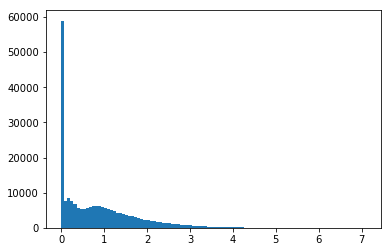

In [43]:
plt.hist(np.array(lst).mean(0).reshape([-1]),bins=100);

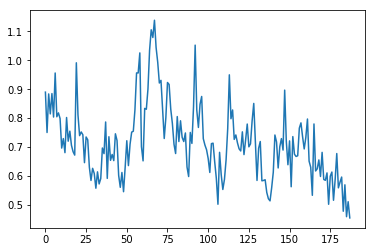

In [44]:
plt.plot(np.array(lst)[:,0,1200]);

In [45]:
for j in range(1680,1690):
    print j,np.nanmean(rawy[:,:,j],dtype=np.float),np.nanmean(y[:,:,j],dtype=np.float)

1680 1.68076379258 0.767920783369
1681 1.6817010969 0.767110917695
1682 1.62592518996 0.723749680765
1683 1.73977632686 0.821946088589
1684 1.71138398698 0.813116099178
1685 1.76363572066 0.845206885747
1686 1.69733310583 0.787718954939
1687 1.70009994492 0.789479112634
1688 nan 0.0
1689 nan 0.0


/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [46]:
for j in range(1680,1693):
    u=train_test[:,:,j]
    print j,np.nanmean(np.isnan(u),dtype=np.float),np.nanmean(u,dtype=np.float)

1680

 0.214705033624

 1.47540770283
1681

 0.214417218709

 1.44507743727
1682

 0.214955711131

 1.48564909701
1683

 0.214666265181

 1.52096391813
1684

 0.213404471545

 1.51972335462
1685

 0.213931295794

 1.48733273512
1686

 0.216415361839

 1.44983771254
1687

 0.218175499348

 1.40541707767
1688

 0.218953879354

 1.39094909043
1689

 0.21871637559

 1.41460505683
1690

 0.218843721771

 1.41986442125
1691

 0.219143330322

 1.44996088985
1692

 0.219399779183

 1.43510709029


In [47]:
np.mean(y[:,0,1688],dtype=np.float),np.mean(y[:,0,1686],dtype=np.float),np.mean(y[:,0,1687],dtype=np.float)

(0.0, 0.13274016203703703, 0.14341001157407407)

(54, 4100) 0.862823


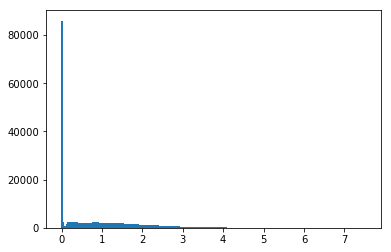

In [48]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1187]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.82318


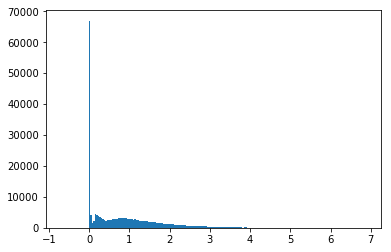

In [49]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1687]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.848694


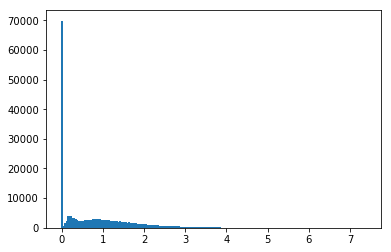

In [50]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1688]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.837828


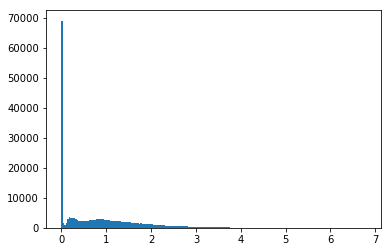

In [51]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1689]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

In [52]:
np.mean(isnan(train_test[:,:,1688]),dtype=np.float)

0.21895387935360835

In [53]:
np.mean(isnan(train_test[:,:,1687]),dtype=np.float)

0.21817549934758607

In [54]:
np.mean(isnan(train_test[:,:,1689]),dtype=np.float)

0.21871637558968182

(54, 4100) 0.848694


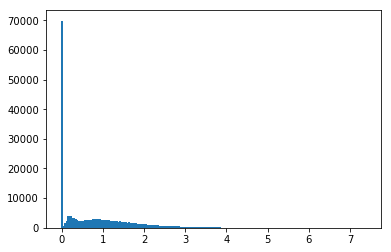

In [55]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1688]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);
pickle.dump(yy_pred3,open(a.name+".alt.pred",'wb'))

In [56]:
c=np.arange(60).reshape([3,4,5])

In [57]:
(c.reshape([-1,5]).reshape([3,4,5])==c).all()

True